In [32]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import pandas as pd
import datetime
from matplotlib import pyplot as plt

import tqdm.notebook as nb
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.ticker as mtick


In [33]:
all_biographies2 = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/all_biographies.csv', index_col=False)

Counting days before nomination...
Formating creation dates...
Formating nomination dates...
Done!


# Probability of survival from nomination for deletion

In [34]:
survival_data_male = all_biographies2[all_biographies2['gender']=='male']
survival_data_female = all_biographies2[all_biographies2['gender']=='female']

kmf_male = KaplanMeierFitter(label='Men')
kmf_female = KaplanMeierFitter(label='Women')


kmf_male = kmf_male.fit(durations=survival_data_male['days_before_nomination'], event_observed=survival_data_male['nominated'])
kmf_female = kmf_female.fit(durations=survival_data_female['days_before_nomination'], event_observed=survival_data_female['nominated'])

In [35]:
plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=10)

# width as measured in inkscape
width = 3.125
height = width / 1.618

<ipython-input-36-660cfa653006>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


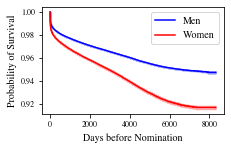

In [36]:
# plt.figure(dpi=300) 
fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.2, right=.99, top=.97)

kmf_male.plot(color='blue')
kmf_female.plot(color='red')
ax.set_xlabel('Days before Nomination')

ax.set_ylabel('Probability of Survival')
# beingsaved.savefig('figure/Male_vs_Female_Survival.png')

fig.set_size_inches(width, height)
fig.savefig('figure/Male_vs_Female_Survival.png', dpi=200)
fig.show()

# Merge with Living People set 


In [12]:
BLP=pd.read_csv('csv_files/data_Gender_bias/Afd From Start/Living_people.csv', index_col=False)


In [13]:
BLP=BLP[['title']]

In [14]:
all_biographies2_BLP=pd.merge(all_biographies2,BLP, left_on='page_title',right_on='title', how='left')

In [15]:
all_biographies2_BLP['BLP']= all_biographies2_BLP['title'].fillna(0)

In [16]:
all_biographies2_BLP['Entry2']=all_biographies2_BLP['Entry'].apply(lambda x: x.replace(" ","_"))

In [17]:
all_biographies2_BLP.loc[all_biographies2_BLP[(all_biographies2_BLP['Entry2'].isin(BLP['title'])) & (all_biographies2_BLP['BLP']==0)].index,'BLP'] =1

In [18]:
all_biographies2_BLP.loc[all_biographies2_BLP['BLP']!=0,'BLP']=1

In [19]:
len(all_biographies2_BLP)

1975779

In [20]:
all_biographies2_BLP.loc[all_biographies2_BLP['gender']=='female','Female']=1

In [21]:
all_biographies2_BLP.loc[all_biographies2_BLP['gender']!='female','Female']=0

In [22]:
all_biographies2_BLP['birth']=all_biographies2_BLP['date_of_birth'].apply(lambda x: -1*int(x.split('-')[1]) if x[0]=='-' else( int(x.split('-')[0] ) if len(x.split('-')[0])==4 else ( int(x.split('-')[0]) if x[0]=='+' else 'no data') ) )
all_biographies2_BLP['death']=all_biographies2_BLP['date_of_death'].apply(lambda x: -1*int(x.split('-')[1]) if x[0]=='-' else( int(x.split('-')[0] ) if len(x.split('-')[0])==4 else ( int(x.split('-')[0]) if x[0]=='+' else 'no data') ) )


In [23]:
part_1=all_biographies2_BLP[all_biographies2_BLP['death']!='no data']

In [24]:

part_2=all_biographies2_BLP[(all_biographies2_BLP['birth']!='no data') & (all_biographies2_BLP['death']=='no data')]

In [25]:
part_3=all_biographies2_BLP[(all_biographies2_BLP['birth']=='no data') & (all_biographies2_BLP['death']=='no data')]

In [26]:
len(all_biographies2_BLP), len(part_1),len(part_2), len(part_3), len(part_1)+len(part_2)+ len(part_3)

(1975779, 801443, 1012613, 161723, 1975779)

#### Fix the data with death data

In [27]:
part_1['Alive']=0

<ipython-input-27-09f778199bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_1['Alive']=0


In [28]:
part_1A=part_1[part_1['birth']!='no data']
part_1B=part_1[part_1['birth']=='no data']

In [29]:
part_1A['wrong']=part_1A.apply(lambda row: 1 if int(str(row['creation_date_original2'])[:4])< row['birth'] else 0,axis=1)


part_1A=part_1A[part_1A['wrong']==0]
part_1A=part_1A.drop(columns=['wrong'])

<ipython-input-29-77c92797bd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_1A['wrong']=part_1A.apply(lambda row: 1 if int(str(row['creation_date_original2'])[:4])< row['birth'] else 0,axis=1)


In [30]:
part_1B['birth']=part_1B['death'].apply(lambda x: x-70)

<ipython-input-30-fd69771fa4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_1B['birth']=part_1B['death'].apply(lambda x: x-70)


In [31]:
part_1=pd.concat([part_1A,part_1B])

In [32]:
part_1_after2000=part_1[part_1['death']>=2000]
part_1_before2000=part_1[part_1['death']<2000]

In [33]:
part_1_after2000['Alive']=part_1_after2000.apply(lambda row: 1 if pd.to_datetime(row['nomination_dates'],utc=True)< pd.to_datetime(str(row['death']).replace("+",""), utc=True) else 0,axis=1)

<ipython-input-33-b09d09dcea7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_1_after2000['Alive']=part_1_after2000.apply(lambda row: 1 if pd.to_datetime(row['nomination_dates'],utc=True)< pd.to_datetime(str(row['death']).replace("+",""), utc=True) else 0,axis=1)


In [34]:
len(part_1_after2000)

206564

In [35]:
part_1=pd.concat([part_1_before2000,part_1_after2000])

#### Fix the data with birth date but no death date

In [36]:
len(part_2)

1012613

In [37]:
part_2['wrong']=part_2.apply(lambda row: 1 if int(str(row['creation_date_original2'])[:4])< row['birth'] else 0,axis=1)


part_2=part_2[part_2['wrong']==0]
part_2=part_2.drop(columns=['wrong'])

<ipython-input-37-15b391dd5aad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2['wrong']=part_2.apply(lambda row: 1 if int(str(row['creation_date_original2'])[:4])< row['birth'] else 0,axis=1)


In [38]:
part_2C=part_2[part_2['birth']<1907]
part_2C['Alive']=0

<ipython-input-38-37bbf9804359>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2C['Alive']=0


In [39]:
part_2_notC = part_2[part_2['birth']>=1907]

In [40]:
part_2A = part_2_notC[part_2_notC['BLP']==1]
part_2A['Alive']=1

<ipython-input-40-5baf44b731cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2A['Alive']=1


In [41]:
part_2B = part_2_notC[part_2_notC['BLP']==0]
# part_2B['Alive']=0

In [42]:
dead=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/Dead_people_all.csv',error_bad_lines=False, index_col=False)


b'Skipping line 596697: expected 6 fields, saw 7\n'


In [43]:
dead

,number,title,pageid,namespace,length,touched
0,1,Abraham_Lincoln,307,NaN,207007,20240503034447
1,2,Aristotle,308,NaN,157550,20240429233718
2,3,Ayn_Rand,339,NaN,89133,20240502211344
3,4,Allan_Dwan,344,NaN,14100,20240328150603
4,5,Aldous_Huxley,628,NaN,64762,20240503075340
...,...,...,...,...,...,...
873686,873688,James_Scavotto,76804105,NaN,3095,20240503045421
873687,873689,Wilbur_Plaugher,76804464,NaN,3398,20240503050858
873688,873690,Rex_Willing,76804540,NaN,7484,20240503074006
873689,873691,John_Matthews_(rugby_union),76805328,NaN,2671,20240503081005


In [44]:
part_2B_a=part_2B[part_2B['page_title'].isin(dead['title'])].drop_duplicates(subset='page_title', keep='first')
part_2B_a['Alive']=0

In [45]:
part_2B_b=part_2B[~part_2B['page_title'].isin(dead['title'])].drop_duplicates(subset='page_title', keep='first')
part_2B_b['Alive']=1

In [46]:
part_2=pd.concat([part_2A,part_2B_a,part_2B_b,part_2C])

#### Fix the data with no birth date and no death date

In [47]:
len(part_3)

161723

In [48]:
part_3A = part_3[part_3['BLP']==1]
part_3A['Alive']=1
part_3A['is_Historical']=0
part_3B = part_3[part_3['BLP']==0]
# part_3B['Alive']=0

<ipython-input-48-a2658c30cddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3A['Alive']=1
<ipython-input-48-a2658c30cddd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3A['is_Historical']=0


if cutoff 1800

In [623]:
birth_from_begin_till_17th_century=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_from_begin_till_17th_century.csv',error_bad_lines=False, index_col=False)
birth_18thcentury=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_18thcentury.csv',error_bad_lines=False, index_col=False)


b'Skipping line 54637: expected 6 fields, saw 7\n'


In [624]:
historical_people = pd.concat([birth_from_begin_till_17th_century,birth_18thcentury])

In [625]:
conteporary_people=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_19th_century_to_3rd_Millenium.csv',error_bad_lines=False, index_col=False)


If cutoff 1945

In [718]:
birth_from_begin_till_1st_millenium=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_from_begin_till_1st_millenium.csv',error_bad_lines=False, index_col=False)
birth_2nd_millenium_without_20th_century=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_2nd_millenium_without_20th_century.csv',error_bad_lines=False, index_col=False)
birth_from1900s_to_1945=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_from1900s_to_1945.csv',error_bad_lines=False, index_col=False)



b'Skipping line 298385: expected 6 fields, saw 7\n'


In [719]:
historical_people = pd.concat([birth_from_begin_till_1st_millenium,birth_2nd_millenium_without_20th_century,birth_from1900s_to_1945])

In [720]:
conteporary_people=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_19th_century_to_3rd_Millenium.csv',error_bad_lines=False, index_col=False)

If cutoff 1907

In [49]:
birth_from_begin_till_1st_millenium=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_from_begin_till_1st_millenium.csv',error_bad_lines=False, index_col=False)
birth_2nd_millenium_without_20th_century=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_2nd_millenium_without_20th_century.csv',error_bad_lines=False, index_col=False)
birth_1900s_without_07_08_09=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_1900s_without_07,08,09.csv',error_bad_lines=False, index_col=False)



b'Skipping line 298385: expected 6 fields, saw 7\n'


In [50]:
len(birth_from_begin_till_1st_millenium), len(birth_2nd_millenium_without_20th_century)

(8452, 423718)

In [51]:
birth_1907_08_09=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_1907,08,09.csv',error_bad_lines=False, index_col=False)

birth_20th_century_without_1900s=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_20th_century_without_1900s.csv',error_bad_lines=False, index_col=False)
birth_21st_century=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/birth_21st-century.csv',error_bad_lines=False, index_col=False)


In [52]:
historical_people = pd.concat([birth_from_begin_till_1st_millenium,birth_2nd_millenium_without_20th_century,birth_1900s_without_07_08_09])

In [53]:
conteporary_people = pd.concat([birth_1907_08_09,birth_20th_century_without_1900s,birth_21st_century])

In [54]:
len(historical_people), len(conteporary_people)

(478370, 1286040)

In [55]:
part_3B_a=part_3B[part_3B['page_title'].isin(historical_people['title'])]

In [56]:
part_3B_a['Alive']=0
part_3B_a['is_Historical']=1

<ipython-input-56-d8f500a1442c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3B_a['Alive']=0
<ipython-input-56-d8f500a1442c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3B_a['is_Historical']=1


In [57]:
part_3B_b=part_3B[~part_3B['page_title'].isin(historical_people['title'])]

In [58]:
part_3B_b_contemporary=part_3B_b[part_3B_b['page_title'].isin(conteporary_people['title'])]

In [59]:
dead=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/Dead_people_all.csv',error_bad_lines=False, index_col=False)


b'Skipping line 596697: expected 6 fields, saw 7\n'


In [60]:
part_3B_b_contemporary_dead=part_3B_b_contemporary[part_3B_b_contemporary['page_title'].isin(dead['title'])]

In [61]:
part_3B_b_contemporary_dead['Alive']=0
part_3B_b_contemporary_dead['is_Historical']=0

<ipython-input-61-bc7d118a52f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3B_b_contemporary_dead['Alive']=0
<ipython-input-61-bc7d118a52f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3B_b_contemporary_dead['is_Historical']=0


In [62]:
part_3B_b[~part_3B_b['page_title'].isin(conteporary_people['title'])]

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death
19,David_Hankins,20041201191741,20041205050253,David Hankins,Q29510093,male,no data,no data,1,3.406389,2004-12-01 19:17:41,2004-12-05 05:02:53,NaN,0,David_Hankins,0.0,no data,no data
53,Claudia_Ellquist,20051118204531,20051208222534,Claudia Ellquist,Q5129167,female,no data,no data,1,20.069479,2005-11-18 20:45:31,2005-12-08 22:25:34,NaN,0,Claudia_Ellquist,1.0,no data,no data
62,Laura_Hartman,20051216164849,20060109185832,Laura Hartman,Q92102573,female,no data,no data,1,24.090081,2005-12-16 16:48:49,2006-01-09 18:58:32,NaN,0,Laura_Hartman,1.0,no data,no data
72,Stefan_Roberts,20050928155804,20060201024603,Stefan Roberts,Q91017221,male,no data,no data,1,125.449988,2005-09-28 15:58:04,2006-02-01 02:46:03,NaN,0,Stefan_Roberts,0.0,no data,no data
85,Paul_Gower,20050206231040,20060325075016,Paul Gower,Q16298333,male,no data,no data,1,411.360833,2005-02-06 23:10:40,2006-03-25 07:50:16,NaN,0,Paul_Gower,0.0,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Wali,20170604090635,20231104000000,Wali,Q4231368,male,nodeID://b172919,no data,0,2343.620428,2017-06-04 09:06:35,2023-11-04 00:00:00,NaN,0,Wali,0.0,no data,no data
1974712,John_Hart,20110402142348,20231104000000,John Hart,Q410378,male,nodeID://b529153,no data,0,4598.400139,2011-04-02 14:23:48,2023-11-04 00:00:00,NaN,0,John_Hart,0.0,no data,no data
1975029,Robert_Campbell,20041208175116,20231104000000,Robert Campbell,Q2156717,male,nodeID://b842200,no data,0,6904.256065,2004-12-08 17:51:16,2023-11-04 00:00:00,NaN,0,Robert_Campbell,0.0,no data,no data
1975364,William_Taylor,20070715014329,20231104000000,William Taylor,Q339542,male,nodeID://b686787,no data,0,5955.928137,2007-07-15 01:43:29,2023-11-04 00:00:00,NaN,0,William_Taylor,0.0,no data,no data


In [63]:
part_3B_b_contemporary[~part_3B_b_contemporary['page_title'].isin(dead['title'])]

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death
5463,Swami_Avdheshanand_Giri,20080821194121,20210512094855,Swami Avdheshanand Giri,Q87564495,male,no data,no data,1,4646.588588,2008-08-21 19:41:21,2021-05-12 09:48:55,NaN,0,Swami_Avdheshanand_Giri,0.0,no data,no data
6328,Jean-Pierre_Schecroun,20041126104939,20230615234826,Jean-Pierre Schecroun,Q6169951,male,no data,no data,1,6775.540822,2004-11-26 10:49:39,2023-06-15 23:48:26,NaN,0,Jean-Pierre_Schecroun,0.0,no data,no data
28763,Shahbaz_Taseer,20160511131645,20180826124051,Kidnapping of Shahbaz Taseer,Q24088593,male,no data,no data,1,836.975069,2016-05-11 13:16:45,2018-08-26 12:40:51,NaN,0,Kidnapping_of_Shahbaz_Taseer,0.0,no data,no data
30741,John_A._Bell,20071023080646,20221210201439,John A. Bell,Q6217538,male,no data,no data,1,5527.505475,2007-10-23 08:06:46,2022-12-10 20:14:39,NaN,0,John_A._Bell,0.0,no data,no data
32051,Frood_Fouladvand,20061229035333,20220420141705,Frood Fouladvand,Q5506127,male,no data,no data,1,5591.433009,2006-12-29 03:53:33,2022-04-20 14:17:05,NaN,0,Frood_Fouladvand,0.0,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953669,Willie_Wolmarans,20150711173402,20231104000000,Willie Wolmarans,Q20982096,male,no data,no data,0,3037.268032,2015-07-11 17:34:02,2023-11-04 00:00:00,NaN,0,Willie_Wolmarans,0.0,no data,no data
1953888,Adele_Wood,20180313203247,20231104000000,Adele Wood,Q50427799,female,no data,no data,0,2061.143900,2018-03-13 20:32:47,2023-11-04 00:00:00,NaN,0,Adele_Wood,1.0,no data,no data
1956019,Wu-Lu,20230411145841,20231104000000,Wu-Lu,Q118588698,male,no data,no data,0,206.375914,2023-04-11 14:58:41,2023-11-04 00:00:00,NaN,0,Wu-Lu,0.0,no data,no data
1957283,Najam_Yahya,20150216174850,20231104000000,Najam Yahya,Q19578335,male,no data,no data,0,3182.257755,2015-02-16 17:48:50,2023-11-04 00:00:00,NaN,0,Najam_Yahya,0.0,no data,no data


In [64]:
Totally_unlnown_group = pd.concat([part_3B_b[~part_3B_b['page_title'].isin(conteporary_people['title'])],part_3B_b_contemporary[~part_3B_b_contemporary['page_title'].isin(dead['title'])]])

if cutoff 1800

In [639]:
death_from_begin_till_18th_century=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/death_from_begin_till_18th_century.csv',error_bad_lines=False, index_col=False)
death_from_1800s_to_1870s=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/death_from_1800s_to_1870s.csv',error_bad_lines=False, index_col=False)


b'Skipping line 81201: expected 6 fields, saw 7\n'


In [640]:
dead_historical = pd.concat([death_from_begin_till_18th_century,death_from_1800s_to_1870s])

In [641]:
len(dead_historical)

174836

if cutoff 1907

In [66]:
dead_historical=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/Dead_people_historical.csv',error_bad_lines=False, index_col=False)


b'Skipping line 584707: expected 6 fields, saw 7\n'


In [67]:
len(dead_historical)

856404

In [68]:
part_3B_unknown_historical_dead=Totally_unlnown_group[Totally_unlnown_group['page_title'].isin(dead_historical['title'])]

In [69]:
part_3B_unknown_historical_dead['Alive']=0
part_3B_unknown_historical_dead['is_Historical']=1


<ipython-input-69-e68a43cfa22f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3B_unknown_historical_dead['Alive']=0
<ipython-input-69-e68a43cfa22f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3B_unknown_historical_dead['is_Historical']=1


In [72]:
part_3_better=pd.concat([part_3A,part_3B_a,part_3B_b_contemporary_dead, part_3B_unknown_historical_dead])

In [73]:
part_3_better

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death,Alive,is_Historical
39,Ralph_Woodrow,20050628220210,20050808040534,Ralph Woodrow,Q7288294,male,no data,no data,1,40.252361,2005-06-28 22:02:10,2005-08-08 04:05:34,Ralph_Woodrow,1,Ralph_Woodrow,0.0,no data,no data,1,0
46,Rusty_Foster,20030418102947,20050925032213,Rusty Foster,Q7382588,male,no data,no data,1,890.703079,2003-04-18 10:29:47,2005-09-25 03:22:13,Rusty_Foster,1,Rusty_Foster,0.0,no data,no data,1,0
100,Rosario_Isasi,20060319031641,20060426051311,Rosario Isasi,Q7367392,female,no data,no data,1,38.080903,2006-03-19 03:16:41,2006-04-26 05:13:11,Rosario_Isasi,1,Rosario_Isasi,1.0,no data,no data,1,0
113,Prhizzm,20051021165058,20060525172402,Prhizzm,Q7242503,male,no data,no data,1,216.022963,2005-10-21 16:50:58,2006-05-25 17:24:02,Prhizzm,1,Prhizzm,0.0,no data,no data,1,0
117,G._Patrick_Maxwell,20060217130842,20060603211350,G. Patrick Maxwell,Q5512395,male,no data,no data,1,106.336898,2006-02-17 13:08:42,2006-06-03 21:13:50,G._Patrick_Maxwell,1,G._Patrick_Maxwell,0.0,no data,no data,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962843,Zou_Jing_(Eastern_Han),20060724023441,20231104000000,Zou Jing (Eastern Han),Q1156939,male,no data,no data,0,6311.892581,2006-07-24 02:34:41,2023-11-04 00:00:00,NaN,0,Zou_Jing_(Eastern_Han),0.0,no data,no data,0,1
1962852,Elizabeth_Zouche,20180527204904,20231104000000,Elizabeth Zouche,Q55099423,female,no data,no data,0,1986.132593,2018-05-27 20:49:04,2023-11-04 00:00:00,NaN,0,Elizabeth_Zouche,1.0,no data,no data,0,1
1962962,Zuhra_Ramdan_Agha_Al-Awji,20080209020203,20231104000000,Zuhra Ramdan Agha Al-Awji,Q8075038,female,no data,no data,0,5746.915243,2008-02-09 02:02:03,2023-11-04 00:00:00,NaN,0,Zuhra_Ramdan_Agha_Al-Awji,1.0,no data,no data,0,1
1963102,Filips_van_Zuylen,20120228181411,20231104000000,Filips van Zuylen,Q5448755,male,no data,no data,0,4266.240150,2012-02-28 18:14:11,2023-11-04 00:00:00,NaN,0,Filips_van_Zuylen,0.0,no data,no data,0,1


In [74]:
not_part_3=part_3[~part_3['page_title'].isin(part_3_better['page_title'])]

In [75]:
not_part_3['nominated'].value_counts()

0    17868
1     8026
Name: nominated, dtype: int64

if cutoff 1800

In [651]:
death_1880s_to_3rd_millenium=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/death_1880s_to_3rd_millenium.csv',error_bad_lines=False, index_col=False)


In [653]:
contemporary_dead=not_part_3[not_part_3['page_title'].isin(death_1880s_to_3rd_millenium['title'])]

In [655]:
contemporary_dead['Alive']=0
contemporary_dead['Historical']=0

<ipython-input-655-48328cf72881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contemporary_dead['Alive']=0
<ipython-input-655-48328cf72881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contemporary_dead['Historical']=0


In [656]:
part_3_better

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death,Alive,is_Historical
39,Ralph_Woodrow,20050628220210,20050808040534,Ralph Woodrow,Q7288294,male,no data,no data,1,40.252361,2005-06-28 22:02:10,2005-08-08 04:05:34,Ralph_Woodrow,1,Ralph_Woodrow,0.0,no data,no data,1,0
46,Rusty_Foster,20030418102947,20050925032213,Rusty Foster,Q7382588,male,no data,no data,1,890.703079,2003-04-18 10:29:47,2005-09-25 03:22:13,Rusty_Foster,1,Rusty_Foster,0.0,no data,no data,1,0
100,Rosario_Isasi,20060319031641,20060426051311,Rosario Isasi,Q7367392,female,no data,no data,1,38.080903,2006-03-19 03:16:41,2006-04-26 05:13:11,Rosario_Isasi,1,Rosario_Isasi,1.0,no data,no data,1,0
113,Prhizzm,20051021165058,20060525172402,Prhizzm,Q7242503,male,no data,no data,1,216.022963,2005-10-21 16:50:58,2006-05-25 17:24:02,Prhizzm,1,Prhizzm,0.0,no data,no data,1,0
117,G._Patrick_Maxwell,20060217130842,20060603211350,G. Patrick Maxwell,Q5512395,male,no data,no data,1,106.336898,2006-02-17 13:08:42,2006-06-03 21:13:50,G._Patrick_Maxwell,1,G._Patrick_Maxwell,0.0,no data,no data,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962758,Hanna_Zolotarenko,20221221123041,20231104000000,Hanna Zolotarenko,Q12094252,female,no data,no data,0,317.478692,2022-12-21 12:30:41,2023-11-04 00:00:00,NaN,0,Hanna_Zolotarenko,1.0,no data,no data,0,1
1962785,Zhang_Zongyu,20180810215425,20231104000000,Zhang Zongyu,Q10292093,male,no data,no data,0,1911.087211,2018-08-10 21:54:25,2023-11-04 00:00:00,NaN,0,Zhang_Zongyu,0.0,no data,no data,0,1
1962827,Marsilio_Zorzi,20230526140739,20231104000000,Marsilio Zorzi,Q94985655,male,no data,no data,0,161.411354,2023-05-26 14:07:39,2023-11-04 00:00:00,NaN,0,Marsilio_Zorzi,0.0,no data,no data,0,1
1602651,Henry_Bates_(politician),20060710054540,20231104000000,Henry Bates (politician),Q16240636,male,no data,no data,0,6325.759954,2006-07-10 05:45:40,2023-11-04 00:00:00,NaN,0,Henry_Bates_(politician),0.0,no data,no data,0,1


In [675]:
probably_alive=not_part_3[~not_part_3['page_title'].isin(contemporary_dead['title'])]

In [676]:
probably_alive

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death
19,David_Hankins,20041201191741,20041205050253,David Hankins,Q29510093,male,no data,no data,1,3.406389,2004-12-01 19:17:41,2004-12-05 05:02:53,NaN,0,David_Hankins,0.0,no data,no data
53,Claudia_Ellquist,20051118204531,20051208222534,Claudia Ellquist,Q5129167,female,no data,no data,1,20.069479,2005-11-18 20:45:31,2005-12-08 22:25:34,NaN,0,Claudia_Ellquist,1.0,no data,no data
62,Laura_Hartman,20051216164849,20060109185832,Laura Hartman,Q92102573,female,no data,no data,1,24.090081,2005-12-16 16:48:49,2006-01-09 18:58:32,NaN,0,Laura_Hartman,1.0,no data,no data
72,Stefan_Roberts,20050928155804,20060201024603,Stefan Roberts,Q91017221,male,no data,no data,1,125.449988,2005-09-28 15:58:04,2006-02-01 02:46:03,NaN,0,Stefan_Roberts,0.0,no data,no data
85,Paul_Gower,20050206231040,20060325075016,Paul Gower,Q16298333,male,no data,no data,1,411.360833,2005-02-06 23:10:40,2006-03-25 07:50:16,NaN,0,Paul_Gower,0.0,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Wali,20170604090635,20231104000000,Wali,Q4231368,male,nodeID://b172919,no data,0,2343.620428,2017-06-04 09:06:35,2023-11-04 00:00:00,NaN,0,Wali,0.0,no data,no data
1974712,John_Hart,20110402142348,20231104000000,John Hart,Q410378,male,nodeID://b529153,no data,0,4598.400139,2011-04-02 14:23:48,2023-11-04 00:00:00,NaN,0,John_Hart,0.0,no data,no data
1975029,Robert_Campbell,20041208175116,20231104000000,Robert Campbell,Q2156717,male,nodeID://b842200,no data,0,6904.256065,2004-12-08 17:51:16,2023-11-04 00:00:00,NaN,0,Robert_Campbell,0.0,no data,no data
1975364,William_Taylor,20070715014329,20231104000000,William Taylor,Q339542,male,nodeID://b686787,no data,0,5955.928137,2007-07-15 01:43:29,2023-11-04 00:00:00,NaN,0,William_Taylor,0.0,no data,no data


In [677]:
len(all_biographies2_with_data)+len(probably_alive)

1975741

if cutoff 1907

In [76]:
len(not_part_3)/len(all_biographies2_BLP)

0.013105716783101753

In [77]:
Dead_people_from1900_to1977=pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/Dead_people_from1900_to1977.csv',error_bad_lines=False, index_col=False)


In [78]:
dead_contemprary_2=dead[~dead['title'].isin(pd.concat([dead_historical,Dead_people_from1900_to1977])['title'])]

In [79]:
probably_alive=not_part_3[~not_part_3['page_title'].isin(dead_contemprary_2['title'])]

In [80]:
len(probably_alive), len(not_part_3), len(not_part_3)-len(probably_alive), 

(25869, 25894, 25)

In [81]:
probably_alive2=pd.concat([part_2B_b,probably_alive])

In [82]:
probably_alive

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death
19,David_Hankins,20041201191741,20041205050253,David Hankins,Q29510093,male,no data,no data,1,3.406389,2004-12-01 19:17:41,2004-12-05 05:02:53,NaN,0,David_Hankins,0.0,no data,no data
53,Claudia_Ellquist,20051118204531,20051208222534,Claudia Ellquist,Q5129167,female,no data,no data,1,20.069479,2005-11-18 20:45:31,2005-12-08 22:25:34,NaN,0,Claudia_Ellquist,1.0,no data,no data
62,Laura_Hartman,20051216164849,20060109185832,Laura Hartman,Q92102573,female,no data,no data,1,24.090081,2005-12-16 16:48:49,2006-01-09 18:58:32,NaN,0,Laura_Hartman,1.0,no data,no data
72,Stefan_Roberts,20050928155804,20060201024603,Stefan Roberts,Q91017221,male,no data,no data,1,125.449988,2005-09-28 15:58:04,2006-02-01 02:46:03,NaN,0,Stefan_Roberts,0.0,no data,no data
85,Paul_Gower,20050206231040,20060325075016,Paul Gower,Q16298333,male,no data,no data,1,411.360833,2005-02-06 23:10:40,2006-03-25 07:50:16,NaN,0,Paul_Gower,0.0,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Wali,20170604090635,20231104000000,Wali,Q4231368,male,nodeID://b172919,no data,0,2343.620428,2017-06-04 09:06:35,2023-11-04 00:00:00,NaN,0,Wali,0.0,no data,no data
1974712,John_Hart,20110402142348,20231104000000,John Hart,Q410378,male,nodeID://b529153,no data,0,4598.400139,2011-04-02 14:23:48,2023-11-04 00:00:00,NaN,0,John_Hart,0.0,no data,no data
1975029,Robert_Campbell,20041208175116,20231104000000,Robert Campbell,Q2156717,male,nodeID://b842200,no data,0,6904.256065,2004-12-08 17:51:16,2023-11-04 00:00:00,NaN,0,Robert_Campbell,0.0,no data,no data
1975364,William_Taylor,20070715014329,20231104000000,William Taylor,Q339542,male,nodeID://b686787,no data,0,5955.928137,2007-07-15 01:43:29,2023-11-04 00:00:00,NaN,0,William_Taylor,0.0,no data,no data


In [83]:
len(probably_alive2)/len(all_biographies2_BLP)

0.029058918026763116

In [84]:
probably_alive['Alive']=1
probably_alive['is_Historical']=0

<ipython-input-84-83f4a5b476cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probably_alive['Alive']=1
<ipython-input-84-83f4a5b476cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probably_alive['is_Historical']=0


In [85]:
part_3_better=pd.concat([part_3_better,probably_alive])

In [86]:
part_3_better['is_Historical'].value_counts()

0    146081
1     15617
Name: is_Historical, dtype: int64

In [87]:
part_3_better['Alive'].value_counts()

1    143438
0     18260
Name: Alive, dtype: int64

#### Concat all parts 

In [122]:
len(part_3_better), len(part_3)

(161698, 161723)

In [123]:
part_1[['Entry','birth','death','Alive']]

,Entry,birth,death,Alive
13,James Brennan,1837,1917,0
18,Paul Holt,1900,1980,0
23,Lewis B. Schwellenbach,1894,1948,0
25,James Longstreet,1821,1904,0
28,Michael Donohoe,1864,1958,0
...,...,...,...,...
1962722,Dimitrios Zografos,1940,2010,0
1962748,Albert Zoller,1930,2000,0
1962856,Joseph Zoundeiko,1947,2017,0
1962879,Michela Zroho,1949,2019,0


In [124]:
part_2[['Entry','birth','death','Alive']]

,Entry,birth,death,Alive
1,Rohan Pethiyagoda,1955,no data,1
2,Mirza Masroor Ahmad,1950,no data,1
3,Kris Holm,1973,no data,1
4,Michelle Bass,1981,no data,1
7,Frances Bean Cobain,1992,no data,1
...,...,...,...,...
1975735,Ariaricus,300,no data,0
1975742,Suswani Mata,1162,no data,0
1975751,I-70 Killer,1901,no data,0
1975767,Yikao,-2000,no data,0


In [125]:
len(all_biographies2_BLP),len(part_1) + len(part_2) 

(1975779, 1814018)

In [126]:
all_biographies2_with_data=pd.concat([part_1,part_2])

In [127]:
all_biographies2_with_data

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates,title,BLP,Entry2,Female,birth,death,Alive
13,James_Brennan,20041116190813,20041116191644,James Brennan,Q6130205,male,1837-02-25T00:00:00Z,1917-06-13T00:00:00Z,1,0.005914,2004-11-16 19:08:13,2004-11-16 19:16:44,NaN,0,James_Brennan,0.0,1837,1917,0
18,Paul_Holt,20041127125516,20041127142834,Paul Holt,Q12331079,male,1900,1980-11-16,1,0.064792,2004-11-27 12:55:16,2004-11-27 14:28:34,NaN,0,Paul_Holt,0.0,1900,1980,0
23,Lewis_B._Schwellenbach,20041225045531,20041225060911,Lewis B. Schwellenbach,Q1767521,male,1894-09-20T00:00:00Z,1948-06-10T00:00:00Z,1,0.051157,2004-12-25 04:55:31,2004-12-25 06:09:11,NaN,0,Lewis_B._Schwellenbach,0.0,1894,1948,0
25,James_Longstreet,20020418133700,20050306062831,James Longstreet,Q105362228,male,1821-01-08T00:00:00Z,1904-01-02T00:00:00Z,1,1052.702442,2002-04-18 13:37:00,2005-03-06 06:28:31,NaN,0,James_Longstreet,0.0,1821,1904,0
28,Michael_Donohoe,20050401175247,20050414033806,Michael Donohoe,Q6829914,male,1864-02-22T00:00:00Z,1958-01-17T00:00:00Z,1,12.406470,2005-04-01 17:52:47,2005-04-14 03:38:06,NaN,0,Michael_Donohoe,0.0,1864,1958,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975735,Ariaric,20130106193424,20231104000000,Ariaricus,Q3622534,male,0300-01-01T00:00:00Z,nodeID://b351327,0,3953.184444,2013-01-06 19:34:24,2023-11-04 00:00:00,NaN,0,Ariaricus,0.0,300,no data,0
1975742,Suswani_Mataji,20191010042742,20231104000000,Suswani Mata,Q57446991,female,1162-01-01T00:00:00Z,no data,0,1485.814097,2019-10-10 04:27:42,2023-11-04 00:00:00,NaN,0,Suswani_Mata,1.0,1162,no data,0
1975751,I-70_killer,20151009000713,20231104000000,I-70 Killer,Q21188308,male,1901-01-01T00:00:00Z,no data,0,2947.994988,2015-10-09 00:07:13,2023-11-04 00:00:00,NaN,0,I-70_Killer,0.0,1901,no data,0
1975767,Bo_Yikao,20080113162447,20231104000000,Yikao,Q2923034,male,-2000-01-01T00:00:00Z,nodeID://b516668,0,5773.316123,2008-01-13 16:24:47,2023-11-04 00:00:00,NaN,0,Yikao,0.0,-2000,no data,0


In [128]:
all_biographies2_with_data.loc[all_biographies2_with_data[all_biographies2_with_data['birth']>=1907].index,'is_Historical']=0
all_biographies2_with_data.loc[all_biographies2_with_data[all_biographies2_with_data['birth']<1907].index,'is_Historical']=1

In [129]:
all_biographies2_with_data=pd.concat([all_biographies2_with_data, part_3_better]).drop_duplicates(subset='page_title', keep='first')

In [130]:
all_biographies2_with_data['is_Historical'].value_counts()

0.0    1445851
1.0     529865
Name: is_Historical, dtype: int64

In [102]:
all_biographies2_with_data['is_Historical'].value_counts()

0.0    1438911
1.0     536805
Name: is_Historical, dtype: int64

In [101]:
all_biographies2_with_data = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/all_biographies2_with_data_without_history_level.csv', index_col=False)

/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Study From Here 

In [131]:
all_biographies2_with_data['Female'].value_counts()/all_biographies2_with_data['Female'].value_counts().sum()

0.0    0.802124
1.0    0.197876
Name: Female, dtype: float64

In [132]:
all_biographies2_with_data=all_biographies2_with_data.rename(columns={'Female':'Gender'})

In [133]:
all_biographies2_with_data[['days_before_nomination','Gender','nominated','Alive','is_Historical','birth','death']]

,days_before_nomination,Gender,nominated,Alive,is_Historical,birth,death
13,0.005914,0.0,1,0,1.0,1837,1917
18,0.064792,0.0,1,0,1.0,1900,1980
23,0.051157,0.0,1,0,1.0,1894,1948
25,1052.702442,0.0,1,0,1.0,1821,1904
28,12.406470,0.0,1,0,1.0,1864,1958
...,...,...,...,...,...,...,...
1974707,2343.620428,0.0,0,1,0.0,no data,no data
1974712,4598.400139,0.0,0,1,0.0,no data,no data
1975029,6904.256065,0.0,0,1,0.0,no data,no data
1975364,5955.928137,0.0,0,1,0.0,no data,no data


In [134]:
all_biographies2_with_data['Status']=all_biographies2_with_data.apply(lambda row: "Historical" if row['is_Historical']==1 else ("Contemporary Dead" if row['Alive']==0 else "Alive"), axis=1)

all_biographies2_with_data[['days_before_nomination','Gender','nominated','Alive','is_Historical','Status']]

,days_before_nomination,Gender,nominated,Alive,is_Historical,Status
13,0.005914,0.0,1,0,1.0,Historical
18,0.064792,0.0,1,0,1.0,Historical
23,0.051157,0.0,1,0,1.0,Historical
25,1052.702442,0.0,1,0,1.0,Historical
28,12.406470,0.0,1,0,1.0,Historical
...,...,...,...,...,...,...
1974707,2343.620428,0.0,0,1,0.0,Alive
1974712,4598.400139,0.0,0,1,0.0,Alive
1975029,6904.256065,0.0,0,1,0.0,Alive
1975364,5955.928137,0.0,0,1,0.0,Alive


In [137]:
all_biographies2_with_data['Wikipedia_Age']=all_biographies2_with_data['creation_date_original2'].apply(lambda x: int(str(x)[2:4]))

In [135]:
all_biographies2_with_data[['QID','Entry','days_before_nomination','Gender','nominated','Alive','is_Historical','Status']]

,QID,Entry,days_before_nomination,Gender,nominated,Alive,is_Historical,Status
13,Q6130205,James Brennan,0.005914,0.0,1,0,1.0,Historical
18,Q12331079,Paul Holt,0.064792,0.0,1,0,1.0,Historical
23,Q1767521,Lewis B. Schwellenbach,0.051157,0.0,1,0,1.0,Historical
25,Q105362228,James Longstreet,1052.702442,0.0,1,0,1.0,Historical
28,Q6829914,Michael Donohoe,12.406470,0.0,1,0,1.0,Historical
...,...,...,...,...,...,...,...,...
1974707,Q4231368,Wali,2343.620428,0.0,0,1,0.0,Alive
1974712,Q410378,John Hart,4598.400139,0.0,0,1,0.0,Alive
1975029,Q2156717,Robert Campbell,6904.256065,0.0,0,1,0.0,Alive
1975364,Q339542,William Taylor,5955.928137,0.0,0,1,0.0,Alive


In [136]:
all_biographies2_with_data['Status'].value_counts()/all_biographies2_with_data['Status'].value_counts().sum()

Alive                0.563690
Historical           0.268189
Contemporary Dead    0.168121
Name: Status, dtype: float64

In [108]:
all_biographies2_with_data['Status'].value_counts()/all_biographies2_with_data['Status'].value_counts().sum()

Alive                0.563680
Historical           0.271701
Contemporary Dead    0.164619
Name: Status, dtype: float64

In [109]:
all_biographies2_with_data[['Gender','Status']].value_counts()/all_biographies2_with_data[['Gender','Status']].value_counts().sum()

Gender  Status           
0.0     Alive                0.423490
        Historical           0.239121
1.0     Alive                0.140190
0.0     Contemporary Dead    0.139512
1.0     Historical           0.032580
        Contemporary Dead    0.025106
dtype: float64

In [839]:
annotation_status = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/Annotation_Status - Annotated_Status.csv', index_col=False)

In [840]:
len(annotation_status)

500

In [841]:
annotation_status.head()

,page_title,Entry2,QID,Alive,is_Historical,Reasons,Unnamed: 6,Unnamed: 7,Unnamed: 8,birth
0,Glenn_Zottola,Glenn_Zottola,Q5569195,1,0.0,easily verified,NaN,NaN,NaN,1947
1,Brian_Landrus,Brian_Landrus,Q4964420,1,0.0,easily verified,NaN,NaN,NaN,1978
2,Richard_Gwent,Richard_Gwent,Q7326125,0,1.0,easily verified,NaN,NaN,NaN,1473
3,Henry_Horne_(MP),Henry_Horne_(MP),Q5723251,0,1.0,easily verified,NaN,NaN,NaN,1350
4,John_Duncan_Bligh,John_Duncan_Bligh,Q6230362,0,1.0,easily verified,NaN,NaN,NaN,1798


In [842]:
annotation_status.columns

Index(['page_title', 'Entry2', 'QID', 'Alive', 'is_Historical', 'Reasons',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'birth'],
      dtype='object')

In [843]:
no_annotation_status=annotation_status[annotation_status['Alive']=='dont know']

In [844]:
annotation_status=annotation_status[annotation_status['Alive']!='dont know']

In [845]:
len(no_annotation_status)

5

In [849]:
annotation_status['Status']=annotation_status.apply(lambda row: "Historical" if row['is_Historical']==1 else ("Contemporary Dead" if row['Alive']==0 else "Alive"), axis=1)


In [851]:
sample_merge_evaluation=pd.merge(annotation_status[['page_title','QID','Status','birth']], all_biographies2_with_data[['page_title','QID','Status']], on = 'QID')

In [852]:
from sklearn.metrics import classification_report

In [853]:
print(classification_report(sample_merge_evaluation['Status_x'],sample_merge_evaluation['Status_y']))

                   precision    recall  f1-score   support

            Alive       0.98      0.99      0.98       279
Contemporary Dead       0.93      0.97      0.95        73
       Historical       0.99      0.95      0.97       143

         accuracy                           0.98       495
        macro avg       0.97      0.97      0.97       495
     weighted avg       0.98      0.98      0.98       495



In [837]:
len(annotation_status)/len(all_biographies2_with_data)

0.000250542081959148

# Model with fused variable

In [138]:
fused_var_model = CoxPHFitter()
fused_var_model.fit(all_biographies2_with_data[['days_before_nomination','nominated','Gender', 'Wikipedia_Age','Status']].sample(frac=1), duration_col='days_before_nomination', event_col='nominated', formula="Gender + Wikipedia_Age + Status")

fused_var_model_interaction = CoxPHFitter()
fused_var_model_interaction.fit(all_biographies2_with_data[['days_before_nomination','nominated','Gender', 'Wikipedia_Age','Status']].sample(frac=1), duration_col='days_before_nomination', event_col='nominated', formula="Gender + Wikipedia_Age + Status + Gender*Status")


<lifelines.CoxPHFitter: fitted with 1.97572e+06 total observations, 1.89137e+06 right-censored observations>

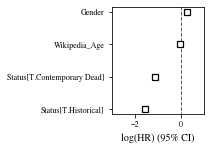

In [146]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.58, bottom=.2, right=.99, top=.97)

fused_var_model.plot(ax=ax)
# ax.set_ylabel('baseline')
ax.set_xlim((-3,1))
# ax[0].set_xlabel('', fontsize=15)

# fused_var_model_interaction.plot(ax=ax[1])
# ax[1].set_ylabel('(b) with interaction')
# # ax[1].set_xlabel('log(HR) (95% CI)', fontsize=15)
# # plt.title ()

# fig.align_ylabels(ax)
fig.set_size_inches(width, height)

# fig.savefig('figure/Cox_prop_model_cutoff_1945.png', dpi=200)


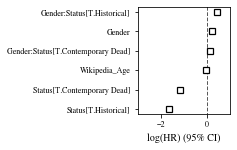

In [147]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.58, bottom=.2, right=.99, top=.97)

fused_var_model_interaction.plot(ax=ax)
# ax.set_ylabel('with interaction')
ax.set_xlim((-3,1))
# ax[0].set_xlabel('', fontsize=15)

# fused_var_model_interaction.plot(ax=ax[1])
# ax[1].set_ylabel('(b) with interaction')
# # ax[1].set_xlabel('log(HR) (95% CI)', fontsize=15)
# # plt.title ()

# fig.align_ylabels(ax)
fig.set_size_inches(width, height)
# fig.savefig('figure/Cox_prop_model_interaction_cutoff_1945.png', dpi=200)


In [144]:
fused_var_model.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 1.97572e+06 total observations, 1.89137e+06 right-censored observations>
             duration col = 'days_before_nomination'
                event col = 'nominated'
      baseline estimation = breslow
   number of observations = 1.97572e+06
number of events observed = 84345
   partial log-likelihood = -1186677.95
         time fit was run = 2024-12-11 18:13:36 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
Gender                        0.27       1.31       0.01             0.25             0.28                 1.29                 1.33
Wikipedia_Age                -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
Status[T.Contemporary Dead]  -1.14       0.32       0.01            -1.16            -1.11                 0.31                 0.33
Status[T.Historical]         -1.55       0.21       0.01            -1.58            -1.53                 0.21                 0.22

                              cmp to       z      p   -log2(p)
covariate                                                     
Gender                          0.00   33.37 <0.005     808.46
Wikipedia_Age                   0.00  -44.69 <0.005        inf
Status[T.Contemporary Dead]     0.00  -91.63 <0.005        inf
Status[T.Historical]            0.00 -128.67 <0.005        inf
---
Concordance = 0.67
Partial AIC = 2373363.91
log-likelihood ratio test = 33195.48 on 4 df
-log2(p) of ll-ratio test = inf

In [145]:
fused_var_model_interaction.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 1.97572e+06 total observations, 1.89137e+06 right-censored observations>
             duration col = 'days_before_nomination'
                event col = 'nominated'
      baseline estimation = breslow
   number of observations = 1.97572e+06
number of events observed = 84345
   partial log-likelihood = -1186586.20
         time fit was run = 2024-12-11 18:15:00 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
Gender                               0.23       1.26       0.01             0.21             0.25                 1.24                 1.28
Wikipedia_Age                       -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
Status[T.Contemporary Dead]         -1.16       0.31       0.01            -1.19            -1.14                 0.30                 0.32
Status[T.Historical]                -1.62       0.20       0.01            -1.65            -1.59                 0.19                 0.20
Gender:Status[T.Contemporary Dead]   0.13       1.14       0.03             0.07             0.19                 1.07                 1.21
Gender:Status[T.Historical]          0.42       1.53       0.03             0.36             0.48                 1.44                 1.62

                                     cmp to       z      p   -log2(p)
covariate                                                            
Gender                                 0.00   26.98 <0.005     530.27
Wikipedia_Age                          0.00  -44.86 <0.005        inf
Status[T.Contemporary Dead]            0.00  -84.45 <0.005        inf
Status[T.Historical]                   0.00 -121.66 <0.005        inf
Gender:Status[T.Contemporary Dead]     0.00    4.17 <0.005      15.00
Gender:Status[T.Historical]            0.00   13.69 <0.005     139.22
---
Concordance = 0.67
Partial AIC = 2373184.39
log-likelihood ratio test = 33379.00 on 6 df
-log2(p) of ll-ratio test = inf

In [54]:
%matplotlib inline

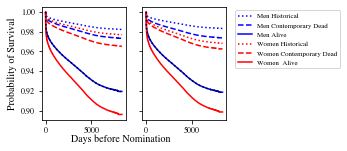

In [143]:

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,sharey=True)
fig.subplots_adjust(left=.17, bottom=.16, right=.99, top=.97)


cycler = plt.cycler(linestyle=[':', "--", "-",':', "--", "-"],
                    color = ['blue','blue','blue','red','red', 'red'],
)
ax[0].set_prop_cycle(cycler)

fused_var_model.plot_partial_effects_on_outcome(covariates=['Gender','Status'],
                                               values=[[0,'Historical'],[0,'Contemporary Dead'],[0,'Alive'],[1,'Historical'],[1,'Contemporary Dead'],[1,'Alive']],
                                               color = ['blue','blue','blue','red','red', 'red'],
                                                      
                                               ax=ax[0]
                                                       
                                             
                                              )
# ax[0].set_xlabel('Days before Nomination')
ax[0].set_ylabel('Probability of Survival')
# handles, labels = ax.get_legend_handles_labels()
ax[0].legend(labels=['Men Historical','Men Contemporary Dead','Men Alive','Women Historical','Women Contemporary Dead','Women  Alive'], 
             loc='best', bbox_to_anchor=(3.6, 1), fontsize='x-small')
# ax.plot(ls=linestyless)


ax[1].set_prop_cycle(cycler)

fused_var_model_interaction.plot_partial_effects_on_outcome(covariates=['Gender','Status'],
                                               values=[[0,'Historical'],[0,'Contemporary Dead'],[0,'Alive'],[1,'Historical'],[1,'Contemporary Dead'],[1,'Alive']],
                                               color = ['blue','blue','blue','red','red', 'red'],
                                                      
                                               ax=ax[1]
                                                       
                                             
                                              )
# ax[1].set_xlabel('Days before Nomination')
ax[1].set_ylabel('Probability of Survival')
ax[1].legend('',frameon=False)
# plt.xlabel('Days before Nomination', horizontalalignment='left',)
fig.text(0.3,0,'Days before Nomination', ha='left')

fig.set_size_inches(width, height)
# fig.savefig('figure/marginal_effect.png', bbox_inches='tight',dpi=200)
# ax.plot(ls=linestyless)

In [93]:
fig.savefig('figure/marginal_effect.png', bbox_inches='tight',dpi=300)

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  """Entry point for launching an IPython kernel.


In [2494]:
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

L1 = 11662


L2 = 11701


LR = likelihood_ratio(L1,L2)


p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print('p: %.30f' % p )

# p: 0.000000121315450836607258011741

p: 0.000000000000000001030405543211


# Experiment with Decision

In [187]:
articles = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/From_Begin_Afd_Conversation3.csv', index_col=False)

In [188]:
articles.columns

Index(['user', 'action', 'recommend', 'parent', 'reply', 'time', 'date',
       'timestamp', 'rationals', 'topic', 'WP_tags', 'Entry',
       'AfD Archive Link'],
      dtype='object')

In [189]:
articles['page_title']=articles['Entry'].apply(lambda x: str(x).replace(" ","_"))

In [190]:
articles.columns, len(articles['page_title'].unique())

(Index(['user', 'action', 'recommend', 'parent', 'reply', 'time', 'date',
        'timestamp', 'rationals', 'topic', 'WP_tags', 'Entry',
        'AfD Archive Link', 'page_title'],
       dtype='object'),
 490822)

In [191]:
pd.Timestamp(articles[articles['action']=='Nomination']['timestamp'].max(),unit='s')

Timestamp('2023-11-14 04:32:00')

In [192]:
all_biographies2_with_data['Wikipedia_Age1'] =( all_biographies2_with_data['Wikipedia_Age']-all_biographies2_with_data['Wikipedia_Age'].mean() ) / all_biographies2_with_data['Wikipedia_Age'].std()

In [209]:
afds=pd.merge(articles[articles['action']=='Outcome'][['page_title','recommend']], all_biographies2_with_data, on='page_title').drop_duplicates(subset='page_title')




In [194]:
all_biographies2_with_data

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,...,BLP,Entry2,Gender,birth,death,Alive,is_Historical,Status,Wikipedia_Age,Wikipedia_Age1
13,James_Brennan,20041116190813,20041116191644,James Brennan,Q6130205,male,1837-02-25T00:00:00Z,1917-06-13T00:00:00Z,1,0.005914,...,0,James_Brennan,0.0,1837,1917,0,1.0,Historical,4,-1.456219
18,Paul_Holt,20041127125516,20041127142834,Paul Holt,Q12331079,male,1900,1980-11-16,1,0.064792,...,0,Paul_Holt,0.0,1900,1980,0,1.0,Historical,4,-1.456219
23,Lewis_B._Schwellenbach,20041225045531,20041225060911,Lewis B. Schwellenbach,Q1767521,male,1894-09-20T00:00:00Z,1948-06-10T00:00:00Z,1,0.051157,...,0,Lewis_B._Schwellenbach,0.0,1894,1948,0,1.0,Historical,4,-1.456219
25,James_Longstreet,20020418133700,20050306062831,James Longstreet,Q105362228,male,1821-01-08T00:00:00Z,1904-01-02T00:00:00Z,1,1052.702442,...,0,James_Longstreet,0.0,1821,1904,0,1.0,Historical,2,-1.811448
28,Michael_Donohoe,20050401175247,20050414033806,Michael Donohoe,Q6829914,male,1864-02-22T00:00:00Z,1958-01-17T00:00:00Z,1,12.406470,...,0,Michael_Donohoe,0.0,1864,1958,0,1.0,Historical,5,-1.278605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Wali,20170604090635,20231104000000,Wali,Q4231368,male,nodeID://b172919,no data,0,2343.620428,...,0,Wali,0.0,no data,no data,1,0.0,Alive,17,0.852767
1974712,John_Hart,20110402142348,20231104000000,John Hart,Q410378,male,nodeID://b529153,no data,0,4598.400139,...,0,John_Hart,0.0,no data,no data,1,0.0,Alive,11,-0.212919
1975029,Robert_Campbell,20041208175116,20231104000000,Robert Campbell,Q2156717,male,nodeID://b842200,no data,0,6904.256065,...,0,Robert_Campbell,0.0,no data,no data,1,0.0,Alive,4,-1.456219
1975364,William_Taylor,20070715014329,20231104000000,William Taylor,Q339542,male,nodeID://b686787,no data,0,5955.928137,...,0,William_Taylor,0.0,no data,no data,1,0.0,Alive,7,-0.923376


In [210]:
len(afds)

82157

In [211]:
len(afds['page_title'].unique())

82157

In [212]:
import re

In [213]:
afds['outcome']=afds['recommend'].apply(lambda y: str(re.findall('delete|keep|merge|redirect|no consensus|d</span>elete|withdrawn|deletion|close|inclusion',str(y).lower(), flags=re.IGNORECASE)).replace("\'","").replace("[","").replace("]",""))


In [214]:
len(afds[afds['outcome']!='delete'])

42030

In [215]:
afds.loc[afds['outcome']!='delete','Delete']=0
afds.loc[afds['outcome']=='delete','Delete']=1

In [216]:
afds['Delete'].value_counts()/afds['Delete'].value_counts().sum()

0.0    0.511581
1.0    0.488419
Name: Delete, dtype: float64

In [219]:
afds=afds.drop(columns='recommend')

In [203]:
merged = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/merged_all_nominated_bios.csv', index_col=False)

In [204]:
len(merged)

82157

In [205]:
merged

,page_title,Gender,Status,Wikipedia_Age,Wikipedia_Age1,nominated,days_before_nomination,predict_partial_hazard,Delete,Alive,Contemporary Dead,Historical,Gender:Alive,Gender:Historical,Gender:Wikipedia_Age,predicted_survival_rate,Gender:days_before_nomination,expected_days,Gender:expected_days
0,Tammie_Wilson,1.0,Alive,9,-0.568148,1,389.371782,2.528093,0.0,1,0,0,1.0,0.0,-0.568148,0.991853,389.371782,7915.303197,7915.303197
1,Carlos_Enrique_Polanco,0.0,Alive,6,-1.100991,1,1651.694282,2.138761,0.0,1,0,0,0.0,0.0,-0.000000,0.983519,0.000000,8052.831457,0.000000
2,Naomi_Yang,1.0,Alive,6,-1.100991,1,1600.852882,2.793116,0.0,1,0,0,1.0,0.0,-1.100991,0.979075,1600.852882,7968.585864,7968.585864
3,Judith_Grace_González,1.0,Alive,6,-1.100991,1,1753.008067,2.793116,0.0,1,0,0,1.0,0.0,-1.100991,0.977443,1753.008067,7977.142982,7977.142982
4,Dylan_Efron,0.0,Alive,7,-0.923376,1,1146.887049,2.068856,1.0,1,0,0,0.0,0.0,-0.000000,0.987682,0.000000,8038.849107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82152,Leonard_Rosenfeld,0.0,Contemporary Dead,10,-0.390533,1,4925.085613,0.603294,1.0,0,1,0,0.0,0.0,-0.000000,0.995610,0.000000,8294.988253,0.000000
82153,Stanislav_Hristov,0.0,Alive,10,-0.390533,1,4743.014537,1.872555,1.0,1,0,0,0.0,0.0,-0.000000,0.985020,0.000000,8220.945863,0.000000
82154,Matt_Dibley-Dias,0.0,Alive,23,1.918453,1,23.087940,1.215679,0.0,1,0,0,0.0,0.0,0.000000,0.998327,0.000000,8069.567962,0.000000
82155,Shamiso_Mutasa,1.0,Alive,22,1.740839,1,635.133935,1.641261,1.0,1,0,0,1.0,0.0,1.740839,0.993156,635.133935,8073.454358,8073.454358


In [220]:
afds_all=pd.merge(afds, articles[articles['timestamp']!=-1], on='page_title')

In [2011]:
merged.head()

/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,page_title,Gender,Status,Wikipedia_Age,Wikipedia_Age1,nominated,days_before_nomination,predict_partial_hazard,Delete,Alive,Contemporary Dead,Historical,Gender:Alive,Gender:Historical,Gender:Wikipedia_Age,predicted_survival_rate,Gender:days_before_nomination,expected_days,Gender:expected_days
0,Tammie_Wilson,1.0,Alive,9,-0.568148,1,389.371782,2.528093,0.0,1,0,0,1.0,0.0,-0.568148,0.991853,389.371782,7915.303197,7915.303197
1,Carlos_Enrique_Polanco,0.0,Alive,6,-1.100991,1,1651.694282,2.138761,0.0,1,0,0,0.0,0.0,-0.000000,0.983519,0.000000,8052.831457,0.000000
2,Naomi_Yang,1.0,Alive,6,-1.100991,1,1600.852882,2.793116,0.0,1,0,0,1.0,0.0,-1.100991,0.979075,1600.852882,7968.585864,7968.585864
3,Judith_Grace_González,1.0,Alive,6,-1.100991,1,1753.008067,2.793116,0.0,1,0,0,1.0,0.0,-1.100991,0.977443,1753.008067,7977.142982,7977.142982
4,Dylan_Efron,0.0,Alive,7,-0.923376,1,1146.887049,2.068856,1.0,1,0,0,0.0,0.0,-0.000000,0.987682,0.000000,8038.849107,0.000000


In [2012]:
new_conversation_log[new_conversation_log['action']!='Outcome']['recommend'].value_counts()[:10]

/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'new_conversation_log' is not defined

In [221]:
afds_all

,page_title,creation_date_original2,rev_timestamp,Entry_x,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,...,parent,reply,time,date,timestamp,rationals,topic,WP_tags,Entry_y,AfD Archive Link
0,Tammie_Wilson,20091207142314,20101231231836,Tammie Wilson,Q7681548,female,no data,no data,1,389.371782,...,none,0,23:18,31 December 2010,1293855480,"Uncited and little return from a search, unwor...",NaN,[],Tammie Wilson,https://en.wikipedia.org/wiki/Wikipedia:Articl...
1,Tammie_Wilson,20091207142314,20101231231836,Tammie Wilson,Q7681548,female,no data,no data,1,389.371782,...,none,0,20:55,1 January 2011,1293933300,Note: This debate has been included in the li...,Alaska-related,[],Tammie Wilson,https://en.wikipedia.org/wiki/Wikipedia:Articl...
2,Tammie_Wilson,20091207142314,20101231231836,Tammie Wilson,Q7681548,female,no data,no data,1,389.371782,...,none,0,20:56,1 January 2011,1293933360,Note: This debate has been included in the li...,Politicians-related,[],Tammie Wilson,https://en.wikipedia.org/wiki/Wikipedia:Articl...
3,Tammie_Wilson,20091207142314,20101231231836,Tammie Wilson,Q7681548,female,no data,no data,1,389.371782,...,none,0,21:00,1 January 2011,1293933600,"Comment. My searches for ""Tammy Wilson"" and ""N...",NaN,['WP:POLITICIAN'],Tammie Wilson,https://en.wikipedia.org/wiki/Wikipedia:Articl...
4,Tammie_Wilson,20091207142314,20101231231836,Tammie Wilson,Q7681548,female,no data,no data,1,389.371782,...,Gene93k_1293933600,1,21:26,1 January 2011,1293935160,"Hi, thanks gene, adding north pole found me th...",NaN,[],Tammie Wilson,https://en.wikipedia.org/wiki/Wikipedia:Articl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032334,Christobel_Katona,20220206164019,20231104025600,Christobel Katona,Q110828974,female,1999-02-13T00:00:00Z,no data,1,635.427558,...,none,0,22:56,3 November 2023,1699066560,The subject has earned at least two caps for t...,NaN,['WP:GNG'],Christobel Katona,Not From Archive
1032335,Christobel_Katona,20220206164019,20231104025600,Christobel Katona,Q110828974,female,1999-02-13T00:00:00Z,no data,1,635.427558,...,none,0,22:56,3 November 2023,1699066560,*Note: This discussion has been included in t...,"Sportspeople, Women, Football, and Zimbabwe",[],Christobel Katona,Not From Archive
1032336,Christobel_Katona,20220206164019,20231104025600,Christobel Katona,Q110828974,female,1999-02-13T00:00:00Z,no data,1,635.427558,...,none,0,12:39,4 November 2023,1699115940,*Note: This discussion has been included in Wi...,NaN,[],Christobel Katona,Not From Archive
1032337,Christobel_Katona,20220206164019,20231104025600,Christobel Katona,Q110828974,female,1999-02-13T00:00:00Z,no data,1,635.427558,...,none,0,11:15,5 November 2023,1699200900,*Delete - no evidence of notability. If source...,NaN,[],Christobel Katona,Not From Archive


In [222]:
afds_all['recommend']=afds_all['recommend'].apply(lambda x: str(x).lower())

In [223]:
afds_all[afds_all['action']=='Outcome']['recommend'].value_counts()[:10]

delete                                    39122
keep                                      25167
no consensus                               7919
speedy keep                                2733
redirect                                   2430
speedy delete                              1747
soft delete                                1203
withdrawn                                   517
merge                                       474
<span style="color:red;">d</span>elete      463
Name: recommend, dtype: int64

In [224]:
len(afds_all[afds_all['action']=='Outcome']['recommend'])

91594

In [225]:
len(afds_all[afds_all['action']=='Nomination'])

85578

In [226]:
afds_all[afds_all['timestamp']==-1]

,page_title,creation_date_original2,rev_timestamp,Entry_x,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,...,parent,reply,time,date,timestamp,rationals,topic,WP_tags,Entry_y,AfD Archive Link


In [227]:
afds_all.columns

Index(['page_title', 'creation_date_original2', 'rev_timestamp', 'Entry_x',
       'QID', 'gender', 'date_of_birth', 'date_of_death', 'nominated',
       'days_before_nomination', 'creation_dates', 'nomination_dates', 'title',
       'BLP', 'Entry2', 'Gender', 'birth', 'death', 'Alive', 'is_Historical',
       'Status', 'Wikipedia_Age', 'Wikipedia_Age1', 'outcome', 'Delete',
       'user', 'action', 'recommend', 'parent', 'reply', 'time', 'date',
       'timestamp', 'rationals', 'topic', 'WP_tags', 'Entry_y',
       'AfD Archive Link'],
      dtype='object')

In [228]:
groups=afds_all.groupby(['page_title'])
# groups=merged.groupby

In [229]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return list(counts.values())

In [230]:
features_del=[]
for i,g in nb.tqdm(groups):
    print(i)
#     target = g[~g['action'].isin(['Outcome'])]
    target= g.sort_values(by='timestamp')
#     print(i,target)
    num_users=num_messages=num_words=num_days=0
    num_days=0
    if len(target)>0:
        num_users = len(target['user'].unique()) +1
        num_messages = len(target)+1
        ave_num_words = (sum(target['rationals'].apply(lambda x: word_count(str(x))).sum())/(num_messages-1))+1
#         if len(target) >=2:
#             num_days=(pd.Timestamp(target.iloc[-2]['timestamp'], unit='s')-pd.Timestamp(target.iloc[0]['timestamp'], unit='s')).total_seconds()
#         else:
        num_days=(pd.Timestamp(target.iloc[-1]['timestamp'], unit='s')-pd.Timestamp(target.iloc[0]['timestamp'], unit='s')).total_seconds()
            
        if num_days==0:
            num_days=(pd.Timestamp(target.iloc[-1]['timestamp'], unit='s')-pd.Timestamp(all_biographies2_with_data[all_biographies2_with_data['page_title']==i]['nomination_dates'].iloc[0])).total_seconds()
#     print(i, num_days)
    features_del.append([i, num_days,num_users,num_messages,ave_num_words])



  0%|          | 0/82157 [00:00<?, ?it/s]

!dea_Star_Singer
"-cides"
"Chris_Jansing"
"Chris_Kennedy"
"Chuckawalla"
"David_Corney"
"De_Pietro"
"Frank_Davis_&_Company"
"Painter"_John_Lowe
"Weird_Al"_Yankovic
"Xavier_Pick"
"a_nowak"
"helicopter_girl"
"lady_mary_montagu"
"maury_deutsch"
$hank
'Galway'_Joe_Dolan
'Tis_the_Season_(Vince_Gill_and_Olivia_Newton-John_album)
(Howard)_Aaron_Johnson
(bah)
-minu
...Kimi_e
0010x0010
00:00:1998
1-800-Love
1-800-Therapist
1000_NICKS
100_Grand_Jin
100_Kila
101.1_THE_JUICE
1066_DC
10_Easy_Pieces_for_Piano
10thave
11:11_(Austin_Mahone_song)
121_Community_Church
150_Watts
15miles
1871_in_LGBT_rights
1907_UniFeb
1919_Market_Street
1969_Darshan
1999–2009
1M1_Records
2001_Nobel_Peace_Prize
2001_Tim_Henman_tennis_season
2008_in_gay_rights
2014_Cristina_Fernández_de_Kirchner's_speech_at_UN
20Bello
20_to_1_(darts)
22MILES
2362_(show)
24AM_Studios
26_N._Halsted
2Sides
2_in_the_AM_PM
2_the_kicker
2e_Bureau
2fresh_Records
2lane
30th_United_States_Congress_-_summary
31X
3D_Prince
3MB
3Pac
3_CD_Collector's_Se

Abdul-Azeez_Olajide_Adediran
Abdul-Basit_Agouda
Abdul-Kerim_Edilov
Abdul-Lateef_Adeniran_Akanni_Ojikutujoye_I
Abdul-Razzak_Al-Adwani
Abdul-Samadu_Musafiri
Abdul_Abbas_Ayad
Abdul_Ali_Khan
Abdul_Arif_Abdullah
Abdul_Awwal_Jaunpuri
Abdul_Aziz_(Cricketer)
Abdul_Aziz_Lutfi_Akbar
Abdul_Aziz_Omar
Abdul_Baqi_Al-Omari
Abdul_Baseer_(cricketer)
Abdul_Basit_Ahmad
Abdul_Binate
Abdul_Butt
Abdul_Gaddy
Abdul_Ghafoor_Hazarvi
Abdul_Ghafoor_Khan_Durrani
Abdul_Ghani_Pathan
Abdul_Hafeez_(chemist)
Abdul_Hafeez_Mirza
Abdul_Hai_(Delhi_cricketer)
Abdul_Hai_Arifi
Abdul_Hakim_(politician)
Abdul_Hameed_Chapra
Abdul_Hamid_Khan_(politician)
Abdul_Hassan(united_states)
Abdul_Husain_Husamuddin
Abdul_Hussein_Taslimi
Abdul_Jabar_(Bagram_detainee)
Abdul_Jabbar_(Kalat_cricketer)
Abdul_Jabbar_Al_Rifai
Abdul_Jabbar_Numan
Abdul_Kadar_Khatri
Abdul_Kahn
Abdul_Karim_Saeed_Pasha
Abdul_Khaliq_(cricketer)
Abdul_Khaliq_(philosopher)
Abdul_Khaliq_Hazara_(assassin)
Abdul_Lahij_Ahmed
Abdul_Latif_Berry
Abdul_Latif_Khalid_Cheema
Abdul_L

Adam_Huckvale
Adam_Hughes_(poet)
Adam_Hurley
Adam_Hutchison
Adam_Hyler
Adam_Idah
Adam_Inch
Adam_J._Pearce
Adam_J._Smith
Adam_J._Yeend
Adam_James_(American_football)
Adam_Jennings
Adam_Jensen_(musician)
Adam_Joseph
Adam_Josephs
Adam_Jury
Adam_K._Stern
Adam_Karst
Adam_Kayoom
Adam_Kellerman
Adam_Kennedy_(programmer)
Adam_Khaki
Adam_Killian
Adam_King_(Scottish_footballer_born_1995)
Adam_Klein_(Survivor_contestant)
Adam_Kluger
Adam_Kontras
Adam_Kowalik
Adam_Krug
Adam_Kuban
Adam_Kujawski
Adam_Laughlin
Adam_Lawton
Adam_Leipzig
Adam_Leitman_Bailey
Adam_Levin
Adam_Lewis
Adam_Loewy
Adam_Logan
Adam_Lord
Adam_Lovelock
Adam_Lyons
Adam_M._Snow
Adam_Mamawala
Adam_Marczyński
Adam_Mardel
Adam_Marjoram
Adam_Martin
Adam_Mattis
Adam_Maxwell
Adam_McArthur
Adam_McCluskey
Adam_McCune
Adam_Mesh
Adam_Mills
Adam_Miron
Adam_Montgomery
Adam_Morris
Adam_Mumford
Adam_Murciano
Adam_Neate
Adam_Nelson_(footballer)
Adam_Nichols
Adam_Noble
Adam_Nunes
Adam_O'Connor
Adam_O._Brown
Adam_Ostrowski
Adam_Owen
Adam_Pacitti
Adam

Agnes_Taubert
Agnes_of_Eltham
Agnesa_Vuthaj
Agnetha_Åsheim
Agnieszka_Baranowska
Agnieszka_Lukasiak
Agnieszka_Martyna
Agnieszka_Rejment
Agnieszka_Zakreta
Agnimitra_Paul
Agon_Mucolli
Agonistic_liberalism
Agostinho_Cá
Agostino_von_Hassell
Agshin_Babaev
Agung_Supriyanto
Agus_R._Sarjono
Agustin_Aguayo
Agustin_Fabian
Agustin_de_Medina
Agustina_Pivowarchuk
Agustín_Eizaguirre
Agustín_Fernández_(composer)
Ahad_Azam
Ahad_Israfil
Ahad_Raza_Mir
Ahae
Ahamefule_J._Oluo
Ahana_Deol
Aharon_Kotler
Ahd_Tamimi
Ahfaz-ur-Rahman
Ahillya_Harjani
Ahimsa_Wickrematunge
Ahlam_Shibli
Ahlem_Hattab
Ahmad_A'zam
Ahmad_Ahmadzadeh
Ahmad_Al_Bahrani
Ahmad_Al_Halabi
Ahmad_Behbahani
Ahmad_El_Jammal
Ahmad_Ghabel
Ahmad_Gohari
Ahmad_Haidar
Ahmad_Hussain
Ahmad_Indra_Pattikuppa
Ahmad_Irandoost
Ahmad_Jawad
Ahmad_Jawed
Ahmad_Kaabour
Ahmad_Kadry
Ahmad_Kanan
Ahmad_Karzan
Ahmad_Keshvari
Ahmad_Khan_Madhosh
Ahmad_Lankarani
Ahmad_Milad_Karimi
Ahmad_Morid
Ahmad_Nabeel
Ahmad_Noorani
Ahmad_Nourollahi
Ahmad_Raza_Khan_Kasuri
Ahmad_Reza_Bahra

Alan_McNally
Alan_Mcilwraith
Alan_Meckler
Alan_Melikdjanian
Alan_Mendoza
Alan_Messer
Alan_Michael_Braufman
Alan_Millar
Alan_Milliken_Heisey_Sr.
Alan_Milliner
Alan_Morgan
Alan_Morrison_(organist)
Alan_Neill
Alan_O'Neill
Alan_P._Barrett
Alan_P._Kozikowski
Alan_Patmore
Alan_Patrick_(fighter)
Alan_Pattillo
Alan_Pearlman
Alan_Pipes
Alan_Pownall
Alan_Rector
Alan_Reed_(artist)
Alan_Rero
Alan_Roger_Currie
Alan_Roland
Alan_Rosen
Alan_Ruddock
Alan_Russell-Cowan
Alan_S._Armstrong
Alan_Sabrosky
Alan_Sears
Alan_Shirahama
Alan_Soble
Alan_Stafford
Alan_Stevanovic
Alan_Stevens_(media_consultant)
Alan_Stewart_Carl
Alan_Stulin
Alan_Taylor_(circuit_judge)
Alan_Taylor_(racing_driver)
Alan_Theisen
Alan_Thornett
Alan_Thurlow
Alan_Trouten
Alan_Tse
Alan_Vaughan-Richards
Alan_W._Clarke
Alan_Walton
Alan_Watson_(magician)
Alan_Weinberg
Alan_Whiteside
Alan_Wilkins_(playwright)
Alan_Wilson_(composer)
Alan_Wong
Alan_Woods_(political_theorist)
Alan_Yang
Alan_lennon
Alan_suddick
Alana_Filippi
Alana_Grace
Alana_Lee
Al

Alex_Murphy_(basketball)
Alex_Muscat_(politician)
Alex_Mustakas
Alex_Napa
Alex_Nesic
Alex_Nicholson
Alex_Nwankwo
Alex_Ong
Alex_Otaola
Alex_Outhred
Alex_P
Alex_P_Michaels
Alex_Pall
Alex_Palmer
Alex_Paquin
Alex_Parker
Alex_Paulsen
Alex_Paxton-Beesley
Alex_Penkala
Alex_Penny
Alex_Pentland
Alex_Perelson
Alex_Perez_(fighter)
Alex_Perici_Calascione
Alex_Pheby
Alex_Popov_(architect)
Alex_Putrenko
Alex_Quillo
Alex_Quinn_(racing_driver)
Alex_Rafalowicz
Alex_Randolph
Alex_Reid_(fighter)
Alex_Riggs
Alex_Roy
Alex_Ruoff
Alex_S._Johnson
Alex_Salcedo
Alex_Samizadeh
Alex_Saniel
Alex_Schemmer
Alex_Scott-Samuel
Alex_Selby
Alex_Seton
Alex_Sheldon
Alex_Simon
Alex_Sino
Alex_Skatell
Alex_Smith_(entrepreneur)
Alex_Smithies
Alex_Soares
Alex_Sobel
Alex_Somian
Alex_Soto
Alex_Steele
Alex_Stephen
Alex_Suarez_(musician)
Alex_Tanney
Alex_Tew
Alex_Theory
Alex_Thomas_Wolf
Alex_Titomirov
Alex_Toussaint
Alex_Tui
Alex_Tyrrell
Alex_Vega
Alex_Volkanovski
Alex_Vorster
Alex_Weinstein
Alex_Westaway
Alex_Westerman
Alex_White


Alfredo_Octavio
Alfredo_Oliveira
Alfredo_Padilla
Alfredo_Parra
Alfredo_Prior
Alfredo_Rouillon
Alfredo_Silva
Alfredo_Tjiurimo_Hengari:_Namibian_Political_Scientist
Alfredo_Vernacotola
Alfredo_Villanueva_Collado
Alfredo_Yu
Alfredo_Ábalos
Alger_Chapman_Jr.
Algernon_Henry_Barkworth
Algernon_Sidney_Gilbert
Alhaj_Ghulam_Qadir_Ganipuri
Alhaji_Abass_Akande_Obesere
Alhassan_Mohammed_Gani
Alhassan_Nuhu
Alhassan_Toure
Alhaz_Mustafizur_Rahman
Ali_A_Olomi
Ali_Abbas_(actor)
Ali_Abdolrezaei
Ali_Abdul-Hassan
Ali_Abkar
Ali_Adjalli
Ali_Akbar_Jalali
Ali_Akbar_Moradi
Ali_Akbar_Natiq
Ali_Al-Ahsaei
Ali_Al-Ameri
Ali_Al-Gashamy
Ali_Al-Hamadi
Ali_Aliyev_(boxer)
Ali_Ansari_(actor)
Ali_Asghar_Khan_(politician)
Ali_Baba_Khan
Ali_Baksh
Ali_Banat
Ali_Barid_Shah_I
Ali_Ben_Isa
Ali_Bilgin
Ali_Bin_Nasser
Ali_Bin_Said_Bin_Smaikh_Break_Al_owair_Al-Marri
Ali_Cerimovic
Ali_Daher
Ali_Dehbashi
Ali_Diarra
Ali_Ebrahimi
Ali_Eftekhari
Ali_Ekber_Çiçek
Ali_Elsamni
Ali_Faik_Zaghloul
Ali_Fayez
Ali_Fida_Akram_Tozo
Ali_Gholami
Ali_Gur

Alphonse_Moussette
Alphonse_Renier
Alphonse_Sisca
Alphonso_A'Qen-Aten_Jackson
Alphonso_DeNoble
Alshair_Fiyaz
Alsid_Tafili
Alt-M
Altaf_M._Saleem
Altaf_Shaikh
Altaf_Wani
Altani
Altay_Kahraman
Alternative_Radio
Althia_Raj
Alton_"Big_Al"_Carson
Alton_Biggs
Alton_Gansky
Alton_Jones_Jr
Alton_More
Altynay_Sapargalieva
Aluka
Alun_Kyte
Alun_Pugh_(rugby_union)
Alun_Woodward
Alun_rhys_jones
Alured_Ransom
Alusine_Bangura
Alustriel_Silverhand
Alva_Garey
Alva_noe
Alvan_Lafargue
Alvar_Palmgren
Alvaro_(DJ)
Alvaro_Bermejo
Alvaro_Dias_Huizar
Alvaro_M._Rocha
Alvaro_Orlando
Alvaro_Wong
Alvee
Alverez
Alves_Bruno
Alvester_Alexander
Alvin_Achenbaum
Alvin_Alvarez
Alvin_Bubb
Alvin_Dixon
Alvin_Fields
Alvin_Goldfarb
Alvin_Greene
Alvin_Parker
Alvin_Seale
Alvin_Smith_(American_football)
Alvin_Wood
Alvin_e_miller
Alvira_Khan_Agnihotri
Alvis_Ojeda
Alwyn_Hamilton
Alwyn_Simpson
Alwyn_robinson
Aly_&_AJ_videography
Aly_Kassam-Remtulla
Aly_Ryan
Aly_Saleh
Alyce_Faye_Eichelberger
Alycia_Kaback
Alycia_Lane
Alycia_Pascual-Pe

Ana_Silvera
Ana_Sofia_Reboleira
Ana_Thea_Cenarosa
Ana_Tzarev
Ana_Ugalde
Ana_Uribe
Ana_Vidjen
Ana_Villarreal
Ana_Vives_Casas
Ana_de_Mendonça
Anabel_Barnston
Anabel_Ford
Anabela_Belikova
Anadish_Pal
Anagha_Bhosale
Anagha_Deshpande
Anahi_Hormazabal
Anai_Mogini
Anais_Alexander
Anais_Catala
Anais_Zanotti
Anait
Anaitha
Anal_porn_actress
Analisa_Leppanen
Anam_Tanveer
Anamika_Chawhan
Anamika_Mishra
Anamika_P_S
Anand_Ahuja
Anand_Ashok
Anand_Chandrasekaran
Anand_Chowdhary
Anand_Jain
Anand_Mishra
Anand_Raaj_Anand
Anand_Reddi
Anand_Rishiji_Maharaj
Ananda_Kularatne
Ananda_Lal
Anandita_Dutta_Tamuly
Anant_Agarwal
Anant_Ambani
Anant_Bhardwaj
Anant_Kumar_Ojha
Anant_Kunte
Anant_Priolkar
Anant_Sharma
Ananta_Mandal
Anantanand_Rambachan
Anantbodh_Chaitanya
Ananth_Prabhu_Gurpur
Ananth_Punyamurthula
Anantjeet_Singh_Naruka
Ananya
Ananya_Mishra
Ananya_Panday
Ananya_Sen
Anar_Alizade
Anar_Baghirov
Anarkali
Anas_(rapper)
Anas_Rashid
Anas_Sarwar
Anas_al-Basha
Anastacia_Rose
Anastagia_Pierre
Anastasia_Avramidou
Ana

Andrew_Langford
Andrew_Langtree
Andrew_Lanni
Andrew_Lauderdale
Andrew_Lauer
Andrew_Lawton
Andrew_Layton
Andrew_Lee_(Magician)
Andrew_Leipus
Andrew_Lenton
Andrew_Leone
Andrew_Lih
Andrew_Litten
Andrew_Lobb
Andrew_Louis
Andrew_Love
Andrew_Lucas
Andrew_Luke
Andrew_M._Potts
Andrew_M._Schuster
Andrew_M._Seaman
Andrew_MacKenzie_(racing_driver)
Andrew_Mangiapane
Andrew_Manis
Andrew_Manley
Andrew_Marin
Andrew_Matthews
Andrew_Maxwell
Andrew_May_(historian)
Andrew_McAuliffe
Andrew_McAvoy
Andrew_McBroom
Andrew_McCulloch_(civil_engineer)
Andrew_McCullough
Andrew_McDonnell
Andrew_McIntosh_(professor)
Andrew_McKenna
Andrew_McManus
Andrew_McMaster
Andrew_McMaster_(songwriter)
Andrew_McMillen
Andrew_McNee
Andrew_McNeile_Jones
Andrew_McPherson_(ice_hockey)
Andrew_Mears
Andrew_Meyer
Andrew_Michael_Dasburg
Andrew_Miller_(cricketer)
Andrew_Mills
Andrew_Morgado
Andrew_Morrissey
Andrew_Mulligan
Andrew_Mure
Andrew_Murray_(physiologist)
Andrew_Murray_Hunt
Andrew_N._Robertson
Andrew_Neil_Maternick
Andrew_Niccol

Angella_Katatumba
Angelo_Agrizzi
Angelo_Bennett
Angelo_Bertolini
Angelo_Dalli
Angelo_Dawkins
Angelo_De_Augustine
Angelo_Esposito
Angelo_Fonseca
Angelo_Jurkas
Angelo_Palma
Angelo_Parenti
Angelo_Plessas
Angelo_Ponte
Angelo_Renai
Angelo_Sepe
Angelo_Starr
Angelo_Tsarouchas
Angelo_Valentino
Angelo_Villagomez
Angelos_Tsiaklis
Angharad_Gatehouse
Anghel_Andreescu
Angie_Dickinson
Angie_Goff
Angie_McCartney
Angie_Paccione
Angie_Reed
Angie_Savage
Angie_Vu_Ha
Angie_lee
Angie_mason
Angier_Buchanan_Duke
Angle_boy
Anglo_American_Pictures
Angur_Baba_Joshi
Angurbala_Parida
Angus_Abranson
Angus_Barnett
Angus_Dalgleish
Angus_Diggle
Angus_Gordon
Angus_Gunn
Angus_Holden,_1st_Baron_Holden
Angus_Holden,_3rd_Baron_Holden
Angus_Kirkby
Angus_MacLane
Angus_R._Goss
Angus_Smith
Angus_Watson
Angus_havers
Angélica_Lozano_Correa
Anh_Tuan_Bui
Anhar_Al_Deek
Anhayla
Ani_Hoang
Ani_Nenkova
Anibal_Ramos_Jr.
Anica_Kovač
Anid_Travančić
Anies_Baswedan
Anik_Khan
Anika_Conolly
Anika_Nilles
Anika_Rahman
Aniket_Jadhav
Anil_Achary

Anthony_Adams_(optometrist)
Anthony_Amorim
Anthony_Apodaca
Anthony_Aristar
Anthony_Arkwright
Anthony_Asael
Anthony_Ashley-Cooper,_11th_Earl_of_Shaftesbury
Anthony_Atkinson_(basketball_player)
Anthony_Ausgang
Anthony_Azekwoh
Anthony_Azizi
Anthony_Bassey
Anthony_Bayliss
Anthony_Bentem
Anthony_Bertozzi
Anthony_Bianchi
Anthony_Bitetto
Anthony_Bliss
Anthony_Bradley
Anthony_Brodeur
Anthony_Burks
Anthony_C._Griffin
Anthony_Carroll
Anthony_Caruana
Anthony_Charles_Robinson
Anthony_Christmas
Anthony_Church
Anthony_Cirelli
Anthony_Coffey
Anthony_Condon
Anthony_Corrado
Anthony_Crowley
Anthony_D'Amato
Anthony_D'Souza
Anthony_D._Galluccio
Anthony_D._Perkins
Anthony_Davis_(basketball)
Anthony_Dosseto
Anthony_Duclair
Anthony_Edward_Caruso
Anthony_Ejefoh
Anthony_Elanga
Anthony_Emerson
Anthony_Entwistle
Anthony_F._Smith
Anthony_Fedorov
Anthony_Fernandes
Anthony_Fiorillo
Anthony_Floyd
Anthony_Flynn
Anthony_Fok
Anthony_Foot
Anthony_Foxx
Anthony_Francis_Sharma
Anthony_G._Collins
Anthony_Gomes
Anthony_Gorma

Arafa_Hussein_Mustafa
Arafa_Nakuaa
Arago_Jamal
Arahmaiani
Araksi_Cetinyan
Aralt_Mac_Giolla_Chainnigh
Aram_Aprahamian
Aram_Avakian
Aram_Grigoryan
Aram_James
Aram_Yengoyan
Aramary
Arambilet
Aranthangi_Nisha
Arantxa_Santamaria
Arapenta_Poerba
Aras_Baskauskas
Arasakumar_B._T.
Arash_Avin
Arash_Estilaf
Arash_Ghaderi
Arash_Hosseini
Arash_Howaida
Arash_Majidi
Arash_Mardani
Arash_Markazi
Arash_Roshanipour
Arash_Salehi
Arastoo_Khoshrazm
Arat_Damdin
Araus
Aravind_L_Iyer
Aravindan_Neelakandan
Aravinnd_Iyer
Aravious_Armstrong
Arbaaz_Khan_(Pakistani_actor)
Arben_Bajraktaraj
Arben_Biba
Arben_Morina
Arbour_group
Arcadia_Lake_(pornographic_actress)
Arcadiy_Golubovich
Archana_Jois
Archana_Mosale
Archana_Sharma
Archdeacon_Theophylact
Archduchess_Amalie_Theresa_of_Austria
Archduchess_Dorothea_of_Austria
Archduchess_Maria_Alice_of_Austria
Archduchess_Maria_Beatrix_of_Austria-Este
Archduchess_Maria_Carolina_of_Austria_(1748)
Archduchess_Maria_Immakulata_of_Austria
Archduchess_Maria_Magdalena
Archeosophy
Arc

Arthur_Wallis_(Bible_teacher)
Arthur_Wellesley,_Earl_of_Mornington
Arthur_Whitney_(computer_scientist)
Arthur_William_Hammond
Arthur_Wyatt_(comics)
Arthur_ap_Gwynn
Arthur_de_Rothschild
Arti_Dhand
Artie_Diamond
Artie_Wayne
Artificial_Joy
Artin_Penik
Artiom_Damkovsky
Artist_Charles_Brown
Artist_KcK
Artist_Zingaro
Artista_Eli
Artista_Rosario
Artists_who_died_at_27
Artjom_Abramov
Artjom_Dmitrijev
Artmajeur
Artnesa_Krasniqi
Arto_Lahti
Arto_Lindberg
Arto_Nyberg
Arto_Oksanen
Arto_Tukio
Artur_Albarran
Artur_Avagyan
Artur_Balder
Artur_Cimirro
Artur_Eresko
Artur_Kołosowski
Artur_Nunes
Artur_Pawlowski
Artur_Ryno
Artur_Toroyan
Artur_Zurawski
Arturo_Alonso
Arturo_Angeles
Arturo_Ithurralde
Arturo_Licata
Arturo_Llobell
Arturo_Melcher
Arturo_Mercado_Jr.
Arturo_Navarro
Arturo_Pérez_de_Alejo_Rodríguez
Arturo_Rivera
Arturo_Rodriguez_Fernandez
Arturo_Rodríguez_Quezada
Arturs_Vaiculis
Arty_Froushan
Artyom_Alimchev
Artyom_Antipov
Artyom_Geghamyan
Artyom_Mikhalkov
Artūrs_Strautiņš
Arul_Chinnaiyan
Arumugam_M


August_Brooksbank
August_Franz_Globensky
August_Gebert
August_H._Auer_Jr.
August_Hain
August_Herman_Ewerbeck
August_Höglund
August_Leffler
August_Leskinen
August_Miklos_Friedrich_Hermann
August_Rigo
Augusta_Clawson
Augusta_Holtz
Augusta_Moore
Augusta_Stevenson
Auguste_Corteau
Auguste_Galeyn
Auguste_Pahl
Augustin_Banyaga
Augustin_Sayer
Augustine_Ochieng
Augustine_Soares
Augustine_Tessier
Augustino_Kiri_Gwolo
Augusto_Barcia
Augusto_Batalla
Augusto_Bedacarratz
Augusto_De_Luca
Augusto_Galván
Augusto_Marini
Augusto_Martelli
Augusto_Scalbi
Augustus_Aikhomu
Augustus_Burke_Shepherd
Augustus_Mbusya_Kavutu
Augustus_P._Cooke
Augustus_Sol_Invictus
Augustus_Supreme
Augustus_Thorne
Augustus_William_Hare
Aulana_L._Peters
Auld_Dubrach
Auli'i_Cravalho
Aung_Kyaw_Htet
Aung_La_Nsang
Aung_Soe_Min
Aunt_Dolly
Aura_(comics)
Aura_D'Angelo
Aurangzaib_Farooqi
Aurel_Hermansyah
Aurel_Mărăcescu
Aurelia_Mengin
Aureliano_Brandolini
Aureliano_Urrutia
Aurelie_Thiele
Aurelio_Nuño_Morales
Aurimas_Vertelis
Aurimas_Vilkait

Baker_Boy
Baker_Grace
Baker_abdel_munem
Baker_and_Partners
Baker_v._He
Bakhtawar_Bhutto_Zardari
Bakkiyaraj_Kannan
Bakky
Bal_Krishen
Bala_Hijam
Bala_Ioan
Bala_S._Manian
Bala_Subramanian
Balaji_(actor)
Balaji_Srinivasan
Balaji_Tambe
Balaji_Tharaneetharan
Balazsy
Balbhadra_Singh
Balbina_Steffenone
Bald_and_Bankrupt
Balder_Olrik
Baldev_Raj_Gupta
Balesh_Dhankhar
Baleshwar_Rai
Baleyada_Muthanna_Cariappa
Bali_Chronicles
Bali_Rai
Baljinder
Balkrishna
Ballard_Pool
Balmiki_Prasad_Singh
Balotlhanyi_Johannes
Balázs_Borbély
Balázs_Gulyás
Balázs_Kovács_(professor)
BamBam!
Bamba_Diarrassouba
Bambadjan_Bamba
Bambi_Northwood-Blyth
Bamidele_Alli
Bamidele_Ojo
Bana_Alabed
Banafsheh_Zand-Bonazzi
Banarsi_Prasad_Saxena
Bandar_Al-Enezi
Bandhu_Singh
Bandi_Isaac
Bandi_Saroj_Kumar
Bando_Jonez
Bandy_Kiki
Bang_Bang_(Dublin)
Bang_Xiao
Bang_bang-jin
Bangalore_Venkata_Raman
Bangladesh_(record_producer)
Bangladeshi_Australian
Bangladeshi_television_drama
Bangs_(rapper)
Bani_Mustafa
Banita_Sandhu
Banjob_Benjama
Banknot

Ben_Briley
Ben_Britton
Ben_Bruce
Ben_Bruce_Blakeney
Ben_Burch
Ben_Burgis
Ben_C_Williams
Ben_Caesar
Ben_Campbell_Johnson
Ben_Canham
Ben_Cantelon
Ben_Casnocha
Ben_Chan
Ben_Chiu
Ben_Clayburgh
Ben_Cleveland
Ben_Close
Ben_Copperwheat
Ben_Cormack
Ben_Cosgrove
Ben_Cottrell
Ben_Croshaw
Ben_Daglish
Ben_Davies_(rugby)
Ben_Davis_(Selmer)
Ben_Davis_(footballer)
Ben_Day
Ben_Devlin
Ben_Di
Ben_Dogra
Ben_Domenech
Ben_Dowd
Ben_Driebergen
Ben_Dronkers
Ben_Duscher
Ben_Edwards_(musician)
Ben_Eine
Ben_Falk
Ben_Fankhauser
Ben_Fisher
Ben_Flanagan
Ben_Fowler
Ben_Fritz
Ben_Frost_(artist)
Ben_Garrison
Ben_George
Ben_Gluck
Ben_Goertzel
Ben_Going
Ben_Golub
Ben_Goodger
Ben_Grass
Ben_Gray
Ben_Green_(politician)
Ben_Greenfield
Ben_Greenhalgh
Ben_Greenman
Ben_Greenwood
Ben_Griffin_(British_Army_soldier)
Ben_Gu
Ben_Guez
Ben_Habern
Ben_Hale
Ben_Hana
Ben_Hanowski
Ben_Hansbrough
Ben_Harmer
Ben_Hayslip
Ben_Hedges
Ben_Heine
Ben_Hibon
Ben_Hill_(cyclist)
Ben_Hillier
Ben_Hingeley
Ben_Hodges
Ben_Hogestyn
Ben_Hudson_(musician)


Beth_Nealson
Beth_Sotelo
Beth_Stomps
Beth_Tanenhaus_Winsten
Beth_Taylor
Beth_Webb
Beth_Willman
Beth_Winslet
Beth_rodford
Bethan_Nia
Bethann_Siviter
Bethany_Anne_Lind
Bethany_Ashton_Wolf
Bethany_Benz
Bethany_Gerber
Bethany_Kennedy_Scanlon
Bethany_Mota
Bethenny_Frankel
Beto_Furquim
Betony_Vernon
Betsy_Baker
Betsy_Beutler
Betsy_Bryan
Betsy_Devine
Betsy_Fagin
Betsy_Z._Cohen
Bette_Boucher
Betti-Sue_Hertz
Bettina_Bush
Bettina_Chang
Bettina_Devin
Bettina_Eick
Bettina_Pelz
Bettina_Renz
Bettina_Varde
Bettina_Walter
Bettine_Moore_Close
Betty_(actress)
Betty_Ann_Camunez
Betty_Ann_Wong
Betty_Azar
Betty_Bowers
Betty_Currie
Betty_DeGeneres
Betty_Gabriel
Betty_Gruno
Betty_Harford
Betty_Jane_Belanus
Betty_Jefferson
Betty_Lou_Bredemus
Betty_Lou_Holland
Betty_McGuire
Betty_Mendez_Livioco
Betty_Morgan_(politician)
Betty_Ong
Betty_Paraskevas
Betty_Schueler
Betty_Shine
Betty_Sutherland
Betty_Tanner
Betty_Thompson
Betty_Washington_Lewis
Betty_Zhou
Between_Us_(2004_film)
Bev_Koester
Bev_Vincent
Bevan_Chuang


Bithiri_Sathi
Biton_(footballer)
Bix_Aliu
Bizniz
Bjarni_Gautur
Bjorn_Sigurdsson
Bjorn_Wennerwald
Björk_Guðmundsdóttir_&_Tríó_Guðmundar_Ingólfssonar
Björn_Djupström
Björn_Engwall
Björn_Rosengren_(manager)
Björn_Thorsell
Bjørg_Aase_Sørensen
Bjørn_Helge_Riise
Bjørn_Ludvigsen
Blac_Chyna
Blac_Youngsta
Black_45_King
Black_Angelika
Black_Anwar
Black_Bonanza
Black_Child
Black_Friday_(2009_film)
Black_GST
Black_Jacqueline
Black_Man
Black_Marilyn
Black_Pegasus_(Rapper)
Black_Point_(artist)
Black_Rose_Entertainment
Black_Shawl
Black_Spark
Black_The_Ripper
Black_Thunder
Black_people_in_Australia
Black_reality_television_participants
Blackcoffee
Blackie_Dammett
Blackie_Whiteford
Blackmill_(musician)
Blackwood_CC
Blade_Shankar
Blade_Thompson
Blag_(band)
Blaine_Higgs
Blaine_Trump
Blaine_Vess
Blair_Aiken
Blair_Effron
Blair_Jacobs
Blair_Longley
Blair_Martin
Blair_Packham
Blair_Reynolds
Blair_Segal
Blair_St._Clair
Blair_Telford
Blair_Wards
Blair_Yaworski
Blair_wilson
Blaise_Dago_Adou
Blaise_Godbe_Lipman

Brad_Norman
Brad_Orchard
Brad_Patrick
Brad_Patton
Brad_Peters
Brad_Posey
Brad_Prefontaine
Brad_Redford
Brad_Richter
Brad_Ross_(ice_hockey)
Brad_Rushing
Brad_Rutter
Brad_S._Karp
Brad_Schneider
Brad_Smith_(businessman)
Brad_Steiger
Brad_Sucks
Brad_Swancott
Brad_Taylor
Brad_Todd
Brad_Troemel
Brad_Vigon
Brad_Voth
Brad_Walst
Brad_Warner
Brad_Weber
Brad_Young
Brad_Zellar
Brad_ascalon
Brad_stine
Bradden_Inman
Bradford_C._Freeman
Bradford_Gilbert
Bradford_Jesus
Bradford_N._Smith
Bradford_murders
Bradley_Adams
Bradley_Anderson
Bradley_Ash
Bradley_Ayers
Bradley_Brooks
Bradley_C._Edwards
Bradley_Clarke
Bradley_Clayton
Bradley_D._Harris
Bradley_D._King
Bradley_D._Simon
Bradley_Eros
Bradley_Eustace
Bradley_Hathaway
Bradley_Holt
Bradley_Howard
Bradley_J._Macdonald
Bradley_Jay
Bradley_M._Scott
Bradley_Morton
Bradley_Nelson
Bradley_Q._Jones
Bradley_Riddell
Bradley_Riethmeyer
Bradley_S._Leavitt
Bradley_Sands
Bradley_Skeete
Bradley_Soileau
Bradley_Tomlinson
Bradley_Webb
Bradley_Wilson
Bradley_Young_(ice

Brian_H._Cameron
Brian_Haner
Brian_Hannon
Brian_Hansen_(pornographic_actor)
Brian_Hardin
Brian_Harris_(translation_researcher)
Brian_Heidik
Brian_Henderson_(racing_driver)
Brian_Henry_(New_Zealand)
Brian_Hicks
Brian_Hilliard
Brian_Hood
Brian_Hooker_(bioengineer)
Brian_Howarth
Brian_Hull_(impressionist)
Brian_Hunter_(trader)
Brian_Hurley
Brian_J.G._Pereira
Brian_J._Costello
Brian_J._Mistler
Brian_J._Robb
Brian_Jackson
Brian_James_Freeman
Brian_Jarvis
Brian_Johnston_(American_football)
Brian_Jones_(political_consultant)
Brian_Josepher
Brian_Jossie
Brian_Kendall
Brian_Klugman
Brian_Knutson
Brian_Krueger
Brian_Kubach
Brian_Kuh
Brian_L._French
Brian_L._Jones
Brian_Lara's_375
Brian_Lavelle
Brian_Lawrence
Brian_Les_Lancaster
Brian_Levinson
Brian_Libby
Brian_Lim
Brian_Lisus
Brian_Liu
Brian_Lowe
Brian_Lund
Brian_Lx
Brian_M._Hauglid
Brian_M._Palmer
Brian_M_Barnett
Brian_Maillard_(actor)
Brian_Malarkey
Brian_Mallon
Brian_Malone
Brian_Marick
Brian_Marks
Brian_McGilloway
Brian_McKenna_(restaurateur

Bryan_Loo
Bryan_M._Ferguson
Bryan_Marshall_(ice_hockey)
Bryan_Mattison
Bryan_Meredith_(soccer)
Bryan_Panjaitan
Bryan_Pata
Bryan_Pitton
Bryan_Reynolds
Bryan_Rust
Bryan_Róchez
Bryan_Salazar
Bryan_Scott_(footballer)
Bryan_Scott_(quarterback)
Bryan_Shader
Bryan_Simonaire
Bryan_Sinclair
Bryan_Smith
Bryan_Stone
Bryan_Termulo
Bryan_Thomas_Schmidt
Bryan_Thompson_(politician)
Bryan_Versteeg
Bryan_Voltaggio
Bryan_Wagner
Bryan_Walters
Bryan_Woods
Bryan_Yeubrey
Bryan_Young_(filmmaker)
Bryan_alan
Bryant_Austin
Bryant_B._Newcomb
Bryant_Eslava
Bryant_Myers
Bryant_S._Hinckley
Bryce_Alderson
Bryce_Aneloski
Bryce_Bafford
Bryce_Gheisar
Bryce_Hirschberg
Bryce_Retzlaff
Bryce_Roberts
Brycen_Martin
Brylian_Aldama
Bryn_Apprill
Bryn_Davies_(musician)
Brynhild_Olivier
Brynjar_Aa
Brynn_Tyler
Bryson_Pitts
Bryson_University
Brînduşa_Armanca
Bu-Cheng-Shi
Bu_Abdullah
Bubba-T
Bubblegum_(wrestler)
Bublyk_Kuzma_Pavlovych
Bucailleism
Buchalter
Buchi_Ojieh
Buck_Humphrey
Buck_Jones_(singer)
Buck_Saunders
Buck_Sexton
Buck_

Capri_Everitt
Capricorn_Cat
Captain's_Reserve
Captain401
Captain_Bashir
Captain_Dan_&_the_Scurvy_Crew
Captain_Harrison
Captain_Macdougall
Captain_Ray
Captain_Richard_Avery_Hornsby
Captain_Sim
Captain_kenny
Cara_A
Cara_Ellison
Cara_Fawn
Cara_Gosselin
Cara_Horgan
Cara_Mia_Wayans
Cara_Romero
Cara_Salimando
Cara_Spencer
Carah_Faye_Charnow
Caramel_Plug
Caravan_Songs
Cardboardia
Cardiak
Cardo_(record_producer)
Careena_Collins
Career-Eco
Carel_Ruijsch_van_Dugteren
Caressa_Savage
Carey_Cash
Carey_Dorn
Carey_Holzman
Carey_R._Dunne
Carey_Spear
Carey_Young
CariDee_English
Cari_Roccaro
Cariba_Heine
Caridad_Asensio
Carina_Axelsson
Carina_Damm
Carina_Persson
Carisa_Hendrix
Carishma
Carissa_Capobianco
Carissa_Christensen
Carissa_Springett
Carl-Fredrik_Algernon
Carl-Michael_Edenborg
Carl-Michael_Eide
Carl_Andrew_Capasso
Carl_Anthony
Carl_Axel_Andreassen
Carl_B
Carl_B._Cook
Carl_Balita
Carl_Barker
Carl_Beech
Carl_Benjamin
Carl_Berner_(supercentenarian)
Carl_Björk_(footballer,_born_2000)
Carl_Bowman
Car

Carter_Alan
Carter_Beard
Carter_Efe
Carter_Hargrave
Carter_Harris
Carter_Hayden
Carter_Malik
Carter_Rubin
Carter_Stevens
Carter_Vanderbilt_Cooper
Cartrain
Carus_Thompson
Carwinism
Carwood_Lipton
Cary_Barlowe
Cary_Kochman
Cary_Lawrence
Cary_S._Cox
Caryma_Sa'd
Caryn_Groedel
Caryn_Marooney
Caryn_Richman
Casandra_Lopez
Casandra_Stark
Cascina_Caradonna
Cascy_Beddow
Casely
Casey-Jane
CaseyGerry
Casey_Bates
Casey_Bender
Casey_Burgess
Casey_Calvert
Casey_Christopher
Casey_Cizikas
Casey_Clabough
Casey_Cott
Casey_DeSantis
Casey_Fenton
Casey_Fitzgerald_(ice_hockey)
Casey_Gardiner
Casey_Industrial
Casey_J
Casey_James
Casey_Johnson
Casey_Kubara
Casey_McKee
Casey_Minson
Casey_O'Neill
Casey_Owens
Casey_Parker
Casey_Prather
Casey_Serin
Casey_Sheehan
Casey_Treat
Casey_Weston
Casey_dick
Cashe
Cashion_London
Cashmere_Nicole
Cashy
Casimir_Zeglen
Casino_Steel
Casino_Versus_Japan
Cask_Thomson
Casnel_Bushay
Caspar_Alpsten
Casper_Andersen
Casper_Smart
Casper_Stevenson
Casper_smart
Caspian_Tredwell-Owen
Cass_L

Charles_Anglin
Charles_Anguish
Charles_Anselm_Bolton
Charles_Antonelli
Charles_Auguste_Désiré_Filon
Charles_Augustus_Hilton
Charles_Ayo
Charles_B._Anderson_Jr.
Charles_B._Johnson
Charles_B._McDaniel
Charles_B._Reed
Charles_Babalola
Charles_Bach
Charles_Backford
Charles_Bailey
Charles_Balsan
Charles_Bannon
Charles_Barthold
Charles_Barwell
Charles_Bernard_Day
Charles_Berstad
Charles_Bethea
Charles_Blackstone
Charles_Bombardier
Charles_Bonifacio
Charles_Borden
Charles_Bornstein
Charles_Borremans
Charles_Borromeo_(Indian_athlete)
Charles_Bothuell_V
Charles_Boylan
Charles_Bracewell
Charles_Breslin
Charles_Brokaw
Charles_Bruce_(physicist)
Charles_Buckmaster
Charles_Buell_Anderson
Charles_Buko
Charles_Burlingame
Charles_Butler_(author)
Charles_Byron_Andrews
Charles_C._Finn
Charles_C._W._Cooke
Charles_Carl_Roberts
Charles_Carneglia
Charles_Carreon
Charles_Carroll_Wood
Charles_Catania
Charles_Cavilla
Charles_Chadwick_(novelist)
Charles_Christopher_Dundas
Charles_Church_(businessman)
Charles_Cic

Chase_Oliver
Chase_Owen
Chase_Pearson
Chase_Pittman
Chase_Tang
Chase_Watson
Chase_Whiteside
Chase_Wileman
Chase_hoyt
Chasey_Lain
Chasing_Ganesha_Films
Chasten_Buttigieg
Chastity_Lynn
Chatchai_Narkwijit
Chathurani_Gunawardene
Chatur_Singh
Chau_Nguyen
Chaudhari_Kumbharam_Arya
Chaudhry_Aslam_Khan
Chaudhry_Aurangzeb_Khan
Chaudhry_Farrukh_Altaf
Chaudhry_Shafaat_Hussain
Chaudhry_Tahir_Mahmood_Chahal_Jatt
Chaudhry_Wajahat_Hussain
Chaudhry_Yaqoob
Chaudry_Mohammad_Aslam
Chauncey_Leopardi
Chauncey_Matthews
Chaundon
Chaunty_Spillane
Chavay
Chawin_Likitcharoenpong
Chaya_Ratan
Chayanan_Pombuppha
Chaylon_Brewster
Chaz_Carr
Chaz_M_Grooms
Chaz_Robinson
Chaz_Roe
Chazz_Anderson
Che_Arthur
Cheah_Thien_Soong
Checkers_chess
Checkley_Sin
Checkmate_(rapper)
Cheech_(wrestler)
Cheese05
Chef_Anton
Chef_Barone's
Chef_Brian
Chef_Robert
Chef_Stone
Chef_Tony_Khan
Chei_Mi_Lane
Cheka_(artist)
Chelcee_Grimes
Chelcie_Lynn
Chele_Farley
Chelladurai
Chellapilla_Venkata_Rao
Chelo_(American_singer)
Chelsea_Blue
Chelsea_Bond

Chris_Muller
Chris_Murphy_(politician)
Chris_Neild
Chris_Nelson_(baseball)
Chris_Nelson_(director)
Chris_Nelson_(photographer)
Chris_New
Chris_Nichols
Chris_Nicholson_(entrepreneur)
Chris_Nickson
Chris_Nineham
Chris_Niosi
Chris_Noble
Chris_Noeth
Chris_Northrop
Chris_Norton
Chris_O'Brien
Chris_O'Brien_(baseball)
Chris_O'Neil_(actor)
Chris_Odom
Chris_Okagbue
Chris_Olivero
Chris_Owen_(director)
Chris_Owens_(ice_hockey)
Chris_Owens_(politician)
Chris_Oyakhilome
Chris_P._Boucher
Chris_P_White_(musician)
Chris_Paciello
Chris_Paddock
Chris_Page
Chris_Pardal
Chris_Parfitt
Chris_Parkinson
Chris_Parmelee
Chris_Paterson_(baseball)
Chris_Payne
Chris_Peden
Chris_Pendergast
Chris_Penrose
Chris_Philpott
Chris_Pierce
Chris_Pittman
Chris_Poole
Chris_Porter_(footballer,_born_1979)
Chris_Powell_(politician)
Chris_Prat
Chris_Quinn
Chris_Raaber
Chris_Rado
Chris_Reed_(marksman)
Chris_Reid
Chris_Reilly
Chris_Reynolds
Chris_Richards_(ice_hockey)
Chris_Richardson
Chris_Rio
Chris_Rob
Chris_Roberts_(author)
Chri

Christopher_Garnett_(politician)
Christopher_Gee
Christopher_Gonzalez_(electronic_sports_player)
Christopher_Gordon
Christopher_Green_(legal_scholar)
Christopher_Gudgeon
Christopher_Guerin
Christopher_H.K._Lee
Christopher_H._Knight
Christopher_H._Martin
Christopher_H._Taylor
Christopher_Hadnagy
Christopher_Hamilton
Christopher_Hayes
Christopher_Heinz
Christopher_Hinz
Christopher_Ho_Chee_Kong
Christopher_Hobbs
Christopher_Hoffman
Christopher_Hogan
Christopher_Holden
Christopher_Holloman
Christopher_Holt
Christopher_Holton
Christopher_Homes
Christopher_Hopkins
Christopher_Horne
Christopher_Howard
Christopher_Howe
Christopher_Hudgens
Christopher_Hughes_(politician)
Christopher_Ingram
Christopher_J._Bishop
Christopher_J._O'Hara
Christopher_J._Ward
Christopher_James_Jones
Christopher_James_Mitchell
Christopher_Jaroniec
Christopher_Jobson
Christopher_John_Hall
Christopher_John_Moore
Christopher_John_Pickup
Christopher_Jon_Luke_Dowgin
Christopher_K._Tucker
Christopher_Karpowitz
Christopher_Ka

Claudia_Cislek
Claudia_Claire
Claudia_Coffey
Claudia_Conway
Claudia_Cortez
Claudia_Coulter
Claudia_Dicaeosyna
Claudia_Doumit
Claudia_Ellquist
Claudia_Florentino
Claudia_Gravy
Claudia_Gueli
Claudia_Harrison
Claudia_Imhoff
Claudia_Levy
Claudia_Lynx
Claudia_Lössl
Claudia_Meyer
Claudia_Mitchell
Claudia_Moscovici
Claudia_Pastorino
Claudia_Prats
Claudia_Rodrigue
Claudia_Salgues
Claudia_Vecchiarelli
Claudia_Villafañe
Claudia_Zobel
Claudine_Palmer
Claudine_de_Culam
Claudio_(singer)
Claudio_Andrea_Gemme
Claudio_Aprile
Claudio_Ciborra
Claudio_Lippi_(journalist)
Claudio_Loureiro
Claudio_Marcatoma_Ccahuana
Claudio_Napoleoni
Claudio_O._Delang
Claudio_Pacifico
Claudio_Parra
Claudio_Poppen
Claudio_Quartarone
Claudio_R._M._Costa
Claudio_Santis
Claudio_Silvestrin
Claudio_Solano
Claudiu_Popa
Claudiu_Teohari
Claudius_Xenophon
Claus-Christian_Carbon
Claus_Hinrich_Casdorff
Claus_Moller
Claus_Peter_Poppe
ClayClaim
Clay_A._Griffith
Clay_Barclay
Clay_Blaker
Clay_Buchholz
Clay_Clark
Clay_Duke
Clay_Earl_Jackson

Constantine_M._Los
Constantine_Sandis
Constantine_Scaramanga-Ralli
Constantine_Venetopoulos
Constantinos_Antonopoulos
Constantinos_Isaias
Constantinos_Louvaris
Constantinos_Makrides
Constantinos_Tsakiris
Constantinos_Zarnas
Constanza_Cano
Constanza_Romero
Constanze_Engelbrecht
Constructal_law
Content_quilting
Contie
Cook_(software)
Cool_"Disco"_Dan
Cool_Bobby_B
Cool_Suresh
Cool_To_Be_Kind
Coolture
Cooper_(company)
Cooper_Barnes_(Actor)
Cooper_Brannan
Cooper_Connolly
Cooper_Hoffman
Cooper_Holmes
Cooper_Kramer
Cooper_Manning
Coopism
Coping_With
Coptic_Soldier
Copyriot
Cor_Fijneman
Cora_Emmanuel
Cora_Skinner
Coral_Amiga
Coral_Petkovich
Coral_Short
Coralina_Cataldi-Tassoni
Corben_Bone
Corbet_Woodall
Corbin_Carroll
Corbin_Maxey
Corbin_McPherson
Corby_Moore
Cordelia_Mendoza
Corentine_Quiniou
Corey_Acosta
Corey_Allmond
Corey_Beaulieu_(Trivium)
Corey_Brown
Corey_Donoghue
Corey_Easley
Corey_Edsall
Corey_Ellis_(Rapper)
Corey_Fienhage
Corey_Hallman
Corey_Harned
Corey_Hill_(cricketer)
Corey_Lopez


Cytoplasm_Pixel
Cyxymu
Czesława_Kwoka
Czyz_Records
Cécile_Haussernot
Cédric_Boussoughou
Célestin_Mouyabi
Céline_Bethmann
César_Baena
César_Castellanos_(pastor)
César_Curti
César_Luis_González
Călin_Gruia
D'Andre_Rowe
D'Angelo_Harrison
D'Arcy_Keating
D'Arcy_Legard
D'Arcy_Trinkwon
D'Monroe
D'rahn
D*Dog
D*Face
D-Bag_Football
D-Jay
D-Pryde_(rapper)
D-Stroy
D-Styles
D-stone
D.C._Rhind
D.C._Scorpio
D.J._Heckes
D.K._Rikabi
D.Karthika_Anagha
D.O.E.
D.P._Singh_(naturalist)
D.R._Fussell
D.T._Boyz
D.V._Rao
D._A._Clarke
D._A._Fisher
D._A._Waite
D._Bap_Reddy
D._C._Anderson
D._C._Watson
D._Dudley_Bloom
D._F._Lewis
D._Gamit
D._Gary_Young
D._Harlan_Wilson
D._J._B._Hawkins
D._J._Baxendale
D._J._Bryant
D._J._Clark
D._J._Cotrona
D._J._Davis_(baseball)
D._J._Hogg
D._J._Jelitto
D._Jeffrey_Wright
D._June_&_Co.
D._K._Kulevome
D._K._Taknet
D._Kodikara
D._Kuppuramu
D._L._Ashliman
D._L._Hall
D._Liyanarachchi
D._Miles
D._N._Sharma
D._Policy
D._R._Bhandarkar
D._R._Rockwell
D._S._Bradford
D._S._R._Wanaguru
D._Saar

Dana_Terrace
Dana_Thomas
Dana_Ullman
Dana_Vespoli
Dana_Warrior
Dana_Zhalko-Tytarenko
Danae_Magdalini_Koumanakou
Danah_boyd
Danai_Koutra
Danan_Puspito
Danang_Pradana_Dieva
Dance_And_Modeling_2010
Dance_Anthems_2007:David_Pearce
Dancilla
Dancing_Nancies
Dandy_Jackson_Chukwudi
Dane_Brookes
Dane_Cross
Dane_Dunlop
Dane_Farwell
Dane_Lovett
Dane_Rauschenberg
Dane_Smith
Dane_Stern
Danese_Cooper
Dang_Thi_Minh_Hanh
Dang_Van_Lam
Danger_(musician)
Dangiuz
Dangmattsmith
Dangoule_Rasalaite
Dani_Beck
Dani_C.
Dani_Campbell
Dani_Daniels
Dani_Dare
Dani_Dyer
Dani_Hernández
Dani_Pacheco
Dani_Thorne
Dani_Ward
Dani_Weatherholt
Dani_Woodward
Dania_Suleman
Danial_Hajibarat
Danialle_Karmanos
Danica_Dillan
Danica_Johnson
Danick_Paquette
Daniel-Philippe_de_Sudres
Daniel_A._Bean
Daniel_A._Currie
Daniel_A._Epstein
Daniel_A._McGowan
Daniel_A._Ninivaggi
Daniel_A._Norman
Daniel_Abreu
Daniel_Adair
Daniel_Adegboyega
Daniel_Agbagwu
Daniel_Ali
Daniel_Allar
Daniel_Allen_Butler
Daniel_Altman
Daniel_Amen
Daniel_Annie_Pope
D

Danny_Gonzalez
Danny_Graham
Danny_Heron
Danny_Herrera_(musician)
Danny_Holland
Danny_Hope_(wrestler)
Danny_Horn
Danny_Howard
Danny_Jansen
Danny_Kallis
Danny_Katz
Danny_Kedwell
Danny_Kelly_(BBC_WM_Presenter)
Danny_Kelly_(English_footballer)
Danny_Kinahan
Danny_King-Bisungu
Danny_Kingad
Danny_Knowles
Danny_Kristo
Danny_Lockwood
Danny_MacAskill
Danny_Mann
Danny_Marino
Danny_Martinez
Danny_Mastrogiorgio
Danny_Mazo
Danny_McKinnon
Danny_Miller_(actor)
Danny_Mitchell_(fighter)
Danny_Morris
Danny_Morrissey
Danny_Mountain
Danny_Nalliah
Danny_Nguyen
Danny_O'Connor_(Ohio_politician)
Danny_O'Donovan
Danny_O'Neil
Danny_Oliveira
Danny_Opatoshu
Danny_Page
Danny_Peary
Danny_Phillips
Danny_Pinheiro_Rodrigues
Danny_Quah
Danny_Reisch
Danny_Roberts_(fighter)
Danny_Rose
Danny_Rubin_(basketball)
Danny_Salomon
Danny_Sebright
Danny_Shea
Danny_Sillada
Danny_Smith_(writer)
Danny_Smythe
Danny_Stewart
Danny_Sullivan_(technologist)
Danny_Summers
Danny_Tan
Danny_Walters_(actor)
Danny_Warrender
Danny_Welbeck
Danny_W

David_Beard
David_Beaudoin
David_Beckett
David_Beckman
David_Beckmann
David_Bedein
David_Bednar
David_Beisel
David_Bellavia
David_Belling
David_Belton
David_Bennett_Cohen
David_Bennett_Sr.
David_Bensoussan
David_Bentley_(businessman)
David_Berger_(artist)
David_Bergman_(journalist)
David_Bergstein
David_Berguer
David_Berk
David_Bernstein_(law_professor)
David_Berry_(American_musician)
David_Bianchi
David_Birnbaum
David_Biro
David_Black_(politician)
David_Blacker
David_Blis
David_Blixt
David_Blue
David_Blumberg
David_Bodanis
David_Booth_(priest)
David_Bott
David_Bouchard
David_Bowes
David_Bowes-Lyon
David_Boyd_(New_Politics)
David_Bradford_(businessman)
David_Bradish
David_Brailer
David_Braund
David_Bret
David_Brickner
David_Bridie
David_Britton
David_Brodbeck
David_Brog
David_Broll
David_Brough
David_Brown_(police_officer)
David_Brown_(radio_host)
David_Browne_(footballer)
David_Brudenell-Bruce,_Earl_of_Cardigan
David_Brundage
David_Bruno
David_Bucknall
David_Budworth
David_Burbage
Dav

David_Madden_(Jeopardy!_contestant)
David_Madden_(entrepreneur)
David_Madore
David_Mahler
David_Mancovitz
David_Mann_(painter)
David_Marchick
David_Marino
David_Marks_(psychologist)
David_Markson's_Tetralogy
David_Marlon
David_Marsden
David_Martyn_Jones
David_Mason_(trumpet_player)
David_Mathew
David_Mathews_(Australian_politician)
David_Matlock
David_Matthews_(author)
David_Maulana
David_Mauro
David_Maxwell_(journalist)
David_McCabe_(photographer)
David_McDonnell
David_McGurn
David_McIlroy
David_McJonathan-Swarm
David_McLane
David_McMillan_(footballer)
David_McNamara
David_Menasche
David_Menkin
David_Menzies
David_Merkow
David_Merlini
David_Metzler
David_Meyer
David_Michael_Bennett
David_Michael_Clarke
David_Michael_Maurer
David_Michael_Petrou
David_Michel
David_Michigan
David_Miller_(musician)
David_Mills_(author)
David_Mills_(solar_researcher)
David_Mimran
David_Monroe_Shoup
David_Moo
David_Moore
David_Moore_(Rugby_Player)
David_Moran_(diplomat)
David_Morgan-Mar
David_Moritz
David_M

Dead_American
Dead_Exit
Dead_black_males
Deaf_football_in_Spain
Dealply
Dean-Charles_Chapman
Dean_(South_Korean_singer)
Dean_Adams
Dean_Aicher
Dean_Bartlett
Dean_Batali
Dean_Bernardini
Dean_Bertram
Dean_Beuker
Dean_Blandino
Dean_Bouzanis
Dean_Boxall
Dean_Cates
Dean_Chamberlain
Dean_Dass
Dean_Davies
Dean_De_Benedictis
Dean_Faiello
Dean_Flynn
Dean_G_Smith
Dean_Gratton
Dean_Grubb
Dean_Hankey
Dean_Harrington
Dean_Hayes
Dean_Hohl
Dean_Howes
Dean_John-Wilson
Dean_Johnston
Dean_Karr
Dean_Lawrence
Dean_Lyness
Dean_M._Davies
Dean_M._Kelley
Dean_McGonagle
Dean_Monroe
Dean_Moon
Dean_Moore
Dean_Nelson
Dean_Obeidallah
Dean_Parker
Dean_Parkin
Dean_Radin
Dean_Rance
Dean_Rankine
Dean_Santoro
Dean_Schneider
Dean_Shortland
Dean_Shostak
Dean_Smith_(Footballer)
Dean_Trippe
Dean_Vegas
Dean_Walling
Dean_Watkins
Dean_Wilkinson
Dean_Willard
Dean_Williams_(Author_&_Actor)
Dean_hurley
Deance_Wyatt
Deandre_Brunston
Deangelo_Martin
Deanna_B._Marcum
Deanna_Casaluce
Deanna_Johnston
Deanna_Loveland
Deanna_Niceski
De

Derek_Armstead
Derek_Basco
Derek_Beaulieu
Derek_Breen
Derek_Brewer_(cricketer)
Derek_Brison
Derek_Brown_(murderer)
Derek_Brueckner
Derek_Bryce-Smith
Derek_Buttles
Derek_Cameron
Derek_Carroll
Derek_Chauvin
Derek_Cooke
Derek_Couture
Derek_Croxton
Derek_DeCosty
Derek_DeSantis
Derek_Denny-Brown
Derek_Devine
Derek_Drymon
Derek_Erdman
Derek_Foran
Derek_Gaudet
Derek_George_Smyth
Derek_Granger
Derek_Hansen
Derek_Harvey
Derek_Hood_(basketball)
Derek_Hutch
Derek_Iversen
Derek_Jenkins_(Painter)
Derek_Jeter
Derek_Jewell
Derek_Kinder
Derek_Kreckler
Derek_Lawlor
Derek_Lee_Rock
Derek_Lodge
Derek_Lyons
Derek_Mears
Derek_Mulligan
Derek_Nally
Derek_Pearcy
Derek_Piotr
Derek_Quinn
Derek_Roddy
Derek_S._Green
Derek_Scott_(athlete)
Derek_Sharp
Derek_Sitter
Derek_Smart
Derek_Szanto
Derek_Tatsuno
Derek_Thorn
Derek_Ting
Derek_Vestey
Derek_White_(writer)
Derek_Wise
Derek_Wood_(author)
Derf
Deric_McCabe
Derick_Etwaroo
Derick_Hall
Derius
Derk_Cheetwood
Dermod_O'Brien,_5th_Baron_Inchiquin
Dermot_Keely
Dermot_McBrid

Dillion_Harper
Dillon_Cooper
Dillon_Danis
Dillon_International
Dillon_Phillips
Dillon_Steuer
Dillonism
Dilly_Braimoh
Dilpazier_Aslam
Dilpreet_Dhillon
Dilruba_Sultan
Dilruba_Yasmeen_Ruhee
Dilruk_Laurence
Dilshad_A
Dilshad_Said
Dilshan_TG_(YouTuber)
DimML
Dima_Khatib
Dimbeswar_Neog
Dimelo!_Records
Dimetri_Hogan
Dimitar_Evtimov
Dimitar_Hristov
Dimitar_Paskov
Dimiter_Marinov
Dimitra_Korri
Dimitri_Flowers
Dimitri_Prifti
Dimitri_Ratnayake
Dimitri_Semenikhin
Dimitri_launder
Dimitrios_Buhalis
Dimitrios_Kalogerakos
Dimitrios_Katsimitros
Dimitrios_Stefanakos
Dimitrios_Terezopoulos
Dimitrios_Vergos
Dimitris_Avramopoulos
Dimitris_Froxylias
Dimitris_Kakalidis
Dimitris_Konstantinidis
Dimitris_Korres
Dimitris_Kousouris
Dimitris_Lyacos
Dimitris_Melikiotis
Dimitris_Mytaras
Dimitris_Nikolaou
Dimitris_P._Kraniotis
Dimitris_Papadatos
Dimitris_Pelkas
Dimitris_Potiropoulos
Dimitris_Soudas
Dimitris_Spanoulis
Dimitris_Tziotis
Dimitris_Vardoulakis
Dimitris_Xygalatas
Dimitry_Elyashkevich
Dimitаr_Petkov
Dimpy_Ma

Donatus_Edet_Akpan
Donatus_Kaufmann
Donavon_Warren
Donchristian
Dondi_Ledesma
Dong_Jin_Kim
Dong_Qin
Dong_Sheng
Dong_Wenfei
Dong_Zhao_(Kuomintang)
Dong_Zhiyuan
Dong_yun_yoon
Donghua_Liu
Dongwoo_(singer)
Dongzi_Liu
Donhee_Ham
Doni_tamblyn
Donika_Nuhiu
Donika_Rudi
Donja_R._Love
Donkada_Patnaik
Donna_Amenta
Donna_Bahorich
Donna_Bertaccini
Donna_Briggs
Donna_Cheatham
Donna_D'Allison
Donna_Duke
Donna_Edwards
Donna_Farrakhan_Muhammad
Donna_Fletcher_Crow
Donna_Franklin
Donna_Gould
Donna_Harris_(businesswoman)
Donna_Ida_Thornton
Donna_Johnson_(mayor)
Donna_Judge
Donna_Kossy
Donna_Ladd
Donna_McNeil
Donna_Musil
Donna_Pokere-Phillips
Donna_Reid
Donna_Rosato
Donna_Vekić
Donnabella_Mortel
Donnalyn_Bartolome
Donnell_Alexander
Donnell_Beverly
Donnell_Turner
Donnell_Washington
Donnica_Moore
Donnie_Keshawarz
Donnie_Long
Donnie_Scantz
Donnie_Walker
Donny_Cates
Donny_Daniels
Donny_Gillies
Donny_Long
Donovan_J._Greening
Donovan_Joyce
Donovan_King
Donovan_Melero
Donovan_Strain
Dontay_Thomas
Donte_Carey
Dont

Dxbx
Dyablo
Dyanna
Dyckoy
Dying_for_You
Dyjan_Carlos_De_Azevedo
Dylan_Andrade
Dylan_Authors
Dylan_Avery
Dylan_Buckley
Dylan_Cole
Dylan_Collier
Dylan_Connolly
Dylan_Dreyer
Dylan_Duffy
Dylan_Efron
Dylan_Geick
Dylan_Howard
Dylan_Jones_(physicist)
Dylan_Kardashian
Dylan_Kingwell
Dylan_Lane
Dylan_Maltz_(lacrosse)
Dylan_Marando
Dylan_Martin
Dylan_Matthew
Dylan_Matthews
Dylan_Matzke
Dylan_Meier
Dylan_Mulvaney
Dylan_Murphy
Dylan_Napa
Dylan_Otto_Krider
Dylan_Perceval-Maxwell
Dylan_Playfair
Dylan_Reese
Dylan_Reid
Dylan_Rice
Dylan_Rieder
Dylan_Riley_Snyder
Dylan_Ryan
Dylan_Schmid
Dylan_Scicluna
Dylan_Sprayberry
Dylan_Taylor_(executive)
Dylan_Tombides
Dylan_Vox
Dylan_Wenzel-Halls
Dylan_Wheeler
Dylan_Williams
Dylan_de_Bruycker
Dylan_murray
Dyloot
Dynamite_News
Dyords_Javier
Dyro
Dysonism
Dyuden
Dywane_Thomas_Jr.
Dzarma_Bata
Dzeny
Dzhambulat_Khatokhov
Dzianis_Melyantsou
Dzok_Trun_Trun
Dzulfadli_Marajeh
Dániel_Gyollai
Dániel_Nagy_(racing_driver)
Dávid_Korányi
Dâm-Funk
Díðrikur_á_Skarvanesi
Döwletjan_

Edward_Rubin_(attorney)
Edward_Rutherford
Edward_S._May
Edward_S._Reed
Edward_Sexton
Edward_Shames
Edward_Smith_(psychologist)
Edward_Snowden
Edward_Staveley
Edward_Swift
Edward_Tang
Edward_Thaddeus_Barleycorn_Barber
Edward_Thomas_Hall
Edward_Tipper
Edward_Tobinick
Edward_Tompson
Edward_Top
Edward_W._Baker
Edward_Wegman
Edward_Weld_(Senior)
Edward_Weng
Edward_Werner
Edward_Wharton-Tigar
Edward_Wild
Edward_William_Cornelius_Humphrey
Edward_Windsor,_Lord_Downpatrick
Edward_Winn
Edward_Wolff
Edward_clay
Edward_des_Clayes
Edwin_Adams_(politician)
Edwin_Alfred_Provencal
Edwin_Anderson_(sport_shooter)
Edwin_Burr_Curtiss
Edwin_C.O._Uzor
Edwin_Cordevilla
Edwin_Curry
Edwin_Day
Edwin_E._Smith
Edwin_E._Wagner
Edwin_Erickson_(Alberta_politician)
Edwin_G._Preis
Edwin_L._Crawford
Edwin_Liu
Edwin_M._Bradley
Edwin_Manners
Edwin_Mason
Edwin_Portillo
Edwin_Quiles
Edwin_Stein
Edwin_Thanhouser
Edwin_Trevathan
Edwin_Turner_(athlete)
Edwin_Turney
Edwin_Ubiles
Edwin_Wilfrid_Stanyforth
Edwin_de_Kock
Edwina_Br

Elizabeth_McIngvale
Elizabeth_McKenzie
Elizabeth_McLaughlin
Elizabeth_McLeay
Elizabeth_Medina
Elizabeth_Meggs
Elizabeth_Melendez
Elizabeth_Merrick
Elizabeth_Minchin
Elizabeth_Morgan_(actress)
Elizabeth_Mosier
Elizabeth_Munge
Elizabeth_O'Reilly
Elizabeth_O._Hiller
Elizabeth_Oehlkers_Wright
Elizabeth_Otto
Elizabeth_Rauscher
Elizabeth_Rees-Williams
Elizabeth_Renzetti
Elizabeth_Ridgely_Nicholas
Elizabeth_Rockefeller_Strong
Elizabeth_Rossiello
Elizabeth_Scott_(author)
Elizabeth_Scott_(politician)
Elizabeth_Shaughnessy
Elizabeth_Shenton
Elizabeth_Shin
Elizabeth_Snyder
Elizabeth_South_(singer)
Elizabeth_Strong_Worthington
Elizabeth_Tolbert
Elizabeth_Tudor_(writer)
Elizabeth_Turnbull
Elizabeth_Tyldesley
Elizabeth_Van_Rensselaer_Delafield
Elizabeth_Vander_Zaag
Elizabeth_Walters_(politician)
Elizabeth_Wardle
Elizabeth_Warlock
Elizabeth_Watkins
Elizabeth_Wertenberger
Elizabeth_Wiatt
Elizabeth_Wilson
Elizabeth_Wright
Elizabeth_Wright_Hubbard
Elizabeth_Yake
Elizabeth_Yozamp
Elizabeth_of_Sully
Eliza

Emmsjé_Gauti
Emmy_Gee
Emmy_Morgan
Emmy_Riedl
Emmy_Ruiz
Emmy_van_Deurzen
Emmyblaq
Emo_Philips
Emory_Tate
Emperor:_Young_Caesar
Emperor_X
Emrah_Gultekin
Emrah_Yucel
Emre_Basalak
Emre_Can
Emre_Emin
Emre_Engin
Emre_Faner
Emre_Gökay
Emre_Sahin_(footballer)
Emre_Yilmaz
Emílio_Henrique_Baumgart
En_Derin
Ena_Kadic
Ena_de_Silva
Enaam_Elgretly
Enamel_(musician)
Enamul_Hoque
Enayet_Karim_(director)
Encouraging_Bear
Enda_Caldwell
Enda_Oates
Ender_Thomas
Endia_Beal
Endre_Lund_Eriksen
Endrid_Bookling
Endrit_Braimllari
Enea_Jorgji
Enea_Pieraccini
Enectali_Figueroa
Eneko_Eizmendi
Energy_managers_association
Enes_Batur
Engin_Varol
Engine_group
Engineering_For_Kids
Engineering_Ivies
Engino
English_Mark
English_porno_film_directors
Enhan
Eni_Balogun
Enid_Graham
Eniko_Parrish
Enis_Bunjaki
Enkelejda_Arifi
EnlightenNext
Ennaji_Moha
Ennio_Emmanuel
Ennis_Cosby
Ennodius
Eno_On_The_Trck
Enoch-Jude_Danquah
Enoch_Gilchrist
Enoch_Moore
Enock_Poulsen
Enos_Walton
Enri_Tafaj
Enrichi_Finica
Enrico_Cucchiani
Enrico_Tha

Ernest_Phillipson
Ernest_Proud
Ernest_R._House
Ernest_R._Smith
Ernest_Ridding
Ernest_Russell_Lyon
Ernest_T._Cragg
Ernest_W._Adams
Ernest_Wong
Ernest_Yélémou
Ernestas_Veliulis
Ernestine_Fu
Ernesto_Alciati
Ernesto_Amantegui
Ernesto_Corripio_Ahumada
Ernesto_Hernandez
Ernesto_Miranda
Ernesto_Mordecki
Ernesto_Piedras
Ernesto_Vazquez
Ernesto_Vidal
Ernesto_van_Peborgh
Ernie_Anastos
Ernie_Bates
Ernie_Eves
Ernie_Garrett
Ernie_Jenkins_(baseball)
Ernie_Rhodes
Ernie_Schenck
Ernie_Smith_(Negro_leagues)
Ernie_Tate
Erno_Rosenberg
Erno_S._Daniel
Ernst-Wiggo_Sandbakk
Ernst_Albihn
Ernst_Buss
Ernst_Christian_Wilhelm_Ackermann
Ernst_Hairer
Ernst_Heinrich_Landrock
Ernst_Lehrs
Ernst_Ludwig_von_Aster
Ernst_Nielsen
Ernst_Roets
Ernst_Savkovic
Ernst_Scheufele
Ernst_Tugendhat
Ernst_von_Manstein
Erol_Kahraman
Erol_Zavar
Eromo_Egbejule
Eron_Westwood
Erotic_music
Errington_Kelly
Errol_Black
Errol_Fuller
Errol_Mitchell
Errol_Musk
Errol_Povah
Errol_Sawyer
Erryn_Arkin
Ersan_Tekkan
Erskine_Oglesby
Eru_Potaka-Dewes
Eruc

Facundo_Núñez
Fadane_Hamadi
Fadde_Darwich
Fadel_Soliman
Fadi_Haddad
Fadi_Malkawi
Fadilah_Noor_Abbe
Fadzilah_Kamsah
Fag_Army
Fag_Priests
Fahad_Abdullah_Alasaus
Fahad_Ahmad
Fahad_Ahmed
Fahad_Ali
Fahad_Ba-Masilah
Fahad_Kashmiri
Fahad_Saket
Fahad_Talib_Raheem
Fahd_Ballan
Fahd_Hassan
Fahda_bint_Falah_Al_Hathleen
Fahed_Boodai
Fahim_Burney
Fahim_Fazli
Fahim_Mashroor
Fahim_Saleh
Fahimul_Anam
Fahri_Asiza
Fahrizal_Dillah
Fai_Falamoe
Faiana_Ofati
Faigy_Mayer
Fairlane_(Artist)
Fairnie
Fairooj_Maliha
Fairoz_Khan
Fairview_Entertainment
Faisal_Abedin_Deepan
Faisal_Al_Ahmari
Faisal_Buressli
Faisal_Farooqui_(activist)
Faisal_Husain
Faisal_Javed_Khan
Faisal_Khalid
Faisal_Kutty
Faisal_Rahman
Faisal_Rashid_(actor)
Faisal_Sharif
Faith47
Faith_Abrahams
Faith_Cook
Faith_Knelson
Faith_Landman
Faith_Leon
Faith_Logan
Faith_Nkesti
Faith_Odunsi
Faith_Oyedepo
Faith_Sosene
Faith_Spotted_Eagle
Faiz_Syed
Faizal_Yusof
Faizan_Aslam_Soofi
Faizan_Khawaja
Faizan_Mirza
Faizan_R._Cheema
Faizee
Faizul_Latif_Chowdhury
Faizzud

Fil_Delacruz
FileBull
Filip_Borowski
Filip_Filkovic
Filip_Johansen
Filip_Mentel
Filip_Misolic
Filip_Stojanovski
Filip_Twardzik
Filipe_Galvão
Filipino_ninja
Filippa_Knutsson
Filippo_Addarii
Filippo_De_Palma
Filippo_Fiumanò
Filippo_Fratantoni
Filippo_Gaetani
Filippo_Maria_Bressan
Filippo_Ongaro
Filippo_Perucchini
Filippo_Raciti
Fillie_Lyckow
Fillip_Williams
Fillmore_Condit
Film_Annex
Film_Companion
Filmography_of_Jennifer_Lawrence
Filmymantra
Filthy_Lucre_(band)
Filthy_Pedro
Fin_Smith
Financials_Expert
Find_The_Pint
Finding_the_Parallel
Findo_Mdiza
Fine_Gael_Mayo
Fingazz
Finger_box
Finlay_MacMillan
Finlay_Macintyre
Finn_Harries
Finn_Hartstein
Finn_Mikkelsen
Finn_Tearney
Finnamore
Finnegan_Biden
Finnegan_the_Poet
Finney_Ross
Finnur_Justinussen
Finny_Kuruvilla
Finny_Samuel
Fintan_Connolly
Fiolina_Germi
Fiona_Ayerst
Fiona_Bergin
Fiona_Bishop
Fiona_Bloom
Fiona_Clark
Fiona_Compton
Fiona_Gaunt
Fiona_Grasby
Fiona_Hamilton-Fairley
Fiona_Jenkins
Fiona_McIlwham
Fiona_McLaughlin
Fiona_Scott_Lazaref

Francois_Huynh
Francois_Joseph_Dumont
Francois_Lensley
Francois_Russo
Francys_Johnson
Franjo_Babić
Franjo_Topic
Frank-Joachim_Grossmann
Frank_A._DeMarco
Frank_A._Flower
Frank_A._Meyer
Frank_A._Russell
Frank_Abbandando_Jr.
Frank_Abbatemarco
Frank_Ackerman_Hill
Frank_Adonis
Frank_Albanese
Frank_Alcock
Frank_Alexander
Frank_Aloysius_Tierney
Frank_Andoh
Frank_Androff
Frank_Arrigo
Frank_Ashdown
Frank_Atwood
Frank_Baker_(politician)
Frank_Barrett_(writer)
Frank_Bayard
Frank_Benbini
Frank_Boyd
Frank_Bradshaw
Frank_Brown_(entertainer)
Frank_Camacho
Frank_Cannella
Frank_Capra_III
Frank_Carney
Frank_Cipolla
Frank_Cogliano
Frank_Coleman_(politician)
Frank_Conway
Frank_Cordaro
Frank_Corley
Frank_Cross_(baseball)
Frank_Cummings
Frank_D'Amato
Frank_D'Amico
Frank_Davis
Frank_DeMartini
Frank_De_Mulder
Frank_Dellaert
Frank_DiPaolo
Frank_Diaz
Frank_Doel
Frank_Dopatka
Frank_Drew
Frank_Duckworth
Frank_E._Johnson
Frank_Ebersole
Frank_Eickermann
Frank_Elderson
Frank_Evelyn_Seely
Frank_Farrelly
Frank_Feather

Fumiya_Oishi
Funakoshi_karate
Funda_Payan
Fundisha
Fundo_Mhura
Funism
Funk_Masters_of_Wrestling
Funke_Opeke
Funky_J
Funky_Polak
Funky_Taurus
FunnymanGaitlin
Funsho_Ogundipe
Furian
Furio_De_Monaco
Furious-M_(rapper)
Furkan_Doğan
Furkat_Kasimovich_Yusupov
Furman_Stewart_Baldwin
Furtling
Future_(musician)
Future_(rapper)
Future_Assured
Future_the_Prince
Futurebound
Futuristic_(rapper)
Fuuga
Fuzzy_(composer)
Fxxk_U_(song)
Fylgia_Zadig
Fynn_Hudson-Prentice
Fyodor_Dmitriev
Fyodor_Gavrilov
Fyodor_Pavlov-Andreevich
Fábio_Machado
Fábio_Pereira_da_Silva
Félix_Caballero
Félix_Pérez_(baseball)
Félix_Toranzos
G-Raff
G-WAN
G.A.L-P.L.G
G.A._Siwabessy
G.C._Dayer
G.E._Lemmon
G.E._Walker
G.R.A.C.E.
G.V._Sreekumar
G._A._den_Hartogh
G._Anderson_(1861_cricketer)
G._B._Singh
G._Bakthavathsalam
G._Balasubramanian
G._Bull
G._D._Buss
G._D._L._Perera
G._Dhananjayan
G._E._C._Wakefield
G._Edward_Griffin
G._Freeman_Allen
G._K._Vishnu
G._Knight
G._Krishna_Babu
G._M._Felix
G._Manohar_Reddy
G._Michael_Hopf
G._N._Pati

Gaël_Kakuta
Gaëtan_Missi_Mezu
Gbadebo_Rhodes_Vivour
Gbagbo_Junior_Magbi
Gbenga_Oyebode
Gbo_productions
Gear_Player
Gearóid_Morrissey
Gedeon_G._Quijano
Gediminas_Baravykas
Gedion_Zelalem
Gee4
Gee_Langdon
Geert_R._A._Kliphuis
Geert_Stuyver
Geeta_Bharat_Jain
Geeta_Iyengar
Geeta_Mehta
Geeta_Seshu
Geeta_Shakya
Geeta_Vadhera
Geetanjali_Babbar
Geetanjali_Shree
Geetanjali_Singh
Geetika_Mehandru
Geetika_Sharma
Gehad_Hamdy
Gehan_Rateb
Geir_Bjørklund
Geir_Gundersen
Geir_Hasund
Geir_Høgsnes
Geire_Kami
Geirmund_the_Noisy
Geit_Prants
Geje_Eustaquio
Gellu_Srinivas_yadav
Gelo_Rivera
Gelsi_Caballero
Gema_Zúñiga
Gemar_Mills
Gemini_(musician)
Gemma_Font
Gemma_J
Gemma_Massey
Gemma_O'Toole
Gemma_Scott
Gemma_Styles
Gen_Padova
Genah_Fabian
Genard_Hajdini
Genci_Cakciri
Genck_Azonho
Gene_Baur
Gene_Bruno
Gene_Callahan_(economist)
Gene_Eugene
Gene_Fisher
Gene_Freidman
Gene_Grabowski_(journalist)
Gene_Hatfield
Gene_Hendricks
Gene_Keady_coaching_tree
Gene_Levitt
Gene_R._Cook
Gene_Ray
Gene_Serdena
Gene_Ward_Smith
G

Georges_Lebiedinsky
Georges_Maury
Georges_Petitpas
Georges_Rey
Georges_Rivière
Georges_Sada
Georges_Ziade
Georgi_Adamia
Georgi_Ajanovski
Georgi_Argilashki
Georgi_Bachvarov
Georgi_Belev
Georgi_Buliskeriya
Georgi_Dimitrov_Dimitrov
Georgi_Gongadze_(footballer)
Georgi_Kostadinov_Kostadinov
Georgi_Kulikov_(actor)
Georgi_Pashov
Georgi_Stefanov
Georgi_Yochev
Georgi_Zabedashvili
Georgia_Ann_Laster
Georgia_Chapman
Georgia_Cloepfil
Georgia_Dorotheou
Georgia_Fowler
Georgia_Glastris
Georgia_Gould
Georgia_Horsley
Georgia_Iannella
Georgia_Jones
Georgia_M._Green
Georgia_Plessas
Georgia_Purdom
Georgia_Russell
Georgia_Spiropoulos
Georgia_van_Cuylenburg
Georgian_Brazilian
Georgie_Badiel
Georgie_Bingham
Georgie_Kelly
Georgie_Koutrouvelis
Georgie_M'Glug
Georgie_Thompson
Georgii_Speakman
Georgina_Booth
Georgina_Bruni
Georgina_Butler
Georgina_Bülowius
Georgina_Downer
Georgina_Kennard
Georgina_Kent
Georgina_Moffat
Georgina_Mollo
Georgina_Rodríguez
Georgina_Smith
Georgina_Wilcock
Georgio_Kyriacou
Georgios_Gak

Giuliana_DePandi
Giuliano_Belluzzi
Giuliano_Belotti
Giuliano_Mignini
Giulio_Biddau
Giulio_Castagnoli
Giulio_De_Nardo
Giulio_Romano_Vercelli
Giulliano_Gonçalves_Guedes
Giuseppe_Battista_Balsamo
Giuseppe_D
Giuseppe_Fago
Giuseppe_Mitri
Giuseppe_Nirta_(born_1913)
Giuseppe_Palmas
Giuseppe_Prinzi
Giuseppe_Prinzi_(ceramist)
Giuseppe_Sole
Giuseppe_Spagnoli
Giuseppe_Tarantino
Giuseppe_Veneziano
Giuseppe_Visciano
Giuseppina_Nicoli
Givara_Budeiri
GiveVaccines.org
Giving_him_the_business
Gizele_Oliveira
Gizele_Thakral
Gizelle_Bryant
Gizza
Gjekë_Marinaj
Gjert_Kristoffersen
Gjertrud_Fitje
Gjon_Simoni
Gladies_Lariesa_Garina_Haga
Gladys_Cherry
Gladys_Hooper
Gladys_Love_Presley
Gladys_Lucy_Adshead
Gladys_Ngetich
Gladys_Pearl_Baker
Gladys_Reyes
Gladys_Swetland
Glaiza_Herradura
Glamourina
Glanville_Peiris
Glauber_Da_Silva
Glauver_Aranha_Pinheiro
Glayton_Modise
Gleason_Fournier
Gleb_Odinokikh
Gleb_Tsipursky
Gleici_Damasceno
Glen_A._Staples
Glen_Barry
Glen_Carroll
Glen_Corbett
Glen_Cummings_(musician)
Glen

Greg_Frankson
Greg_Frey
Greg_G._Scott
Greg_Garcia_(government_official)
Greg_Genske
Greg_Gogan
Greg_Gossel
Greg_Green
Greg_Greenway
Greg_Guevara
Greg_H._Sims
Greg_Handevidt
Greg_Hardin
Greg_Hawkins
Greg_Hogan
Greg_Holland_(baseball)
Greg_Howard_(musician)
Greg_Hsu
Greg_Hurst
Greg_Hyde
Greg_Ip
Greg_Jackson
Greg_Jackson_(MMA_trainer)
Greg_Johnson_(American_football)
Greg_Jordan
Greg_Keith
Greg_Kessler
Greg_King
Greg_Koukl
Greg_Lindahl
Greg_Lindberg
Greg_Lindquist
Greg_Locke
Greg_Macolino
Greg_Maluma
Greg_Marchand_(surgeon)
Greg_Mathew
Greg_McClinchey
Greg_McKegg
Greg_McLaren
Greg_Meyer_(American_football_official)
Greg_Miller_(Internet_celebrity)
Greg_Miller_(photographer)
Greg_Miskiw
Greg_Moore_(physicist)
Greg_N._Gregoriou
Greg_Nance
Greg_Nelson_(producer)
Greg_Newell
Greg_Newton
Greg_Oddy
Greg_Olsen_(American_football)
Greg_Orman
Greg_Ouellette
Greg_Owen_(activist)
Greg_Page_(album)
Greg_Parker
Greg_Parys
Greg_Pason
Greg_Paulus
Greg_Pfountz
Greg_Prato
Greg_R._Fishbone
Greg_Retallack
G

Ha_Jun-ho
Ha_Seung-moo
Ha_Sungwoon
Haakon_Lorentzen
Habeebur_Rahman_Bijli
Habib_Ahmad
Habib_Haddad
Habib_Ibrahim_Rahimtoola
Habib_Miyan
Habib_Mousa
Habib_Qaderi
Habib_Rezaei
Habib_Sadeghi
Habib_Tanious_Shartouni
Habib_Wahid
Habib_ibn_Mazahir
Habib_ibn_Zayd_al-Ansari
Habiba_Al_Marashi
Habiba_Djilani
Habiballah_Esmaili
Habibullah_Mir
Habibur_Islam
Habibur_Rahman_(journalist)
Habibur_Rahman_Misbah
Habil_Nurahmadov
Habil_Surkhay_oglu_Gurbanov
Hachim_Mastour
Hacker_Key
Hacı_Karay
Hadar_Goldin
Hade_Vansen
Hadhari_Djaffar
Hadi_pakzad
Hadis_Fooladvand
Hadisi_Aengari
Hadj_M'rizek
Haely_Jardas
Hafeez-ur-Rehman_(cricketer)
Hafeez_Malik
Hafeez_Manji
Hafez_Nazeri
Hafiz_Muhammad_Fazal_Azim_Taha
Hafiz_Naeem_ur_Rehman
Hafiza_Khatun
Hagen_Troy
Hagit_Borer
Hagy_Belzberg
Hai-Lung_Dai
Hai-Nyzhnyk_Pavlo
Hai_Sheng_Wang
Haidar_Hadi
Haidar_Malik
Haider_Rashid
Haifa_Bitar
Haifa_Hassony
Haig_Armen
Haig_Sutherland
Haiiro
Haile_Tilahun_Gebremariam
Hailey_Anne_Nelson
Hailey_Young
Hailie_Mathers
Haim_Gidon
Haim_Goz

Harriet_Fields
Harriet_Grant
Harriet_Hageman
Harriet_Keppel
Harriet_Mead
Harriet_Quimby_&_the_Revolution_in_the_Sky
Harriet_Sophie_Currie
Harriet_Spicer
Harriet_Stokes
Harriet_Sylvia_Ann_Howland_Green_Wilks
Harriet_Walker
Harriet_Yeo
Harris_Bokhari
Harris_Burgoyne
Harris_Faulkner
Harris_J
Harris_M._Lentz
Harris_Mayer
Harris_Miller
Harris_Mylonas
Harris_Nadar
Harris_Sultan
Harris_Walker
Harrison_Bagwell
Harrison_Boxley
Harrison_Bunggwon
Harrison_Byers
Harrison_C._Davies
Harrison_Carter
Harrison_Christian
Harrison_Greenbaum
Harrison_Houde
Harrison_Ingram
Harrison_Mclean
Harrison_Powell
Harrison_Rieger
Harrison_Rogers
Harrison_Ruffin_Tyler
Harrison_Scott_(singer)
Harrison_Shipp
Harrison_Smith
Harrison_W._Noel
Harrison_Wickel
Harrison_austin
Harrison_osterfield
Harry_A._Ironside
Harry_Ahlin
Harry_Ahluwalia
Harry_B._Cohen
Harry_Baron
Harry_Binswanger
Harry_Bloomfield
Harry_Blyth
Harry_Broudy
Harry_Bushkar
Harry_Cairney
Harry_Came
Harry_Cardwell
Harry_Cleaver
Harry_Colquhoun
Harry_Cook_(acto

Helaine_Olen
Helana_Sawires
Helen_(charles)
Helen_Abel
Helen_Bailey
Helen_Baker
Helen_Berg
Helen_Berggruen_(artist)
Helen_Blaby
Helen_Blatch
Helen_Boaden
Helen_Brown
Helen_Cattanach
Helen_Child
Helen_Dickie
Helen_Doron
Helen_Duval
Helen_Ford
Helen_Fry
Helen_Gloag
Helen_Goddard
Helen_Guthrie
Helen_Halyard
Helen_Hollick
Helen_Holman
Helen_Jones-Kelley
Helen_Kim
Helen_Klanderud
Helen_Kleinbort_Krauze
Helen_Komolafe-Opadeji
Helen_Koya
Helen_Kushnick
Helen_LaKelly_Hunt
Helen_Laupa
Helen_M._Duncan
Helen_Maria_Bayly
Helen_Mary_Wilkes
Helen_Mason_(endocrinologist)
Helen_Mason_(potter)
Helen_McNulty
Helen_Melville_Smith
Helen_Morningstar
Helen_Mukoro_Idisi
Helen_Page_Camp
Helen_Preece
Helen_Price
Helen_Purcell
Helen_Reed-Rowe
Helen_Rosenthal
Helen_Ryan
Helen_Salas
Helen_Schucman
Helen_Smith_(psychologist)
Helen_Stetter
Helen_Svedin
Helen_Travolta
Helen_Waite
Helen_Ward_(solicitor)
Helen_Whately
Helen_Willetts
Helen_Wong
Helen_Woodrow_Bones
Helen_Wu
Helen_brodie
Helena_Asamoah-Hassan
Helena_Blac

Hienadz_Shutau
Hieronymus_Medices
Hieronymus_Schlick
Hifz-ur-Rehman
Hiili_Hiilesmaa
Hijiri_Anze
Hikari_Hayashibara
Hikari_Hino
Hikari_Kiyama
Hikaru_Hoshino
Hikaru_Koto
Hila_Bronstein
Hila_Levy
Hilaire_Spanoghe
Hilal_Ahmed_Rather
Hilal_Kaplan
Hilal_Khashan
Hilan_Ebert
Hilar
Hilario_Davide
Hilary_Barraford
Hilary_Beirne
Hilary_Cleveland
Hilary_Crane
Hilary_Critchley
Hilary_Cunningham_Scharper
Hilary_Evans
Hilary_Goldstein
Hilary_Greaves
Hilary_Haag
Hilary_Hahn
Hilary_McRae
Hilary_Parker
Hilary_Rosen
Hilary_Teague
Hilary_Weaver
Hilary_Weeks
Hilary_goldberg
Hilda_Clayton
Hilda_Khalife
Hilda_M._Hankerson
Hilda_Plowright
Hildegard_Trabant
Hildegarde_Naughton
Hildy_Brooks
Hildy_Kuryk
HillJack
Hilla_Nachshon
Hillary_Clinton
Hillary_Fisher
Hillary_O'Connor_Mueri
Hillary_Scott_(singer)
Hillel_Fuld
Hillel_Neuer
Hillel_Weinberg
Hillie_Molenaar
Hillingston_(English_cricketer)
Hillman_Curtis
Hillol
Hillroy_Paulse
Hillsong_Church_Stockholm
Hilton_A._Robertson
Hilton_Cowie
Hilton_Nigel_Matthew_Seely
H

Hurricane_Chris_(rapper)
Hurricane_Tyra_Black
Hurt_VI
Husain_Mohammad_Jafri
Husalah
Husein_Alicajic
Husein_Balic
Husham_Al-Husainy
Husin_Mugni
Husna
Hussain_Ahmed_Khan
Hussain_Andaryas
Hussain_Bakhsh_Safari
Hussain_Bhatti
Hussain_Chandio
Hussain_Jiffry
Hussain_Mansoor
Hussein_Al-Bishi
Hussein_Awada
Hussein_Barghouti
Hussein_Moheb
Hussein_al-Araj
Hussein_el_gebaly
Huthaifa_al-Batawi
Huvy_Elisha
Huw_Beynon
Huw_Phillips
Huy_Duc
Huzaifa_Mohyuddin
Huỳnh_Ngọc_Sỹ
Hwang_Jin
Hwang_Min-hyun
Hy_Lit
Hyacinth_Alia
Hyde_+_Hyde_Architects
Hyder_Bilgrami
Hydraulix
Hyerin
Hyman_Abrams
Hyman_B._Samuels
Hypasounds
Hypergrowth
Hypno5ive
Hypnotists_in_Paris
Hyram_Bagatsing
Hyram_Copeland
Hyro_Da_Hero
Hysen_Ibrahimi
Hyuk_(South_Korean_singer)
Hyun_Jin_Moon
Hyun_Sung_Kim
Hyung_Jin_Moon
Hywel_Gwynfryn
Hàn_Thế_Thành
Håvard_Lothe
Héctor_Andrés_Negroni
Héctor_Barra
Héctor_Castellanos
Héctor_García_Ribeyro
Héctor_Martín_Cantero
Héctor_Villa_Osorio
Hélder_Costa
Hélio_Varela
Hélène_Bergès
Hélène_David
Hélène_Jawhar

Ingeborg_Gude
Ingeborg_Lorentzen
Ingeborg_de_Beausacq
Inger_Ellen_Nicolaisen
Ingibjörg_Hakonsdóttir_of_Orkney
Ingild_of_Wessex
Ingmarlo
Ingo_Beyer_von_Morgenstern
Ingolf_Wunder
Ingolf_of_Sweden
Ingrid_Aliaga_Fernández
Ingrid_Andersen
Ingrid_Aune
Ingrid_Bauer
Ingrid_Bisu
Ingrid_Detter_de_Frankopan
Ingrid_Halstensen
Ingrid_Kerma
Ingrid_Lukas
Ingrid_N._Allen
Ingrid_Osegueda
Ingrid_Park
Ingrid_Reichel
Ingrid_Rivera_Rocafort
Ingrid_Rosas
Ingrid_Skjoldvær
Ingrid_Storholmen
Ingvar_Ambjørnsen
Ingvar_Henry_Lotts
Ingūna_Butāne
Inigo_Bing
Inka_Auhagen
Inkulab
Inma_Puig
Inma_no_Ranbu
Inman_Harvey
Inman_Hunter
Inna_Ignatieva
Inna_Mariam_Patty
Inna_Yanovska
Innaiah_Narisetti
Innocent_Gangaidzo
Innocent_Mdledle
InnovateMR
Innovate_Nigeria
Inri_Cristo
Inri_Manzo
Inside-AOL.com
Institute_for_Global_Engagement
Institute_for_Psychological_Therapies
Institute_for_Science_and_Human_Values
Institute_for_Stem_Cell_Science_and_Regenerative_Medicine
Intalex
Intellectology
International_Climate_Science_Coalitio

Ivory_Harris
Ivy_Bean
Ivy_Close
Ivy_Coach
Iván_Ulchur
Iwan_"Iwcs"_Roberts
Iwan_Baan
Iwona_Sadowska
Iya_Arepina
Iyabbo_Jolaade_Adewuyi
Iyad_Burnat
Iyad_Rahwan
Iyiola_Solanke
Izabela_Maria_Furtado_Kestler
Izabela_Wagner
Izabella_Nilsson_Jarvandi
Izak_Barnard
Izak_Rankine
Izaskun_Zubillaga
Izat_Fateh_Ali_Khan
Izpred_kongresa
Izu_Ugonoh
Izzat_Dajani
Izzat_Yousef_Al-Maqrif
Izzy_Miller
Iñaki_Kijera_Zelarain
Iñaki_Peña
Iļja_Vestermans
Iļja_Ščaņicins
J'Animals
J'Mon_Moore
J-Bar_(rapper)
J-Dawg
J-Diggs
J-Diva
J-EyE
J-Hood
J-Hope
J-Hype
J-Live
J-P_E._Mattila
J-Rocc
J-Shin
J-Swift
J-Wall
J-Xtreme
J-five
J.A.Scott_Kelso
J.B._Gaynor
J.B._Ruhl
J.B._Schneewind
J.B._Wing
J.C._Bailey
J.C._Cleary
J.C._Gregson
J.C._Lipon
J.C._Warren
J.C_De_Leon
J.Cole_(rapper)
J.D._Bautista
J.D._Durkin
J.D._Lewis
J.D._Masterson
J.D._Mata
J.D._Maverick
J.D._Ryan
J.D._Scott
J.D._Webb
J.Derobie
J.E._"Pat"_Patterson
J.F._Reynolds
J.G._Morgan
J.H._Miller
J.J._Browning
J.J._Hickson
J.J._Laster
J.J._McCullough
J.J._Nix
J.J._Rou

Jacob_Chestnut
Jacob_Collard
Jacob_Copeland
Jacob_Cramer
Jacob_Dahl_Jurgensen
Jacob_Davich
Jacob_Dinc
Jacob_Dionisio
Jacob_Downing
Jacob_Edwards
Jacob_Eiler
Jacob_Elbaz
Jacob_Faust
Jacob_Finke
Jacob_Gelt_Dekker
Jacob_Gold
Jacob_Golomb
Jacob_Good
Jacob_Heilbrunn
Jacob_Henry_Burn
Jacob_Herrmann
Jacob_Hornberger
Jacob_J._Schacter
Jacob_Johnson_(father_of_Andrew_Johnson)
Jacob_Johnston
Jacob_Kassay
Jacob_Kemp
Jacob_L._Mey
Jacob_Liberman
Jacob_Lyons
Jacob_Mann
Jacob_Maxwell
Jacob_McClintock
Jacob_McNeil
Jacob_Mears
Jacob_Mellis
Jacob_Micflikier
Jacob_Morris
Jacob_Novak_(wrestler)
Jacob_Padrón
Jacob_Pichhadze
Jacob_Poroo
Jacob_Pullen
Jacob_R_Kon
Jacob_Rabin
Jacob_Rasmussen
Jacob_Richler
Jacob_Rubinovitz
Jacob_Sanders
Jacob_Sartorius
Jacob_Stein
Jacob_Sumana
Jacob_Teitelbaum
Jacob_Walcott
Jacob_Wald
Jacob_Wiener
Jacob_Wohl
Jacob_Young_(documentarian)
Jacoba_Langgaard
Jacobi_Niv
Jacobo_Arbenz_Vilanova
Jacobo_Fijman
Jacobs_Creature
Jacopo_Corsi
Jacopo_Godani
Jacopo_Rampini
Jacopo_Sala
Jacque_Ba

James_Craig_Author
James_Craik
James_Crotty
James_Curtis_(footballer)
James_Cusack
James_Cutts
James_D._Diamond
James_D._Hudnall
James_D._Lyons
James_D._M._Beebe
James_D._Marks
James_D._Murphy
James_D._Nicoll
James_D._Robinson_IV
James_D._White
James_D._Zirin
James_Dahl
James_Daley_(journalist)
James_Daniel_Ross
James_Danieley
James_David_Lalu
James_Davis_(wrestler)
James_Dawson_(footballer,_born_1890)
James_DeBello
James_DeFrances
James_De_Leo
James_Deahl
James_Delgrosso
James_Demetriou
James_Desborough_(game_designer)
James_Develin
James_Dicks
James_Dietz_(artist)
James_Dillon_Wright
James_Ditson_Service
James_Dixon_Boyd
James_Donahue
James_Donald_Dye
James_Doran
James_Dorsa
James_Dougherty_(police_officer)
James_Downey_(Internet_performance_artist)
James_Drew
James_Drought_(theologian)
James_DuMont
James_Dubro
James_Dudley_Fooshe
James_Duguid
James_Duke_Mason
James_Durkin_(actor)
James_E._Atwater
James_E._Byrne
James_E._Hennessy
James_E._Stephenson
James_E._West_(inventor)
James_E._

James_West_(Australian_journalist)
James_West_(businessman)
James_White_(theologian)
James_Whitehorn
James_Whittle
James_Wilhoit
James_Willey
James_William_Middleton
James_Wilson_(basketball)
James_Wilson_(footballer_born_1993)
James_Wilt
James_Winer
James_With
James_Wood_(baseball)
James_Wyche
James_Wysong
James_X._Zhang
James_Yap_(Taiwanese_basketball_player)
James_Young_(comedian)
James_Z._Wang
James_Zabiela
James_Zhou
James_Zikic
James_and_Blackburn
James_d'Orma_Braman
James_deSouza
James_gatewood
James_humphreys_(lawyer)
James_lu
James_r_hollands
James_seal
James_von_der_Heydt
James_wright_(writer)
Jamesina_Anderson
Jameson_Blake
Jameson_Painter
Jameson_Williams
Jamey_Heath
Jamey_Rodemeyer
Jamez
Jami_(director)
Jami_Floyd
Jami_Kyöstilä
Jami_Laine
Jami_Tobey
Jamie's_Law
Jamie_Alvord
Jamie_Anne_Allman
Jamie_Annerson
Jamie_Army
Jamie_B._Stewart
Jamie_Baillie
Jamie_Barclay
Jamie_Barnes
Jamie_Bates_(ice_hockey)
Jamie_Bishop
Jamie_Borthwick_(journalist)
Jamie_Bourke
Jamie_Brooks_(pornog

Jasmine_Waltz
Jasmine_Zapata
Jasna_Gabrič
Jasna_Jojic
Jasnies
Jasnya_Jayadeesh
Jasodhara
Jason_A._Miller
Jason_A._Prescott
Jason_Adelman
Jason_Adkins
Jason_Agnew
Jason_Alan_Miller
Jason_Andreas
Jason_Andrews
Jason_Anthony_Griffith
Jason_Baerg
Jason_Bailey
Jason_Baird
Jason_Barnard
Jason_Barr
Jason_Beaulieu
Jason_Benade
Jason_Bennett
Jason_Bentley
Jason_Bermas
Jason_Berrent
Jason_Betts
Jason_Binn
Jason_Bradford
Jason_Bradley
Jason_Brett_Serle
Jason_Brown
Jason_Burns_(American_football)
Jason_C._McLean
Jason_Cabinda
Jason_Calacanis
Jason_Carley
Jason_Castro_(singer)
Jason_Chee_Pei_Kun
Jason_Chen_(singer)
Jason_Chervokas
Jason_Christie
Jason_Christopher
Jason_Clare
Jason_Clark_(ice_hockey)
Jason_Clarke_(ice_hockey)
Jason_Clive_Lloyd
Jason_Cowan
Jason_Cranford_Teague
Jason_Crew
Jason_Crow_(American_Politician)
Jason_Dale
Jason_Danino-Holt
Jason_David_Frank
Jason_DeRose
Jason_De_Carteret
Jason_Desmond_Anthony_Brooke
Jason_Diamond
Jason_Donati
Jason_Dottley
Jason_Downs
Jason_Doyle
Jason_Eady

Jean_Wildy_Louis
Jean_Wills
Jean_Wyllys
Jean_de_Burgo
Jean_de_Metz
Jeanette_Dousdebes_Rubio
Jeanette_Zwingenberger
Jeanie_Lambe
Jeanie_Roland
Jeanine_E._Jackson
Jeanmarie_Simpson
Jeanne-Marie_Martin
Jeanne_Bonds
Jeanne_Bowser
Jeanne_Galway
Jeanne_Jo
Jeanne_Kalogridis
Jeanne_Mackin
Jeanne_Marie_Langtry_Malcolm
Jeanne_Munn_Bracken
Jeanne_Woodford
Jeannette_Balou_Tchichelle
Jeannette_D._Ahonsou
Jeannette_H._Lee
Jeannette_Ng
Jeannette_Sears
Jeannine_Dalton
Jeannine_Taylor
Jeanpaul_Ferro
Jeb_Huckeba
Jeb_Livingood
Jeb_Sprague
Jebi_Mather_Hisham
Jed_(artist)
Jed_Rose
Jed_Steer
Jedediah_Bila
Jeek
Jeet_Rama
Jeet_Singh
Jeetu_Kamal
Jeetu_Nepal
Jeeva_Artist
Jeevni_Bai
Jeewan_Gurung
Jef_Friboulet
Jef_Van_Campen
Jeff_A._Stevens
Jeff_Abbott
Jeff_Adrien
Jeff_Akoh
Jeff_Allen
Jeff_Ames
Jeff_Anderson_(politician)
Jeff_Anderson_(singer)
Jeff_Andrus
Jeff_Ansell
Jeff_Arnold_(Internet_entrepreneur)
Jeff_Aryer
Jeff_Atkins_(American_football)
Jeff_Atwood
Jeff_Austin_(actor)
Jeff_Ballabon
Jeff_Benjamin
Jeff_Ben

Jennifer_Santiago
Jennifer_Seman
Jennifer_Seng
Jennifer_Silver
Jennifer_Smith_(artist)
Jennifer_Speake
Jennifer_Spencer
Jennifer_Steele
Jennifer_Steinman
Jennifer_Turner
Jennifer_Uchendu
Jennifer_Walcott
Jennifer_Wall
Jennifer_West
Jennifer_Whitmore
Jennifer_Williams
Jennifer_Windsor
Jennifer_Wong
Jennifer_Wright
Jennifer_Wynne_Webber
Jennifer_Yu_Cheng
Jennxpenn
Jenny_Bae
Jenny_Belzberg
Jenny_Beth_Martin
Jenny_Brown
Jenny_Cooper
Jenny_Dell
Jenny_Doan
Jenny_Dooley
Jenny_Flood
Jenny_Gu
Jenny_Hendrix
Jenny_Hill_(politician)
Jenny_Lam
Jenny_Lim
Jenny_Lindsay
Jenny_Morris_(singer)
Jenny_Morrison
Jenny_Nicholson
Jenny_Queen
Jenny_Quinn
Jenny_Randles
Jenny_Robinson_(actress)
Jenny_Schuverer
Jenny_Valliere
Jenny_von_Westphalen
Jens_Bentzen
Jens_Bergensten
Jens_Büchner
Jens_David_Breivik
Jens_Eisert
Jens_Erik_Gould
Jens_Franzen
Jens_Geiger
Jens_Kabisch
Jens_Kidman
Jens_Meyer
Jens_Robot
Jenteal
Jenuse_Mohamed
Jeon_Jin-ho
Jeon_Jungkook
Jeon_Su-Been
Jeonathan_Prato
Jeong-Hyun_Lim
Jeong_Da-woon
Jeo

Ji_Joo-yeon
Ji_Yoon
Jia_Ali
Jia_Lianren
Jia_Pingwa
Jiaa_Manek
Jian-Hua_Zhuang
Jian_Man_Shu
Jiang_Menglin
Jiang_Shen_(Debbie)
Jiaqing_Emperor
Jibin_George_Sebastian
Jide_Obi
Jidenna_Mobisson
Jigme_(Kagyu_lama)
Jigme_Lodro_Rinpoche
Jignesh
Jigsaw_(wrestler)
Jigyasa_Singh
Jihad_Helwi
Jihadi_John
Jihan_Wu
Jiho_Lee
Jihyun_Park
Jijo_Antony
Jill_Bell
Jill_Carnes
Jill_Chamberlain
Jill_Cohn
Jill_Dann
Jill_Dickin_Schinas
Jill_Didier
Jill_Fraser
Jill_Harris
Jill_Hazelbaker
Jill_Hornor
Jill_Kelley
Jill_Kennington
Jill_King
Jill_Krop
Jill_Mansell
Jill_Morgenthaler
Jill_Mortimer
Jill_Murphy_(actress)
Jill_Neimark
Jill_Nicolini
Jill_O'Sullivan
Jill_Ovens
Jill_Pay
Jill_Phipps
Jill_Powell
Jill_Riley_(DJ)
Jill_Rubery
Jill_Salvino
Jill_Sayre
Jill_Soltau
Jill_Stanek
Jill_Stein
Jill_Stuart
Jill_Taylor
Jill_Tracy
Jill_Whalen
Jillian_Garvey
Jillian_Harris
Jillian_Henry
Jillian_Hervey
Jillian_Janson
Jillian_Michaels_(voice_actress)
Jillian_Parry_Fry
Jillian_Shea_Spaeder
Jillian_York
Jim"o"Mac
Jim_Ablancourt
J

Joe_Cunnane
Joe_Cury
Joe_D'Ambrose
Joe_Dallas
Joe_Darone
Joe_Davis_(darts_player)
Joe_DeGuardia
Joe_DeRosa_(comedian)
Joe_DeVito_(artist)
Joe_DiBenedetto
Joe_Dispenza
Joe_Don_Duncan
Joe_Donnell
Joe_Dorsey
Joe_Dudgeon
Joe_Duncan_(footballer)
Joe_Dunn_(California)
Joe_Duplantier
Joe_Edwards_(footballer)
Joe_Eigo
Joe_El
Joe_Estevez
Joe_Fagin_(baseball)
Joe_Fall
Joe_Fallon
Joe_Firmage
Joe_Floccari
Joe_Forte
Joe_Francis
Joe_Gaminara
Joe_Garden
Joe_Garner
Joe_Gentile
Joe_Glasman
Joe_Gnoffo
Joe_Goldblatt
Joe_Gomez
Joe_Gorman
Joe_Gray_(actor)
Joe_Green_(footballer)
Joe_Griffin
Joe_Grushecky
Joe_Gurney
Joe_Hackett
Joe_Hahn
Joe_Halderman
Joe_Harris_(politician)
Joe_Hasselvander
Joe_Hawley
Joe_Heck
Joe_Hildebrand
Joe_Hill-Gibbins
Joe_Holladay
Joe_Holmes
Joe_Iacone
Joe_Ironside
Joe_Jacks
Joe_Jackson_(English_footballer)
Joe_Johnson_(engineer)
Joe_Johnston
Joe_Jonas
Joe_Joseph
Joe_Kearns_Goodwin
Joe_Kehoskie
Joe_Kessler
Joe_Killian
Joe_Kiser_(musician)
Joe_L._Reed
Joe_Labero
Joe_Lake
Joe_Landolina


John_Carlino
John_Carmichael_(politician)
John_Carpenter_(game_show_contestant)
John_Carta
John_Carter_(actor)
John_Cary_(valet)
John_Castellan
John_Cederberg
John_Cena_&_Shawn_Micheals
John_Cervenka
John_Chachas
John_Chaplain
John_Chapman_(actor)
John_Charles_Martin_Nash
John_Charles_Price
John_Charlton_(footballer)
John_Cheng
John_Chervinsky
John_Chisholm_(police_chief)
John_Christgau
John_Christian_H.
John_Christian_Hopkins
John_Christmas_(banker)
John_Clapp_(artist)
John_Clarence_Butler
John_Clarke_(actor)
John_Clary
John_Clement_(baseball)
John_Clement_Adams
John_Cline
John_Cochran_(Survivor_contestant)
John_Colbatch_(apothecary)
John_Colchin
John_Cole_(architect)
John_Collins_(journalist)
John_Collins_McSparran
John_Comer_(American_football)
John_Conyers_III
John_Coon
John_Cooper_(Politician)
John_Cornet
John_Cornish
John_Corvino
John_Couey
John_Couriel
John_Cowne
John_Cox_(lawyer)
John_Cox_(screenwriter)
John_Craig_(musician)
John_Cranfield
John_Craven_(hymnwriter)
John_Crippen


John_Laycock
John_Lear
John_Lee_(California_politician)
John_Lee_(ice_hockey)
John_Lee_Dumas
John_Lees_(musician)
John_Lefebvre
John_Lemp
John_Leslie_Ogilvie_Holden
John_Levi_Martin
John_Lewis_(Montana_politician)
John_Lewis_(fighter)
John_Lewis_(musician)
John_Liew
John_Lindahl
John_Lindow
John_Ling
John_Lipscomb
John_Livesay
John_Lober
John_London
John_Lord
John_Loren_Sandford
John_Love_(cricketer)
John_Lovell
John_Lowry-Corry,_8th_Earl_Belmore
John_Lowry_Gourlay
John_Lucaites
John_Lucas_Miller
John_Luke_Rose
John_Lundberg
John_Lyman_(American_football)
John_M._"Jack"_O'Brien
John_M._Berger
John_M._Connolly
John_M._Cooper_(philosopher)
John_M._Culkin
John_M._Dougan
John_M._Keller
John_M._Madsen
John_M._Mathew
John_M._McNamara
John_M._McQuillan
John_M._Meehan
John_M._Phillips
John_M_FitzGerald
John_MacFarlane_(businessman)
John_Madison
John_Maggio
John_Maginnis_(Louisiana_political_writer)
John_Magno
John_Maizels
John_Mandel
John_Mangos
John_Mann_(actor)
John_Manos
John_Marble
John_Ma

John_Weston
John_Whitbeck
John_Whitfield_(conductor)
John_Whitman
John_Whitman_(New_Jersey)
John_Wickes
John_Wikswo
John_Wilkinson_(American_colonist)
John_William_Cotter
John_William_Gibson
John_William_Richardson
John_William_Ward_(manager)
John_Williams_(engineer)
John_Williams_(mixed_martial_artist)
John_Williams_(wrestler)
John_Willoughby,_8th_Baron_Willoughby_of_Parham
John_Willoughby,_9th_Baron_Willoughby_of_Parham
John_Wilson_Jr.
John_Wimberley
John_Wingate
John_Winter_(meteorologist)
John_Winterson_Richards
John_Witchel
John_Wood_Jr.
John_Woodcock_(cyclist)
John_Wylie_(musician)
John_Xintavelonis
John_Xuna
John_Y._Barlow
John_Yettaw
John_Yip
John_Zaffis
John_Zammit
John_Zelenka
John_Zeleznik
John_Zhang
John_Zwerenz
John_bloggs
John_bohman
John_boston
John_budde
John_c._shaw
John_c_jay
John_da_Cunha
John_de_Drury
John_de_Gray_(ice_hockey)
John_de_Groot
John_de_Pont
John_de_Trafford
John_elkington
John_fox_mp
John_grube
John_harley
John_hornby
John_kirker
John_major_jenkins
John

Joost_Platje
Joost_Rietdijk
Joost_de_Valk
Joost_van_den_Broek
Jopaul
Joran_van_der_Sloot
Jordan-Claire_Green
JordanPetersonVideos
Jordan_(wrestler)
Jordan_A._Nash
Jordan_Alan
Jordan_Anderson
Jordan_Andrew
Jordan_Andrew_Wilson
Jordan_Angel_Henderson
Jordan_Angeli
Jordan_Askill
Jordan_Baker_(basketball)
Jordan_Baker_(umpire)
Jordan_Bayne
Jordan_Bendfeld
Jordan_Bianchin
Jordan_Blake
Jordan_Box
Jordan_Brady_(basketball)
Jordan_Brandman
Jordan_Bratman
Jordan_Burgess
Jordan_Burns
Jordan_Burrows
Jordan_C._Johnson
Jordan_Calloway
Jordan_Capri
Jordan_Carver
Jordan_Chariton
Jordan_Chatman
Jordan_Clark
Jordan_Clement
Jordan_Copp
Jordan_Cox_(tennis)
Jordan_Cushing
Jordan_Dangerfield
Jordan_DeWalt-Ondijo
Jordan_Destin_(actor)
Jordan_Fisher
Jordan_Fox
Jordan_Francis
Jordan_Frieda
Jordan_Fung
Jordan_Gavin
Jordan_Goldman
Jordan_Goudreau
Jordan_Graham
Jordan_Greenidge
Jordan_Harbinger
Jordan_Hartney
Jordan_Hasay
Jordan_Hemby
Jordan_Hickmott
Jordan_Holland
Jordan_Houghton
Jordan_Jansen
Jordan_Johnson
Jo

Joseph_romano
Joseph_rosenthal
Joseph_sweet
Joseph_wagstaff
Joseph_young
Joseph_Ó_Ruanaidh
Josephat_Obi_Oguejiofor
Josephine_Broekhuizen
Josephine_Chaplin
Josephine_Dickinson
Josephine_Forsman
Josephine_Gillan
Josephine_Harris
Josephine_Headley
Josephine_James
Josephine_Joseph
Josephine_McCarthy
Josephine_Piyo
Josephine_Plehn
Josephine_Wayne
Josephine_de_Gersdorff
Josette_Halpert
Josh_A._Cagan
Josh_Abraham
Josh_Albee
Josh_Alexander
Josh_Axe
Josh_Ballard
Josh_Banks
Josh_Barro
Josh_Beames
Josh_Beaulieu
Josh_Becker_(politician)
Josh_Bell
Josh_Bell_(Footballer)
Josh_Blackman
Josh_Blaylock
Josh_Bloxham
Josh_Bogert
Josh_Boswell
Josh_Brittain
Josh_Bunce
Josh_Cartu
Josh_Christopher
Josh_Cooke
Josh_Coulson
Josh_Crutchley
Josh_Daniels
Josh_Dean_(writer)
Josh_Deutsch
Josh_Duffy
Josh_Eaves
Josh_Faga
Josh_Farris
Josh_Ferguson
Josh_Flagg
Josh_Flint
Josh_Forbes
Josh_Ford_(soccer)
Josh_Franceschi
Josh_Gasser
Josh_Godfrey
Josh_Golden
Josh_Goodwin
Josh_Gottheimer
Josh_Hammond
Josh_Hannah
Josh_Hart_(base

Julia_Davis_(American_cinema)
Julia_DeVillers
Julia_Drusilla
Julia_Dunstall
Julia_Earl
Julia_Flynn_Siler
Julia_Friedman
Julia_Gasper
Julia_George
Julia_Gjika
Julia_Gomelskaya
Julia_Gonsalves
Julia_Gran
Julia_Griggs_Havey
Julia_Hahn
Julia_Hanzl
Julia_Harari
Julia_Heynen
Julia_Horvath
Julia_Jamieson
Julia_K._Munley
Julia_Kaiser
Julia_Karlsson_(songwriter)
Julia_Kotlarsky
Julia_Lemigova
Julia_Leonard
Julia_Lescova
Julia_Lovell
Julia_McIlvaine
Julia_Montes
Julia_Morrison
Julia_Murdock_Smith
Julia_Nunes
Julia_Paes
Julia_Parker_(actress)
Julia_Parker_(astrologer)
Julia_Parton
Julia_Pomeroy
Julia_Price
Julia_Rose
Julia_Sakharova
Julia_Salazar
Julia_Salter_Earle
Julia_Schramm
Julia_Shaw_(psychologist)
Julia_Sigova
Julia_Sinelnikova
Julia_Sokolowska
Julia_Stamatova
Julia_Sullivan
Julia_Suszfalak
Julia_Suzuki
Julia_Terziyska
Julia_Thomas
Julia_Thorne
Julia_Trops
Julia_Urania
Julia_Winter
Julian_(actor)
Julian_Barry
Julian_Bentley
Julian_Brind
Julian_Bunetta
Julian_Calero_Fernandez
Julian_Clarke


K._Raman_Pillai
K._Raveendran
K._S._Balachandran
K._S._Lewkowicz
K._S._Srinivas
K._Satyanarayana_(academic)
K._Scott_Murphy
K._Sedghi
K._Sridhar
K._Surendran_(politician)
K._T._Thomas_(pastor)
K._Thor_Jensen
K._V._K._Raju
K._V._Satish
K._V._Simon
K._Velappan
K._Victor_Chow
K._de_Silva
K._ross
K.will
K12Planet
K295AI
K2rhym
K3407
KAIS_(musician)
KBCJ
KC_Concepción
KC_Morgan
KDrew
KENNY_SANDERS
KGee
KJIVA
KJJL
KJ_Noons
KK_(musician)
KK_Bodiford
KM._Annamalai
KMMIPS
KNERO
KOBATA
KOLCHINSKY
KRK_Ryden
KRSNA_(rapper)
KSW_XI
KS_Thangasamy
KT_Manu_Musliar
KUBA_Ka
KUPS_(database)
KV_Dhillon
KYMC
K_C_Mittal
K_Denk
K_G_Suresh
K_Muralikrishna
K_N_George
K_Rajagopal
K_Rend
K_Smith
K_U_Mohanan
K_is_for_Killing
K_narender
KaXUL
KaZaZZ
Kaajal_Pasupathi
Kaali_Venkat
Kaan_Kevser-Junior
Kaan_Korad
Kabilan_(Lyricist)
Kabir_Ahmed
Kabir_Helminski
Kabir_Tanimu_Turaki
Kabir_Toor
Kabiru_Gombe
Kacey_Barnfield
Kacey_Jordan
Kaci_Starr
Kacper_Laskoś
Kadamba_Kanana_Swami
Kadambini_Sharma
Kadar_Brock
Kadir_Akbulut_(

Karl_Olson
Karl_Pierson
Karl_Rock
Karl_Roelofs
Karl_Schappeller
Karl_Schmitz
Karl_Schügerl
Karl_Shuker
Karl_Singewald
Karl_W._Richter
Karl_Wilkes
Karl_Zukunft
Karla_Flores
Karla_Hart
Karla_Jurvetson
Karla_LaVey
Karla_Lane
Karla_Turner
Karla_Šabašov
Karlee_Perez
Karley_Scott_Collins
Karlie_Montana
Karlie_Redd
Karlie_Simon
Karlina_Leksono_Supelli
Karlson_lee
Karma_Lama
Karma_Rosenberg
Karmein_Chan
Karmen_Karma
Karmen_Pedaru
Karmyn_Tyler
Karna_Das
Karna_Shakya
Karnendu_Bhattacharjee
Karnesh_Sharma
Karni_Singh_Rathore
Karo_Okiomah
Karol_Bedorf
Karol_Gwóźdź
Karol_Jets
Karol_Meyer
Karol_Tomczyk
Karol_Vail
Karol_Wojtyła_(senior)
Karol_Wolfram
Karolina_(painter)
Karolina_Protsenko
Karoline_Mehalchick
Karotu_Bakaane
Karrar_Ibrahim
Karri_o.
Karrigan
Karrin_Taylor_Robson
Karrueche_Tran
Karson_Kendall
Karst_Hoogsteen
Kartar_Cheema
Karthik_Naralasetty
Karthik_Raj
Karthik_Sabesh
Karthik_Shamalan
Karthika_(actress)
Karthika_Muralidharan
Kartikeya_Gummakonda
Kartikeya_Sharma
Kartiki_Gonsalves
Karuna_G

Kazuhiko_Yamashita
Kazuhiro_Ito
Kazuhisa_Hashimoto
Kazuki_Sakamoto
Kazumi_Tanaka
Kazuo_Hiramatsu
Kazuo_Nagano
Kazuo_Nakano
Kazuo_Nishii
Kazusa_Iwasaki
Kazutaka_Kodaka
Kazuyuki_Kurashima
Kcvds
Kea_Ho
Kea_Wong
Kealsie_Robles
Keana_Texeira
Keasel_Broome
Keavy_Lynch
Keba_Jeremiah
Kedar_Joshi
Kedarnath_Agarwal
Keeani_Lei
Keegan_Asmundson
Keegan_Farmer
Keegan_Lowe
Keegan_Rosenberry
Keegan_de_Lancie
Keeley_Davis
Keeley_Hazell
Keemstar
Keena_Bonella
Keenan_Cornelius
Keerthana_Sabarish
Keerthi_Pandian
Keerthi_sagathia
Keffals
Kehinde_Alli
Kehkashan_Awan
Kei_Pilz
Kei_Sato
Kei_Uchiyama
Keiana_Cavé
Keiffer_J._Mitchell_Jr.
Keigo_Abe
Keigo_Moriyasu
Keigo_Numata
Keiji_Kawamori
Keiji_Ozaki
Keiko_Aizawa
Keiko_Holmes
Keiko_Nakazawa
Keir_Brooks_Sterling
Keir_Giles
Keir_Thomas
Keira_Nicole
Keiran_Lee
Keirda_Bahruth
Keisha_(actress)
Keisha_Buchanan's_debut_album
Keisha_Grey
Keisha_Kane
Keisha_Morris
Keishi_Yonao
Keisuke_Fujiwara
Keisuke_Ono
Keisuke_Shimizu
Keita_Haga
Keith_Abbis
Keith_Amemiya
Keith_Barber


Kenzie_Dalton
Kenzie_MacKinnon
Keo_Senglyhour
Keo_Soksela
Keon_Alexander
Keone_Penn
Keoney_Demicoli
Kepler_de_Souza_Oliveira
Keqin_Li
Kerem_Firtina
Keren_Bergman
Keren_Elazari
Keren_Hanan
Keren_Neumann
Keren_cytter
Keri_Adams
Keri_Jones
Keri_Sable
Keri_Smith
Keri_Windsor
Keri_Wong
Kerim_Memija
Kerim_Tekin
Kerissa_Fare
Kermet_Apio
Kermit_Roosevelt_III
Kermit_Scott
Keron_Thomas
Kerous
Kerre_McIvor
Kerri_Bennett_Williamson
Kerri_Chandler
Kerri_Evelyn_Harris
Kerri_Hoskins
Kerrie_Burn
Kerry_Bevin
Kerry_Blair
Kerry_Boagni
Kerry_Bolton
Kerry_Chamberlain
Kerry_Clare
Kerry_Coombs-Goodfellow
Kerry_Getz
Kerry_Hannon
Kerry_Howley
Kerry_Ketter
Kerry_Kincaid
Kerry_Louise
Kerry_Marie
Kerry_Marx
Kerry_McLean
Kerry_Remsen
Kerry_S._Harris
Kerry_Shale
Kerry_Sulkowicz
Kerry_Thompson
Kerrying
Kerstin_Emhoff
Kerstin_Günther
Kesava_Pillai_of_Kandamath
Kesegofetse_Mochawe
Kesha_Rose
Keshav_Arora
Keshav_Bhattarai
Keshav_Chand_Yadav
Keshav_Malik
Keshav_Rao_Koratkar
Keshav_das
Keshavulu_Kunusoth
Kessler-Standard

Kieran_Jones
Kieran_Lovell
Kieran_Maguire
Kieran_McKechnie
Kieran_Murtagh
Kieran_O'_Donnell
Kieran_Powell
Kieran_Stewart
Kieran_Suckling
Kieran_Sullivan
Kieran_Williams
Kiffer
Kiffy
Kifuta_Kiala
Kignelman_Athanase
Kii_Kitano
Kiichi_Goto
Kiichiro_Hurukawa
Kika_Karadi
Kike_Posada
Kike_Saverio
Kiki_(Artist)
Kiki_Ayers
Kiki_Bokassa
Kiki_Carter
Kiki_Valentine
Kiki_Vidis
Kikko_Matsuoka
Kikko_Solaris
Kiko_da_Silva
Kikuchi_Fuma
Kikuo_Harigaya
Kilasu_Ostermeyer
Kilcoole_gun-running
Kiley_Dean
Kiley_Gaffney
Kilian_Elkinson
Kill_the_Buzz
Killa_Tay
Killer_Dana
Killer_Queen
Killer_khan
Killian_Belliard
Killian_Coquard
Killian_Gallagher
Killing_of_Erfan_Zamani
Killing_of_Ma'Khia_Bryant
Killing_of_Robert_Delgado
KiloWatts
Kim-Luis_Schramm
Kim_A._Myers
Kim_Airs
Kim_Allen_(actress)
Kim_Anderzon
Kim_Anh
Kim_B._Clark
Kim_Benson
Kim_Bergman
Kim_Bo-Kyung_(Singer)
Kim_Bo-hyon
Kim_Bong-han
Kim_Buchanan
Kim_Bum-Soo
Kim_Cascone
Kim_Clement
Kim_Cloutier
Kim_Couture
Kim_Davis
Kim_Dawson
Kim_Deanna
Kim_Dong-keun


Kris_Hudson-Lee
Kris_Joseph
Kris_Kloss
Kris_Kohls
Kris_Kuksi
Kris_Lawrence
Kris_Long
Kris_Martin
Kris_McCaddon
Kris_Moore
Kris_P
Kris_Paronto
Kris_Rodriguez
Kris_Senanu
Kris_Slater
Kris_Statlander
Kris_Stewart_(director_and_producer)
Kris_Thomas
Kris_Vallotton
Kris_Wang
Kris_Weston
Kris_Wilkes
Krishan_Hooda
Krishantha_Ukwatte
Krishanti_O'Mara_Vignarajah
Krishi_Thapanda
Krishna_(TV_actor)
Krishna_Ballesh
Krishna_Chatterjee
Krishna_Dharma
Krishna_G._Naik
Krishna_Kanth
Krishna_Koirala
Krishna_Kumar
Krishna_Levy
Krishna_N._Sharma
Krishna_Pandey
Krishna_Priya
Krishna_Ramachandra
Krishna_Rani
Krishna_Reddy_(artist)
Krishna_Savjani
Krishna_Shankar
Krishna_Tithi_Khan
Krishnahari_Baral
Krishnam_Raju_Gadiraju
Krishnan_Ganesh
Krishnaswamy_Srinivasan
Krishnendu_Mukherjee
Kriss_Sheridan
Krissia_Beatty
Krissy_Lynn
Krist_Shtufi
Krista_(singer)
Krista_Ayne
Krista_Donnenwirth
Krista_Franklin
Krista_Kim
Krista_Lane
Krista_White
Kristal_Summers
Kristall_(singer)
Kristara_Barrington
Kristen_Bjorn
Kristen_

LaQuan_McGowan
LaSara_FireFox
LaTiesha_Fazakas
LaToya_Cantrell
LaVere_Redfield
La_Bala
La_Carmina
La_Coacha
La_Doña_(singer-songwriter)
La_June_Montgomery_Tabron
La_Mémoire_du_Congo_en_péril
La_dansa_de_l'arquitecte
La_the_Darkman
Laatekwei_Hammond
Labanya_Prabha_Ghosh
Labib_Hasso
Labinot_Kabashi
Lacey_Banghard
Lacey_Beaty
Lacey_Brown
Lacey_Duvalle
Lacey_Mosley
Lacey_Schwimmer
Lacey_Von_Erich
Lach
Lachante_Paul
Lachelle_Marie
Lachezar_Angelov
Lachlan_Taylor
Lachos
Laci_Green
Lacie_Heart
Lackorzynski
Lacostian_view
LacyJane_Folger
Lacy_H._Hunt
Lacy_Neff
Lada_Akimova
Ladahachandra
Ladakhi_Women's_Travel_Company
Ladell_McLin
Ladi_Ajiboye
Ladi_Balogun
Ladislao_Nerio
Ladislav_Prokop
Lady
Lady_(rapper)
Lady_Agatha_Russell
Lady_Alexandra_Etherington
Lady_Amelia_Spencer
Lady_B
Lady_Bardales
Lady_Caroline_Faber
Lady_Caroline_Gilmore
Lady_Daemyeong
Lady_Davina_Lewis
Lady_Diana_Cavendish
Lady_Dinah_Elizabeth_Pearce
Lady_Eliza_Manners
Lady_Eliza_Spencer
Lady_Frideswide_Lovell
Lady_Gabriella_Kingst

Lauren_Wasser
Lauren_Waters
Lauren_White
Lauren_Witzke
Lauren_Wolkstein
Laurence_B._Brown
Laurence_Ballard
Laurence_Barton
Laurence_Baxter
Laurence_Boldt
Laurence_Brahm
Laurence_Chirac
Laurence_Clancy
Laurence_D._Smith
Laurence_Galian
Laurence_Gardner
Laurence_Hutchman
Laurence_J._Hansen
Laurence_Joseph_Browne
Laurence_Kaptain
Laurence_Kavanagh
Laurence_Marshall
Laurence_Moskowitz
Laurence_Powell
Laurence_Richardson
Laurence_Scott
Laurence_Shurtliff
Laurence_de_Valmy
Laurens_Pluijmaekers
Laurent_Duvernay-Tardif
Laurent_Ferlet
Laurent_Grasso
Laurent_Grison
Laurent_La_Gamba
Laurent_Leksell
Laurent_Mettraux
Laurent_Pariente
Laurent_Rochette
Laurent_Ronde
Laurent_Schwartz_(oncologist)
Laurent_Sourisseau
Laurent_Weil
Laurenti_Dyogi
Laurette_Glasgow
Laurette_Koellner
Lauri_Arajuuri
Lauri_Dalla_Valle
Lauri_Hendler
Lauri_Liiv
Lauri_Markkanen
Lauri_Porra
Lauri_Sild
Lauri_Uuspelto
Laurie_Adams
Laurie_Bamford
Laurie_Calzada
Laurie_Cardoza-Moore
Laurie_Dinnebeil
Laurie_Dutcher
Laurie_Faso
Laurie_G

Leonard_Horowitz
Leonard_J._Cerullo
Leonard_J._Russell
Leonard_J._Waks
Leonard_Jacobson
Leonard_Jones_(American_politician)
Leonard_Kaye
Leonard_Kim
Leonard_Landy
Leonard_Logsdail
Leonard_Marbury
Leonard_Miller
Leonard_Pllana
Leonard_Pollard
Leonard_Postero
Leonard_R._Brand
Leonard_Rosenfeld
Leonard_Rowland
Leonard_Roy_Frank
Leonard_Shockley
Leonard_Sims
Leonard_Sweet
Leonard_W._Hardy
Leonard_Walker
Leonard_Zhakata
Leonardo_Chiariglione
Leonardo_Ciampa
Leonardo_Cordeiro
Leonardo_Dudan
Leonardo_Glauso
Leonardo_Granados
Leonardo_Puglisi
Leonardo_Ringo
Leonardo_da_Silva_Vieira
Leonczuk
Leone_Cruz
Leone_Sextus_Denys_Oswolf_Fraudatifilius_Tollemache-Tollemache_de_Orellana_Plantagenet_Tollemache-Tollemache
Leonel_Grave_de_Peralta
Leonello_Picco
Leonid_Afremov
Leonid_Berdichevsky
Leonid_Efros
Leonid_Kanter
Leonid_Korchmar
Leonid_Minin
Leonid_Perlovsky
Leonid_Sednev
Leonid_Sukhorukov
Leonid_Vladimirski
Leonida_Rèpaci
Leonidas_Pantelides
Leonides_of_Elis
Leonie_Meijer
Leonila_Guz
Leonora_Knatch

Lindsay_Seidel
Lindsay_Shearer-Nelko
Lindsay_Shepherd
Lindsay_Watt
Lindsay_Wesker
Lindsay_West
Lindsay_Wong
Lindsay_Younce
Lindsay_Zir
Lindsay_rosenwald
Lindsey_Byrnes
Lindsey_Cardinale
Lindsey_Doe
Lindsey_Dryden
Lindsey_Giannini
Lindsey_Meadows
Lindsey_Rayl
Lindsey_Reynolds
Lindsey_Sporrer
Lindsey_Stagg
Lindsey_Vuolo
Lindsey_White
Lindsey_Witten
Lindy_Li
Lindy_Scott
Lindy_West
Lineth_Cedeño
Linette_Lopez
Ling_Chen
Ling_Hsueh-Tang
Ling_Tai
Linh_Dinh
Link_Commander
Linn_Oeymo
Linn_Svahn
Linnea_Aaltonen
Linnea_Larsdotter
Linnea_Mellgren
Lino_Bianco
Lino_Galea
Lino_Zanussi
Linton_Robinson
Linus_Lundqvist
Linus_Sebastian
Linus_Söderström
Lion-tech
Lion_Solser
Lion_smith
Lionel_B
Lionel_Bender_(author)
Lionel_Blackman
Lionel_Brodie
Lionel_Bryer
Lionel_Dorling
Lionel_Hall
Lionel_Kopelowitz
Lionel_Mark_Smith
Lionel_Richards
Lionel_Snell
Lionel_Tromp
Lionel_Vincent_Mayell
Lionheart_(wrestler)
Lior_Haramaty
Lior_Rosner
Lior_navok
Liquorose
Liri_Seitllari
Lirico_Chamber_Singers
Lis_Anna
Lis_Smit

Lorna_McNee
Lorna_Morgan
Lorna_Salzman
Lorne_Blair
Lorne_Gershuny
Lorne_J._Acquin
Lorne_Munroe
Lornna_Soto
Lorraine_C._Ladish
Lorraine_Cheshire
Lorraine_Cink
Lorraine_Schwartz
Lorraine_Wearne
Lorrenzo_Wade
Lorri_Bagley
Lorrie_Lynch
Lorrie_Sprecher
Loryn_Locklin
LosPollosTV
Los_Angeles_Vale_F.C.
Los_Buzzardos
Los_Hombres_De_Negro_y_los_OVNI
Loscil
Losel
Losliya_Mariyanesan
Losseny_Doumbia
LostPoet
Lost_It_to_Trying
Lost_Kings
Lost_Mainland
Losting
Lota_Chukwu
Lothar_Haselberger
Lothar_Leiendecker
Lottie_Holman_O’Neill
Lottie_Mayor
Lottie_Moss
Lou_Bekeza
Lou_Briel
Lou_Brown
Lou_Cameron
Lou_Cass
Lou_Charmelle
Lou_Cowell
Lou_Cristillo
Lou_Cutell
Lou_Engle
Lou_Guzzo
Lou_Haneles
Lou_Hill
Lou_Kravitz
Lou_M._Jacobs
Lou_Rell
Lou_Sanders
Lou_Schuler
Lou_Yanong
Louay_Miled
Loubna_Bouarfa
Loudbaby
Louiche_Mayorga
Louie's_Search
Louie_Barry
Louie_Caporusso
Louie_Giglio
Louie_Ignacio
Louie_McCroskey
Louie_Sanchez
Louis-Gilles_Delahogue
Louis-Pierre_Comeau
Louis-Pierre_Dillais
Louis-Édouard_Glackmeye

Luni_Coleone
Luo_Feichi
Luo_Meizhen
Luo_Sheng_Jiao
LupEND
Lupce_Acevski
Lupe_Fuentes
Luqman_Ali
Luqman_Hakim_Shamsudin
Lurline_Champagnie
Luscious_Lopez
Lustboy
Lustmord
Lutel_James
Lutfi_Haziri
Lutfor_Hasan
Luther_Ragsdale
Luther_Strange
Lutron_Electronics_Company
Lutz_Aengevelt
Lutz_Wingert
Lux_Kassidy
Luxembourg_(film)
Luxembourgian_Brazilian
Luxion
Luxx
Luxxury
Luìs_Fernando_Centi
Luísa_Beirão
Ly_De_Angeles
Lyall_Howard
Lyan_Roze
Lyana_Armstrong-Emery
Lyda_Krewson
Lyda_Verstegen
Lydia_Bean
Lydia_Fairchild
Lydia_Fox_(actress)
Lydia_Gromyko
Lydia_Lucy
Lydia_Nnenna_Obute
Lydia_Ugolini
Lydia_West
Lydia_White
Lyfe_Crisis
Lyle_Adams
Lyle_Bouck
Lyle_F._Bull
Lyle_L._Berkowitz
Lyle_Moraine
Lyle_Stevik
Lyman_Drake
Lyn_Buchanan
Lyn_Hall
Lyn_Meyer
Lyn_Ott
Lyn_Z
Lynda_Baquero
Lynda_Mason_Green
Lynda_Suzanne_Robinson
Lynda_Weinman
Lynda_Wiesmeier
Lyndal_Harrington
Lyndon_Burgess
Lyndon_Lawless
Lyndsay_Petruny
Lynette_Horsburgh
Lynette_Long
Lynette_Mettey
Lynette_Spano
Lynika_Strozier
Lynn_A._Mic

Maila_Carboni
Maile_Meyer
Maili_Forbes
Maini_Sorri
Maino
Mainul_Haque
Mainul_hosein
Maira_Khan
Mairaj-ul-Hasan
Mairbek_Taisumov
Mais_Gomar
Maisie_Williams
Maitha_Al-Khayat
Maithili_Rao
Maitland_McDonagh
Maito_Santos
Maitreya_(Benjamin_Creme)
Maitreyi_Ramakrishnan
Maixent_Poitevin
Maj_Cameron
Maja_Einstein
Maja_Marijana
Maja_Spencer
Maja_Tatić
Maja_Čukić
Majda_Grbac
Majed_Jaber_Alhamoud_Al-Sabah
Majed_Kanabah
Majed_M._Al_Tahan
Majeda_Awawdeh
Majella_O'Donnell
Majesty_Rose
Majid_Al_Muhandis
Majid_Ali_Jaunpuri
Majid_Amidpour
Majid_Chaudhry
Majid_Farahani
Majid_Habib
Majid_Habibi
Majid_Jahangir
Majid_Kharatha
Majid_Movaghar
Majid_Pishyar
Majid_Rafizadeh
Majid_Samii
Majiziya_Bhanu
Majka_Burhardt
Major_Akram_Shaheed_Memorial
Major_Garrett
Major_General_Purna_Chandra_Thapa
Major_James_Davidson
Major_Matt_Mason_USA
Major_Mike_Russell
Major_Nazmul_Huq
Major_William_Bertram_Bell
Mak_Yuree
Makai
Makan_Hislop
Makan_Traoré
Makarii_Marchenko
Makeleta_Stephan
Makenna_Kelly
Makhmud_Muradov
Maki_Hojo
M

Marc_van_Gale
Marc_van_Roon
Marcario_Garcia
Marcas_O'Murchú
Marcel_Barral
Marcel_Boucher
Marcel_Cartier
Marcel_Chennaux
Marcel_Danis
Marcel_Dohis
Marcel_Douwe_Dekker
Marcel_Fernandez
Marcel_Gleffe
Marcel_Heim
Marcel_Heinig
Marcel_Hillaire
Marcel_Hossa
Marcel_Johnen
Marcel_Kars
Marcel_Leboutte
Marcel_Leroux
Marcel_Mendes-Dudziński
Marcel_Otte
Marcel_Rewenig
Marcel_Saucet
Marcel_Schlutt
Marcel_Schmelzer
Marcel_Smits
Marcel_Van_Goolen
Marcel_Wantz
Marcel_Weyers
Marcel_Williams
Marcel_de_Kerviler
Marcelina_Vahekeni
Marcell_Rodden
Marcella_Araica
Marcella_Humphrey
Marcella_Martin
Marcelle_Francois
Marcellina_Offoha
Marcello_Alberto_Cristofani_della_Magione
Marcello_Catalano
Marcello_Ferrada_de_Noli
Marcello_Gil
Marcello_Guido
Marcello_Mastrilli
Marcello_Romano
Marcello_Rosati
Marcello_Serpa
Marcelo
Marcelo_Allende
Marcelo_Aniello
Marcelo_Bordon
Marcelo_Cano_Rodríguez
Marcelo_Cerqueira
Marcelo_Del_Debbio
Marcelo_Lima
Marcelo_Lucero
Marcelo_Mosenson
Marcelo_Rangel_Rosa
Marcelo_Samuel_Berman
M

Marie_Elizabeth_Watkins_Oliver
Marie_Gannon
Marie_Geddes
Marie_Grice_Young
Marie_Harf
Marie_Henein
Marie_Hennessy
Marie_Kranendonk
Marie_Le_Conte
Marie_Lewis
Marie_Ljalková
Marie_Lucas_Robiquet
Marie_Luv
Marie_McCray
Marie_Mendras
Marie_Newman
Marie_Nyswander
Marie_Odee_Johnson
Marie_Pilátová
Marie_Plourde
Marie_Porter
Marie_Rutkoski
Marie_Slater
Marie_St._Fleur
Marie_Trainer
Marie_Warder
Marie_Warner_(dancer)
Marie_Yanaka
Marie_de_Bourbon_(1428–1448)
Marie_de_Villepin
Mariel_Pamintuan
Marietta_Meade
Marif_Piraev
Marigold_Churchill
Marija_Pavlović
Marija_Skalovska
Marijan_Rističević
Marijn_Backer
Marika_Sherwood
Marika_Száraz
Mariko_Do
Mariko_Hill
Mariko_Honda
Mariko_Morikawa
Mariko_Okubo
Mariko_Shinoda
Marilena_Georgiou
Marily_Mojica
Marilyn_Arsem
Marilyn_Barrueta
Marilyn_Cabrera
Marilyn_Clement
Marilyn_Eastman
Marilyn_Fierro
Marilyn_Gayle_Hoff
Marilyn_Hamilton
Marilyn_Jess
Marilyn_K._Jones
Marilyn_Kittelman
Marilyn_Leask
Marilyn_Levine
Marilyn_Mosley_Gordanier
Marilyn_Price-Mitchell


Mark_Parry
Mark_Patterson_(investor)
Mark_Patton_(archaeologist)
Mark_Pawelek
Mark_Pearson
Mark_Pearson_(entrepreneur)
Mark_Peel_(chef)
Mark_Penney
Mark_Perlman
Mark_Persaud
Mark_Phillips_(producer)
Mark_Philo
Mark_Picchiotti
Mark_Pilgrim
Mark_Pillow
Mark_Pimlott
Mark_Pinsky
Mark_Pitcavage
Mark_Piznarski
Mark_Poole
Mark_Porter_(racing_driver)
Mark_Portmann
Mark_Poulton
Mark_Prent
Mark_Prince
Mark_R._Johnsen
Mark_Radcliffe_(film_producer)
Mark_Radice
Mark_Raider
Mark_Rajevski
Mark_Redshaw
Mark_Rhea
Mark_Rickard
Mark_Ricker
Mark_Ridgers
Mark_Riley_(journalist)
Mark_Rippetoe
Mark_Ritchie_(trader)
Mark_Ritson
Mark_Robertson_(bassist)
Mark_Rockefeller
Mark_Ronchetti
Mark_Rooks
Mark_Rothman
Mark_Rowden
Mark_Rowlands
Mark_Rudd
Mark_Rummukainen
Mark_Russinovich
Mark_Ryutin
Mark_S._A._Smith
Mark_S._Golub
Mark_S._Joshi
Mark_S._Olsen
Mark_Samuels
Mark_Sanders
Mark_Sangiao
Mark_Scarborough
Mark_Sceurman
Mark_Schmitt
Mark_Schneider_(designer)
Mark_Scholz
Mark_Schubert
Mark_Setlock
Mark_Shankland
Ma

Marvin_Kwitko
Marvin_Matyka
Marvin_Perry
Marvin_Pierce
Marvin_Reyes
Marvin_Sutton
Marvin_Tepper
Marwa_Dabaieh
Marwaan_Mabrouk
Marwan_al-Shehhi
Marwin_Vega
Marwood_Marchant
Marxel
Mary-Anne_Kenworthy
Mary-Jess_Leaverland
Mary-Pat_Green
MaryJane_Butters
MaryLou_Driedger
Mary_"Polly"_Young
Mary_A._Conlon
Mary_A._Mann
Mary_Abigail_Fillmore
Mary_Alessi
Mary_Alice_Williams
Mary_Althaus
Mary_Ann_Childers
Mary_Ann_Jackson_(architect)
Mary_Ann_Mansel
Mary_Ann_Mansigh
Mary_Ann_Newman
Mary_Ann_Springer
Mary_Anne_MacLeod_Trump
Mary_Applebey
Mary_Austin
Mary_Beatrice_Davidson_Kenner
Mary_Benedict_Cushing
Mary_Beth_Ellis
Mary_Beth_Sales
Mary_Billings_French
Mary_Bonsor
Mary_Boone
Mary_Brown_Wanamaker
Mary_Burke
Mary_Burns
Mary_C._Crowley
Mary_C._Otero_Rolle
Mary_C._Whitman
Mary_Carter_(judge)
Mary_Castro
Mary_Chee_Bee_Kiang
Mary_Cheh
Mary_Cheney_Greeley
Mary_Chenoweth_Pownall
Mary_Christina_Brown
Mary_Chun
Mary_Craig_Sinclair
Mary_Cruz
Mary_Cyrene_Burch_Breckinridge
Mary_Damron
Mary_Davies_Wilburn
M

Matt_Mercer
Matt_Mercer_(actor)
Matt_Mitrione
Matt_Monro_Jnr
Matt_Montgomery
Matt_Morgan_(comedian)
Matt_Moses
Matt_Moulthrop
Matt_Mullenweg
Matt_Mumford
Matt_Murray_(ice_hockey)
Matt_Norman
Matt_O'Riley
Matt_O'dell
Matt_Oliver
Matt_Oswalt
Matt_Painter
Matt_Palmer
Matt_Peacock
Matt_Pearce
Matt_Peet
Matt_Peterson
Matt_Pierce_(ice_hockey)
Matt_Pop
Matt_Powledge
Matt_Prince
Matt_Purcell_(businessman)
Matt_Ramsey
Matt_Rider
Matt_Riedy
Matt_Riviera
Matt_Rizzotti
Matt_Rogers_(actor)
Matt_Roloff
Matt_Rosen
Matt_Rutledge
Matt_Ryan_(actor)
Matt_Ryder
Matt_Sanchez
Matt_Schepke
Matt_Schrader
Matt_Seeberger
Matt_Sherman
Matt_Sherry
Matt_Sky
Matt_Slater
Matt_Smith_(actor)
Matt_Smith_(footballer_born_1989)
Matt_Smith_(illustrator)
Matt_Smith_(voice_actor)
Matt_Smyth
Matt_Starr_(artist)
Matt_Steffen
Matt_Stephens
Matt_Stephens_(politician)
Matt_Suderman
Matt_Sweeny
Matt_Symonds
Matt_Taylor_(meteorologist)
Matt_Thomas_(basketball)
Matt_Tilley
Matt_Timson
Matt_Titus
Matt_Tomkins
Matt_Trobbiani
Matt_Tub

Maximilian_Presnyakov
Maximilian_Pupp
Maximilian_Schulz
Maximilian_Steinbauer
Maximilian_Steiner
Maximiliano_Arellano
Maximiliano_Hernández
Maximiliano_Korstanje
Maximilien_de_Hoop_Cartier
Maximillian_Bryant
Maximillian_Laumeister
Maximillion_Cooper
Maximum_Bob_(singer)
Maximum_Capacity
Maxine_Fife
Maxine_Jones
Maxine_Leeds_Craig
Maxine_McCormick
Maxine_Syjuco
Maxmen
Maxon_America
Maxwell_Burns
Maxwell_D
Maxwell_Evarts
Maxwell_Frost
Maxwell_Huckabee
Maxwell_Vice
MayMay_Entrata
May_Andersen
May_D
May_Lee_Yang
May_Ling_Su
May_Makhzoumi
May_Moustafa
May_Sun
May_Tha_Hla
May_Thet_Khine
May_Tuckerman
May_Wynn
May_Zune_Win
Maya_(entertainer)
Maya_Ababadjani
Maya_Alcantara
Maya_Alhawary
Maya_Ali_(politician)
Maya_Bankovic
Maya_Bond
Maya_Diederichsen
Maya_Dobreva
Maya_Forstater
Maya_Fukuzawa
Maya_Gnyp
Maya_Gold
Maya_Hanoomanjee
Maya_Harris
Maya_Hayes
Maya_Hills
Maya_Jama
Maya_Kaathryn_Bohnhoff
Maya_Lynne_Robinson
Maya_Massar
Maya_Nassar
Maya_Nehme
Maya_Pencheva
Maya_Ritter
Maya_Rogers
Maya_Soet

Metamatic_Records
Metas_Opas-iamkajorn
Methaneilie_Solo
Methodius_Stratiev
Metis_(American_musician)
Metis_(reggae_artist)
Metodija_Stepanovski
Metro_Shirish
Mette_Karlsvik
Metzelaar
Mevlüt_Kaplan
Mew2King
Mexican_Brazilian
Mexican_pool
Mey_Chan
Meyer_Malka
Meyhem_Lauren
Meysam_eddie
Mezzo_Band
Mezzo_Secolo_Di_Ritornelli
Mhadjou_Youssouf
Mhairi_Threlfall
Mher_Khachatryan
MiG_Arogan
MiGen
Mi_Sandi
Mia-Sophie_Wellenbrink
Mia_Amber_Davis
Mia_Bagley
Mia_Banggs
Mia_Baudot
Mia_Bloom
Mia_Boyka
Mia_Heaston
Mia_Ikumi
Mia_Jang
Mia_Kang
Mia_Lövheim
Mia_Malkova
Mia_McKenna_Bruce
Mia_Mingus
Mia_Morgan
Mia_Park
Mia_Rosa
Mia_Rose
Mia_Rose_(actress)
Mia_Serafino
Mia_Smiles
Mia_Talerico
Miami_Marlins_minor_league_players
Mian_Bashir_Ahmed
Mian_Habib_Ullah
Mian_Muhammad_Aslam
Mian_Umar_Hayat
Miangul_Hassan_Aurangzeb
Miao_Lu
Mic_Crenshaw
Mic_Diggy
Mic_Jordan
Mic_Wright
Mica_Mosbacher
Mica_Roberts
Micaela_Johnson
Micah_Armstrong
Micah_Garen
Micah_Hatchie
Micah_Lea'alafa
Micah_M._White
Micah_McLaurin
Micah

Michael_Jackson_(priest)
Michael_Jacob
Michael_Jacobs_(economist)
Michael_Jakarimilena
Michael_James_(cricketer,_born_1987)
Michael_James_Lowrey
Michael_Jansen_(artist)
Michael_Janyk
Michael_Jenkins_(director)
Michael_Jensen_(footballer)
Michael_John_Keatinge
Michael_John_Lewis
Michael_John_Smith_(espionage)
Michael_Johns_(executive)
Michael_Johns_(singer)
Michael_Johnson_(Alaska_politician)
Michael_Johnston_(actor)
Michael_Johnston_(footballer)
Michael_Jones_(Gamer)
Michael_Jones_(writer)
Michael_Joseph_(photographer)
Michael_Joseph_Sampoerna
Michael_Joubert
Michael_K._Lee
Michael_K._Obeng
Michael_Kaminski_(computer_scientist)
Michael_Kanev
Michael_Kantakouzenos_(died_1316)
Michael_Karam
Michael_Karlan
Michael_Karp
Michael_Kaschalk
Michael_Katz_(writer)
Michael_Kay_(footballer)
Michael_Kearney
Michael_Kefalianos
Michael_Kehlmann
Michael_Keith_Smith
Michael_Kellogg
Michael_Kelly_(Irish_journalist)
Michael_Kelly_(journalist)
Michael_Kelly_Sutton
Michael_Kempson
Michael_Kennedy_(referee)

Michael_Wines
Michael_Winkler
Michael_Winters
Michael_Wiss
Michael_Wissot
Michael_Wohl
Michael_Wojciechowski
Michael_Wolfeld
Michael_Wolff_(consul-general)
Michael_Wood_(author)
Michael_Wood_(lawyer)
Michael_Woodbury
Michael_Woodley
Michael_Woodroofe
Michael_Wulf
Michael_Yamashita
Michael_Ye
Michael_Yeung_Ming-cheung_controversies
Michael_Younesi
Michael_Young_Min_Kim
Michael_Youssef
Michael_Z._Williamson
Michael_Zak
Michael_Zarnock
Michael_Zasloff
Michael_Zimmer
Michael_Zinigrad
Michael_Zomick
Michael_Zwierzanski
Michael_bongiorno
Michael_cairns
Michael_del_Rosario
Michael_ganz
Michael_kuluva
Michael_pilling
Michael_salter
Michael_stein
Michael_van_Holst
Michaela_Clavell
Michaela_Kocianova
Michaela_Merten
Michaela_Roessner
Michaela_von_Habsburg
Michaele_Salahi
Michaelene_P._Grassli
Michaella
Michail_Baknanas
Michail_Lountzis
Michal_Bucko
Michal_David
Michal_Heiman
Michal_Janec
Michal_Kindred
Michal_Kristof
Michal_Levin
Michal_Lipson
Michal_Novotny
Michal_Rafaeli-Kaduri
Michal_Rosen-Zv

Mike_Pugh
Mike_Punter
Mike_Quatro
Mike_Randall
Mike_Ratchuk
Mike_Reed_(boxer)
Mike_Rhyner
Mike_Ricci_(fighter)
Mike_Rice
Mike_Richman
Mike_Rivera_(American_football)
Mike_Roberts_(politician)
Mike_Roman
Mike_Russell
Mike_Sabath
Mike_Sacks
Mike_Salisbury
Mike_Salvino
Mike_Sanders_(Missouri)
Mike_Scala
Mike_Schatz
Mike_Schmid
Mike_Schmitz
Mike_Schmuhl
Mike_Schreiber
Mike_Scott_(ice_hockey)
Mike_Scott_(sheriff)
Mike_Senica
Mike_Shaver
Mike_Shaw_(heart_operation_patient)
Mike_Sheffield
Mike_Shildt
Mike_Shiver
Mike_Shropshire
Mike_Shuster
Mike_Siegel
Mike_Smith_(Nova_Scotia_politician)
Mike_Sobel
Mike_Sparks
Mike_Speedy
Mike_Spencer_Bown
Mike_Staner
Mike_Stapleton
Mike_Stark
Mike_Starr_(actor)
Mike_Stefanski
Mike_Stevenson
Mike_Strug
Mike_Studer
Mike_Summers
Mike_Sun
Mike_Sutton_(criminologist)
Mike_Sweeney_(musician)
Mike_Tate
Mike_Tempesta
Mike_Tepper
Mike_Thiel
Mike_Thomas
Mike_Tinney
Mike_Tisdale
Mike_Tokars
Mike_Toms
Mike_Turco
Mike_Turner_(musician)
Mike_Valerio
Mike_Vaskivuo
Mike_Vau

Miyuki_Kanbe
Miz_Cracker
Mizal_Zaini
Mizan_the_Poet
Mizanur_Rahaman
Mizanur_Rahman_(cricket_umpire)
Mizanur_Rahman_Azhari
Mizna_Waqas
Mizo_Phyll
Mizter_Okyere
Mizuki_Endo
Mizuki_Fukumura
Mizuko_Ito
Mizuo_Tamai
Mizz_Nina
Mizzi_Kaspar
Mjunction
Mk.gee
Mladen_Bogdanović
Mlex_Songz
Mmoloki_Chrystie
Mmusi_Maimane
Mo-Man
MoZella
Mo_Afzal
Mo_Elleithee
Mo_Furu
Mo_Ismail
Mo_Katz
Mo_Moulton
Moa_Lignell
Moani_Hara
Moawad_GadElrab
Moazzam_Ali
MobYD
Mobashar_Qureshi
Mobi_Fehr
Mobio_Besse_Henri
Mobolaji_Akiode
Mobstars
Moch._As'ari
Mochipet
Model_(manhwa)
Model_View_Culture
Modeo
Modern_Ska
Modern_occultists
Modesta_Uka
Modestas_Mankus
Mody_Kidon
Moe_Radavitz
Moe_Rock
Moerani_Bouzige
Moesman
Mofia_Tonjo_Akobo
Mofus_(association)
Moggeism
Moghaddam_Mehdi
Moguai
Moh_Chelali
Moha_Ramos
Mohamad_Abdul_Tayyab
Mohamad_Al-Khaled_Samha
Mohamad_Barakat
Mohamad_Fakih
Mohamad_Izzat_Khatab
Mohamad_Osseiran
Mohamed_Abdelwahab_Abdelfattah
Mohamed_Abrini
Mohamed_Abukar
Mohamed_Adel
Mohamed_Akhzam
Mohamed_Alaa
Moham

Monika_Gabriela_Bartoszewicz
Monika_Horvat
Monika_Kaelin
Monika_Kos
Monika_Lee
Monika_Lewczuk
Monika_Merl
Monika_Steiner
Monique_(actress)
Monique_Alexander
Monique_Alvarez
Monique_Bingham
Monique_Calvo-Dahlborg
Monique_DeMoan
Monique_Edwards
Monique_Fuentes
Monique_Iannella
Monique_Lhuillier
Monique_Noel
Monique_Parent
Monique_Raphel_High
Monique_Samuels
Monique_Villa
Monique_Wadsted
Monique_van_Heist
Monisha_Shah
Monita_Chatterjee
Monita_Rajpal
Monk_Ashland
Monk_Bonasorte
Monogamija
Monoir
Monroe_Mann
Monroe_Trout
Monsieur_Adi
Monsieur_R
Mont_Allen
Montagu_Toller
Montague_Davenport
Montana_Fishburne
Montana_Max
Montana_of_300
Montanna_Thompson
MonteCristo
Monte_J._Brough
Monte_Oz
Montell_Cozart
Montequila_Robinson
Monteverdi_&_Cavalli_Arias
Montez_Ford
Monther_Alkabbani
Montoya_Twinz
Montree_Promsawat
Montu_Saini
Monty_M._Wyche
Monty_Meth
Monty_Munford
Monty_Ravenscroft
Monty_Sarhan
Monty_White
Mony_Helal
Mony_Marc
MooLatte
Mooji
Mookie_Jones
Moon_Griffon
Moon_Seon-min
Moonika_Aava
M

Munir_Butt
Munir_Khan
Munira_Al-Fadhel
Muniruddin_Ahmed
Munisha_Khatwani
Munjed_Al_Muderis
Munmun_Dutta
Munna_Yadav
Munnar_Ramesh
Munni_Saha
Munro_Chambers
Munro_Fox
Muntadher_Mohammed
Muntazir_Ahmad
Munuza
Munyaradzi_Gwisai
Munzali_Dantata
Munzali_Jibril
Murad_Mirzayev
Murad_Wilfried_Hofmann
Murari_Sharma
Murasaki_Wakaba
Murat_Akça
Murat_Arslan
Murat_Bosporus
Murat_Karagöz
Murat_Khasanov
Murat_Saygıner
Murat_Ses
Murcyleen_Peerzada
Murda_Beatz
Murda_Mook
Murder_of_Alex_Woodworth
Murder_of_Angelika_Kluk
Murder_of_Edwin_Thomas
Murder_of_Emily_Sander
Murder_of_Hanna_Mack
Murder_of_Janet_Brown
Murder_of_Joseph_Wallace
Murder_of_Kylie_Maybury
Murder_of_Mario_Cerciello_Rega
Murder_of_Michael_McGoldrick
Murder_of_Michalis_Katsouris
Murder_of_Oksana_Makar
Murder_of_Vincent_Chin
Murders_of_Jourdan_Bobbish_and_Jacob_Kudla
Murdo_Maclean
Murdoch_MacLeod
Murdock_(footballer)
Muriel_Frances_Dana
Muriel_K._Rand
Murilo_Rezende
Muris_Mesanovic
Murphy_Smith
Murphy_martin
Murphyism
Murray_Carter
Murray_C

Nao_Kawakita
Naohiro_Takahashi
Naoki_Yoshida
Naoko_Funayama
Naoko_Hayashiba
Naoko_Matsui
Naome_Bradshaw
Naomi_Andrews
Naomi_Anima
Naomi_Betts
Naomi_Conner
Naomi_Duguid
Naomi_Duncan
Naomi_Eilan
Naomi_Elizabeth
Naomi_Ginsberg
Naomi_Kent
Naomi_King
Naomi_Kritzer
Naomi_Lazard
Naomi_Louise
Naomi_Louise_Sunderland_Hosterman
Naomi_Lynch
Naomi_McDonald
Naomi_Phoenix
Naomi_Preizler
Naomi_Rankin
Naomi_Scheman
Naomi_Smith_(campaigner)
Naomi_Wakabayashi
Naomi_Wilzig
Naomi_Yang
Naomi_Zaman
Naomie_Katoka
Naoshi_Komi
Naoto_Kubo
Naoto_Saito
Naoto_Ōshima
Naoya_Iwahashi
Naoya_Nomura
Napasorn_Weerayuttvilai
Napoleon_Andrew_Tuiteleleapaga
Napoleon_Bustillo
Napoleon_Jinnies
Napoleon_Noir
Napoleon_Tour_in_France
Nappy_(singer)
Naqeebia
Naqsha_Bibi
Naqshbandi_Hussaini_Golden_Chain
Nara_Bahadur_Bista
Naraparaju_Ramchander_Rao
Naratip_Phanprom
Narayan_Prakash_Saud
Narayan_Prasad_Adhikari
Narayan_Sadashiv_Hosmane
Narayan_Sai
Narbot
Narcisa_Pheres
Narciso_Santos
Narcís_Casal_de_Fonsdeviela
Narding_Anzures
Nardo_

Ned_Raggett
Ned_Ryun
Ned_Scales
Ned_Webbers
Neda_Agha-Soltan
Neda_Karafili
Neda_Kozić
Neda_Moridpour
Neda_Soltani
Nedd_Willard
Nedim_Kufi
Nedumkallel
Needlz
Neekolul
Neel_Akash
Neel_Bhattacharya
Neel_Burton
Neel_Madhav
Neel_Sarovar_Bhavesh
Neelakshi_Singh
Neelam_Saxena_Chandra
Neelan_K._Sekar
Neelanshu
Neelapu_Rami_Reddy
Neelima_Tirumalasetti
Neem_Karoli_Baba
Neena_Beber
Neena_Haridas
Neenyo
Neer_Shah
Neera_Arya
Neera_Shastri
Neeraj_Agnihotri
Neeraj_Chawla
Neeraj_Gupta
Neeraj_Kayal
Neeraj_Malviya
Neeraj_Raj
Neeraj_Udhwani
Neeru_Khosla
Neeti_Solutions
Neevan_Nigam
Neferti_Tadiar
Neff-U
Nefisa_Mkhabela
Neftali_Feliz
Neg_Dupree
Negar_Mottahedeh
Negoslav_Vuksanovic
Neguinho_da_Beija-Flor
Negus_Nurse
Neha_Mahajan
Neha_Oberoi
Neha_R._Krishna
Neha_Ramu
Neha_Rathi
Neha_Singh_Rathore
Nehal_Hasnain
Nehara_Pieris
Nehemia_Bill_Solossa
Nehemia_Gordon
Neil_(software)
Neil_A._Doherty
Neil_Baldwin
Neil_Bauman
Neil_Black
Neil_Burgess_(actor)
Neil_C._Roberts
Neil_Carpathios
Neil_Cartwright
Neil_Chriss
N

Nickelz
Nicki_Minaj
Nicki_Paull
Nicki_Scully
Nicklas_Nielsen
Nicklas_Söderblom
Nicklaus_Golf_Equipment
Nicko_Williams
Nickola_Shreli
Nicky_Adler
Nicky_Androes
Nicky_Blair
Nicky_Doll
Nicky_Evans
Nicky_Hoberman
Nicky_Holland
Nicky_Nielsen
Nicky_Quaid
Nicky_Salapu
Nicky_Spesh
Niclas_Burström
Niclas_Fronda
Niclas_Lundgren
Nico_Brandenburger
Nico_Christ
Nico_F._Declercq
Nico_Gross
Nico_Martinez
Nico_Nagelkerke
Nico_Santucci
Nico_Schwanz
Nico_Stai
Nico_Yennaris
Nicodemus_Abel
Nicol_paone
Nicola_Bell
Nicola_Cerfontyne
Nicola_Fanucchi
Nicola_Furlong
Nicola_Gobbo
Nicola_Grossi
Nicola_Mar
Nicola_Marinangeli
Nicola_Martinucci
Nicola_Meredith
Nicola_Pellow
Nicola_Peltz
Nicola_Scafetta
Nicola_Squitti
Nicola_Stevens
Nicola_Stilo
Nicola_Tappenden
Nicolae_Bikfalvi
Nicolae_Diță
Nicolai_Boilesen
Nicolai_Frahm
Nicolai_Fuglsig
Nicolai_Lomov
Nicolas_Babin
Nicolas_Bachand
Nicolas_Bacri
Nicolas_Bosc
Nicolas_Cary
Nicolas_Courtois
Nicolas_Dalby
Nicolas_Deschamps_(ice_hockey)
Nicolas_Hamilton
Nicolas_Hau
Nicola

Noah_Raby
Noah_Ringer
Noah_Rod
Noah_Shain
Noah_Van_Sciver
Noah_Watt
Noah_Z._Jones
Noah_douglas
Noal,_Princess_of_the_Sa'id
Noam_E._Josephides
Nobin_Paul
Noble_Babu_Thomas
Noble_Craig
Noble_Lady_Shun
Noble_Mathew
Nobutaka_Shinomiya
Nobuyo_Ōyama
Nocker
Noctor
Nodar_Kumaritashvili
Noe_Serrano
Noe_Vazquez
Noel_Agwuocha_Chukwukadibia
Noel_Alumit
Noel_Andrews
Noel_B._Salazar
Noel_Ben
Noel_Betowski
Noel_Brookes
Noel_Burnet
Noel_Byars
Noel_Derecki
Noel_Gillespie
Noel_Gray
Noel_Grigsby
Noel_Kipre
Noel_Marshall
Noel_McCullagh
Noel_Newman_Lombard_Craig
Noel_Phillips
Noel_Quiñones
Noel_Rivera
Noel_Sharp
Noel_Shaw
Noel_Tichy
Noel_Tutangata
Noella_Roos
Noelle_Foley
Noelle_Hannibal
Noelrock
Noemí_Sartal
Nofel_Izz
Nogami_Tohru
Noha_Radwan
Noize_Generation
Noizy
Nola_Fraser
Nola_Marino
Nolan_Stevens
Nombulelo_Mhlongo
Nomico
Nomiki_Konst
Nomikos_Michael_Vaporis
Non-Blended_Impressionism
Nonato_Luiz
Nonchalantism
Noncho_Vodenicharov
Nonna_Agadzhanova
Nonna_Bannister
Nonoko_Yoshida
Nonso_Amadi
Nonso_Basse

Oliver_Curry
Oliver_Daemen
Oliver_Davison
Oliver_DeMille
Oliver_Denton
Oliver_Drake_(baseball)
Oliver_Filip
Oliver_Grose
Oliver_Haze
Oliver_Herbrich
Oliver_Hollis
Oliver_Holzwarth
Oliver_Horgan
Oliver_Hughes
Oliver_Janso
Oliver_John_(wrestler)
Oliver_Koletzki
Oliver_Koomsatira
Oliver_Lancashire
Oliver_Lang
Oliver_Laws
Oliver_Malin
Oliver_Maloba
Oliver_Marmol
Oliver_Mason
Oliver_McGee
Oliver_McGill
Oliver_Momm
Oliver_Morgan
Oliver_Moxon
Oliver_O'Dea
Oliver_Page
Oliver_Penn
Oliver_Penrose
Oliver_Quinlan
Oliver_Richman
Oliver_Rokison
Oliver_Sheldon
Oliver_Skeete
Oliver_Skipp
Oliver_Spiteri
Oliver_Stadlbauer
Oliver_Stevens
Oliver_Sykes
Oliver_Tomlinson
Oliver_Urban
Oliver_Wade
Oliver_Walker
Oliver_Webb
Oliver_Wyman_Group
Oliver_Yates
Oliver_York
Oliver_Young
Oliver_the_2nd
OliviaT
Olivia_Amato
Olivia_Cenizal
Olivia_Crocicchia
Olivia_Dahl
Olivia_De_Berardinis
Olivia_Del_Rio
Olivia_Dewi_Soerijo
Olivia_Ellis
Olivia_Fox_Cabane
Olivia_Gude
Olivia_Hack
Olivia_Harkin
Olivia_Hime
Olivia_Holt
Olivi

P._J._Louis
P._J._Phillips
P._J._Washington
P._Jadeja
P._K._Abdul_Gafoor
P._K._Jayalakshmi
P._K._Krishna_Das
P._K._Parakkadavu
P._K._Raman
P._K._Subban
P._Killer_Trackz
P._M._H._Atwater
P._M._Jayatilaka
P._Mansaram
P._N._C._Menon
P._O._Davis
P._P._Mukundan
P._Paranamanage
P._R._Paul
P._S._Keerthana
P._S._Srijith
P._Sathasivam
P._T._Brent
P._T._De_Silva
P._V._Rajan_&_Company
P._V._Ramesh
P._V._Srinijan
P._V._Vanaja_Bai
P._W._Griffith
P._Z._Chinn
P7S
PAC_14
PAJAM
PAKSA
PASCAL-P
PAUL_HAND
PC_Brahmo
PC_MD
PEIMS
PG_Narayanan
PH-1_(rapper)
PIERRE_JOSEPH-DUBOIS
PJ_Bond
PJ_Collins
PJ_Liguori
PJ_Phillips
PJ_Tyler
PK_Hack
PMbyAS
POPxo
POV_EDU
PP_Reddy
PRADAN
PRIZ-ONE
PWA_Australia
P_Jainulabdeen
P_Kesavan_nair
P_McCabe
P_Sankaran
P_Sridhar_Reddy
Pa_Cronin
Paavo_Airola
Pablito_Greco
Pablo_Aguirre
Pablo_Alonso
Pablo_Cheng
Pablo_Contrisciani
Pablo_Dreyfus
Pablo_Ganguli
Pablo_Gazzarri
Pablo_Gomez-Marttila
Pablo_Hidalgo
Pablo_Mason
Pablo_Miller
Pablo_Miranda
Pablo_Morgado_Blanco
Pablo_Ortiz
Pablo_Pac

Patrick_Carman
Patrick_Cave
Patrick_Chapin
Patrick_Chapman
Patrick_Chichester,_8th_Marquess_of_Donegall
Patrick_Coghlan
Patrick_Colleary
Patrick_Combs
Patrick_Cook
Patrick_Coombe
Patrick_Coyne
Patrick_Crowley
Patrick_D._White
Patrick_DeRemer
Patrick_De_Meyer
Patrick_Diethelm
Patrick_Dolan
Patrick_Dorismond
Patrick_Dove_(sea_captain)
Patrick_Dunn
Patrick_Durham
Patrick_Effendy
Patrick_Epino
Patrick_Eris
Patrick_F._Burke
Patrick_F._Leonard
Patrick_Fabian
Patrick_Falterman
Patrick_Ferrell
Patrick_Ferry_(footballer)
Patrick_Fitch
Patrick_Flanagan
Patrick_G._Fitzpatrick
Patrick_Gibney
Patrick_Goodpaster
Patrick_Grove
Patrick_Harte
Patrick_Haseldine
Patrick_Henry_(basketball)
Patrick_Herrera
Patrick_Herron
Patrick_Hession
Patrick_Hoban
Patrick_Hopkins
Patrick_Howley
Patrick_Hughes_(politician)
Patrick_Hyland
Patrick_J.Donnelly
Patrick_J._Callahan
Patrick_J._Cronin
Patrick_J._Harrington
Patrick_J._Hearden
Patrick_J._Lavelle
Patrick_J._Lynch
Patrick_J._McGinnis
Patrick_J._Ward
Patrick_Jonathan

Paul_Müller_(biologist)
Paul_N._Carlin
Paul_Nassif
Paul_Nathanson
Paul_Nehlen
Paul_Nemenyi
Paul_Newe
Paul_Newham
Paul_Newsome
Paul_Nguyen
Paul_Niel
Paul_O'Beirne
Paul_Oakley
Paul_Oates
Paul_Oh
Paul_Orr
Paul_Palmer_(author)
Paul_Palmieri_(Bickertonite)
Paul_Palmieri_(CEO)
Paul_Paquin
Paul_Parducci
Paul_Parris
Paul_Paulson
Paul_Pedana
Paul_Pelosi
Paul_Penzone
Paul_Petrino
Paul_Phoenix_(singer)
Paul_Pimsleur
Paul_Pistore
Paul_Pogba
Paul_Pojman
Paul_Polansky
Paul_Poovathingal
Paul_Popoaia
Paul_Pîrşan
Paul_Quessenberry
Paul_R._Blakemore
Paul_R._Devin
Paul_R._Fleischman
Paul_R._Gregory
Paul_R._Hill
Paul_Ramsay_(British_philanthropist)
Paul_Randles
Paul_Randolph
Paul_Rauber
Paul_Rawlinson
Paul_Rawson
Paul_Ray_Ramsey
Paul_Redfern
Paul_Redmond
Paul_Reiber
Paul_Reid_(actor)
Paul_Reilly_(Journalist)
Paul_Reinecke
Paul_Rice_Camp
Paul_Rieckhoff
Paul_Rimmer
Paul_Rimstead
Paul_Roach
Paul_Roberts_(painter)
Paul_Robinett
Paul_Rodgers_(footballer)
Paul_Rogers_(soldier)
Paul_Rooney
Paul_Rose_(writer)
Pau

Peter_Armstead
Peter_Arnold
Peter_Arvanitis
Peter_B._Sunderland
Peter_Bain
Peter_Baldrachi
Peter_Baugher
Peter_Baxendell
Peter_Baxter_(footballer)
Peter_Bearman
Peter_Beck_(schoolmaster)
Peter_Behn
Peter_Belohlavek
Peter_Benes
Peter_Benjamin_Golden
Peter_Berg_Hestad
Peter_Bergen
Peter_Beter
Peter_Beveridge_(diver)
Peter_Bevilacqua
Peter_Blake_(artist)
Peter_Blake_(writer)
Peter_Blanck
Peter_Boatman
Peter_Bodrogi
Peter_Bogaevsky
Peter_Bond
Peter_Bordes
Peter_Borish
Peter_Bos
Peter_Bower
Peter_Bowsher
Peter_Boykin
Peter_Brack
Peter_Bradley-Fulgoni
Peter_Bradley_(footballer)
Peter_Brant_II
Peter_Brearey
Peter_Broderick
Peter_Bronfman
Peter_Buehning_Jr.
Peter_Buhr
Peter_Bulkley
Peter_Bush_(businessman)
Peter_Butler_(surgeon)
Peter_Buttigieg
Peter_C._Bradford
Peter_C._Brinckerhoff
Peter_C._Brown
Peter_C._Elco
Peter_Callesen
Peter_Cammarano
Peter_Capak
Peter_Cardy
Peter_Carli
Peter_Carlisle
Peter_Carr_(judge)
Peter_Carr_(writer)
Peter_Carter-Ruck
Peter_Cash
Peter_Caulfield
Peter_Chao
Peter_C

Philip_Clayton_(theologian)
Philip_Clemo
Philip_Conkling
Philip_Coppens_(author)
Philip_Corbin
Philip_Corlett
Philip_Czaplowski
Philip_D._Gingerich
Philip_D._Reed
Philip_Daniel_Bolden
Philip_Davidson
Philip_Dawes
Philip_Day_(businessman)
Philip_Dennison
Philip_Diggle
Philip_Donaghy
Philip_Durbrow
Philip_E._Daniels
Philip_Ehrlich
Philip_F._Deaver
Philip_Fox_(actor)
Philip_French_(artist)
Philip_G._Bell
Philip_Gain
Philip_Goring
Philip_Guarino
Philip_H._Corboy
Philip_Henry_(artist)
Philip_Hogarty
Philip_Hughes_(footballer,_born_1981)
Philip_Igbafe
Philip_J._Kaplan
Philip_J._Morrison
Philip_Jeays
Philip_John_(psychiatrist)
Philip_Joseph_(politician)
Philip_Julian
Philip_Kiir
Philip_Klein_(editor)
Philip_Kraus
Philip_Lehr
Philip_Levy
Philip_Lindholm
Philip_Lister
Philip_Littlejohns
Philip_Long
Philip_Lucas
Philip_Lynch
Philip_M._Epstein
Philip_Markoff
Philip_Mayne
Philip_McGough
Philip_McHarris
Philip_McRae
Philip_Mizer
Philip_Morrow
Philip_N._Gumbs
Philip_Needleman
Philip_Nevill_Green
Phi

Porter_Barry
Porter_Gale
Porter_Van_Zandt
Portia_Antonia_Alexis
Portia_Li
Portia_Reiners
Post_Inferno_Soundtrack
Potter_head
Potters_Keys
Poudar
Poul_S._Jessen
Poul_Thorsen
Poulomi_Desai
Pound_ball
Pouya_Afshar
Pouya_Bakhtiari
Pouya_Saraei
Povl_Riis-Knudsen
PowerAda
Power_Overwhelming
Power_process
Powerhouse_Wrestler
Powerstar_Srinivasan
Poyfai_Malaiporn
Prab_Rai
Prabhakar_Sharan
Prabhakar_Thokal
Prabhat_Maurya
Prabhavishnu_Swami
Prabhiraj_Nadarajan
Prabhu_Guptara
Prabhu_Mundkur
Prabhuraj
Prabir_Purkayastha
Prachee_Prakash_Javadekar
Prachi_Garg
Prachi_Mishra
Prachi_Save
Prachi_Sinha
Pradani_Muthirulappa_Pillai
Pradeep_(actor)
Pradeep_Baliyan
Pradeep_Chandran
Pradeep_Deswal_JJP
Pradeep_John_(volleyball_player)
Pradeep_Kar
Pradeep_Kumar_Kapur
Pradeep_Nagar
Pradeep_Ranganathan
Pradeep_Roopun
Pradip_Somasundaran
Praful_Bidwai_Memorial_Award
Pragya_Singh_Thakur
Prahlad_Narhar_Joshi
Prajakta_Potnis
Prajesh_Sen
Prajnana_Kesava
Prakash_Ambegaonkar
Prakash_Angdembe
Prakash_Babu
Prakash_Bahadur

Professor_Michael_Sterling
Professor_P_Sambamurthy
Professor_Price
Professor_Steven_Krilis
Professor_Victor_Hugo
Profile_Defenders
Program_in_Mathematics_for_Young_Scientists
Prohibition_leaders
Project_NetBoard
Project_OneLife
Prolyphic
Promise_(rapper)
Promise_Uzoma_Okoro
Promness
Promode_R._Bandyopadhyay
Promoter_Musa
Proneeta_Swargiary
Pronk_(Travis_Hafner)
Prook
Proper_Einstein
Proshoon_Rahmaan
Prosper_Ellis
Prosper_Masquelier
Protectorate_of_Westarctic
Protocol_Recordings
Protofuse
Protyasha
Prout_Research_Institute_of_Venezuela
Prozak_(rapper)
Prudence_Burns_Burrell
Prudencio_Garcia
Prue_Clarke
Pruthvi_Ambaar
Prymrr
Przemyslaw_Prusinkiewicz
Przemysław_Frasunek
Przemysław_Krompiec
Pseudo-dating
Psilodump
PsychoYP
Psychofreud
Psychomagic_(psychotherapy)
Pt._Sundarlal_Sharma
Puerto_Plata_(musician)
Puerto_Ricans_in_Germany
Pugazh_(actor)
Pui_Chan
Puja_Agarwal
Puja_Joshi
Puja_Sharma
Pulat_Abdullayev
Puli_Thevar
Puliangudi_Palanisamy
Pulikkodan_Narayanan
Pulstate
Puma_Swede
Pumpkin_(

Ragnhild_Alexandra_Lorentzen
Ragnhild_Michelsen
Rags_(singer)
Ragy_Thomas
Rah_Crawford
Rahaf_Mohammed_al-Qunun
Raheem_Hanley
Raheem_Kassam
Raheem_Sterling
Rahib
Rahid_Ulusel
Rahim_Blak
Rahim_Mangal
Rahima_Banu
Rahima_Naz
Rahime_Atabay
Rahma_Ali
Rahma_Riad
Rahman_Johnson
Rahmanuddin
Rahmat_Hidayat
Rahmat_Mia
Rahmat_Samii
Rahnaward_Zaryab
Rahul_Aggarwal
Rahul_Banerjee_(activist)
Rahul_Banerjee_(actor)
Rahul_Bhatia
Rahul_Bhatt
Rahul_Dé
Rahul_Jaiswal
Rahul_Kumar_Kamboj
Rahul_Mahajan
Rahul_Mahajan_(blogger)
Rahul_Mandal
Rahul_Manjunath
Rahul_Pandita
Rahul_Pillai
Rahul_Rajasekharan
Rahul_Ravi
Rahul_Saini
Rahul_Sharma_(actor)
Rahul_Sharma_(businessman)
Rahul_Sinha
Rahul_V_Raj
Rahul_Varma
Rahul_Varun
Rahul_Verma
Rahul_Vohra
Rahuldeep_Gill
Rai_Ahmed_Nawaz_Khan_Kharal
Raihan_Merchant
Raikko_Mateo
Raimo_Kauppila
Raimon_pannikar
Raimonds_Dambis
Rain_Elwood
Rain_maker
Raina_Hein
Raina_rose
Rainbow_Editor
Raindom
Raine_Davison
Rainer-Marc_Frey
Rainer_Buchmann
Rainer_Crone
Rainer_Hesse
Rainer_Maria_L

Rashida_Richardson
Rashidah_Ali
Rashidah_De_Vore
Rashmi_Ranjan_Parida
Rashmi_Singh_(lyricist)
Rashmi_Thackeray
Rashmi_uday_singh
Rashtriya_Aam_Party
Rasmus_Andersson
Rasmus_Bengtsson_(ice_hockey)
Rasmus_Mogensen
Rasmus_Rinne
Rasmus_Svane
Rasna_(actress)
Rasoul_Bahmani
Rasoul_Najafi
Rasul_Abbasi
Rat_Bastard_Protective_Association
Rat_Boy
Ratan_Thakore_Grant
Rathan_Mouli
Ratheesh
Ratheesh_Ambat
Rathina_Siva
Rati_Ram
Rati_Tsiteladze
Rationale
Ratna_Ghoshal
Ratna_Kumar_Bantawa
Ratnam_V._Raja_Kumar
Ratnavel_Pandian_Subbiah
Rattapoom_Toekongsap
Rattikorn_Kunsom
Rattling_Blanket_Woman
Ratu_Bagus
Ratu_Sikumbang
Rauf_Klasra
Raul_Calvoz
Raul_Chirinos
Raul_Colon
Raul_Cristian
Raul_Duarte
Raul_Escribano
Raul_Julia-Levy
Raul_mendez
Raun_Kaufman
Rauno_Nurger
Rauno_Thomas_Moss
Raush_Manfio
Rav_Wilding
Raveena_Deshraj_Shrestha
Raven_Alexis
Raven_De_La_Croix
Raven_Riley
Raven_Rockette
Ravene
Ravi_(rapper)
Ravi_Agarwal
Ravi_Agrawal
Ravi_Arvind_Palat
Ravi_Belagere
Ravi_Bhardwaj
Ravi_Bissambhar
Ravi_Gaikw

Renée_French_(actress)
Renée_Gunter
Reo_Griffiths
Republic_of_Texas_(1861)
Resat_Pasha
Research_Microfinance
Research_Studios
Resego_Kgosidintsi
Resh_Marhatta
Resham_Singh
Reshat_Mati
Reshma_Pasupuleti
Reshma_Rathore
Reshmi_Ghosh
Retale
Retire21
Reto_Bolli
RetroVision
Retsu_Tateo
Return_from_Tomorrow
Return_on_Sustainability
Reuben_D._Jones
Reuben_Doctora_Jr.
Reuben_Foster
Reuben_Ginbey
Reuben_Griffiths_Bekoe
Reuben_Haines_III
Reuben_Joshua_Poupko
Reuben_K._Davis
Reuben_Langdon
Reuben_Morgan
Reuben_Rox
Reuben_Silitonga
Reuben_Singh
Reuben_Solomon
Reubonic
Reuel_Marc_Gerecht
Reuel_Meditz
Reungyos_Janchaichit
Reunion_Solitaire(film)
Reuven_Bar-On
Reuven_Brenner
Reuven_Shefer
Rev._Fr._Dr._Jesu_Pudumai_Doss
Rev._Jack
Rev._Sir_Henry_John_Gunning,_4th_Baronet
Revaz_Dogonadze
Revaz_Getsadze
Revaz_Lordkipanidze
Reveal_(rapper)
Reverend_Lee
Reverend_jen
Revo_Arka_Giri_Soekatno
Revok
Rewan_Amin
Rewati_Chetri
Rex-Meyer
Rex_Armistead
Rex_Baculfo
Rex_Chandler
Rex_D._Pinegar
Rex_Hamilton
Rex_Hazlewo

Richard_Madan
Richard_Madden
Richard_Mahoney
Richard_Malley
Richard_Mannello
Richard_Mannerings
Richard_Marchand
Richard_Marcotte
Richard_Marin_(investment_banker)
Richard_Marois
Richard_Marshall_Bond
Richard_Martha
Richard_Martin_(footballer)
Richard_Mason_(singer)
Richard_Massey
Richard_Mathews
Richard_Matt
Richard_Maudsley
Richard_May_(speedway_rider)
Richard_McCulloch
Richard_McLean_(Australia)
Richard_McNeil_Henderson
Richard_McPartland
Richard_Medlin
Richard_Meredith_Hart
Richard_Milton_(author)
Richard_Mingus
Richard_Miniter
Richard_Monk
Richard_Moon
Richard_Mooney
Richard_Morley
Richard_Mosley
Richard_Moss
Richard_Mounce
Richard_Mu
Richard_Mudd
Richard_Muhammad
Richard_Murray_(Irish_Politician)
Richard_Murrian
Richard_N._Armstrong
Richard_N._Cabela
Richard_Nanes
Richard_Neer
Richard_Newcomb
Richard_Nigel_Manley
Richard_Noble_(activist)
Richard_Normand_Langlois
Richard_North
Richard_North_(darts_player)
Richard_O'Grady
Richard_O'Kennedy
Richard_O'Shea
Richard_Oland
Richard_Olawo

Rob_Stone
Rob_Stone_(actor)
Rob_Swift
Rob_Swire_(physio)
Rob_Thielen
Rob_Tyler
Rob_Urbinati
Rob_VanAlkemade
Rob_Vardaro
Rob_Vincent
Rob_Watts
Rob_Wells
Rob_Wiethoff
Rob_Wilkinson
Rob_Wolchek
Rob_Wright_(writer)
Rob_Wyda
Rob_Yang
Rob_Youells
Rob_Young_(broadcaster)
Rob_van_der_Loo
Robab_Farahi-Mahdavieh
Robb_Alvey
Robb_Banks
Robb_Denovan
Robb_Hanrahan
Robb_Havassy
Robb_Montgomery
Robb_Thompson
Robb_Wolf
Robben_Ford
Robbert_Hartog
Robbert_Rietbroek
Robbi_Morgan
Robbie_Barrett_(Boxer)
Robbie_Benson
Robbie_Blair
Robbie_Clarke
Robbie_Crawford
Robbie_Dickson
Robbie_Drummond
Robbie_Gibbons
Robbie_Gold
Robbie_Kay
Robbie_Martin
Robbie_Maxwell
Robbie_Middleton
Robbie_Olivier
Robbie_Sigurðsson
Robbie_Stevens
Robbie_Widlansky
Robbie_Willmott
Robbin_Harms
Robbins_Burling
Robbins_Well
Robby_Barnett
Robby_Maria
Robby_Shelton
Robbyne_Manning
Robert-Falcon_Ouellette
Robert-Joseph_Coffy
Robert_"Bob"_Fifer
Robert_"Bobby"_Freeman
Robert_(Bob)_Clarence
Robert_(Bob)_Clarence_Irwin
Robert_(Bob)_Kennedy
Rober

Robert_Mellors
Robert_Melville_Smith
Robert_Meyer_Burnett
Robert_Miano
Robert_Michael
Robert_Mihaly
Robert_Miles
Robert_Millner
Robert_Minor
Robert_Mirabal
Robert_Misner
Robert_Mitchell_(highjumper)
Robert_Model
Robert_Mohler
Robert_Moller_Gilbreth
Robert_Moon_(actor)
Robert_Morgen
Robert_Morrison_(Phi_Delta_Theta)
Robert_Mortimer_Montgomery
Robert_Moser
Robert_Mure_of_Caldwell
Robert_Murić
Robert_Murrell
Robert_Musgrave
Robert_Mushtare
Robert_N._Charrette
Robert_N._Clinton
Robert_N._Rayne
Robert_N._Taylor
Robert_N._Zeitlin
Robert_N_Moles
Robert_Nevens
Robert_Nisbet
Robert_Noce
Robert_O'Connor
Robert_O'Connor_(singer)
Robert_O._Wray
Robert_O._Young
Robert_O_Connor
Robert_Oldham
Robert_Onley
Robert_Orchard
Robert_Oswald_Moon
Robert_Oulds
Robert_P._Chappell
Robert_P._Guralnick
Robert_P._Imbelli
Robert_P._Myers
Robert_Pack
Robert_Palk
Robert_Parker_(dancer)
Robert_Parkes
Robert_Paterson_(composer)
Robert_Payne-Smith
Robert_Pease
Robert_Peernock
Robert_Pelton_Sibley
Robert_Pembroke
Robert_

Roger_Gurley
Roger_Guyett
Roger_H._Chen
Roger_Haywood
Roger_Holloway
Roger_Howard
Roger_Ingraham
Roger_James_Hamilton
Roger_Kamien
Roger_Kish
Roger_Lambart,_13th_Earl_of_Cavan
Roger_Lau
Roger_Libby
Roger_McIntire
Roger_Millar_(engineer)
Roger_Morris_(engineer)
Roger_Nkodo_Dang
Roger_Oakland
Roger_Petersen
Roger_Peterson_(pilot)
Roger_Price_(television_producer)
Roger_Rae
Roger_Reed
Roger_Rivas
Roger_Sackey
Roger_Smith_(executive)
Roger_Smith_(journalist)
Roger_Stillwell
Roger_Stritmatter
Roger_Tamraz
Roger_Tangri
Roger_Thorn
Roger_Thorpe
Roger_Tian-hung_Luo
Roger_Took
Roger_Treat
Roger_Tully
Roger_Turner_(garden_designer)
Roger_Turner_(musician)
Roger_Ver
Roger_W._Stoller
Roger_Walsh
Roger_Waters
Roger_Whitfield
Roger_Wickson
Roger_Williams_(organist)
Roger_Wilson_Dennis
Roger_Woods
Roger_Wright
Roger_Yuan
Rogier_Warnawa
Rohan_Brown
Rohan_Dhakal
Rohan_Marley
Rohan_Mehra
Rohan_Rangarajan
Rohan_Sajdeh
Rohan_Shantha_Bulegoda
Rohanpreet_Singh
Rohinton_Kamakaka
Rohit_Aggarwala
Rohit_Awasthy

Roula_Partheniou
Rouslan_Saghabalyan
Rouxinol_Faduncho
Rovena_Marku
Rowan_Grebe
Rowan_Lascelles
Rowan_Peacock
Rowan_Taylor
Rowan_Trollope
Rowan_Witt
Rowan_of_the_Wood
Rowena_Arrieta
Rowena_Holland
Rowena_Simpson
Rowenna_Davis
Rowland_Thomas_Lovell_Lee
Roxana_Briban
Roxana_Geambasu
Roxana_Moslehi
Roxana_Vega
Roxane_LeBrasse
Roxanna_Bina
Roxanne_Allison_Baeyens
Roxanne_Blaze
Roxanne_Bouchard
Roxanne_Hall
Roxanne_Kernohan
Roxanne_Micallef
Roxanne_Potvin
Roxi_Copland
Roxie_Cotton
Roxy_DeVille
Roxy_Jezel
Roxy_Olin
Roxy_Panther
Roxy_Reynolds
Roy_(Egyptian_noble)
Roy_A._Tucker
Roy_A._Young
Roy_Altman
Roy_Apancho
Roy_Ascott
Roy_Assaf
Roy_Baker-Falkner
Roy_Batchelor
Roy_Ben_Artzi
Roy_Blumenfeld
Roy_Bonds
Roy_C.J.
Roy_C._Firebrace
Roy_C._Strickland
Roy_Christopher
Roy_Ciampa
Roy_Courtnall_Summerfield
Roy_Crewdson
Roy_D._Buol
Roy_Den_Hollander
Roy_Doliner
Roy_E._Edwards
Roy_Eriksen
Roy_Eugene_Davis
Roy_Fraser_Elliott
Roy_Freeman
Roy_Geronemus
Roy_Godson
Roy_Hazelwood
Roy_Hesketh
Roy_Ingram
Roy_J.

Ryan_Wickerham
Ryan_Wieber
Ryan_Wiik
Ryan_Willis
Ryan_Wing
Ryan_Winterswyk
Ryan_Wood
Ryan_Worsley
Ryan_Wynott
Ryan_Young_(footballer)
Ryan_Zehl
Ryan_and_Robbie
Ryan_cassidy
Ryan_roxie
Ryan_werch
Ryann_Shane
RybAxel
Rycklon_Stephens
Rydah_J._Klyde
Ryder_ripps
Ryeland_Allison
Ryhaan_Shah
Ryk_E._Spoor
Ryker_Evans
Rylan_Kaip
Rylan_Reed
Ryland_Blackinton
Ryland_Lynch
Ryley_Grantham
Rylie_McCulloch-Casarsa
Rym_Amari
Rymzo
Ryn_Weaver
Ryo_(musician)
Ryo_Hitomi
Ryo_Miyaichi
Ryo_Nagamatsu
Ryo_Nakamura
Ryo_Sasaki
Ryo_Uehara
Ryo_Ueno
Ryoei_Saito
Ryoichi_Mizuno
Ryoma_Ito
Ryon11
Ryosuke_Eguchi
Ryosuke_Fukamachi
Ryota_Inoue_(footballer)
Ryoto_Iguchi
Ryszard_Frąckiewicz
Ryszard_Linkiewicz
Ryszard_Praszkier
Ryszard_Stocki
Ryszard_Walkiewicz
Ryu_Goto
Ryu_Nugraha
Ryu_Ota
Ryu_Sera
Ryu_Seung-Woo
Ryuichi_Murata
Ryuji_Utomo
Ryujin(singer)
Ryuta.k
Ryutaro_Hashimoto
Ryōhei_Arai
Ryōta_Ōsaka
Rémi_Gaillard
Rémy_Couvez
Résia_(artist)
Róbert_Schaffhauser
Róbert_Wessman
Róża_Kasprzak
Rúni_Brattaberg
Rüdiger_Sünner
S

Sam_Aubrey
Sam_B._Boyd_(fireman)
Sam_B._Taylor
Sam_Babcock
Sam_Baron
Sam_Barry_(tennis)
Sam_Bavin
Sam_Bennett_(ice_hockey)
Sam_Bone
Sam_Bowen_(boxer)
Sam_Bowser
Sam_Boyd_(writer)
Sam_Branson
Sam_Bromley
Sam_Burfoot
Sam_Burley
Sam_Byram
Sam_Byrne
Sam_C._S.
Sam_Campbell_(writer)
Sam_Cartwright
Sam_Chachoua
Sam_Chew_Jr.
Sam_Cho
Sam_Clemmett
Sam_Colangelo
Sam_Conn
Sam_Cooke_(glamour_model)
Sam_Copper
Sam_Cronin
Sam_Crossed
Sam_Cutler
Sam_Davis_(producer)
Sam_Deering
Sam_Denby
Sam_Denham
Sam_Derakhshani
Sam_Distefano
Sam_E._Jonah
Sam_Earle
Sam_Ellis
Sam_Feldt_(musician)
Sam_Fields
Sam_Foley
Sam_Giles
Sam_Gold_(voice_actor)
Sam_Green_(councillor)
Sam_Habergham
Sam_Hargrave
Sam_Hart_(footballer)
Sam_Hauser
Sam_Hazewinkel
Sam_Hewson
Sam_Holmes_(sailor)
Sam_Horrigan
Sam_Jackson_(Liberian_footballer)
Sam_Jamieson_(sprinter)
Sam_Johnson_(musician)
Sam_Johnstone
Sam_Jones_(actor)
Sam_Katz_(Philadelphia)
Sam_Kay
Sam_Keeley
Sam_Kelley
Sam_Kolias
Sam_Ling_(footballer)
Sam_Lipman-Stern
Sam_Logan_Khale

Sanjay_Gupta_(businessman)
Sanjay_Kalra
Sanjay_Kapoor_(politician)
Sanjay_Kumar_(activist)
Sanjay_Kumar_(businessman)
Sanjay_Lalbhai
Sanjay_Nayak
Sanjay_Pandey
Sanjay_Pugalia
Sanjay_Rajoura
Sanjay_Rath
Sanjay_Rawal
Sanjay_Shah
Sanjay_Shrestha
Sanjay_Soni
Sanjay_Thumma
Sanjay_Yadav
Sanjaya_Fernando
Sanjaysinh_Sukhdevsinh_Gohil
Sanjeev_Aggarwal
Sanjeev_Arora_(physician)
Sanjeev_Bikhchandani
Sanjeev_Datta
Sanjeev_Dua
Sanjeev_K_Jha
Sanjeev_Kanoria
Sanjeev_Tyagi
Sanjeeva_Rao
Sanjib_Sarkar
Sanjin_Bezdrob
Sanjiv_Bhatt
Sanjiv_Das
Sanjiv_Kumar_(soldier)
Sanjiva_Weerawarana
Sanjog_Rai
Sanjoy_Das
Sanjoy_Paul
Sanjukta_Parashar
Sanka_Dineth
Sankara_Bhagavadpada
Sanket_Mhatre
Sankho_Chaudhuri
Sanki_King
Sanlé_Sory
Sanmarga
Sann_Satt_Naing
Sanna_Visser
Sanne_Knudsen
Sanne_Wohlenberg
Sanne_van_Kerkhof
Sanpagan_Sannasi
Sant_Baljit_Singh
Sant_Keshavadas
Santadas_Kathiababa
Santana_Gohain
Santanu_Mishra
Sante_Kimes
Santeri_Kannisto
Santhosh_George_Kulangara
Santhosh_Pandit
Santiago_B._Villafania
Santiago

Scooter_Berry
Scooter_Smith
Scorcher_(rapper)
Scorpio_Babers
Scorz
Scorzayzee
Scot_Brown
Scot_D._Ryersson
Scot_Ross
Scot_Williams
Scot_Young
Scott-Riggs
Scott_(ice_hockey)
Scott_A._Johnson
Scott_A._Lewis
Scott_A._McLuckey
Scott_Aaronson
Scott_Abel
Scott_Aitchison
Scott_Albert_(writer)
Scott_Alexander
Scott_Alexander_(politician)
Scott_Ambrose
Scott_Ambush
Scott_Anderson_(pilot)
Scott_Ashjian
Scott_Ashley
Scott_Austin
Scott_Avis
Scott_Backes
Scott_Banister
Scott_Barrow
Scott_Basalaj
Scott_Beck
Scott_Bedbury
Scott_Blackburn
Scott_Blair
Scott_Blasey
Scott_Boman
Scott_Boorman
Scott_Borland
Scott_Bradley_(politician)
Scott_Brown_(chaplain)
Scott_Burns
Scott_C._Evans
Scott_Cameron
Scott_Campbell_(baseball)
Scott_Cawthon
Scott_Champagne
Scott_Charlotte
Scott_Church
Scott_Cole_&_Associates
Scott_Crawford
Scott_Cruz
Scott_Davies_(English_footballer)
Scott_Diamond
Scott_Disick
Scott_Doe
Scott_Drapeau
Scott_Draves
Scott_Duvall
Scott_Eder
Scott_Ellaway
Scott_Essman
Scott_Etzler
Scott_Evans
Scott_E

Senait_Ghebrehiwet_Mehari
Senan_Abdelqader
Senarath_Liyana_Arachchi
Sengbah_Kennedy
Senmuth
Sensi_Pearl
Senta_Maria_Anna_Siller
Senthil_Ganesh
Senthilnathan
Senyo_Amoaku
Senzo_Mazingiza
SeoHyun
Seo_Eunkwang
Seo_Hee-Won
Seo_Ji-soo
Seo_Jin-yong
Seongha_Jeong
Seongho_Cha
Seosamh_Watson
SepLove
Sepandar_Kamvar
Separation_(novel)
Sepehr_Sepi
Seph_Lawless
Sepideh_Gholian
Sepideh_Jodeyri
Sepideh_Mohammadian
Sepp_Draxenberger
Sepy_Dobronyi
Sequencing.com
Serafima_Vakulenko
Seraphim_Space_Fund
Serban_Ghenea
Serban_Marin
Serbian_film_director
Serdar_Argic
Serdar_Sabuncu
Seregon_O'Dassey
Serena_(pornographic_actress)
Serena_Altschul
Serena_Berman
Serena_Dalrymple
Serena_Harragin
Serena_Karnagy
Serena_Korda
Serena_Poon
Serena_Yang
Serenay_Sarıkaya
Serene_(pianist)
Serge_Avedikian
Serge_Faguet
Serge_Gnabry
Serge_Guinchard
Serge_Levin
Serge_Madikians
Serge_Monast
Serge_Nyuiadzi
Serge_Renko
Serge_Rodnunsky
Serge_Rudaz
Sergeant_D
Sergeant_Fox
Sergeant_Troy
Sergei_Alborov
Sergei_Aleksandrovich_Andreyev

Sharissa
Shariz_Ahmad
SharkWrestling
Shark_Wars
Sharka_Blue
Sharkula
Sharlene_San_Pedro
Sharlin_Farzana
Sharmaine_Arnaiz
Sharman_DiVono
Sharmi_Albrechtsen
Sharmila_Melissa_Yogalingam
Sharmila_Oswal
Sharmila_Thapa_(Nepali_activist)
Sharmin_Sultana_Sumi_(singer)
Sharmistha_Mukherjee
Sharna_Bass
Sharon_Aarons
Sharon_Alaina_Stephen
Sharon_Alexander
Sharon_Anderson
Sharon_Byatt
Sharon_Campbell
Sharon_Christian
Sharon_Davis
Sharon_Ebanks
Sharon_Everitt
Sharon_Foley
Sharon_Gamson_Danks
Sharon_Gans
Sharon_Green_Middleton
Sharon_Hollows
Sharon_Inkelas
Sharon_Janis
Sharon_Kane
Sharon_Keenan
Sharon_Kinney
Sharon_Kivland
Sharon_Labchuk
Sharon_Lebewohl
Sharon_Lewis_(actor)
Sharon_Maas
Sharon_Mann
Sharon_Matusik
Sharon_Miller_(writer)
Sharon_Moalem
Sharon_O
Sharon_Osbourne
Sharon_Pearson
Sharon_Presley
Sharon_Rich
Sharon_Salzberg
Sharon_Wardle
Sharon_Weinberger
SharpChess
SharpeNews
Sharron_Gold
Sharry_Konopski
Sharry_Mann
Sharul_Nazeem
Sharvari_Wagh
Sharyn_clough
Shashank_Ketkar
Shashank_Udapurkar


Shoshana_Grossbard-Shechtman
Shoshana_Rudiakov
Shoshanna_Evers
Shot_(rapper)
Shota_Kashia
Shotaro_Ashino
Shotgun_Man
Shovan
Shoven
Show_Me_Your_Tan_Lines
Show_Yanagisawa
Showstudio.com
Shoya_Nakajima
Shozo_Fujita
Shpilberg
Shraddha_Jaiswal
Shraddha_Kapoor_Filmography
Shraga_Hager
Shraman_Jain
Shravasti_Dhammika
Shrawan_Ghimire
Shrawan_Mukarung
Shreedhar_Swami_Maharaj
Shreya_Gupto
Shreyan_Nayak
Shri_Kamalkishor_Kadam
Shri_Madhavnath_Maharaj
Shrien_Dewani
Shrikar_Madiraju
Shrikrishna_Upadhyay
Shrikrushna_Keshav_Kshirsagar
Shrinivas_G._Kulkarni
Shripad_Mahadev_Mate
Shriprakash_R._Pandey
Shriram_Sharma
Shriving
Shriya_Jha
Shriya_Pilgaonkar
Shroud_(player)
Shruti_Kapoor
Shruti_Merchant
Shruti_Naidu
Shruti_Sinha
Shuanggen_Jin
Shuba_Jay
Shubhada_Varadkar
Shubham_Singh
Shubhi_Ahuja
Shubhra_Gupta
Shuchi_Anand
Shuckey_Duckey
Shudhu_Gaan_Geye_Porichoy
Shueh-li_Ong
Shugo_Tsuji
Shuhei_Hasegawa
Shuhei_Matsubara
Shuja_Ali
Shuja_Hyder
Shuja_Ur_Rehman
Shujaat_Ali_Quadri
Shujauddin_(cricketer,_born_1970

Sir_James_Cockburn,_8th_Baronet
Sir_James_Stronge,_5th_Baronet
Sir_John_Bell
Sir_John_Wright
Sir_Joseph_Hood,_1st_Baronet
Sir_Lucius_O'Brien,_3rd_Baronet
Sir_Oswald_Mosley,_4th_Baronet
Sir_Peter_Osborne,_17th_Baronet
Sir_Richard_Johnston
Sir_Richard_of_Cornwall
Sir_Scratch
Sir_Stanley_John_Odell
Sir_Thomas_Minshull_Stockdale
Sir_Thomas_Osborne,_5th_Baronet
Sir_Urian_Brereton
Sir_Watkin_Williams-Wynn,_11th_Baronet
Sir_William_Mount,_2nd_Baronet
Sir_William_Pell_Barton
Sir_charles_napier
Sir_john_barton
Siraj_Al-Tall
Siraj_Raisani
Sirajudheen_KP
Sirajul_Islam
Sirbaz_Khan
Siri_Gamage
Siri_Rama
Sirikitiya
Siripong_Siripool
Siriporn_Ampaipong
Siriyakorn_Pukkavesh
Sirona_Knight
Sirpa_Masalin
Sirsho_Banerjee
Sirwan_Kakai
Sisira_Jayasuriya
Sislej_Xhafa
Sista_Afia
Sister_Furong
Sister_Jean_Dolores-Schmidt
Sister_MAYO
Sister_Nancy
Sister_Vincenza
Sisters_Grimm_(Ltd)
Sitanshu_Yashaschandra
Sitara_(actress)
Siti_Amirah
Siti_Saleha
Sitt_al-'Ajam
Sitti_Navarro
Sittisak_Tarapan
Siv_Jakobsen
Siva_Kane

South_Devon_Players
South_Park_Mexican
Southern_Isolation
Southern_Xiongnu
Southies
Sovena
Sovereign_Syre
Soxie_Topacio
Soxman
Soyo_Oka
Soz_(rapper)
Sozhasingarayer_Robinson
SpaceGhostPurrp
Space_Empire_Elite
Spaceman_Patterson
Spangel
Spanglefish
Spanich
Spar_Street
Sparkle_(actress)
Spartak_Makovsky
Speaker_Knockerz
Special_Live_2013:_Here_I_am
Specialist_(comics)
Spectacular_Smith
Spector_&_Associates
Speedy_(musician)
Speedy_Graphito
Speef
Spelthorne_Community_Television
Spence_Kovak
Spencer_Achtymichuk
Spencer_Barnett
Spencer_Bates
Spencer_Carbery
Spencer_Chan
Spencer_Ebba
Spencer_Elden
Spencer_Gray
Spencer_Harris
Spencer_Hawken
Spencer_Herbert
Spencer_Howe
Spencer_Hughes
Spencer_Jones_(rugby_union)
Spencer_Kuvin
Spencer_Lee
Spencer_Lewis
Spencer_Owen
Spencer_Porter
Spencer_Pratt
Spencer_Rain
Spencer_Rascoff
Spencer_Rochfort
Spencer_Sutherland
Spencer_Thompson
Spencer_West
Spencer_Wharton_Brown
Spencer_rogers
Spencer_wood
Spero_Dedes
Spice_Diana
Spider_Loc
Spike_Breakwell
Spinoza_

Stephen_Bush
Stephen_Byram
Stephen_Campbell
Stephen_Canning
Stephen_Carmichael
Stephen_Cheston
Stephen_Colbert
Stephen_Coleman
Stephen_Colletti
Stephen_Collins_(journalist)
Stephen_Courtney
Stephen_Coyle
Stephen_Craig_(footballer)
Stephen_Crean
Stephen_Crowe_(composer)
Stephen_Cushman
Stephen_D_Duffy
Stephen_Damian
Stephen_Darby
Stephen_Dau
Stephen_Davies_(philosopher)
Stephen_Day_(musician)
Stephen_Decatur_(1815–1876)
Stephen_Dempster
Stephen_Dinehart
Stephen_Dupree
Stephen_Durham
Stephen_Eyre
Stephen_F._Fisher
Stephen_Fear
Stephen_Ferry
Stephen_Few
Stephen_Fincher
Stephen_Fishbach
Stephen_G._Alter
Stephen_G._Bassett
Stephen_G._Hall
Stephen_Gabbard
Stephen_Garcia
Stephen_Gerard
Stephen_Gilchrist
Stephen_Glass_(photographer)
Stephen_Goldberg
Stephen_Goodfellow
Stephen_Gregg
Stephen_Griffiths
Stephen_H._Cassidy
Stephen_H._Rapp_Jr
Stephen_H._Segal
Stephen_H._Webb
Stephen_Harding*
Stephen_Hargreaves
Stephen_Harper
Stephen_Harrison
Stephen_Haynes_(actor)
Stephen_Heppell
Stephen_Hersh
Steph

Steven_Christopher_Parker
Steven_Claydon
Steven_Cohen_(soccer)
Steven_Coleman
Steven_Collins_(archaeologist)
Steven_Cook
Steven_Cravis
Steven_Croman
Steven_Cutts
Steven_D._Bennion
Steven_D._Smith
Steven_Dail
Steven_Dale_Green
Steven_De_Lelie
Steven_Deans
Steven_Delisle
Steven_Donato
Steven_Donziger
Steven_E._Snow
Steven_E._Wedel
Steven_Ehricks
Steven_Engler
Steven_F._Freeman
Steven_Farebrother
Steven_Farmer
Steven_Fechter
Steven_Fermo
Steven_Fogel
Steven_Forness
Steven_Franse
Steven_Gabbe
Steven_Grasse
Steven_Grayhm
Steven_Groák
Steven_Gubser
Steven_Haberman
Steven_Hacker
Steven_Hamilton
Steven_Hartley
Steven_Haywood_Yaskell
Steven_Henry
Steven_Herrick
Steven_Hirschfeld
Steven_Iosifidis
Steven_Irwin_(footballer)
Steven_J._Rosen
Steven_J._Willis
Steven_Johnson_Leyba
Steven_Joseph
Steven_Kay
Steven_Kelly
Steven_Kerckhoff
Steven_Kinniburgh
Steven_Klein
Steven_Knope
Steven_Korte
Steven_Kretchmer
Steven_Krivit
Steven_Kunes
Steven_L._Tuck
Steven_Lehar
Steven_Lippman
Steven_Lyon
Steven_M._Gre

Sunny_Li
Sunny_Mehta
Sunny_Ogbemudia_Omoregie
Sunny_Ozell
Sunny_Tripathy
Sunny_Wong_(choreographer)
Sunny_Xie
Sunny_levine
Sunny_stephen
Sunnykutty_Abraham
Sunrise_Coigney
Sunsara_Taylor
Sunwei
Suo_Ma
SupaStishun
Supachai_Kamsab
Supachai_Phupa
Supanut_Suadsong
Suparatana_Bencharongkul
Suparno_Satpathy
Supastition
Super_Dominica
Super_Gin
Super_Hentai
Super_Taldo
Supercute!
Superheroes_(Dani_Harmer_album)
Superior_Webbs
Supermodel_Africa
Superpages
Supervisor_Patrick_O'Boyle
Suphot_Dhirakaosal
Supna_Zaidi
Supoj_Wonghoi
Supreme_Soul
Supriya_Chaudhuri
Supriya_Kumari
Supriya_Sharma
Supriya_Shrinate
Surabhi_Santosh
Suraj_Patel
Surat_Ikramov
Surbhi_Javeri_Vyas
Surbhi_Tiwari
Surekha_Kagne
Surekha_Vani
Suren_Aghababyan
Surendra_Hiranandani
Surendra_Kumar_Kataria
SureshNair
Suresh_-_Hindi_films_actor
Suresh_Appusamy
Suresh_Bhattarai
Suresh_Mane
Suresh_Poduval
Suresh_Ragutu
Suresh_Sambandam
Suri_Cruise
Suril_Shah
Surinder_Singh_Bajwa
Surinder_Sunar
Surjan_Singh_Bhandari
Surjit_Singh_Sethi
Suroji

Szymon_Niemiec
Sæward_of_Essex
Séamus_Coleman
Sébastien_Migné
Sébastien_Ndzana_Kana
Sébastien_Ruster
Sékou_Fadiga
Sérgio_Lopes
Sérgio_Trindade
Sólrun_Løkke_Rasmussen
Søren_Gosvig_Olesen
Süleyman_Başak
Süreyyya_Evren
Sławek_Jaskułke
Sœur
T+D
T-Bone_(rapper)
T-Bone_(wrestler)
T-Shyne
T-Wayne
T-rice
T.A._Sedlak
T.C._Tolliver
T.Damodaran
T.J._Cleveland
T.J._Hoban
T.J._Humphreys
T.J._Maloney
T.J._Tedesco
T.Jay
T.M._Lotha
T.O._Souryal
T.P._Bragg
T.P._Callaghan
T.R._Dallas
T.S._Idiot
T.V.Gopalakrishnan
T._Arif_Ali
T._B._Werapitiya
T._Berry_Bruce
T._C._McCarthy
T._C._Warner
T._C._West
T._D._S._A._Dissanayake
T._Edward_Damer
T._Gopinath_Naidu
T._Hanton
T._J._Allard
T._J._Caig
T._J._Hart
T._J._Johnson_(American_football)
T._J._Mack
T._J._Storm
T._J._Syner
T._K._Abdullah
T._K._Sukumaran
T._L._Anthony
T._L._Orcutt
T._L._Williams
T._Lynn_Ocean
T._Markus_Funk
T._N._Krishnamurti
T._Natarajan_(politician)
T._Oates
T._P._Rajeevan
T._P._Senkumar
T._P._Singh_Rawat
T._R.
T._Rafael_Cimino
T._Rantula
T._Ryd

Tasmeen_Granger
Tasmin_Little
Tasneem_Aslam
Tasneem_Noorani
Tasnim_Mir
Tasos_Bougas
Tasso_Jeffrey
Tasteless
Tasya_teles
Tat_Wood
Tatanka_Means
Tate_Parrish
Tate_Westbrook
Tath
Tati_Westbrook
Tatiana_Badanina
Tatiana_C._Gfoeller
Tatiana_Garmendia
Tatiana_Ovcinicova
Tatiana_Rafter
Tatiana_Terezón
Tatiana_Thumbtzen
Tatiana_Woollaston
Tatiana_Zavialova
Tatianna_(drag_queen)
Tato_Gabus_Mendes
Tatsuhiko_Yoshino
Tatsunari_Nagai
Tatsuya_Araidai
Tatsuya_Endō
Tatsuya_Suzuki_(born_1988)
Tatum_Chiniquy
Tatum_Lynn
Tatum_Reed
Tatyana_Apraksina
Tatyana_Arntgolts
Tatyana_Kozhevnikova
Tatyana_N._Mickushina
Tatyana_Shikolenko
Tatyana_Vasilyeva
Tau_Malachi
Tauatomo_Mairau
Taufiq_Febriyanto
Taulia_Tagovailoa
Tauno_Tekko
Tauqeer
Tauqir_Zia
Taurino_Araujo
Taurus_do_Brasil
Tauseef_Ali
Tauseef_Bukhari
Tausif
Tautau_Moga
Tava_Colo
Tavalia_Griffin
Tavares_Bowens
Tavi_Gevinson
Tavonia_Evans
Tawfik_Alolo
Tawhanga_Nopera
Tawny_Roberts
Tawsif_Mahbub
Tay_Anderson
Tay_Dizm
Tay_Grin
Tay_Martin
Taya_Kyle
Taya_Parker
Ta

The_Cinder_Blocks
The_Cloudland_Company
The_Collectin
The_Commentators
The_Conscience
The_Conservative_Woman
The_Cookout_Chronicles
The_Cortez_Trio
The_Courtesans
The_Creative_Farm
The_Cretan_Runner
The_Daisy_Kids
The_Danger_Team
The_Danny
The_Datsyuk
The_Demon_Artist,_Kazuma_Kaneko
The_Denise_"Dee_Dee"_Walker_case
The_Devil_and_Lil'D
The_Dirtball
The_Diverse_City_Band
The_Dix
The_Duberrys
The_Dude_Busters
The_Eagles_Eye
The_Early_Years_(DJ_Danger_Mouse)
The_End_and_the_Beginning
The_Engineer_(artist)
The_Entrancing_Flame
The_Faina_Petryakova_Scientific_Center_for_Judaica_and_Jewish_Art
The_Fake_Case
The_Fashion_Enthusiast
The_Fatsumas
The_Female_Struggle
The_Fenn_School
The_Firefighter_Story
The_First_Book_of_Napoleon
The_First_Empire
The_Force_of_Reason
The_Forensic_Files_of_Batman
The_Forum_Newsweekly
The_Four_Precepts
The_Four_Teens
The_Fourth_Dimension_(philosophical_book)
The_Fox_Experience
The_Frank_Anderson
The_Further_Adventures_of_Barry_Lyndon_by_Himself
The_GUIs
The_Gay_Byrn

Thomas_Eisfeld
Thomas_Eje
Thomas_Erak
Thomas_Eric_Duncan
Thomas_Erl
Thomas_F._August
Thomas_F._Breslin
Thomas_F._Gibson
Thomas_F._Hamilton
Thomas_F._Lee
Thomas_Fearn_Frist_Sr
Thomas_Fisher
Thomas_Fitzpatrick_(pilot)
Thomas_Flynn_(Columban_priest)
Thomas_Fox_(1622–1666)
Thomas_Francis_McCaffry
Thomas_Frey
Thomas_Frischknecht
Thomas_Fuchs
Thomas_G._Shaughnessy
Thomas_Galen_Hieronymus
Thomas_Gant
Thomas_Gillies_(Australian_footballer)
Thomas_Girardi
Thomas_Goggin
Thomas_Greanias
Thomas_Griffiths
Thomas_Groome
Thomas_Guerra
Thomas_Gulotta
Thomas_H._Cooke_Jr.
Thomas_H._Fitnam
Thomas_H._Haines
Thomas_H._Leonard
Thomas_H._Welch
Thomas_Hand_(Irish_Republican)
Thomas_Hartley_Cromek
Thomas_Hassan
Thomas_Hastings_(colonist)
Thomas_Hecker
Thomas_Hellman
Thomas_Henry_Croxall
Thomas_Henry_Scott_Galletly
Thomas_Hext
Thomas_Hill_(basketball)
Thomas_Hobson_(actor)
Thomas_Hodges_(artist)
Thomas_Hodgson_Liddell
Thomas_Hoffman
Thomas_Holcombe
Thomas_Howarth
Thomas_Howes_(actor)
Thomas_Hruz
Thomas_Hudson_C

Tim_Metcalf
Tim_Michels
Tim_Miller_(yoga_teacher)
Tim_Mills
Tim_Moen
Tim_Montgomerie
Tim_Mudde
Tim_Murphy_(hurler)
Tim_Murtaugh
Tim_Myers
Tim_Nolan_(Trump_campaign_official)
Tim_Norton
Tim_O'Neil
Tim_Ocel
Tim_Patterson
Tim_Perkins
Tim_Perkis
Tim_Peto
Tim_Phillips_(businessman)
Tim_Pierce
Tim_Piper
Tim_Pitman
Tim_Pool
Tim_Pryce
Tim_Raphael
Tim_Rebowe
Tim_Redman
Tim_Richmond_(racing_driver,_born_1998)
Tim_Rix
Tim_Robinson_(psychology)
Tim_Rogers_(journalist)
Tim_Rowlands
Tim_Rowson
Tim_Ryan_(recovery_advocate)
Tim_Schadla-Hall
Tim_Schaeffers
Tim_Shell
Tim_Sheppard
Tim_Sillence
Tim_Simenon
Tim_Slagle
Tim_Smith_(DJ)
Tim_Smith_(ice_hockey)
Tim_Spears
Tim_Spencer_(ice_hockey)
Tim_Staples
Tim_Steed
Tim_Steele
Tim_Stewart
Tim_Stoner
Tim_Stonock
Tim_Storey
Tim_Storms
Tim_Story_(composer)
Tim_Sullivan_(director)
Tim_Sweeney_(baseball)
Tim_Tackett
Tim_Tebow
Tim_Tolkien
Tim_Ulmann
Tim_Uppal
Tim_Urban_(musician)
Tim_VanNewhouse
Tim_Wallace-Murphy
Tim_Ward_(musician)
Tim_Webster
Tim_Weidner
Tim_West

Tom_Zubrycki
Tom_de_Beer
Tom_harper
Tom_hern
Tom_powell
Tom_Ölander
Toma_Ciorbă
Tomas_Beaujean
Tomas_Evjen
Tomas_Gorny
Tomas_Jurco
Tomas_Lamanauskas
Tomas_Lasansky
Tomas_M_Fleischmann
Tomas_Manco
Tomas_Mata
Tomas_Mikolov
Tomas_Nordmark
Tomas_ap_Rhodri_ab_Owain_Gwynedd
Tomas_karlsson
Tomas_van_Houtryve
Tomasi_Kulimoetoke_I
Tomasi_Laulile
Tomasz_Franciszek_Zamoyski
Tomasz_Grzegorczyk
Tomasz_Kamusella
Tomasz_Kowalski
Tomasz_Kupisz
Tomasz_Rut
Tomaz_Pisanski
Tomaz_Ribas
Tomek_Lehnert
Tomer_Aviram
Tomi_Markovski
Tomi_Saarelma
Tomi_Saario
Tomi_Thomas
Tomi_Tuominen
Tomicah_Tillemann
Tomiko_Yoshikawa
Tomislav_Pavlov
Tomislav_Uskok
Tomislav_Ćiraković
Tommaso_A._Dragani
Tommaso_Ceccarelli
Tommaso_D'Attoma
Tommaso_Geraci
Tommaso_Onofri
Tommaso_Ziffer
Tommee_Profitt
Tommi_Hovi
Tommie_Barfield
Tommie_Campbell
Tommie_Earl_Jenkins
Tommie_Moore
Tommy21
TommyInnit
Tommy_Alastra
Tommy_Arthur
Tommy_Bell_(footballer,_born_1923)
Tommy_Bowden
Tommy_Brandt
Tommy_Castillo
Tommy_Cecil
Tommy_Czeschin
Tommy_Davis

Trevor_Person
Trevor_Pyke
Trevor_Rees-Jones_(bodyguard)
Trevor_Rosen
Trevor_Smith_(musician)
Trevor_Steedman
Trevor_Watkins
Trey_Ball
Trey_Bruce
Trey_Ebanks
Trey_Kennedy
Trey_Smith
Trey_Songz
Trey_Wheeler
Treyten_Lapcevich
TriYoga
Tri_Setyo_Nugroho
Tri_Ta
Triaria
Tribelet
Tribla
Tricia_Farley-Bouvier
Tricia_McCauley
Tricia_Newbold
Tricia_Raikes
Tricia_Striano
Trickyness
Trideep_Rai
Tridha_Choudhury
Tridib_Mitra
Trijang_Chocktrul_Rinpoche
Trilok_Singh_Chitarkar
Trim_(rapper)
Trimi_Makolli
Trina_Davis
Trinankur_Bhattacharya
Trinh_Nam_Son
Trinity_(novel_series)
Trinity_James
Trinity_McCray
Trinity_Morgana
Trinity_St._Clair
Trinity_Taylor
Trinoga
Trip_Lee
Tripat
Tripp_York
Trippy_Turtle
Tripura_Sundari_Ammani
Tripurari_Swami
Tris_McCall
Trish_Brown
Trisha_Cee
Trisha_Clarke
Trisha_Genesis
Trisha_Hershberger
Trisha_Krishnan
Trisha_Malik
Trisha_Silvers
Trisha_Torrey
Trisha_Uptown
Trishna_Singh
Trishneet_Arora
Tristan_A._Farnon
Tristan_Anderson
Tristan_Archer
Tristan_Clopet
Tristan_Connelly
Tr

Urmila_Devi_Dasi
Urmila_Srabonti_Kar
Uroosa_Qureshi
Uroš_Poljanec
Urrealism
Urs_Wiesendanger
Ursala_Hudson
Urso_Chappell
Ursula_Biemann
Uruzmag_Ikoyev
Urvashi_Sahni
Uryu_Nagata
Usama_Fayyad
Usama_Hasan
Usama_Mukwaya
Usama_Riaz
Usha_Mukherjee
Usha_Reddi
Usha_Sanyal
Ushan_Dinuk
Ushasie_Chakraborty
Ushna_Suhail
Usiris_(Persian)
Usman_Ali_Isani
Usman_Awan
Usman_Bengali
Usman_Dar
Usman_Nurmagomedov
Usman_W._Chohan
Usman_bello
Uta_Abe
Utah_Jazz_(producer)
Utkarsh_Ambudkar
Utpal
Utsav_Chakraborty
Uttam_Khobragade
Uttar_Kumar
Uwe_Eickert
Uwe_Kils
Uwe_Muegge
Uxía_Martínez_Botana
Uzair_Gul
Uzair_Qureshi
Uzair_Zaheer_Khan
Uzamat_Akinbile_Yussuf
Uzbekistani_Russian
Uzi-Eli_Hezi
Uziah_Thompson
Uzma_Alkarim
Uzumaki_Sasaki
Uğur_Albayrak
Uğur_Işılak
Uğur_Pektaş
Uładzimir_Katkoŭski
V-Nasty
V.B.C
V.I.P._(comedian)
V.P.Srinivas
V._Balakrishnan_(physicist)
V._C._Agrawal
V._C._Sreejan
V._H._Lewis
V._J._Chitra
V._John_Krehbiel
V._K._Adarsh
V._K._Choudhry
V._K._Garg
V._K._Govindan
V._Kalyanasundaram
V._M._Jo

Vesselin_Vassilev
VetFran
Vethathiri_Maharishi
Vetri_Mahalingam
Vezina
Viacheslav_Vershinin
Vibha_Bakshi
Vibha_Bhatnagar
Vibha_Natarajan
Vic_Black
Vic_DiCara
Vic_Dibitetto
Vic_Edelbrock
Vic_Galloway
Vic_Garth
Vic_Gerami
Vic_Hall
Vic_Harris_(snooker_player)
Vic_Jacobs
Vic_Joseph
Vic_Manni
Vic_Spencer
Vica_Kerekes
Vicary_Gibbs,_6th_Baron_Aldenham
Vicca
Vicente_Locaso
Vicente_de_la_Fuente_García
Vichea_In
Vicious_(rapper)
Vickash_Beni_Kat
Vickeried
Vicki_Carpenter
Vicki_Chase
Vicki_Davis
Vicki_Hodge
Vicki_Huff
Vicki_Iseman
Vicki_Mackenzie
Vicki_Nicole
Vicki_Noon
Vicki_Randle
Vicki_Robin
Vicki_Stone
Vicki_Taylor
Vickie_Guerrero
Vicky_(actor)
Vicky_(director)
Vicky_Badshah
Vicky_Brago-Mitchell
Vicky_Budinger
Vicky_Hamilton_(musician)
Vicky_Larraz
Vicky_Lee
Vicky_Locklin
Vicky_Nguyen
Vicky_Nizri
Vicky_Rodewyk
Vicky_Zahed
Victims_of_the_November_2015_Paris_attacks
Victoire_of_France_(1556)
Victor_Abiamiri
Victor_Agosto
Victor_Alexeeff
Victor_Allis
Victor_Avila
Victor_B._Tosi
Victor_Basa
Victo

Vita_Sidorkina
Vita_Zaverukha
Vital_Mevengue
Vitali_Pushkar
Vitalij_Kuprij
Vitalijs_Pavelko
Vitaliy_Versace
Vitaliy_Vlasenko
Vitalize
Vitaly_Gerasimov
Vitaly_Nesis
Vitas_Varnas
Vitezslav_Jaros
Vithal_Balkrishna_Gandhi
Vithal_Venkatesh_Kamat
Vithit_Utsahajit
Vithoji_Rao_Holkar
Vito_Bongiorno
Vito_D'Ambrosio
Vito_Di_Bari
Vito_Fabris
Vito_Schnabel
Vito_Trause
Vitor_Coutinho_Flora
Vitor_Martins
Vitor_Ribeiro
Vitthal_Patil_(Choreographer)
Vittorio_Crosten
Vittorio_De_Angelis
Vittorio_Fiorucci
Vittu
Viulen_Ayvazyan
Viva_Glam_Magazine
Viva_Las_Vegas_(dancer)
Vivacious_(drag_queen)
Vivaldo_Martini
Viveca_Paulin
Vivek_Gopan
Vivek_Kar
Vivek_Khatkar
Vivek_Kuchibhotla
Vivek_Lagoo
Vivek_Misra
Vivek_Pandit
Vivek_Paul
Vivek_Pereira
Vivek_Sawant
Vivek_Teja_Cherupalli
Vivek_Venugopal
Vivek_Wadhwa
Vivek_Yadav
Vivekanand_Jha
Vivi_Pineda
Vivian_Beer
Vivian_Burey_Marshall
Vivian_Dao
Vivian_Hunt
Vivian_Kubrick
Vivian_Liberto
Vivian_Miranda
Vivian_Oparah
Vivian_Reddy
Vivian_Rubio
Vivian_Schmitt
Vivian_Sørmel

Warren_Fernandez
Warren_Hackett
Warren_Keith
Warren_LeBlanc
Warren_Masemola
Warren_Matthews
Warren_Metcalfe
Warren_Muck
Warren_N._Scott
Warren_O'Hora
Warren_P._McGuirk
Warren_Peace
Warren_Pearson
Warren_Redlich
Warren_S._Brown
Warren_Sandel
Warren_Wain_Lee
Warren_Wald
Warren_Weinstein
Warren_Wilson_(actor)
Warren_Woods
Warrior-1_MMA
Warsame_Ali
Warscapes
Warwick_Angus
Warwick_Cairns
Warwick_Cathro
Warwide
Wasabi_Mizuta
Wasbir_Hussain
Waseem_Ahmed_(journalist)
Waseem_Badami
Waseem_Bhatti
Waseem_Tarar
Wasel_Safwan
Wasfia_Nazreen
Washin-Ryu_Karate-Do
Washington_Gladden
Washington_Luís_de_Paulo
Wasil_Ahmad
Wasiullah_Khan
Wass_Stevens
Wassim_Almawi
Watari_Kakei
Wataru_Hasegawa
Wataru_Hatano
Watchara_Kaewlamun
Watcharapong_Janngam
Watchtower_Movement
Water_to_the_Soul
Waterflame
Watseka
Wattu
Wavehill
Wavis_O'Shave
Wavy_the_Creator
Wax_Dey
Wayan_Blue
Waye_Mason
Wayles_Browne
Wayman_Mitchell
Wayne_Addison
Wayne_Alexander_(actor)
Wayne_B._Hales
Wayne_C._Doty
Wayne_Chaney_Jr.
Wayne_Cole
Wayne_C

William_Burdett-Coutts_(promoter)
William_Burke_Belknap
William_C._Barham
William_C._Burton
William_C._March
William_C._Pfefferle
William_C._Rodgers
William_C._White
William_Cage_(Tennessee)
William_Cavendish,_5th_Duke_of_Devonshire
William_Chandler_Shrubsall
William_Charles_Hood
William_Cheung
William_Chilufya
William_Christian_(actor)
William_Clarkson
William_Cleveland
William_Coates_(longevity_claimant)
William_Collis
William_Cook_(computer_scientist)
William_Copeland_(umpire)
William_Corbett
William_Corbin_(author)
William_Corkery
William_Cornwall
William_Costin
William_Craig_(Secret_Service)
William_Crampton_Gore
William_Crano
William_Crichton,_2nd_Earl_of_Dumfries
William_Croft_(linguist)
William_Cuddy
William_Cunningham,_6th_Earl_of_Glencairn
William_D._Berry_(political_scientist)
William_D._Carmichael
William_D._Cohan
William_D._Ferris
William_D._McDowell
William_D._McHenry
William_D._Oswald
William_D._Tate
William_Dathan_Holbert
William_David_Smith
William_Davis_Ticknor_(New_J

Win_Coates
Win_Maw_Oo
Win_Zin_Oo
Wincenty_of_Kielcza
Winda_Viska_Ria
Windell_D._Middlebrooks
Wine_n'_about
Winfield_D._Ong
Winfield_Hill
Winfield_P._Durbin
Winfrida_Dominic
Wingdie_Didi_Bertrand_Farmer
Wini_McQueen
Winifred_Barker
Winifred_Freedman
Wink_(game)
Wink_Hartman
Winky_D
Winner's_Circle_e_Youkoso
Winner_Productions
Winnicks
Winnifred_Quick
Winning_Jah
Winninger_Schlomo
Winslow_Fegley
Winston_E._Willis
Winston_Hines
Winston_James_Francis
Winston_McKenzie
Winston_Sterzel
Winston_White
Winston_Wilde
Winta
Wintana
Winter_(Starbucks)
Winter_Vinecki
WireDoo
Wired_(comic)
Wirt_H._Wills
Wirt_Walker
Wirthing
Wirya_Kumandra
Wisconsin_political_candidates
Wisekey
Wishywashy
Wiska
Wisner_Washam
Wissam_Raji
Witan_Sulaeman
Witel
Witney_Schneidman
Witold_Milewski_(mathematician)
Witold_Szczypiński
Witt_Lowry
Witthaya_Hloagune
Wiwek
Wizdom.in
Wizzy
Wiëlle_Douma
Wode_Maya
Wofai_Fada
Woffles_Wu
Wojciech_Flera
Wojciech_Kocyan
Wojciech_Lemański
Wojciech_Nawrocki
Wojciech_Plocharski
Wojciech_Rode

Yohai_Aharoni
Yohan_Robinson
Yohei_Iwasaki
Yoislandy_Izquierdo
Yoji_Ishikawa
Yoko_Higashi
Yoko_Hirose
Yoko_Kikuchi
Yol_Pranvarin
Yolanda_"La_La"_Brown
Yolanda_Gil
Yolanda_Morazzo
Yolanda_Pecoraro
Yolanda_Saldívar
Yolanda_Soares
Yolanda_Wood
Yolande_Leacock
Yolande_Milan_Batteau
Yolandi_Visser
Yolanthe_Sneijder_Cabau
Yomi_Denzel
Yomi_Kasali
Yonas_Michael
Yonassan_Gershom
Yonatan_Cohen
Yonathan_Ramlie
Yone_Minagawa
Yong-hwa_Ryu
Yong_Chin_Pak
Yongge_Wang
Yoni_Freedhoff
Yoni_Z
Yoni_ben-menachem
Yonnyboii
Yoo_Sang-woo
Yoo_Ye_Eun
Yoo_Yeon
Yook_Sungjae
Yoon_Eun_Hye
Yoon_Kye-sang
Yoon_Seong-Min
Yoram_Symons
Yorgelis_Delgado
Yoriko_Angeline
Yoriyos
Yorke_Fryer
Yorkie_(musician)
Yosef_Adler
Yosef_Chaim_Shwekey
Yosef_Dayan
Yosef_Elbaum
Yosef_Mizrachi
Yosef_Yitzchak_Jacobson
Yosef_Zvi_Rimon
Yosh!
Yosh_Kuromiya
Yoshi_(band)
Yoshi_Ando
Yoshiaki_Arai
Yoshiharu_Abe
Yoshiharu_Washino
Yoshihiko_Itō
Yoshihiko_Kikuchi
Yoshihisa_Kawahara
Yoshiji_Fukushima
Yoshika_Kimura
Yoshikawa_Tomizo
Yoshikazu_Takeuchi


Zaurs_Dzavadovs
Zaw_Myint_Oo
Zaw_Win_Htut
Zawinski's_law_of_software_envelopment
Zaya_Younan
Zayd_ibn_Umar
Zayda_Peña
Zayed_Hassan
Zayn_Africa
Zayra_Alvarez
Zaytoven
Zayyad_Qayyum
Zbark
Zbigniew_Jaworowski
Zbigniew_Nowosadzki
Zbyszek_Zalinski
Zdravko_Dizdar
Zdzisław_Henneberg
Zdzisław_Jan_Zamoyski
Zdzisław_Józef_Porosiński
Zdzisław_Kaczmarczyk
Ze'ev_Segal
Zeb_Atlas
Zebari_Kurds
Zebastian_Victorin
Zebulon_Crocker
Zebulon_Dread
Zebunisa_Jilani
Zeca_Schall
Zech_Zinicola
Zedrick_Restauro
Zee_M_Kane
Zeena_Schreck
Zeenia_Roy
Zeeshan-ul-Hassan_Usmani
Zeeshan_Ahmed_Khan
Zeeshan_Aziz
Zeeshan_Jawed_Shah
Zeeshan_Malik
Zeeshan_Zameer
Zeest
Zeev_Rosenstein
Zeev_Schwartz
Zef_Kol_Ndoka
Zef_Mirdita
Zefferino_Tomè
Zegovia
Zehra_(singer)
Zehra_Laila_Javeri
Zehra_Say
Zeina_Awad
Zeinab_Fayyad
Zeinabu_irene_Davis
Zeituni_Onyango
Zeke_Upshaw
Zeki_Pasha
Zelana_Montminy
Zelda_Tinska
Zeljko_Susa
Zella_Day
Zelma_Maine-Jackson
Zelooperz
Zemgus_Girgensons
Zen_Chong
Zen_Kajiwara
Zena_Brody
Zena_Edosomwan
Zenarae_A

In [231]:
pd.DataFrame(features_del)

,0,1,2,3,4
0,!dea_Star_Singer,721440.0,10,13,21.916667
1,"""-cides""",639960.0,9,10,24.555556
2,"""Chris_Jansing""",501840.0,6,7,28.333333
3,"""Chris_Kennedy""",209520.0,8,8,22.571429
4,"""Chuckawalla""",5640.0,5,5,29.500000
...,...,...,...,...,...
82152,هيمن_موكريان,606900.0,5,9,30.250000
82153,সুনিতা_উইলিয়ামস,14220.0,6,7,27.333333
82154,“Cousin_Vinny”_Agnello,2836740.0,14,16,41.866667
82155,郑连杰,14940.0,5,5,21.000000


In [232]:
df_features_del=pd.DataFrame(features_del,columns=['page_title','num_seconds','num_users','num_messages','ave_num_words'])
# df_features_del=pd.DataFrame(features_del,columns=['page_title','num_days'])

In [233]:
df_features_del['num_seconds'].describe()

count    8.215700e+04
mean     9.221483e+05
std      1.127435e+07
min     -5.840599e+08
25%      5.325000e+05
50%      6.321600e+05
75%      1.183080e+06
max      5.162788e+08
Name: num_seconds, dtype: float64

In [234]:
len(df_features_del[df_features_del['num_seconds']<=0])

38

In [235]:
df_features_del=df_features_del[df_features_del['num_seconds']>0]

In [236]:
all_biographies2_with_data.columns

Index(['page_title', 'creation_date_original2', 'rev_timestamp', 'Entry',
       'QID', 'gender', 'date_of_birth', 'date_of_death', 'nominated',
       'days_before_nomination', 'creation_dates', 'nomination_dates', 'title',
       'BLP', 'Entry2', 'Gender', 'birth', 'death', 'Alive', 'is_Historical',
       'Status', 'Wikipedia_Age', 'Wikipedia_Age1'],
      dtype='object')

In [237]:
all_biographies2_with_data.columns

Index(['page_title', 'creation_date_original2', 'rev_timestamp', 'Entry',
       'QID', 'gender', 'date_of_birth', 'date_of_death', 'nominated',
       'days_before_nomination', 'creation_dates', 'nomination_dates', 'title',
       'BLP', 'Entry2', 'Gender', 'birth', 'death', 'Alive', 'is_Historical',
       'Status', 'Wikipedia_Age', 'Wikipedia_Age1'],
      dtype='object')

In [238]:
data_for_compete_risk=all_biographies2_with_data[['QID','page_title','creation_dates', 'nomination_dates','days_before_nomination','nominated','Gender', 'Wikipedia_Age','Status']]

In [239]:
data_for_compete_risk

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status
13,Q6130205,James_Brennan,2004-11-16 19:08:13,2004-11-16 19:16:44,0.005914,1,0.0,4,Historical
18,Q12331079,Paul_Holt,2004-11-27 12:55:16,2004-11-27 14:28:34,0.064792,1,0.0,4,Historical
23,Q1767521,Lewis_B._Schwellenbach,2004-12-25 04:55:31,2004-12-25 06:09:11,0.051157,1,0.0,4,Historical
25,Q105362228,James_Longstreet,2002-04-18 13:37:00,2005-03-06 06:28:31,1052.702442,1,0.0,2,Historical
28,Q6829914,Michael_Donohoe,2005-04-01 17:52:47,2005-04-14 03:38:06,12.406470,1,0.0,5,Historical
...,...,...,...,...,...,...,...,...,...
1974707,Q4231368,Wali,2017-06-04 09:06:35,2023-11-04 00:00:00,2343.620428,0,0.0,17,Alive
1974712,Q410378,John_Hart,2011-04-02 14:23:48,2023-11-04 00:00:00,4598.400139,0,0.0,11,Alive
1975029,Q2156717,Robert_Campbell,2004-12-08 17:51:16,2023-11-04 00:00:00,6904.256065,0,0.0,4,Alive
1975364,Q339542,William_Taylor,2007-07-15 01:43:29,2023-11-04 00:00:00,5955.928137,0,0.0,7,Alive


In [240]:
data_for_compete_risk['tstart']=0

<ipython-input-240-01e52608a096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_compete_risk['tstart']=0


In [241]:
data_for_compete_risk['tstop']=data_for_compete_risk['days_before_nomination']*86400

<ipython-input-241-4c1770c11ec8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_compete_risk['tstop']=data_for_compete_risk['days_before_nomination']*86400


In [242]:
data_for_compete_risk['event']=data_for_compete_risk['nominated'].apply(lambda x:'not nominated' if x==0 else 'nominated')

<ipython-input-242-7196cb351d8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_compete_risk['event']=data_for_compete_risk['nominated'].apply(lambda x:'not nominated' if x==0 else 'nominated')


In [243]:
data_for_compete_risk['id']=data_for_compete_risk.index

<ipython-input-243-86486e6ba5b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_compete_risk['id']=data_for_compete_risk.index


In [244]:
data_for_compete_risk=data_for_compete_risk.drop_duplicates(subset='id', keep='first')

In [245]:
data_for_compete_risk

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status,tstart,tstop,event,id
13,Q6130205,James_Brennan,2004-11-16 19:08:13,2004-11-16 19:16:44,0.005914,1,0.0,4,Historical,0,511.0,nominated,13
18,Q12331079,Paul_Holt,2004-11-27 12:55:16,2004-11-27 14:28:34,0.064792,1,0.0,4,Historical,0,5598.0,nominated,18
23,Q1767521,Lewis_B._Schwellenbach,2004-12-25 04:55:31,2004-12-25 06:09:11,0.051157,1,0.0,4,Historical,0,4420.0,nominated,23
25,Q105362228,James_Longstreet,2002-04-18 13:37:00,2005-03-06 06:28:31,1052.702442,1,0.0,2,Historical,0,90953491.0,nominated,25
28,Q6829914,Michael_Donohoe,2005-04-01 17:52:47,2005-04-14 03:38:06,12.406470,1,0.0,5,Historical,0,1071919.0,nominated,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Q4231368,Wali,2017-06-04 09:06:35,2023-11-04 00:00:00,2343.620428,0,0.0,17,Alive,0,202488805.0,not nominated,1974707
1974712,Q410378,John_Hart,2011-04-02 14:23:48,2023-11-04 00:00:00,4598.400139,0,0.0,11,Alive,0,397301772.0,not nominated,1974712
1975029,Q2156717,Robert_Campbell,2004-12-08 17:51:16,2023-11-04 00:00:00,6904.256065,0,0.0,4,Alive,0,596527724.0,not nominated,1975029
1975364,Q339542,William_Taylor,2007-07-15 01:43:29,2023-11-04 00:00:00,5955.928137,0,0.0,7,Alive,0,514592191.0,not nominated,1975364


In [246]:
data_for_compete_risk_nominated=pd.merge(data_for_compete_risk,df_features_del, on='page_title',)[['QID','page_title','creation_dates', 'nomination_dates','days_before_nomination','nominated','Gender', 'Wikipedia_Age','Status','id','num_seconds','num_users','num_messages','ave_num_words']]

In [247]:
data_for_compete_risk_nominated=data_for_compete_risk_nominated.drop_duplicates(subset='id', keep='first')

In [248]:
data_for_compete_risk_nominated['tstart']=data_for_compete_risk_nominated['days_before_nomination']*86400

In [249]:
data_for_compete_risk_nominated['tstop']=data_for_compete_risk_nominated['tstart'] + data_for_compete_risk_nominated['num_seconds']

In [250]:
data_for_compete_risk_nominated=pd.merge(data_for_compete_risk_nominated,afds_all[afds_all['action']=='Outcome'][['page_title','recommend']],on='page_title',how='left').drop_duplicates(subset='id', keep='first')

In [251]:
data_for_compete_risk_nominated = data_for_compete_risk_nominated.rename(columns={'recommend':'event'})

In [252]:
data_for_compete_risk_nominated=data_for_compete_risk_nominated.drop(columns='num_seconds')

In [253]:
# data_for_compete_risk_nominated['event'].apply(lambda x:x.replace("<span style=\"color:red;\">","")
#                                                .replace("</span>","")
#                                                .replace("<font color=green>","")
#                                                .replace("</font>","")
#                                                .replace("<font color=red>","")
#                                                .replace("<s>","")
#                                                .replace("</s>","")                                          
#                                                .replace(".","")
#                                                .replace(":","")
#                                                .replace(",","")
#                                                .replace("deleted","delete")
#                                                .replace("deletion","delete")
#                                                .replace("[[wpsoftdelete|","")
#                                                .replace("delete]]","delete")
#                                                .replace("kept","keep")
#                                                .replace("redirected","redirect")
#                                                .replace("speedily ","")
#                                                .replace("speedy ","")
#                                                .replace("soft ","")
#                                                .replace("weak ","")
#                                                .replace("snow ","")
#                                                .replace("strong ","")
#                                                .replace("boldly ","")
#                                                .replace("snowball ","")
#                                                .replace("unanimous ","")
#                                                .replace("[[wpsnow]] ","")
#                                                .replace("[[wpsnow|snow]] ","")
#                                                .replace("already ","")
#                                                .replace("procedural ","")
#                                                .replace("nomination ","")
#                                                .replace("nom ","")
#                                                .replace(", withdrawn","")
#                                                .replace(" without prejudice","")
#                                                .replace(" (non-admin closure)","")
#                                                .replace(" to delete","")
#                                                .replace(" for delete","")
#                                                .replace(" (no consensus)","")
#                                                .replace(" and cleanup","")
#                                                .replace(" and salt","")
#                                                .replace(" by nominator","")
#                                                .replace(" by nom","")
#                                                .replace(", default to keep","")
#                                                .replace("; default to keep","")
#                                                .replace("; keep","")
#                                                .replace("flagged as ","")
#                                                .replace(" (withdrawn)","")
#                                                .replace("/withdrawn","")
#                                                .replace(" all","")
#                                                .replace(" both","")
#                                                .replace(" (non-admin)","")                                          
#                                                .replace("delete (a7)","delete")
#                                                .replace("delete a7","delete")
#                                                .replace("delete as copyvio","delete")
#                                                .replace(" per delete","")
#                                                .replace("delete per delete","delete")
#                                                .replace("a7","delete")
#                                                .replace("copyvio","delete")
#                                                .replace("speedied","delete")
#                                                .replace("speedy","delete")
#                                                .replace("delete delete","delete")
#                                                .replace(" delete","delete")
#                                                .replace("delete perdelete","delete")
#                                                .replace("delete -delete","delete")
#                                                .replace("delete underdelete","delete")
#                                                .replace("delete ","delete")
#                                                .replace("deletefor now","delete")
#                                                .replace("delete-delete","delete")                                          
#                                                .replace(", no consensus","")
#                                                .replace("<font color=blue>","")
#                                                .replace(" as non-notable","")
#                                                .replace("/redirect","")
#                                                .replace("no consensus default to keep","keep")
#                                               .replace("no consensus keep","keep")
#                                               .replace("no consensus defaulting to keep","keep")
#                                               .replace("keep no consensus","keep")
#                                               .replace("keep withdrawn","keep")
#                                               .replace("close","keep")
#                                               .replace("withdrawn","keep")
#                                               .replace("keepd","keep")
#                                               .replace("procedurally keep","keep")
#                                               .replace("keep keep","keep")
#                                               .replace("keep - keep","keep")
#                                               .replace("keep and expand","keep")
#                                                .replace("withdraw","keep")
#                                                .replace("keep; keep","keep")
#                                                .replace("not delete","keep")
#                                                .replace(" keep","keep")
#                                                .replace("keep for now","keep")
#                                                .replace("[[wpsnow|keep]]","keep")
#                                                .replace("keep andkeep","keep")
#                                                .replace("'keep","keep")
#                                                .replace("keep per [[wpsnow]]","keep")
#                                                .replace("nominatorkeep","keep")
#                                                .replace("keep/keep","keep")
#                                                .replace("move","keep")
#                                                .replace("keep as moot","keep")
#                                                .replace("[[wikipediakeep|keep]]","keep")
#                                                .replace("[[wpsk|keep]]","keep")
#                                                .replace("[[wpkeep]]","keep")
#                                                .replace("moot","keep")
#                                                .replace("notdelete","keep")
#                                                .replace("keep and keep","keep")
#                                                .replace("keepal","keep")
#                                                .replace("keepd","keep")
#                                                .replace("no consensus =keep","keep")
#                                                .replace("[[wpsnow|snowball]]keep","keep")                                         
#                                               .replace("delete and redirect","redirect")
#                                               .replace("deleteand redirect","redirect")                                           
#                                               .replace("merge and redirect","merge")
#                                               .replace("merged","merge")                                           
#                                               .replace("no concensus","no consensus")
#                                               .replace(" no consensus","no consensus")
#                                               .replace("no-consensus","no consensus")                                           
#                                               .replace("no opinion","comment")
#                                               .replace("delete per delete","delete")
#                                               .replace("deleteg7","delete")                                          
#                                           )

In [254]:
import re

In [255]:
data_for_compete_risk_nominated['event2']=data_for_compete_risk_nominated['event'].apply(lambda x: str(x).lower().replace("not delete","keep").replace("delete and redirect","redirect").replace("kept","keep")).apply(lambda x: re.search(r"delete|deletion|keep|no consensus|redirect|merge|withdraw|close|speedied|moot|a7|move|inclusion",x).group(0) if bool(re.search(r"delete|deletion|keep|no consensus|redirect|merge|withdraw|close|speedied|moot|a7|move|inclusion",x))==True else x ).apply(lambda x: x.replace("<span style=\"color:red;\">","" ).replace("</span>","").replace("<font color=green>","").replace("</font>","").replace("<font color=red>","").replace("withdraw","keep").replace("kept","keep"))
                                                                                  
data_for_compete_risk_nominated['event2'].value_counts()[:50]

delete                                                                                                                                                                        40606
keep                                                                                                                                                                          27623
no consensus                                                                                                                                                                   6840
redirect                                                                                                                                                                       3870
merge                                                                                                                                                                           994
close                                                                                               

In [256]:
data_for_compete_risk_nominated[data_for_compete_risk_nominated['event2']=='draftify']

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status,id,num_users,num_messages,ave_num_words,tstart,tstop,event,event2
1065,Q5919010,Howard_B._Chase,2005-08-15 16:09:46,2022-03-29 00:38:00,6069.352940,1,0.0,5,Historical,9820,10,13,36.833333,524392094.0,525370094.0,draftify,draftify
5080,Q23770640,Flaminio_Paleologo,2023-04-16 10:43:25,2023-05-11 20:16:15,25.397801,1,0.0,23,Historical,41881,13,15,41.142857,2194370.0,3002210.0,draftify,draftify
5866,Q193300,Story_manga,2002-02-25 15:51:15,2017-08-17 14:20:31,5651.936991,1,0.0,2,Contemporary Dead,48388,11,15,34.642857,488327356.0,491118496.0,draftify,draftify
6291,Q68023782,Anthony_Vaz,2004-11-17 00:07:31,2023-08-12 05:17:49,6842.215486,1,0.0,4,Contemporary Dead,51989,10,20,42.473684,591167418.0,593539218.0,draftify,draftify
9491,Q97227358,Khetsingh_Khangar,2021-04-02 16:04:35,2021-04-02 16:24:31,0.013843,1,0.0,21,Historical,50701,15,23,36.681818,1196.0,2686616.0,draftify,draftify
13801,Q97482158,Sam_Nda-Isaiah,2020-03-12 17:28:45,2020-04-03 14:15:18,21.865660,1,0.0,20,Contemporary Dead,43314,6,11,45.100000,1889193.0,2702853.0,draftify,draftify
14060,Q108569473,Azeem_Sarwar_(broadcaster),2022-03-01 13:44:22,2022-08-18 07:05:24,169.722940,1,0.0,22,Contemporary Dead,45750,9,15,34.785714,14664062.0,16127822.0,draftify,draftify
14663,Q28831220,Moses_Ukpong,2017-02-23 19:39:53,2017-07-29 13:01:20,155.723229,1,0.0,17,Contemporary Dead,51840,8,16,61.533333,13454487.0,14925747.0,draftify,draftify
21673,Q66606921,Zoë_Robins,2021-11-23 22:32:49,2021-11-28 11:12:43,4.527708,1,1.0,21,Alive,5691,9,41,29.850000,391194.0,1047714.0,draftify,draftify
21771,Q114834007,IShowSpeed,2022-01-03 03:02:43,2022-04-09 04:41:19,96.068472,1,0.0,22,Alive,5841,11,15,35.857143,8300316.0,8906796.0,draftify,draftify


In [257]:
data_for_compete_risk_nominated['event2']=data_for_compete_risk_nominated['event2'].apply(lambda x: x.replace("copyvio","delete")
                                                                                                     .replace("speedied","delete")
                                                                                                     .replace("speedy","delete")
                                                                                                     .replace("deletion","delete")
                                                                                                     .replace("a7","delete")
                                                                                                     .replace("flagged as ","")
                                                                                                     .replace("move","keep")
                                                                                                     .replace("close","keep")
                                                                                                     .replace("no concensus","no consensus")
                                                                                                     .replace("no consensus","keep")
                                                                                                     .replace("moot","keep")
                                                                                                     .replace("inclusion","keep")
                                                                                                     .replace("procedural closure","keep")
                                                                                                     .replace("userfy","keep")
                                                                                                     .replace("userfied","keep")
                                                                                         
                                                                                         )
                                                                                  
data_for_compete_risk_nominated['event2'].value_counts()[:50]

delete                                                                                                                                                                                                           40821
keep                                                                                                                                                                                                             34797
redirect                                                                                                                                                                                                          3870
merge                                                                                                                                                                                                              994
note                                                                                                                                        

In [258]:
data_for_compete_risk_nominated['event2'].value_counts()[:3].sum()/len(data_for_compete_risk_nominated)

0.9679611295802433

In [259]:
len(data_for_compete_risk_nominated['event2'].unique())

609

In [260]:
data_for_compete_risk_nominated=data_for_compete_risk_nominated.drop(columns='event').rename(columns={'event2':'event'})

In [261]:
data_for_compete_risk_nominated.columns

Index(['QID', 'page_title', 'creation_dates', 'nomination_dates',
       'days_before_nomination', 'nominated', 'Gender', 'Wikipedia_Age',
       'Status', 'id', 'num_users', 'num_messages', 'ave_num_words', 'tstart',
       'tstop', 'event'],
      dtype='object')

In [263]:
data_for_compete_risk['num_users']=0
data_for_compete_risk['num_messages']=0
data_for_compete_risk['ave_num_words']=0
data_for_compete_risk

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status,tstart,tstop,event,id,num_users,num_messages,ave_num_words
13,Q6130205,James_Brennan,2004-11-16 19:08:13,2004-11-16 19:16:44,0.005914,1,0.0,4,Historical,0,511.0,nominated,13,0,0,0
18,Q12331079,Paul_Holt,2004-11-27 12:55:16,2004-11-27 14:28:34,0.064792,1,0.0,4,Historical,0,5598.0,nominated,18,0,0,0
23,Q1767521,Lewis_B._Schwellenbach,2004-12-25 04:55:31,2004-12-25 06:09:11,0.051157,1,0.0,4,Historical,0,4420.0,nominated,23,0,0,0
25,Q105362228,James_Longstreet,2002-04-18 13:37:00,2005-03-06 06:28:31,1052.702442,1,0.0,2,Historical,0,90953491.0,nominated,25,0,0,0
28,Q6829914,Michael_Donohoe,2005-04-01 17:52:47,2005-04-14 03:38:06,12.406470,1,0.0,5,Historical,0,1071919.0,nominated,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Q4231368,Wali,2017-06-04 09:06:35,2023-11-04 00:00:00,2343.620428,0,0.0,17,Alive,0,202488805.0,not nominated,1974707,0,0,0
1974712,Q410378,John_Hart,2011-04-02 14:23:48,2023-11-04 00:00:00,4598.400139,0,0.0,11,Alive,0,397301772.0,not nominated,1974712,0,0,0
1975029,Q2156717,Robert_Campbell,2004-12-08 17:51:16,2023-11-04 00:00:00,6904.256065,0,0.0,4,Alive,0,596527724.0,not nominated,1975029,0,0,0
1975364,Q339542,William_Taylor,2007-07-15 01:43:29,2023-11-04 00:00:00,5955.928137,0,0.0,7,Alive,0,514592191.0,not nominated,1975364,0,0,0


In [264]:
data_for_compete_risk_all= pd.concat([data_for_compete_risk_nominated,data_for_compete_risk[data_for_compete_risk_nominated.columns]]).fillna(0)

In [265]:
data_for_compete_risk_all

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status,id,num_users,num_messages,ave_num_words,tstart,tstop,event
0,Q6130205,James_Brennan,2004-11-16 19:08:13,2004-11-16 19:16:44,0.005914,1,0.0,4,Historical,13,10,21,35.100000,511.0,1224631.0,delete
2,Q12331079,Paul_Holt,2004-11-27 12:55:16,2004-11-27 14:28:34,0.064792,1,0.0,4,Historical,18,12,25,22.916667,5598.0,689598.0,keep
4,Q1767521,Lewis_B._Schwellenbach,2004-12-25 04:55:31,2004-12-25 06:09:11,0.051157,1,0.0,4,Historical,23,7,7,28.333333,4420.0,17200.0,keep
5,Q6829914,Michael_Donohoe,2005-04-01 17:52:47,2005-04-14 03:38:06,12.406470,1,0.0,5,Historical,28,4,4,30.666667,1071919.0,1814719.0,delete
6,Q71147654,Joe_McGee,2005-08-22 19:06:26,2005-08-24 01:28:04,1.265023,1,0.0,5,Historical,41,3,3,18.000000,109298.0,134678.0,delete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974707,Q4231368,Wali,2017-06-04 09:06:35,2023-11-04 00:00:00,2343.620428,0,0.0,17,Alive,1974707,0,0,0.000000,0.0,202488805.0,not nominated
1974712,Q410378,John_Hart,2011-04-02 14:23:48,2023-11-04 00:00:00,4598.400139,0,0.0,11,Alive,1974712,0,0,0.000000,0.0,397301772.0,not nominated
1975029,Q2156717,Robert_Campbell,2004-12-08 17:51:16,2023-11-04 00:00:00,6904.256065,0,0.0,4,Alive,1975029,0,0,0.000000,0.0,596527724.0,not nominated
1975364,Q339542,William_Taylor,2007-07-15 01:43:29,2023-11-04 00:00:00,5955.928137,0,0.0,7,Alive,1975364,0,0,0.000000,0.0,514592191.0,not nominated


In [266]:
data_for_compete_risk_all['event'].value_counts()[:50]
# .sort_values(by=['id','tstart'])

not nominated                                                                                                                                                                 1891371
nominated                                                                                                                                                                       84345
delete                                                                                                                                                                          40821
keep                                                                                                                                                                            34797
redirect                                                                                                                                                                         3870
merge                                                                                     

In [267]:
len(data_for_compete_risk_all['event'].unique())

611

In [268]:
data_for_compete_risk_all[data_for_compete_risk_all['nominated']==1]['id'].value_counts()

0        2
42560    2
13906    2
11857    2
9808     2
        ..
10191    1
51333    1
9966     1
26974    1
10426    1
Name: id, Length: 84345, dtype: int64

In [269]:
data_for_compete_risk_all[~data_for_compete_risk_all['event'].isin(['nominated','not-nominated'])][['event']].value_counts()/data_for_compete_risk_all[~data_for_compete_risk_all['event'].isin(['nominated','not-nominated'])][['event']].value_counts().sum()

event                                                           
not nominated                                                       9.583889e-01
delete                                                              2.068468e-02
keep                                                                1.763222e-02
redirect                                                            1.960993e-03
merge                                                               5.036762e-04
                                                                        ...     
closing discussion                                                  5.067165e-07
claim                                                               5.067165e-07
chucked                                                             5.067165e-07
''copyright violation, listed on the [[copyright problems]] page    5.067165e-07
🗿                                                                   5.067165e-07
Length: 610, dtype: float64

In [270]:
data_for_compete_risk_all[['event']].value_counts()/data_for_compete_risk_all[['event']].value_counts().sum()

event                             
not nominated                         9.191072e-01
nominated                             4.098725e-02
delete                                1.983687e-02
keep                                  1.690952e-02
redirect                              1.880617e-03
                                          ...     
closing since nominator is a sock.    4.859476e-07
closing discussion                    4.859476e-07
claim                                 4.859476e-07
chucked                               4.859476e-07
🗿                                     4.859476e-07
Length: 611, dtype: float64

In [271]:
list_cat=list(data_for_compete_risk_all['event'].value_counts()[:6].index)

In [272]:
list_cat

['not nominated', 'nominated', 'delete', 'keep', 'redirect', 'merge']

In [273]:
data_for_compete_risk_all['event']=data_for_compete_risk_all['event'].apply(lambda x: x if x in list_cat else "other")

In [274]:
data_for_compete_risk_all['event'].unique()

array(['delete', 'keep', 'other', 'merge', 'redirect', 'nominated',
       'not nominated'], dtype=object)

In [275]:
data_for_compete_risk_all['event']=data_for_compete_risk_all['event'].apply(lambda x: x.replace(" ","-"))

In [276]:
data_for_compete_risk_all['event'].unique()

array(['delete', 'keep', 'other', 'merge', 'redirect', 'nominated',
       'not-nominated'], dtype=object)

In [277]:
data_for_compete_risk_all=data_for_compete_risk_all.sort_values(by=['id','tstart'])

In [278]:
data_for_compete_risk_all=data_for_compete_risk_all[data_for_compete_risk_all['tstop']!= data_for_compete_risk_all['tstart']]

In [279]:
data_for_compete_risk_all=data_for_compete_risk_all[data_for_compete_risk_all['tstop']<=8395*86400].sort_values(by='tstop')


In [280]:
# data_for_compete_risk_all['tstart']=data_for_compete_risk_all['tstart']*86400
# data_for_compete_risk_all['tstop']=data_for_compete_risk_all['tstop']*86400

In [283]:
data_for_compete_risk_all

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status,id,num_users,num_messages,ave_num_words,tstart,tstop,event
26923,Q4800795,Arthur_de_Rothschild,2010-01-27 09:40:17,2010-01-27 09:40:18,0.000012,1,0.0,10,Historical,26923,0,0,0.0,0.0,1.0,nominated
80629,Q1630750,Jack_Robichaux,2015-08-27 18:16:13,2015-08-27 18:16:16,0.000035,1,0.0,15,Historical,80629,0,0,0.0,0.0,3.0,nominated
56855,Q96777538,David_p_wong,2006-01-23 03:21:27,2006-01-23 03:21:42,0.000174,1,0.0,6,Alive,56855,0,0,0.0,0.0,15.0,nominated
62405,Q4888323,Benjamin_Bradley_(pornographic_actor),2009-06-30 22:03:28,2009-06-30 22:03:47,0.000220,1,0.0,9,Alive,62405,0,0,0.0,0.0,19.0,nominated
16905,Q4148031,Enrique_Graf,2007-02-21 00:28:29,2007-02-21 00:29:00,0.000359,1,0.0,7,Alive,16905,0,0,0.0,0.0,31.0,nominated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335947,Q193744,Tori_Amos,2001-01-26 19:50:33,2023-11-04 00:00:00,8316.173229,0,1.0,1,Alive,1335947,0,0,0.0,0.0,718517367.0,not-nominated
226119,Q88540374,William_Kennedy_Dickson,2001-01-23 21:47:42,2023-11-04 00:00:00,8319.091875,0,0.0,1,Historical,226119,0,0,0.0,0.0,718769538.0,not-nominated
212278,Q86335711,Rosa_Parks,2001-01-21 21:06:57,2023-11-04 00:00:00,8321.120174,0,1.0,1,Contemporary Dead,212278,0,0,0.0,0.0,718944783.0,not-nominated
1335977,Q125879,William_Alston,2001-01-17 00:13:13,2023-11-04 00:00:00,8325.990822,0,0.0,1,Historical,1335977,0,0,0.0,0.0,719365607.0,not-nominated


In [286]:
from dateutil import parser

In [287]:
def convert(date_time):
    format = '%Y-%m-%d %H:%M:%S'
    datetime_str = datetime.datetime.strptime(str(date_time), format)

    return datetime_str

In [288]:
all_biographies2

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,creation_dates,nomination_dates
0,Jason_M._Dahl,20020225155115,20040627181905,Jason M. Dahl,Q108500533,male,1957,2001-09-11,1,853.102662,2002-02-25 15:51:15,2004-06-27 18:19:05
2,David_Rohan,20040712142306,20040712143116,Rohan Pethiyagoda,Q3439745,male,1955-11-19T00:00:00Z,no data,1,0.005671,2004-07-12 14:23:06,2004-07-12 14:31:16
3,Mirza_Masroor_Ahmad,20040527210826,20040726221132,Mirza Masroor Ahmad,Q557839,male,1950-09-15T00:00:00Z,no data,1,60.043819,2004-05-27 21:08:26,2004-07-26 22:11:32
4,Kris_Holm,20040730195954,20040730200831,Kris Holm,Q1789061,male,1973-07-15T00:00:00Z,no data,1,0.005984,2004-07-30 19:59:54,2004-07-30 20:08:31
5,Michelle_Bass,20040902123114,20040902205128,Michelle Bass,Q6836914,female,1981-02-02T00:00:00Z,no data,1,0.347384,2004-09-02 12:31:14,2004-09-02 20:51:28
...,...,...,...,...,...,...,...,...,...,...,...,...
1984334,Michaela_de_la_Cour,20080603200621,20231104000000,Michaela Dornonville de la Cour,Q1891160,female,1961-08-16T00:00:00Z,no data,0,5631.162257,2008-06-03 20:06:21,2023-11-04 00:00:00
1984335,Horapollo,20170626125413,20231104000000,Horapollon,Q364379,male,0500-01-01T00:00:00Z,0500-01-01T00:00:00Z,0,2321.462350,2017-06-26 12:54:13,2023-11-04 00:00:00
1984336,Fs,20220218131958,20231104000000,François Serpent,Q1451188,male,1971-10-17T00:00:00Z,no data,0,623.444468,2022-02-18 13:19:58,2023-11-04 00:00:00
1984337,Mateo_Morral,20060127191338,20231104000000,Mateu Morral,Q3047716,male,1879-11-27T00:00:00Z,1906-06-02T00:00:00Z,0,6489.198866,2006-01-27 19:13:38,2023-11-04 00:00:00


In [289]:
data_for_compete_risk_all['creation_dates2']=data_for_compete_risk_all['creation_dates'].apply(lambda x: convert(x))

In [290]:
data_for_compete_risk_all['nomination_dates2']=data_for_compete_risk_all['nomination_dates'].apply(lambda x: convert(x))

In [293]:
dataframe_year=pd.DataFrame()
list_of_pf = []
iterr =1
for year in nb.tqdm(range(2004,2024,1)):
#     print(year)
    create_till=data_for_compete_risk_all[data_for_compete_risk_all['creation_dates2'] <= datetime.datetime(year, 12,31)]

    nominated=create_till[create_till['nomination_dates2'] <= datetime.datetime(year, 12,31)]
    nominated['event2']=nominated['event']
    print(nominated)

    not_nominated=create_till[create_till['nomination_dates2'] > datetime.datetime(year, 12,31)]
    not_nominated['event2']="not-nominated"
    conct=pd.concat([nominated,not_nominated])
    conct['iter']= iterr
#     print(conct)
    iterr +=1
    list_of_pf.append(conct)
    

  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']
<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

              QID                      page_title      creation_dates  \
10279    Q6789191                      Matt_Pinto 2004-11-09 06:02:32   
16      Q16164802                    Brian_Barton 2004-11-26 05:33:08   
11269    Q7321350                   Rhona_Cameron 2004-11-27 16:27:51   
47722     Q234758             Federica_Pellegrini 2004-08-17 17:55:31   
9969     Q7533240                          Sixtoo 2004-12-11 23:08:51   
...           ...                             ...                 ...   
9684   Q108500533                   Jason_M._Dahl 2002-02-25 15:51:15   
47212    Q3568941                   Bill_Schelter 2002-02-25 15:51:15   
12228      Q34211                   Yasser_Arafat 2001-10-12 20:02:16   
15313    Q1359678  Ernst_Oswald_Johannes_Westphal 2001-09-13 13:38:15   
16925     Q557839             Mirza_Masroor_Ahmad 2004-05-27 21:08:26   

         nomination_dates  days_before_nomination  nominated  Gender  \
10279 2004-11-09 06:03:45                0.000845  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                  page_title      creation_dates  \
56855   Q96777538                David_p_wong 2006-01-23 03:21:27   
56273  Q100904407                 Aaron_price 2005-07-15 22:10:58   
20314    Q7028694                 Nicky_Spesh 2005-11-30 12:52:43   
11632    Q5981230                 Ian_Cognito 2006-03-25 18:11:51   
49219    Q3934998                 Rick_Barnes 2006-03-20 04:12:40   
...           ...                         ...                 ...   
76035   Q16728625  Michael_Donovan_(producer) 2006-08-08 21:16:05   
24120    Q6741244                Malan_Breton 2006-07-20 04:30:17   
29808     Q932484           Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294   Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
28007    Q2274977                Johnny_Pacar 2005-08-10 20:37:03   

         nomination_dates  days_before_nomination  nominated  Gender  \
56855 2006-01-23 03:21:42                0.000174          1     0.0   
56273 2005-07-15 22:11:32  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']
<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

              QID                  page_title      creation_dates  \
56855   Q96777538                David_p_wong 2006-01-23 03:21:27   
16905    Q4148031                Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                 Aaron_price 2005-07-15 22:10:58   
57515   Q58880720               A.J._Denisons 2007-02-19 23:08:26   
20314    Q7028694                 Nicky_Spesh 2005-11-30 12:52:43   
...           ...                         ...                 ...   
76035   Q16728625  Michael_Donovan_(producer) 2006-08-08 21:16:05   
24120    Q6741244                Malan_Breton 2006-07-20 04:30:17   
29808     Q932484           Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294   Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
28007    Q2274977                Johnny_Pacar 2005-08-10 20:37:03   

         nomination_dates  days_before_nomination  nominated  Gender  \
56855 2006-01-23 03:21:42                0.000174          1     0.0   
16905 2007-02-21 00:29:00  

<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                 page_title      creation_dates  \
56855   Q96777538               David_p_wong 2006-01-23 03:21:27   
16905    Q4148031               Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                Aaron_price 2005-07-15 22:10:58   
81474   Q16206757                  Abdikarin 2008-07-20 15:52:31   
81465   Q25915720                     Ryon11 2008-04-19 16:30:28   
...           ...                        ...                 ...   
24120    Q6741244               Malan_Breton 2006-07-20 04:30:17   
29808     Q932484          Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294  Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977               Johnny_Pacar 2005-08-10 20:37:03   

         nomination_dates  days_before_nomination  nominated  Gender  \
56855 2006-01-23 03:21:42                0.000174          1     0.0   
16905 2007-02-21 00:29:00              

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']
<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

              QID                             page_title      creation_dates  \
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                            Aaron_price 2005-07-15 22:10:58   
81474   Q16206757                              Abdikarin 2008-07-20 15:52:31   
...           ...                                    ...                 ...   
29808     Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715     Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']
<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"


              QID                             page_title      creation_dates  \
26923    Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                            Aaron_price 2005-07-15 22:10:58   
...           ...                                    ...                 ...   
29808     Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715     Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                             page_title      creation_dates  \
26923    Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                            Aaron_price 2005-07-15 22:10:58   
...           ...                                    ...                 ...   
29808     Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715     Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                             page_title      creation_dates  \
26923    Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                            Aaron_price 2005-07-15 22:10:58   
...           ...                                    ...                 ...   
29808     Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715     Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                             page_title      creation_dates  \
26923    Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                            Aaron_price 2005-07-15 22:10:58   
...           ...                                    ...                 ...   
29808     Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715     Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                             page_title      creation_dates  \
26923    Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
56273  Q100904407                            Aaron_price 2005-07-15 22:10:58   
...           ...                                    ...                 ...   
29808     Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859    Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661    Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007    Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715     Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
29808    Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859   Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661   Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007   Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715    Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
29808    Q932484                      Erik_von_Markovik 2006-04-18 01:30:12   
59859   Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661   Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007   Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715    Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
59859   Q3356294              Prince_Nicolas_of_Belgium 2005-12-15 17:55:49   
17661   Q6397071                            Kevin_Nalty 2007-04-08 21:19:07   
28007   Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
2715    Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   
20388      Q2732                            Norma_Stitz 2004-10-06 03:56:17   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
28007   Q2274977                           Johnny_Pacar 2005-08-10 20:37:03   
60555   Q1953552                              Murat_Ses 2001-07-20 09:25:20   
63229   Q1953552                              Murat_Ses 2001-07-20 09:25:20   
2715    Q7412983                          Samuel_Youngs 2004-06-15 15:11:35   
20388      Q2732                            Norma_Stitz 2004-10-06 03:56:17   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


              QID                             page_title      creation_dates  \
26923    Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629    Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855   Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405    Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905    Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...           ...                                    ...                 ...   
4738     Q6672354                                   Ahab 2001-08-10 22:41:23   
4783   Q113251369                                  Jason 2001-09-03 14:41:45   
28103      Q24313                             Mike_Pence 2003-12-07 02:01:11   
20388       Q2732                            Norma_Stitz 2004-10-06 03:56:17   
29799       Q6294                        Hillary_Clinton 2001-03-07 17:20:17   

         nomination_dates  days_before_

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
3288     Q435056                          John_Wood_Jr. 2001-11-14 18:36:17   
15068      Q2001                        Stanley_Kubrick 2001-02-22 00:53:14   
1752       Q2001                        Stanley_Kubrick 2001-02-22 00:53:14   
20388      Q2732                            Norma_Stitz 2004-10-06 03:56:17   
29799      Q6294                        Hillary_Clinton 2001-03-07 17:20:17   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
41528     Q39792                           A._Nicholson 2002-02-05 08:18:48   
48985    Q153104                                The_Dix 2001-07-05 12:04:10   
5935     Q153104                                The_Dix 2001-07-05 12:04:10   
20388      Q2732                            Norma_Stitz 2004-10-06 03:56:17   
29799      Q6294                        Hillary_Clinton 2001-03-07 17:20:17   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"
<ipython-input-293-68868e21c218>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominated['event2']=nominated['event']


             QID                             page_title      creation_dates  \
26923   Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629   Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855  Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405   Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905   Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...          ...                                    ...                 ...   
5747    Q8561522                             James_Cook 2001-03-28 18:04:51   
13844       Q307                        Galileo_Galilei 2001-03-20 21:16:34   
1588        Q307                        Galileo_Galilei 2001-03-20 21:16:34   
20388      Q2732                            Norma_Stitz 2004-10-06 03:56:17   
29799      Q6294                        Hillary_Clinton 2001-03-07 17:20:17   

         nomination_dates  days_before_nomination  

<ipython-input-293-68868e21c218>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nominated['event2']="not-nominated"


               QID                             page_title      creation_dates  \
26923     Q4800795                   Arthur_de_Rothschild 2010-01-27 09:40:17   
80629     Q1630750                         Jack_Robichaux 2015-08-27 18:16:13   
56855    Q96777538                           David_p_wong 2006-01-23 03:21:27   
62405     Q4888323  Benjamin_Bradley_(pornographic_actor) 2009-06-30 22:03:28   
16905     Q4148031                           Enrique_Graf 2007-02-21 00:28:29   
...            ...                                    ...                 ...   
1335947    Q193744                              Tori_Amos 2001-01-26 19:50:33   
226119   Q88540374                William_Kennedy_Dickson 2001-01-23 21:47:42   
212278   Q86335711                             Rosa_Parks 2001-01-21 21:06:57   
1335977    Q125879                         William_Alston 2001-01-17 00:13:13   
154147     Q316347                            Thomas_Reid 2001-01-17 00:10:08   

           nomination_dates

In [294]:
list_of_pf

[               QID               page_title      creation_dates  \
 10279     Q6789191               Matt_Pinto 2004-11-09 06:02:32   
 16       Q16164802             Brian_Barton 2004-11-26 05:33:08   
 11269     Q7321350            Rhona_Cameron 2004-11-27 16:27:51   
 47722      Q234758      Federica_Pellegrini 2004-08-17 17:55:31   
 9969      Q7533240                   Sixtoo 2004-12-11 23:08:51   
 ...            ...                      ...                 ...   
 1335947    Q193744                Tori_Amos 2001-01-26 19:50:33   
 226119   Q88540374  William_Kennedy_Dickson 2001-01-23 21:47:42   
 212278   Q86335711               Rosa_Parks 2001-01-21 21:06:57   
 1335977    Q125879           William_Alston 2001-01-17 00:13:13   
 154147     Q316347              Thomas_Reid 2001-01-17 00:10:08   
 
            nomination_dates  days_before_nomination  nominated  Gender  \
 10279   2004-11-09 06:03:45                0.000845          1     0.0   
 16      2004-11-26 05:34:22    

In [295]:
data_for_compete_risk_all_iter=pd.concat(list_of_pf)

In [296]:
for i,g in nb.tqdm(data_for_compete_risk_all_iter.groupby('iter')):
    print(i)
    g.to_csv('csv_files/data_Gender_bias/data_survival_analysis/data_for_compete_risk_all_iter/iter_'+str(i)+'.csv', index=False)

  0%|          | 0/20 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [297]:
data_for_compete_risk_all_iter[data_for_compete_risk_all_iter['iter']==1]

,QID,page_title,creation_dates,nomination_dates,days_before_nomination,nominated,Gender,Wikipedia_Age,Status,id,num_users,num_messages,ave_num_words,tstart,tstop,event,creation_dates2,nomination_dates2,event2,iter
10279,Q6789191,Matt_Pinto,2004-11-09 06:02:32,2004-11-09 06:03:45,0.000845,1,0.0,4,Alive,10279,0,0,0.0,0.0,73.0,nominated,2004-11-09 06:02:32,2004-11-09 06:03:45,nominated,1
16,Q16164802,Brian_Barton,2004-11-26 05:33:08,2004-11-26 05:34:22,0.000856,1,0.0,4,Alive,16,0,0,0.0,0.0,74.0,nominated,2004-11-26 05:33:08,2004-11-26 05:34:22,nominated,1
11269,Q7321350,Rhona_Cameron,2004-11-27 16:27:51,2004-11-27 16:29:24,0.001076,1,1.0,4,Alive,11269,0,0,0.0,0.0,93.0,nominated,2004-11-27 16:27:51,2004-11-27 16:29:24,nominated,1
47722,Q234758,Federica_Pellegrini,2004-08-17 17:55:31,2004-08-17 17:57:37,0.001458,1,1.0,4,Alive,47722,0,0,0.0,0.0,126.0,nominated,2004-08-17 17:55:31,2004-08-17 17:57:37,nominated,1
9969,Q7533240,Sixtoo,2004-12-11 23:08:51,2004-12-11 23:12:13,0.002338,1,0.0,4,Alive,9969,0,0,0.0,0.0,202.0,nominated,2004-12-11 23:08:51,2004-12-11 23:12:13,nominated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335947,Q193744,Tori_Amos,2001-01-26 19:50:33,2023-11-04 00:00:00,8316.173229,0,1.0,1,Alive,1335947,0,0,0.0,0.0,718517367.0,not-nominated,2001-01-26 19:50:33,2023-11-04 00:00:00,not-nominated,1
226119,Q88540374,William_Kennedy_Dickson,2001-01-23 21:47:42,2023-11-04 00:00:00,8319.091875,0,0.0,1,Historical,226119,0,0,0.0,0.0,718769538.0,not-nominated,2001-01-23 21:47:42,2023-11-04 00:00:00,not-nominated,1
212278,Q86335711,Rosa_Parks,2001-01-21 21:06:57,2023-11-04 00:00:00,8321.120174,0,1.0,1,Contemporary Dead,212278,0,0,0.0,0.0,718944783.0,not-nominated,2001-01-21 21:06:57,2023-11-04 00:00:00,not-nominated,1
1335977,Q125879,William_Alston,2001-01-17 00:13:13,2023-11-04 00:00:00,8325.990822,0,0.0,1,Historical,1335977,0,0,0.0,0.0,719365607.0,not-nominated,2001-01-17 00:13:13,2023-11-04 00:00:00,not-nominated,1


In [298]:
data_for_compete_risk_all.to_csv('csv_files/data_Gender_bias/data_survival_analysis/data_for_compete_risk_all_nominated.csv', index=False)

In [370]:
data_for_compete_risk_all = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/data_for_compete_risk_all.csv', index_col=False)

# Covariance over time(Multi-State-Model)

In [321]:
result_compete_risk_all = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/data_for_compete_risk_all_iter_all_results3.csv', index_col=False)

In [322]:
result_compete_risk_all=result_compete_risk_all[result_compete_risk_all['action']!='remove']

In [323]:
result_compete_risk_all

,Unnamed: 0,term,estimate,std.error,robust.se,statistic,p.value,year,covariate,action
0,1,Gender_Nominated,-0.212421,0.051887,0.051894,-4.093404,4.250868e-05,2005,Gender,Nominated
1,2,Contemporary Dead_Nominated,-1.670326,0.074497,0.074489,-22.423653,2.313963e-111,2005,Contemporary Dead,Nominated
2,3,Historical_Nominated,-1.595812,0.055348,0.055333,-28.840367,6.691999e-183,2005,Historical,Nominated
3,4,Gender:Contemporary Dead_Nominated,0.554272,0.179257,0.179241,3.092331,1.985910e-03,2005,Gender:Contemporary Dead,Nominated
4,5,Gender:Historical_Nominated,1.018319,0.133253,0.133332,7.637474,2.215246e-14,2005,Gender:Historical,Nominated
...,...,...,...,...,...,...,...,...,...,...
515,516,Gender_Merge,0.001352,0.083750,0.094730,0.014267,9.886170e-01,2023,Gender,Merge
516,517,Contemporary Dead_Merge,0.663460,0.106109,0.108639,6.107044,1.014932e-09,2023,Contemporary Dead,Merge
517,518,Historical_Merge,0.797969,0.105179,0.108517,7.353391,1.932412e-13,2023,Historical,Merge
518,519,Gender:Contemporary Dead_Merge,0.197466,0.232216,0.238137,0.829209,4.069863e-01,2023,Gender:Contemporary Dead,Merge


In [314]:
plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 1.625
height = width 
# / 1.618

In [315]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [324]:
def plot_compete(action):
    
#     ,if action != "nominated":
    plt.rc('font', family='serif', serif='Times')
    # plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=5.5)
    plt.rc('ytick', labelsize=6)
    plt.rc('axes', labelsize=6)

    # width as measured in inkscape
    width = .72
    height = 1.618 
    # / 1.618
#     else:
#         plt.rc('font', family='serif', serif='Times')
#         plt.rc('xtick', labelsize=6)
#         plt.rc('ytick', labelsize=6)
#         plt.rc('axes', labelsize=8)

#         # width as measured in inkscape
#         width = 3.125
#         height = width / 1.618

    coef_list=result_compete_risk_all[(result_compete_risk_all['action']==action)][['year','covariate','estimate']]
    se_list=result_compete_risk_all[(result_compete_risk_all['action']==action)][['year','covariate','robust.se']]
    max_limit_upper=coef_list['estimate'].max()
    print(list(result_compete_risk_all[result_compete_risk_all['estimate']==max_limit_upper]['robust.se'])[0])
    max_limit_upper = max_limit_upper + list(result_compete_risk_all[result_compete_risk_all['estimate']==max_limit_upper]['robust.se'])[0]
    min_limit_upper=coef_list['estimate'].min()
    min_limit_upper = min_limit_upper + list(result_compete_risk_all[result_compete_risk_all['estimate']==min_limit_upper]['robust.se'])[0]


    Pvalue_list=result_compete_risk_all[(result_compete_risk_all['action']==action)][['year','covariate','p.value']]
    alpha_plot=2
    Pvalue_list['p.value2']=Pvalue_list['p.value'].apply(lambda x: 10 if x<0.05 else alpha_plot)

    
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.18, bottom=.2, right=.99, top=.97)

    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Historical']['year'],coef_list[coef_list['covariate']=='Historical']['estimate'], yerr=se_list[se_list['covariate']=='Historical']['robust.se'], alpha=.5, c= 'black', linestyle='dotted', linewidth=0.5)

    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Historical']['year'].iloc[ii],coef_list[coef_list['covariate']=='Historical']['estimate'].iloc[ii],label='Historical',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Historical']['p.value2'].iloc[ii],facecolors='none',edgecolors='#a6cee3') 
    
    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Contemporary Dead']['year'],coef_list[coef_list['covariate']=='Contemporary Dead']['estimate'], yerr=se_list[se_list['covariate']=='Contemporary Dead']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Contemporary Dead']['year'].iloc[ii],coef_list[coef_list['covariate']=='Contemporary Dead']['estimate'].iloc[ii],label='Contemporary_Dead',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Contemporary Dead']['p.value2'].iloc[ii], facecolors='none', edgecolors='#b2df8a')

    p=ax.errorbar(coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['year'],coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['estimate'], yerr=se_list[se_list['covariate']=='Gender:Contemporary Dead']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['year'].iloc[ii],coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['estimate'].iloc[ii],label='Gender:Contemporary Dead',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Gender:Contemporary Dead']['p.value2'].iloc[ii], facecolors='none', edgecolors='#33a02c')    
    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Gender:Historical']['year'],coef_list[coef_list['covariate']=='Gender:Historical']['estimate'], yerr=se_list[se_list['covariate']=='Gender:Historical']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Gender:Historical']['year'].iloc[ii],coef_list[coef_list['covariate']=='Gender:Historical']['estimate'].iloc[ii],label='Gender:Historical',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Gender:Historical']['p.value2'].iloc[ii], facecolors='none', edgecolors='#1f78b4')    
    
    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Gender']['year'],coef_list[coef_list['covariate']=='Gender']['estimate'], yerr=se_list[se_list['covariate']=='Gender']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Gender']['year'].iloc[ii],coef_list[coef_list['covariate']=='Gender']['estimate'].iloc[ii],label='Gender',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Gender']['p.value2'].iloc[ii], facecolors='none', edgecolors='#fb9a99')    
    
    

    labels = ['Gender','Historical','Gender $\\times$ \n Historical','Cont. Dead','Gender $\\times$ \n Cont. Dead']
    colors=['#fb9a99','#a6cee3', '#1f78b4', '#b2df8a', '#33a02c' ] 



    if action == "Delete":
        
        leg=ax.legend(labels=labels,loc='best',fontsize=4.72, handletextpad=0.05)

        for i, j in enumerate(leg.legendHandles):
            j.set_color(colors[i])
            j._sizes = [5]

#     if action == "nominated":
#         leg=ax.legend(labels=labels,loc='best', bbox_to_anchor=(0.1,0.6),fontsize=3.2)

#         for i, j in enumerate(leg.legendHandles):
#             j.set_color(colors[i])
#             j._sizes = [5]
    
   
    
    if action in ['Redirect','Merge']:
        ax.annotate(r'Ends at $'+str(round(max_limit_upper,2))+'$', xy=(2005, 2.1), xytext=(2009, 1.5), fontsize=4, arrowprops=dict(facecolor='black', shrink=1, headlength=1, width=.005,headwidth=2), )
        ax.annotate(r'Ends at $'+str(round(min_limit_upper,2))+'$', xy=(2005, -2), xytext=(2009, -1.8), fontsize=4, arrowprops=dict(facecolor='black', shrink=1, headlength=1, width=.005,headwidth=2), )

        ax.set_ylim(-2.2,2.2)
        
        
    
    
    

    ax.plot(coef_list['year'].unique(),np.zeros(len(coef_list['year'].unique())), linestyle='dotted', color='black', alpha=.8, linewidth=0.9)
    ax.set_xticks(coef_list['year'].unique().astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation = 0)
    ax.xaxis.set_major_locator(MultipleLocator(5))
#     ax.xaxis.set_major_formatter('{x:.0f}')

    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.set_title('$\\^\\beta$ ('+action + ')', fontsize=8)   
    ax.tick_params(direction='out', length=5, width=1)
    ax.tick_params(which='major', pad=1)
    
    fig_dict={'Nominated':'Fig6a','Delete':'Fig6b','Keep':'Fig6c','Redirect':'Fig6d','Merge':'Fig6e'}    
    fig.tight_layout()
#     fig_dict={'nominated':'Fig6a','delete':'Fig6b','keep':'Fig6c','redirect':'Fig6d','merge':'Fig6e'}
    
    fig.set_size_inches(width, height)
#     fig.show()
    fig.savefig('figure/'+fig_dict[action]+'-decision_retrospective'+action+'.png', bbox_inches='tight',dpi=200)


0.0487315266691452


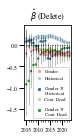

In [325]:
plot_compete('Delete')

0.168998461272869


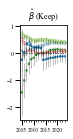

In [326]:
plot_compete('Keep')

0.963827017727764


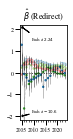

In [327]:
plot_compete('Redirect')

0.9726830794517


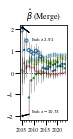

In [328]:
plot_compete('Merge')

0.133331868131892


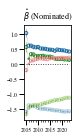

In [329]:
plot_compete('Nominated')

# Study on the direction on Merge and Redirect

In [315]:
data_for_compete_risk_all = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/data_for_compete_risk_all.csv', index_col=False)

In [317]:
data_for_compete_risk_all = data_for_compete_risk_all_another_okay2

In [318]:
data_for_compete_risk_all[data_for_compete_risk_all['event']=='other']['Gender'].value_counts()

0.0    650
1.0    153
Name: Gender, dtype: int64

In [5]:
data_for_compete_risk_all[data_for_compete_risk_all['event']=='other'][['page_title']].to_csv('csv_files/data_Gender_bias/data_survival_analysis/need_extract_again.csv', index=False)

In [321]:
data_for_compete_risk_all[data_for_compete_risk_all['event']!='not-nominated']['event'].value_counts()/82533

# /data_for_compete_risk_all[data_for_compete_risk_all['event']!='not-nominated'].value_counts().sum()

nominated    1.019641
delete       0.500818
keep         0.429271
redirect     0.047835
merge        0.012347
other        0.009729
Name: event, dtype: float64

In [320]:
data_for_compete_risk_all[data_for_compete_risk_all['event']!='not-nominated']['event'].value_counts()[1:].sum()

82533

In [322]:
data_for_compete_risk_all[data_for_compete_risk_all['event']=='other'][['page_title']]

,page_title
1184,William_Kennon_Mayo
2101,Gary_Farr
5425,Walter_Jewell
1476,Tan_Sri_Abdul_Kadir_Yusuf
24402,John_Jorgenson
...,...
1121,Michael_Swanson
1124,P._Imadura
1132,Beau_Davidson
1136,John_M._Mathew


In [323]:
data_merge_decision=pd.merge(articles[articles['action']=='Outcome'],data_for_compete_risk_all[data_for_compete_risk_all['event']=='merge'], on='page_title').drop_duplicates(subset=['page_title','recommend'], keep='first')

In [324]:
data_redirect_decision=pd.merge(articles[articles['action']=='Outcome'],data_for_compete_risk_all[data_for_compete_risk_all['event']=='redirect'], on='page_title').drop_duplicates(subset=['page_title','recommend'], keep='first')

In [325]:
data_redirect_decision[['page_title','recommend','rationals']]

,page_title,recommend,rationals
0,Tom_Fenton_(ice_hockey),Redirect,The result was Redirect to 2010–11 Phoenix C...
1,Dale_Hibbert,redirect to [[The Smiths]],The result was redirect to The Smiths. Spar...
2,Michael_Abram,redirect to [[George Harrison#Knife attack]],The result was redirect to George Harrison#...
3,Sean_P,redirect to [[YoungBloodZ]],The result was redirect to YoungBloodZ. Red...
4,Huddles,redirected,The result was redirected to Cell group per ...
...,...,...,...
4217,Karla_Šabašov,redirect,The result was redirect‎__EXPECTED_UNCONNECTED...
4218,Sarrive_Badiambila,redirect,The result was redirect‎__EXPECTED_UNCONNECTED...
4219,Alan_Dixon_(Australian_investor),redirect,The result was redirect‎__EXPECTED_UNCONNECTED...
4220,Rebecca_Ross_Haywood,redirect,The result was redirect‎__EXPECTED_UNCONNECTED...


In [326]:
data_merge_decision[['page_title','recommend','rationals']]

,page_title,recommend,rationals
0,Naomi_Yang,merge to [[Damon and Naomi]],The result was merge to Damon and Naomi. Ro...
1,Mike_Wilson_(outfielder),merge to [[Seattle Mariners minor league playe...,The result was merge to Seattle Mariners mi...
2,Huang_group,merge to [[Huang Xianfan]],The result was merge to Huang Xianfan. Cour...
3,Russell_Hantz,merge to [[Survivor: Samoa]],The result was merge to Survivor: Samoa. No...
8,Taliban_Deputy_Defense_Minister,merge to [[Islamic Emirate of Afghanistan]],The result was merge to Islamic Emirate of ...
...,...,...,...
1106,Darren_Trumeter,merge,The result was merge‎__EXPECTED_UNCONNECTED_PA...
1107,Roy_(Egyptian_noble),merge,The result was merge‎__EXPECTED_UNCONNECTED_PA...
1108,Sylvain_Claudius_Goy,merge,The result was merge‎__EXPECTED_UNCONNECTED_PA...
1109,Altani,merge,The result was merge‎__EXPECTED_UNCONNECTED_PA...


In [327]:
data_redirect_decision['redirect_to']=data_redirect_decision['rationals'].apply(lambda x: str(x).replace("\u200e__EXPECTED_UNCONNECTED_PAGE__","")
                                                                       .replace("redirected","redirect")
                                                                       .replace("Redirect","redirect")
                                                                       .replace("REDIRECT","redirect")
                                                                       .split(".")[0].split("redirect to")[-1]
                                                                       .split("redirect into")[-1])

In [328]:
data_redirect_decision2=data_redirect_decision[['Entry','QID','Gender','Status','page_title','redirect_to','rationals']]


In [329]:
data_redirect_decision2[['page_title','redirect_to','rationals']][:50]

,page_title,redirect_to,rationals
0,Tom_Fenton_(ice_hockey),2010–11 Phoenix Coyotes season,The result was Redirect to 2010–11 Phoenix C...
1,Dale_Hibbert,The Smiths,The result was redirect to The Smiths. Spar...
2,Michael_Abram,George Harrison#Knife attack,The result was redirect to George Harrison#...
3,Sean_P,YoungBloodZ,The result was redirect to YoungBloodZ. Red...
4,Huddles,The result was redirect to Cell group per no...,The result was redirected to Cell group per ...
5,Clay_Duke,2010 Panama City school board shootings,The result was redirect to 2010 Panama City...
6,Karen_Garver_Santorum,Rick Santorum,The result was redirect to Rick Santorum. (...
7,Robbie_Widlansky,Baltimore Orioles minor league players,The result was redirect to Baltimore Oriole...
11,Andy_Vidak,United States House of Representatives elect...,The result was redirect to United States H...
13,Deborah_Nelson_Mathers-Briggs,Eminem,The result was redirect to Eminem. Tone 11:...


In [330]:
data_merge_decision['merge_to']=data_merge_decision['rationals'].apply(lambda x: str(x).replace("\u200e__EXPECTED_UNCONNECTED_PAGE__","")
                                                                       .replace("merged","merge")
                                                                       .replace("Merge","merge")
                                                                       .replace("merge and redirect","merge")
                                                                       .replace("merged and redirected","merge")
                                                                       .replace("merge/redirect","merge")
                                                                       .replace("merge & redirect","merge")
                                                                       .replace("merged & redirected","merge")
                                                                       .replace("merged/redirected","merge")
                                                                       .replace("merge and Redirect","merge")
                                                                       .replace("MERGE","merge")
                                                                       .split(".")[0].split("merge to")[-1]
                                                                       .split("merge with")[-1]
                                                                       .split("merge into")[-1])

In [331]:
data_merge_decision2=data_merge_decision[['Entry','QID','Gender','Status','page_title','merge_to','rationals']]
# [130:150]

In [332]:
wikidata_page_id_all = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/wikidata_page_id_all2_merged.csv', index_col=False)


In [333]:
wikidata_page_id_all.head()

,page_id,page_title,Entry,QID,gender,date_of_birth,date_of_death
0,61541162.0,Yu_Dunkang,Yu Dunkang,Q66508048,male,1930-05-01T00:00:00Z,2019-07-14T00:00:00Z
1,61541201.0,Todd_Helder,Todd Helder,Q65204862,male,1998-08-03T00:00:00Z,no data
2,61541213.0,Diaranké_Fofana,Diaranké Fofana,Q17279293,male,1989-07-14T00:00:00Z,no data
3,61541234.0,Agnes_Waters,Agnes Waters,Q66942033,female,1893-01-01T00:00:00Z,no data
4,61541236.0,Stevan_Magazinović,Stevan Magazinović,Q3498829,male,1804-01-01T00:00:00Z,1874-02-17T00:00:00Z


In [334]:
wikidata_page_id_all['Entry']=wikidata_page_id_all['page_title'].apply(lambda x: str(x).replace("_"," "))

In [335]:
pd.merge(data_merge_decision2,wikidata_page_id_all, left_on='merge_to', right_on='Entry')

,Entry_x,QID_x,Gender,Status,page_title_x,merge_to,rationals,page_id,page_title_y,Entry_y,QID_y,gender,date_of_birth,date_of_death


In [336]:
data_merge_decision2

,Entry,QID,Gender,Status,page_title,merge_to,rationals
0,Naomi Yang,Q56867946,1.0,Alive,Naomi_Yang,Damon and Naomi,The result was merge to Damon and Naomi. Ro...
1,Mike Wilson (outfielder),Q3313592,0.0,Alive,Mike_Wilson_(outfielder),Seattle Mariners minor league players,The result was merge to Seattle Mariners mi...
2,Huang group,Q115590990,0.0,Alive,Huang_group,Huang Xianfan,The result was merge to Huang Xianfan. Cour...
3,Russell Hantz,Q15958103,0.0,Alive,Russell_Hantz,Survivor: Samoa,The result was merge to Survivor: Samoa. No...
8,Taliban Deputy Defense Minister,Q6891952,0.0,Alive,Taliban_Deputy_Defense_Minister,Islamic Emirate of Afghanistan,The result was merge to Islamic Emirate of ...
...,...,...,...,...,...,...,...
1106,Darren Trumeter,Q5225207,0.0,Alive,Darren_Trumeter,The Whitest Kids U' Know,The result was merge‎__EXPECTED_UNCONNECTED_PA...
1107,Roy (Egyptian noble),Q123111664,0.0,Alive,Roy_(Egyptian_noble),TT255,The result was merge‎__EXPECTED_UNCONNECTED_PA...
1108,Sylvain Claudius Goy,Q117278989,0.0,Alive,Sylvain_Claudius_Goy,Croissant#Origin and history,The result was merge‎__EXPECTED_UNCONNECTED_PA...
1109,Altani,Q4736153,1.0,Historical,Altani,Tolui,The result was merge‎__EXPECTED_UNCONNECTED_PA...


In [337]:
import requests
import re
from lxml import etree
from bs4 import BeautifulSoup
# import mwparserfromhell
import datetime
import pandas as pd
import tqdm
from tqdm import notebook as nb
from wikidata.client import Client
import time

In [24]:
title_list = data_merge_decision['merge_to']


In [344]:
# title_list = data_merge_decision['merge_to']
merge_to_list = []

for i,r in nb.tqdm(data_merge_decision2[['page_title','QID','merge_to']].iterrows()):
#     if tl in list(df_gender['Entry']):
        
#         continue
#     print(tl)
    entry = r['merge_to']
    qid = 'no data'
    instances = ''
    gender = ''
    try:
        URL = 'https://en.wikipedia.org/wiki/' + entry.replace(" ","_")
        print(URL)
        page=requests.get(URL)
#         archive_num=1
        if(page.status_code==200):




        #     print(INDEX_URI2)



            soup = BeautifulSoup(page.content, "html.parser")
            qid=soup.find('li', id="t-wikibase").find('a')['href'].split("/")[-1]
#             print(qid)
            client = Client()
            entity = client.get(str(qid), load=True)

            entity

            i=entity[client.get('P31')]

            #     print(i.id)
            #     print(type(str(i.label)))
            instances=str(i.label)

            if str(i.label) == 'human':
                i2=entity[client.get('P21')]

            #             print(i.id)
            #             print(i.label)
            #             print(i2.id)
            #             print(i2.label)
                gender=str(i2.label)
#                 print(instances,gender)
    except:
        pass
    
    print([r['page_title'],r['QID'],entry,qid,instances,gender])
    merge_to_list.append([r['QID'],entry,qid,instances,gender])
#     pd.DataFrame([[entry,qid,instances,gender]]).to_csv('csv_files/data_Gender_bias/Afd From Start/Wikidata_gender_label.csv', 
#                                                         mode='a', 
#                                                         index=False,
#                                                         header=False
#                                                        )
    
    time.sleep(1)

0it [00:00, ?it/s]

https://en.wikipedia.org/wiki/_Damon_and_Naomi
['Naomi_Yang', 'Q56867946', ' Damon and Naomi', 'Q3701328', 'musical group', '']
https://en.wikipedia.org/wiki/_Seattle_Mariners_minor_league_players
['Mike_Wilson_(outfielder)', 'Q3313592', ' Seattle Mariners minor league players', 'Q34156629', 'Wikimedia list article', '']
https://en.wikipedia.org/wiki/_Huang_Xianfan
['Huang_group', 'Q115590990', ' Huang Xianfan', 'Q5208', 'human', 'male']
https://en.wikipedia.org/wiki/_Survivor:_Samoa
['Russell_Hantz', 'Q15958103', ' Survivor: Samoa', 'Q1825840', 'television series season', '']
https://en.wikipedia.org/wiki/_Islamic_Emirate_of_Afghanistan
['Taliban_Deputy_Defense_Minister', 'Q6891952', ' Islamic Emirate of Afghanistan', 'Q889', 'sovereign state', '']
https://en.wikipedia.org/wiki/_Chicago_Cubs_minor_league_players
['Blake_Parker', 'Q2905843', ' Chicago Cubs minor league players', 'Q5095567', 'Wikimedia list article', '']
https://en.wikipedia.org/wiki/_List_of_Fair_City_characters
['Mike

https://en.wikipedia.org/wiki/_Left_Behind_(series)
['Al_B', 'Q2260801', ' Left Behind (series)', 'Q1027525', 'novel series', '']
https://en.wikipedia.org/wiki/_Van_Halen
['Jan_Van_Halen', 'Q23620367', ' Van Halen', 'Q190155', 'musical group', '']
https://en.wikipedia.org/wiki/The_result_was____merge_since_no_one_else_could_be_bothered
['Harriet_Christian', 'Q75481108', 'The result was    merge since no one else could be bothered', 'no data', '', '']
https://en.wikipedia.org/wiki/_Good_Times#Minor_characters
['Cleatus', 'Q63997499', ' Good_Times#Minor_characters', 'Q1248045', 'television series', '']
https://en.wikipedia.org/wiki/_Funk_carioca
['Créu', 'Q1767569', ' Funk carioca', 'Q1931130', 'music genre', '']
https://en.wikipedia.org/wiki/_Captain_Beefheart
['Paul_Blakely', 'Q16943668', ' Captain Beefheart', 'Q312264', 'human', 'male']
https://en.wikipedia.org/wiki/_Cartel_(band)_and_move_the_bulk_of_the_content_(not_much)_there
['Will_Pugh', 'Q57735997', ' Cartel (band) and move the

https://en.wikipedia.org/wiki/_Laurie_Ferguson
['Maureen_Walsh', 'Q6792765', ' Laurie Ferguson', 'Q6501571', 'human', 'male']
https://en.wikipedia.org/wiki/Note:_This_debate_has_been_included_in_the_list_of_Living_people-related_deletion_discussions
['Pam_Evans', 'Q7128930', 'Note: This debate has been included in the list of Living people-related deletion discussions', 'no data', '', '']
https://en.wikipedia.org/wiki/_List_of_passengers_on_the_Mayflower
['John_Allerton', 'Q45603722', ' List of passengers on the Mayflower', 'Q3833924', 'Wikimedia list article', '']
https://en.wikipedia.org/wiki/_Drobo
['Data_Robotics', 'Q72977797', ' Drobo', 'Q5308167', 'business', '']
https://en.wikipedia.org/wiki/_Hans_Multhopp
['Checkers_chess', 'Q18280355', ' Hans Multhopp', 'Q3783168', 'human', 'male']
https://en.wikipedia.org/wiki/_Married_to_the_Sea
['NatalieDee', 'Q66439220', ' Married to the Sea', 'Q6772959', 'webcomic', '']
https://en.wikipedia.org/wiki/_Diamond_Way_Buddhism
['Hannah_Nydahl',

https://en.wikipedia.org/wiki/_Lillie_Langtry
['Jeanne_Marie_Langtry_Malcolm', 'Q84795732', ' Lillie Langtry', 'Q297743', 'human', 'female']
https://en.wikipedia.org/wiki/The_result_was____merge_all_to_Casting_Crowns
['Andy_Williams_(drummer)', 'Q4761492', 'The result was    merge all to Casting Crowns', 'no data', '', '']
https://en.wikipedia.org/wiki/_American_Idol_(season_7)
["Asia'h_Epperson", 'Q60674404', ' American Idol (season 7)', 'Q2583334', 'television series season', '']
https://en.wikipedia.org/wiki/_Jami'a_Nooriyya_Arabic_College
['Faizee', 'Q110269541', " Jami'a Nooriyya Arabic College", 'Q6146342', 'seminary', '']
https://en.wikipedia.org/wiki/_Apple_TV
['Mauricio_Pastrana', 'Q4346699', ' Apple TV', 'Q270285', 'media player software', '']
https://en.wikipedia.org/wiki/_List_of_past_minor_and_recurring_characters_from_Hollyoaks
['Melissa_Hurst', 'Q22704701', ' List of past minor and recurring characters from Hollyoaks', 'Q3402665', 'Wikimedia list of fictional characters'

https://en.wikipedia.org/wiki/Note:__This_debate_has_been_included_in_the_list_of_Fictional_characters-related_deletions
['Ruth_Gallagher', 'Q463507', 'Note:  This debate has been included in the list of Fictional characters-related deletions', 'no data', '', '']
https://en.wikipedia.org/wiki/_Marsh_Arabs_(which_should_be_the_name_per_WP:NC)
['Madan_(people)', 'Q1237930', ' Marsh Arabs (which should be the name per WP:NC)', 'no data', '', '']
https://en.wikipedia.org/wiki/_Video_125
['1066_DC', 'Q123057', ' Video 125', 'no data', '', '']
https://en.wikipedia.org/wiki/The_result_was_merge/Redirect
['Celebrate_NJ!', 'Q88508315', 'The result was merge/Redirect', 'no data', '', '']
https://en.wikipedia.org/wiki/The_result_was_merge
['Rebecca_Curci', 'Q3931225', 'The result was merge', 'no data', '', '']
https://en.wikipedia.org/wiki/_Lauder_Baronets
['Piers_Lauder', 'Q75871474', ' Lauder Baronets', 'Q6497839', 'baronetcy', '']
https://en.wikipedia.org/wiki/_Unniarcha
['Unniyarcha', 'Q78971

https://en.wikipedia.org/wiki/_Simon_Garner
['Joe_Garner', 'Q449629', ' Simon Garner', 'Q7518826', 'human', 'male']
https://en.wikipedia.org/wiki/merge_-_The_most_notable_aspect_of_the_article_(in_my_mind)_is_Serebrian's_position_as_chairman
['Oleg_Serebrian', 'Q955070', "merge - The most notable aspect of the article (in my mind) is Serebrian's position as chairman", 'no data', '', '']
https://en.wikipedia.org/wiki/_Steve_Jobs_and_delete
['Lisa_Nicole', 'Q256613', ' Steve Jobs and delete', 'no data', '', '']
https://en.wikipedia.org/wiki/_University_College_London
['Bloomsbury_Television', 'Q596137', ' University College London', 'Q193196', 'university college', '']
https://en.wikipedia.org/wiki/_Where_Troy_Once_Stood_-_Yomanganitalk_23:27,_16_October_2006_(UTC)
['Iman_Wilkens', 'Q2004975', ' Where Troy Once Stood - Yomanganitalk 23:27, 16 October 2006 (UTC)', 'no data', '', '']
https://en.wikipedia.org/wiki/_Regents_of_the_University_of_California_v
['Allan_Paul_Bakke', 'Q113732252',

https://en.wikipedia.org/wiki/_ain't
["Hain't", 'Q317823', " ain't", 'Q4697206', 'contraction', '']
https://en.wikipedia.org/wiki/The_result_of_the_debate_was_consensus_that_article_should_not_exist_as_standalone;_no_consensus_as_to_whether_it_should_be_deleted_or_merge,_therefore_merge
['Leets', 'Q12374895', 'The result of the debate was consensus that article should not exist as standalone; no consensus as to whether it should be deleted or merge, therefore merge', 'no data', '', '']
https://en.wikipedia.org/wiki/The_result_of_the_debate_was_merge
['Jerry_Jewell', 'Q15493849', 'The result of the debate was merge', 'no data', '', '']
https://en.wikipedia.org/wiki/The_result_of_the_debate_was_merge_per_Carie
['Rhonetta_Johnson', 'Q29859101', 'The result of the debate was merge per Carie', 'no data', '', '']
https://en.wikipedia.org/wiki/The_result_of_the_debate_was_merge
['P._Emerson_Williams', 'Q30105286', 'The result of the debate was merge', 'no data', '', '']
https://en.wikipedia.o

['Antisthenes_(Heraclitean)', 'Q22906414', ' Heraclitus#Influence', 'Q41155', 'human', 'male']
https://en.wikipedia.org/wiki/_2020–2022_China–India_skirmishes
['Nuduram_Soren', 'Q108891586', ' 2020–2022 China–India skirmishes', 'Q93879586', 'border conflict', '']
https://en.wikipedia.org/wiki/_List_of_Old_Newingtonians#The_diplomatic_service
['Jonathan_Gilbert_(diplomat)', 'Q55615282', ' List of Old Newingtonians#The diplomatic service', 'Q6592840', 'Wikimedia list article', '']
https://en.wikipedia.org/wiki/_Weight_cutting
['Paddy_Golden', 'Q110452860', ' Weight cutting', 'Q7979865', '', '']
https://en.wikipedia.org/wiki/_Gerry_and_the_Pacemakers
['Freddie_Marsden', 'Q1919939', ' Gerry and the Pacemakers', 'Q733400', 'musical group', '']
https://en.wikipedia.org/wiki/_DigiPen_Institute_of_Technology
['Claude_Comair', 'Q5128768', ' DigiPen Institute of Technology', 'Q1027869', 'university', '']
https://en.wikipedia.org/wiki/_Luge_at_the_1968_Winter_Olympics
['Jacqueline_Barasinski', 'Q

['Alfred_Gissing', 'Q4722736', ' George Gissing', 'Q369790', 'human', 'male']
https://en.wikipedia.org/wiki/_USS_Hickox
['Ralph_Hickox', 'Q7287631', ' USS Hickox', 'Q7870176', 'destroyer', '']
https://en.wikipedia.org/wiki/_USS_Donaldson
['Trose_Emmett_Donaldson', 'Q7846290', ' USS Donaldson', 'Q7868917', 'ship', '']
https://en.wikipedia.org/wiki/_USS_Harold_J
['Harold_John_Ellison', 'Q5661277', ' USS Harold J', 'no data', '', '']
https://en.wikipedia.org/wiki/_USS_Austin_(DE-15)
['John_Arnold_Austin', 'Q6219439', ' USS Austin (DE-15)', 'Q7867510', 'destroyer escort', '']
https://en.wikipedia.org/wiki/_Mount_Vernon_City_Council
['André_Wallace', 'Q104536891', ' Mount Vernon City Council', 'Q835831', 'city in the United States', '']
https://en.wikipedia.org/wiki/_Assassination_of_Mehmet_Baydar_and_Bahadır_Demir
['Mehmet_Baydar', 'Q6013371', ' Assassination of Mehmet Baydar and Bahadır Demir', 'Q105299263', 'attempted murder', '']
https://en.wikipedia.org/wiki/_Assassination_of_Mehmet_Ba

https://en.wikipedia.org/wiki/_Lee_Harvey_Oswald
['Ella_German', 'Q5364500', ' Lee Harvey Oswald', 'Q48745', 'human', 'male']
https://en.wikipedia.org/wiki/_Laxdæla_saga
['Geirmund_the_Noisy', 'Q5530206', ' Laxdæla saga', 'Q122708', 'literary work', '']
https://en.wikipedia.org/wiki/_Prince_Philipp_of_Liechtenstein
['Prince_Wenzeslaus_of_Liechtenstein', 'Q7244272', ' Prince Philipp of Liechtenstein', 'Q2054781', 'human', 'male']
https://en.wikipedia.org/wiki/_List_of_Pakistan_Air_Force_cricketers
['Ziauddin_(cricketer)', 'Q8071380', ' List of Pakistan Air Force cricketers', 'Q98078066', 'Wikimedia list article', '']
https://en.wikipedia.org/wiki/_Alec_Campbell_(footballer)
['Alastair_Campbell_(cricketer)', 'Q4708697', ' Alec Campbell (footballer)', 'Q4708697', 'human', 'male']
https://en.wikipedia.org/wiki/_Jockeys'_Guild
['L._Wayne_Gertmenian', 'Q6456692', " Jockeys' Guild", 'Q6207563', 'labor union', '']
https://en.wikipedia.org/wiki/_Guantanamo_Bay_detention_camp
['Heather_Cerveny',

https://en.wikipedia.org/wiki/_ABC_Radio_Grandstand
['Simone_Thurtell', 'Q16886128', ' ABC Radio Grandstand', 'Q4650221', 'radio station', '']
https://en.wikipedia.org/wiki/_Ericom_Software
['David_Canellos', 'Q61746783', ' Ericom Software', 'Q5388212', 'business', '']
https://en.wikipedia.org/wiki/_Wheatus
['Brendan_B._Brown', 'Q281308', ' Wheatus', 'Q957718', 'musical group', '']
https://en.wikipedia.org/wiki/_Soul_Fresh
['JB_(Liberian_rapper)', 'Q60736118', ' Soul Fresh', 'Q63117783', 'musical duo', '']
https://en.wikipedia.org/wiki/_Kazka
['Oleksandra_Zaritska', 'Q56368853', ' Kazka', 'Q47494823', 'musical group', '']
https://en.wikipedia.org/wiki/_Shantikunj
['Bhagawati_Devi_Sharma', 'Q4900635', ' Shantikunj', 'Q7489087', '', '']
https://en.wikipedia.org/wiki/_Ernest_Gordon
['Dusty_Miller_(martyr)', 'Q5317196', ' Ernest Gordon', 'Q1356334', 'human', 'male']
https://en.wikipedia.org/wiki/_Jeanne_Calment
['Yvonne_Calment', 'Q58208585', ' Jeanne Calment', 'Q182260', 'human', 'female'

https://en.wikipedia.org/wiki/_Ram_Bahadur_Bomjon#Media_coverage
["Media_on_Ram_Bahadur_Bomjon's_controversies", 'Q560055', ' Ram Bahadur Bomjon#Media coverage', 'Q560055', 'human', 'male']
https://en.wikipedia.org/wiki/_Henrik_Steffens#Legacy
['Henrik_Steffens_Professor', 'Q64406', ' Henrik Steffens#Legacy', 'Q64406', 'human', 'male']
https://en.wikipedia.org/wiki/_Oswald_Foundation
['Anand_Chowdhary', 'Q33134612', ' Oswald Foundation', 'Q27593967', 'business', '']
https://en.wikipedia.org/wiki/_Willie_Tyler
['Cory_Tyler', 'Q8021862', ' Willie Tyler', 'Q8021862', 'human', 'male']
https://en.wikipedia.org/wiki/_Jamal_Ehsani
['Kulliyaat-e-Jamal', 'Q6127546', ' Jamal Ehsani', 'Q6127546', 'human', 'male']
https://en.wikipedia.org/wiki/_David_Brin
['The_Giving_Plague', 'Q315069', ' David Brin', 'Q315069', 'human', 'male']
https://en.wikipedia.org/wiki/_Anne_Lister
['Ann_Walker_(died_1854)', 'Q33076937', ' Anne Lister', 'Q2745195', 'human', 'female']
https://en.wikipedia.org/wiki/_Phil_K
['

['Lejla_Vulić', 'Q18211749', ' Montenegro in the Junior Eurovision Song Contest 2014', 'Q17377217', 'nation in the Junior Eurovision Song Contest', '']
https://en.wikipedia.org/wiki/_Leatherface
['Frankie_Stubbs', 'Q5491074', ' Leatherface', 'Q1647348', 'fictional human', '']
https://en.wikipedia.org/wiki/_Oakland_Athletics_minor_league_players
['Richie_Martin', 'Q20657279', ' Oakland Athletics minor league players', 'Q42224101', 'Wikimedia list article', '']
https://en.wikipedia.org/wiki/_Alan_Minshaw
['Demon_Tweeks', 'Q4707332', ' Alan Minshaw', 'Q4707332', 'human', 'male']
https://en.wikipedia.org/wiki/The_result_was_merge_Not_enough_sources_for_a_stand_alone_article
['Corrupt_Souls', 'Q5671329', 'The result was merge Not enough sources for a stand alone article', 'no data', '', '']
https://en.wikipedia.org/wiki/__List_of_supercentenarians_from_the_United_States
['Charlotte_Benkner', 'Q2795098', '  List of supercentenarians from the United States', 'Q2309504', 'Wikimedia list articl

['Bert_L._Stevens', 'Q94002', 'The result was    merge + redirect to Barbara Stanwyck', 'no data', '', '']
https://en.wikipedia.org/wiki/Article_was_unsourced,_and_tagged_as_such,_for_8_years;_prodded,_deleted,_and_promptly_re-created_with_even_less_content_but_still_unsourced
['Philip_of_France,_Archdeacon_of_Paris', 'Q2051323', 'Article was unsourced, and tagged as such, for 8 years; prodded, deleted, and promptly re-created with even less content but still unsourced', 'no data', '', '']
https://en.wikipedia.org/wiki/_Lizabeth_Scott
['Lizabeth_Scott_(criticism)', 'Q264011', ' Lizabeth Scott', 'Q264011', 'human', 'female']
https://en.wikipedia.org/wiki/_Ronald_McNair
['McNair_SROP_Michigan_State_University', 'Q315730', ' Ronald McNair', 'Q315730', 'human', 'male']
https://en.wikipedia.org/wiki/_Tom_Gilb
['Competitive_Engineering', 'Q7815925', ' Tom Gilb', 'Q7815925', 'human', 'male']
https://en.wikipedia.org/wiki/The_result_was____keep
['Jacques_Butin', 'Q6120463', 'The result was    

['Hemingway_&_Fuentes', 'Q189415', ' Andy García#Hemmingway project', 'Q189415', 'human', 'male']
https://en.wikipedia.org/wiki/_W
['Jazz_Loft_Project', 'Q551491', ' W', 'Q9964', 'ligature', '']
https://en.wikipedia.org/wiki/_Camilo_Him
['Big_Shows', 'Q44378', ' Camilo Him', 'no data', '', '']
https://en.wikipedia.org/wiki/_Gina_Keatley
['Healthy_Soul_with_Gina_Keatley', 'Q5562882', ' Gina Keatley', 'Q5562882', 'human', 'female']
https://en.wikipedia.org/wiki/_Art_Alexakis
['Colorfinger', 'Q4796673', ' Art Alexakis', 'Q4796673', 'human', 'male']
https://en.wikipedia.org/wiki/_Judith_Barsi
['József_Barsi', 'Q235922', ' Judith Barsi', 'Q235922', 'human', 'female']
https://en.wikipedia.org/wiki/_Beyoncé_Knowles
['Bey_Hive', 'Q36153', ' Beyoncé Knowles', 'Q36153', 'human', 'female']
https://en.wikipedia.org/wiki/_John_Butler_Yeats#Family
['Susan_Pollexfen', 'Q2356757', ' John Butler Yeats#Family', 'Q2356757', 'human', 'male']
https://en.wikipedia.org/wiki/_Karen_Latham_by_nominator
['Bonni

['Sharad_Pawar_slapping_incident', 'Q982813', ' Sharad Pawar', 'Q982813', 'human', 'male']
https://en.wikipedia.org/wiki/_Chenjerai_Hunzvi
['Wiesława_Hunzvi', 'Q5091407', ' Chenjerai Hunzvi', 'Q5091407', 'human', 'male']
https://en.wikipedia.org/wiki/_Amaury_Bitetti_
['Bitetti_Combat', 'Q4740681', ' Amaury Bitetti ', 'Q4740681', 'human', 'male']
https://en.wikipedia.org/wiki/_Mondoweiss
['Adam_Horowitz_(journalist)', 'Q4679255', ' Mondoweiss', 'Q6898809', 'online newspaper', '']
https://en.wikipedia.org/wiki/The_result_was____history_merge
['Arshad_Warsi_Movies', 'Q704859', 'The result was    history merge', 'no data', '', '']
https://en.wikipedia.org/wiki/_Jilly_Cooper
['Octavia_(TV_serial)', 'Q1689012', ' Jilly Cooper', 'Q1689012', 'human', 'female']
https://en.wikipedia.org/wiki/_Devorah_Rose
['Social_Life_(magazine)', 'Q5267897', ' Devorah Rose', 'Q5267897', 'human', 'female']
https://en.wikipedia.org/wiki/_Ian_Gilmour,_Baron_Gilmour_of_Craigmillar
['Lady_Caroline_Gilmore', 'Q33336

https://en.wikipedia.org/wiki/_Luke_Laird#Publishing
['Creative_Nation', 'Q16203020', ' Luke Laird#Publishing', 'Q16203020', 'human', 'male']
https://en.wikipedia.org/wiki/_MC_Hammer#Additional_business_ventures
['WireDoo', 'Q295923', ' MC Hammer#Additional business ventures', 'Q295923', 'human', 'male']
https://en.wikipedia.org/wiki/_Atlanta_Braves_minor_league_players_-_Non-admin_closure,_but_consensus_is_quite_clear
['Cody_Martin_(baseball)', 'Q5140448', ' Atlanta Braves minor league players - Non-admin closure, but consensus is quite clear', 'no data', '', '']
https://en.wikipedia.org/wiki/_Suad_Joseph_as_a_clear_consensus
['Arab_Families_Working_Group', 'Q7630433', ' Suad Joseph as a clear consensus', 'no data', '', '']
https://en.wikipedia.org/wiki/The_result_was____''''''
['List_of_statues_of_Andranik_Ozanian', 'Q278864', "The result was    ''''''", 'no data', '', '']
https://en.wikipedia.org/wiki/_Mohamed_Bouazizi
['Self-immolations_in_Tunisia', 'Q214088', ' Mohamed Bouazizi', 

https://en.wikipedia.org/wiki/_Yul_Brynner
["Yul_Brynner's_shaved_head", 'Q102813', ' Yul Brynner', 'Q102813', 'human', 'male']
https://en.wikipedia.org/wiki/_Hope_Partlow
['The_Love_Willows', 'Q5899411', ' Hope Partlow', 'Q5899411', 'human', 'female']
https://en.wikipedia.org/wiki/_September_Six
['Avraham_Gileadi', 'Q4829403', ' September Six', 'Q5648834', 'group of humans', '']
https://en.wikipedia.org/wiki/_Don_Mattingly#Personal_life
['Preston_Mattingly', 'Q679120', ' Don Mattingly#Personal life', 'Q679120', 'human', 'male']
https://en.wikipedia.org/wiki/_Janwillem_van_de_Wetering
['Grijpstra_and_de_Gier', 'Q964037', ' Janwillem van de Wetering', 'Q964037', 'human', 'male']
https://en.wikipedia.org/wiki/_Ronald_Shiner
['Rise_and_Shiner', 'Q1338138', ' Ronald Shiner', 'Q1338138', 'human', 'male']
https://en.wikipedia.org/wiki/_Pia_Zadora
['Pia_(album)', 'Q437039', ' Pia Zadora', 'Q437039', 'human', 'female']
https://en.wikipedia.org/wiki/_St
['Chuckie_Fick', 'Q2967617', ' St', 'Q224

https://en.wikipedia.org/wiki/_Central_Michigan_Chippewas_football
['Pete_McCormick', 'Q7172136', ' Central Michigan Chippewas football', 'Q5061427', 'American football team', '']
https://en.wikipedia.org/wiki/_William_Grey,_13th_Baron_Grey_de_Wilton
['Mary_Grey,_Baroness_Grey_de_Wilton', 'Q6485520', ' William Grey, 13th Baron Grey de Wilton', 'Q8010201', 'human', 'male']
https://en.wikipedia.org/wiki/_Randy_Feltface
['Heath_McIvor', 'Q5693493', ' Randy Feltface', 'Q24185497', 'puppet', '']
https://en.wikipedia.org/wiki/_The_Stoning_of_Soraya_M
['Soraya_Manutchehri', 'Q704685', ' The Stoning of Soraya M', 'Q1021571', 'film', '']
https://en.wikipedia.org/wiki/_Shehu_Musa_Yar'Adua
["Asabe_Shehu_Musa_Yar'Adua", 'Q50676799', " Shehu Musa Yar'Adua", 'Q3509379', 'human', 'male']
https://en.wikipedia.org/wiki/_Kollam_Municipal_Corporation
['Sabitha_Beegam', 'Q21932381', ' Kollam Municipal Corporation', 'Q18126899', 'municipal corporation in India', '']
https://en.wikipedia.org/wiki/_Mars_(ban

['Robert_Haimer', 'Q3938302', '*Fish heads, fish heads, eat them up', 'no data', '', '']
https://en.wikipedia.org/wiki/_Miss_Vermont
['Ashley_Wheeler', 'Q4805633', ' Miss Vermont', 'Q6877986', 'female beauty pageant', '']
https://en.wikipedia.org/wiki/_Adams_political_family#Members
['Elihu_Adams', 'Q5360840', ' Adams political family#Members', 'Q351731', 'family', '']
https://en.wikipedia.org/wiki/_Priest,_Politician,_Collaborator
['James_Mace_Ward', 'Q95313010', ' Priest, Politician, Collaborator', 'Q85794488', 'literary work', '']
https://en.wikipedia.org/wiki/_Instituto_Ayrton_Senna
['Viviane_Senna', 'Q274064', ' Instituto Ayrton Senna', 'Q504108', 'non-governmental organization', '']
https://en.wikipedia.org/wiki/_Sponsorship_scandal
['Jean_Lafleur', 'Q3172939', ' Sponsorship scandal', 'Q3474981', '', '']
https://en.wikipedia.org/wiki/_Sogdianus
['Pharnacyas', 'Q122385358', ' Sogdianus', 'Q298631', 'human', 'male']
https://en.wikipedia.org/wiki/_Great_Directors
['Angela_Ismailos',

In [339]:
redirect_to_df = pd.DataFrame(redirect_to_list, columns=['QID','redirect_to2','QID2','instance of','Gender2']).fillna('no data')

In [345]:
merge_to_df = pd.DataFrame(merge_to_list, columns=['QID','merge_to2','QID2','instance of','Gender2']).fillna('no data')

In [340]:
redirect_to_df

,QID,redirect_to2,QID2,instance of,Gender2
0,Q120015653,2010–11 Phoenix Coyotes season,Q4619791,ice hockey team season,
1,Q3701020,The Smiths,Q180598,rock band,
2,Q102437791,George Harrison#Knife attack,Q2643,human,male
3,Q20781862,YoungBloodZ,Q2630403,musical group,
4,Q19544787,The result was redirect to Cell group per no...,no data,,
...,...,...,...,...,...
3943,Q98083526,List of Croatia women's international footbal...,Q1861058,Wikimedia list article,
3944,Q106816691,List of Democratic Republic of the Congo wome...,Q106972883,Wikimedia list article,
3945,Q122442176,Dixon Advisory,Q60745522,,
3946,Q23303087,Barack Obama judicial appointment controversies,Q4858118,,


In [346]:
merge_to_df

,QID,merge_to2,QID2,instance of,Gender2
0,Q56867946,Damon and Naomi,Q3701328,musical group,
1,Q3313592,Seattle Mariners minor league players,Q34156629,Wikimedia list article,
2,Q115590990,Huang Xianfan,Q5208,human,male
3,Q15958103,Survivor: Samoa,Q1825840,television series season,
4,Q6891952,Islamic Emirate of Afghanistan,Q889,sovereign state,
...,...,...,...,...,...
1013,Q5225207,The Whitest Kids U' Know,Q2089766,television series,
1014,Q123111664,TT255,Q7671879,tomb,
1015,Q117278989,Croissant#Origin and history,Q207832,,
1016,Q4736153,Tolui,Q7517,human,male


In [341]:
data_redirect_decision2_all=pd.merge(data_redirect_decision2,redirect_to_df, on='QID')

In [342]:
data_redirect_decision2_all

,Entry,QID,Gender,Status,page_title,redirect_to,rationals,redirect_to2,QID2,instance of,Gender2
0,Tom Fenton (ice hockey),Q120015653,0.0,Alive,Tom_Fenton_(ice_hockey),2010–11 Phoenix Coyotes season,The result was Redirect to 2010–11 Phoenix C...,2010–11 Phoenix Coyotes season,Q4619791,ice hockey team season,
1,Dale Hibbert,Q3701020,0.0,Alive,Dale_Hibbert,The Smiths,The result was redirect to The Smiths. Spar...,The Smiths,Q180598,rock band,
2,Michael Abram,Q102437791,0.0,Alive,Michael_Abram,George Harrison#Knife attack,The result was redirect to George Harrison#...,George Harrison#Knife attack,Q2643,human,male
3,Sean P,Q20781862,0.0,Alive,Sean_P,YoungBloodZ,The result was redirect to YoungBloodZ. Red...,YoungBloodZ,Q2630403,musical group,
4,Huddles,Q19544787,0.0,Alive,Huddles,The result was redirect to Cell group per no...,The result was redirected to Cell group per ...,The result was redirect to Cell group per no...,no data,,
...,...,...,...,...,...,...,...,...,...,...,...
3951,Karla Šabašov,Q98083526,1.0,Alive,Karla_Šabašov,List of Croatia women's international footbal...,The result was redirect‎__EXPECTED_UNCONNECTED...,List of Croatia women's international footbal...,Q1861058,Wikimedia list article,
3952,Sarrive Badiambila,Q106816691,1.0,Alive,Sarrive_Badiambila,List of Democratic Republic of the Congo wome...,The result was redirect‎__EXPECTED_UNCONNECTED...,List of Democratic Republic of the Congo wome...,Q106972883,Wikimedia list article,
3953,Alan Dixon (Australian investor),Q122442176,0.0,Alive,Alan_Dixon_(Australian_investor),Dixon Advisory,The result was redirect‎__EXPECTED_UNCONNECTED...,Dixon Advisory,Q60745522,,
3954,Rebecca Ross Haywood,Q23303087,1.0,Alive,Rebecca_Ross_Haywood,Barack Obama judicial appointment controversies,The result was redirect‎__EXPECTED_UNCONNECTED...,Barack Obama judicial appointment controversies,Q4858118,,


In [347]:
data_merge_decision2_all=pd.merge(data_merge_decision2,merge_to_df, on='QID')

In [350]:
data_redirect_decision2_all.to_csv('csv_files/data_Gender_bias/data_survival_analysis/data_redirect_decision2_all.csv', index=False)

In [351]:
data_merge_decision2_all.to_csv('csv_files/data_Gender_bias/data_survival_analysis/data_merge_decision2_all.csv', index=False)

In [349]:
data_merge_decision2_all['instance of'].value_counts()/data_merge_decision2_all['instance of'].value_counts().sum()

human                                     0.352652
                                          0.249509
Wikimedia list article                    0.063851
musical group                             0.035363
Wikimedia list of fictional characters    0.017682
                                            ...   
phenomenon                                0.000982
political party                           0.000982
diocese of the Catholic Church            0.000982
newspaper                                 0.000982
law school                                0.000982
Name: instance of, Length: 194, dtype: float64

# Permutation Test

In [331]:
data_redirect_decision2_all = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/data_redirect_decision2_all.csv', index_col=False)

In [332]:
data_merge_decision2_all = pd.read_csv('csv_files/data_Gender_bias/data_survival_analysis/data_merge_decision2_all.csv', index_col=False)

In [333]:
data_redirect_decision2_all3=data_redirect_decision2_all[data_redirect_decision2_all['QID2']!='no data']

In [334]:
data_merge_decision2_all3=data_merge_decision2_all[data_merge_decision2_all['QID2']!='no data']

In [335]:

data_redirect_decision2_all3['Gender']= data_redirect_decision2_all3['Gender'].apply(lambda x: 'Men' if x==0 else 'Women')

data_redirect_decision2_all3['instance of2']= data_redirect_decision2_all3.apply(lambda x: x['Gender2'] if x['instance of']=='human' else 'not human', axis=1)

<ipython-input-335-b6698bb43753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_redirect_decision2_all3['Gender']= data_redirect_decision2_all3['Gender'].apply(lambda x: 'Men' if x==0 else 'Women')
<ipython-input-335-b6698bb43753>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_redirect_decision2_all3['instance of2']= data_redirect_decision2_all3.apply(lambda x: x['Gender2'] if x['instance of']=='human' else 'not human', axis=1)


In [336]:
data_merge_decision2_all3['Gender']= data_merge_decision2_all3['Gender'].apply(lambda x: 'Men' if x==0 else 'Women')
data_merge_decision2_all3['instance of2']= data_merge_decision2_all3.apply(lambda x: x['Gender2'] if x['instance of']=='human' else 'not human', axis=1)

<ipython-input-336-7277ef59feaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_decision2_all3['Gender']= data_merge_decision2_all3['Gender'].apply(lambda x: 'Men' if x==0 else 'Women')
<ipython-input-336-7277ef59feaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_decision2_all3['instance of2']= data_merge_decision2_all3.apply(lambda x: x['Gender2'] if x['instance of']=='human' else 'not human', axis=1)


In [337]:
data_redirect_decision2_all3['instance of2'].value_counts()/data_redirect_decision2_all3['instance of2'].value_counts().sum()

not human    0.727793
male         0.211382
female       0.060825
Name: instance of2, dtype: float64

In [338]:
data_merge_decision2_all3['instance of2'].value_counts()/data_merge_decision2_all3['instance of2'].value_counts().sum()

not human     0.548428
male          0.352201
female        0.098113
non-binary    0.001258
Name: instance of2, dtype: float64

## Redirect

In [340]:
data_redirect_decision2_all4=data_redirect_decision2_all3[['page_title','Gender','redirect_to2','Gender2','instance of2']]
data_redirect_decision2_all4

,page_title,Gender,redirect_to2,Gender2,instance of2
0,Tom_Fenton_(ice_hockey),Men,2010–11 Phoenix Coyotes season,NaN,not human
1,Dale_Hibbert,Men,The Smiths,NaN,not human
2,Michael_Abram,Men,George Harrison#Knife attack,male,male
3,Sean_P,Men,YoungBloodZ,NaN,not human
5,Clay_Duke,Men,2010 Panama City school board shootings,NaN,not human
...,...,...,...,...,...
3951,Karla_Šabašov,Women,List of Croatia women's international footbal...,NaN,not human
3952,Sarrive_Badiambila,Women,List of Democratic Republic of the Congo wome...,NaN,not human
3953,Alan_Dixon_(Australian_investor),Men,Dixon Advisory,NaN,not human
3954,Rebecca_Ross_Haywood,Women,Barack Obama judicial appointment controversies,NaN,not human


In [341]:
import warnings
warnings.filterwarnings(action='once')

In [342]:
def permutation_test_for_outcomes(data, option):

    
    men=data[data['Gender']=='Men'][['Gender','instance of2']]
    men['Gender of Alter']=men['instance of2'].apply(lambda x: 'same' if x=='male' else('opposite' if x=='female' else 'non-bios'))
    women=data[data['Gender']=='Women'][['Gender','instance of2']]
    women['Gender of Alter']=women['instance of2'].apply(lambda x: 'same' if x=='female' else('opposite' if x=='male' else 'non-bios'))
    biography_all= pd.concat([men.drop(columns=['instance of2']),women.drop(columns=['instance of2'])])

    biography_all
    contingency_table=pd.crosstab(biography_all['Gender'], biography_all['Gender of Alter'])
    contingency_table = contingency_table.rename_axis("Group", axis="index")
    table= contingency_table.div(contingency_table.sum(axis=1), axis=0)
    print(table)

    







    n_permutations = 1000
    perm_stats = []
    alter_column = option + '_to2'
    men_expected = []
    women_expected = []
    table3 =pd.DataFrame()


    for _ in range(n_permutations):

        shuffled_data = data.copy()
        shuffled_data_part = pd.DataFrame(np.random.permutation(data[[alter_column,'instance of2']]), columns=[alter_column,'instance of2'])
        shuffled_data[alter_column]= shuffled_data_part[alter_column]
        shuffled_data['instance of2']= shuffled_data_part['instance of2']
        men=shuffled_data[shuffled_data['Gender']=='Men'][['Gender','instance of2']]
        men['Gender of Alter']=men['instance of2'].apply(lambda x: 'same' if x=='male' else('opposite' if x=='female' else 'non-bios'))
        women=shuffled_data[shuffled_data['Gender']=='Women'][['Gender','instance of2']]
        women['Gender of Alter']=women['instance of2'].apply(lambda x: 'same' if x=='female' else('opposite' if x=='male' else 'non-bios'))
        shuffled_data_biography= pd.concat([men.drop(columns=['instance of2']),women.drop(columns=['instance of2'])])
        contingency_table=pd.crosstab(shuffled_data_biography['Gender'], shuffled_data_biography['Gender of Alter'])
        contingency_table = contingency_table.rename_axis("Group", axis="index")
        table2=contingency_table.div(contingency_table.sum(axis=1), axis=0)
        table3=pd.concat([table3,table2])
    
   
    means=table3.groupby('Group').mean()
    stds=table3.groupby('Group').std()
    print(means)
    table3=table3.reset_index()
    men_tab=table3[table3['Group']=='Men']
    women_tab=table3[table3['Group']=='Women']
    
    return table,men_tab, women_tab

    
#     
    

/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [343]:
table_re,men_tab_re, women_tab_re=permutation_test_for_outcomes(data_redirect_decision2_all3, 'redirect')

Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.735579  0.013474  0.250947
Women            0.708553  0.111932  0.179514
Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.772392  0.050891  0.176717
Women            0.783534  0.168205  0.048261


In [344]:
table_me,men_tab_me, women_tab_me=permutation_test_for_outcomes(data_merge_decision2_all3, 'merge')

/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.583765  0.017271  0.398964
Women            0.458333  0.226852  0.314815
Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.664492  0.073043  0.262465
Women            0.658426  0.266560  0.075014


/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/compat.py:13: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  op(LooseVersion(mpl.__version__), LooseVersion(version))
/Users/swadtasnim002/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/compat.py:13: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  op(LooseVersion(mpl.__version__), LooseVersion(version))


[0 1 2]
Index(['non-bios', 'opposite', 'same'], dtype='object', name='Gender of Alter')


<ipython-input-345-bebb55e9a9d4>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


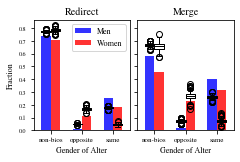

In [345]:
width = 3.125
height = width / 1.618
plt.rc('font', family='serif', serif='Times')
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=6)
plt.rc('axes', labelsize=8)
# set width of bar 
barWidth = 0.6
# fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,sharey=True)

ax[0]=table_re.T.plot(kind='bar', ax=ax[0], color=['blue','red'], width=barWidth, alpha=.8)
xval= ax[0].get_xticks()
print(xval)
men_tab_re.boxplot( color='black', positions=[xval[0]-barWidth/4,xval[1]-barWidth/4,xval[2]-barWidth/4],grid=False, ax=ax[0])
women_tab_re.boxplot( color='black', positions=[xval[0]+barWidth/4,xval[1]+barWidth/4,xval[2]+barWidth/4],grid=False, ax=ax[0])
ticks = table_re.columns
print(ticks)
# ax[0].set_xticks(xval, ticks)
ax[0].set_title("Redirect", fontsize=10)
ax[0].legend(fontsize=8)
# plt.show()

ax[1]=table_me.T.plot(kind='bar', ax=ax[1], color=['blue','red'], width=barWidth, alpha=.8)
xval= ax[1].get_xticks()
men_tab_me.boxplot( color='black', positions=[xval[0]-barWidth/4,xval[1]-barWidth/4,xval[2]-barWidth/4],grid=False, ax=ax[1])
women_tab_me.boxplot( color='black', positions=[xval[0]+barWidth/4,xval[1]+barWidth/4,xval[2]+barWidth/4],grid=False, ax=ax[1])
ticks = table_me.columns

# ax[1].set_xticks(xval, ticks)

ax[1].set_title("Merge", fontsize=10)
ax[1].get_legend().remove()
plt.xticks(xval,ticks)
# plt.show()
ax[0].set_ylabel('Fraction')
fig.tight_layout()
fig.set_size_inches(width, height)
fig.savefig('figure/Fig5-Direction_to_merge_and_redirect.png', dpi=200, bbox_inches='tight')
fig.show()


#     xval2 = [xval[0]-width/4,xval[0]+width/4,xval[1]-width/4,xval[1]+width/4,xval[2]-width/4,xval[2]+width/4 ]
#     xmin = [xval[0]-width/2,xval[0],xval[1]-width/2,xval[1],xval[2]-width/2,xval[2] ]
#     xmax =[xval[0],xval[0]+width/2, xval[1],xval[1]+width/2,xval[2],xval[2]+width/2]

#     ymin2=[0,0,0,0,0,0]
#     ymax2=list(means[means.columns[0]])+list(means[means.columns[1]]) + list(means[means.columns[2]])

#     plt.vlines(x = xval2, ymin=ymin2, ymax=ymax2, color='black', linestyle='--')
#     plt.hlines(y=ymax2, xmin=xmin, xmax=xmax,color='black')